In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Is the STD independent from the mean?

In [2]:
# files
budget_dir = repo_path / 'data/budget'
# get all folders in the budget directory
budget_folders = [x for x in budget_dir.iterdir() if x.is_dir()]
# get all files in each folder in the same list
budget_files = [x for folder in budget_folders for x in folder.iterdir() if x.is_file()]
len(budget_files)

78

In [5]:
# read ech indpendent csv file and stack them in a single dataframe
budget_df = pd.concat([pd.read_csv(file) for file in budget_files], ignore_index=True)
# get mean of only pat_num 2 patients
budget_mean = budget_df.groupby('pat_num').mean()
budget_std = budget_df.groupby('pat_num').std()
budget_cv = budget_std / budget_mean
# save files
budget_mean.to_csv(budget_dir / 'budget_mean.csv')
budget_std.to_csv(budget_dir / 'budget_std.csv')
budget_cv.to_csv(budget_dir / 'budget_cv.csv')

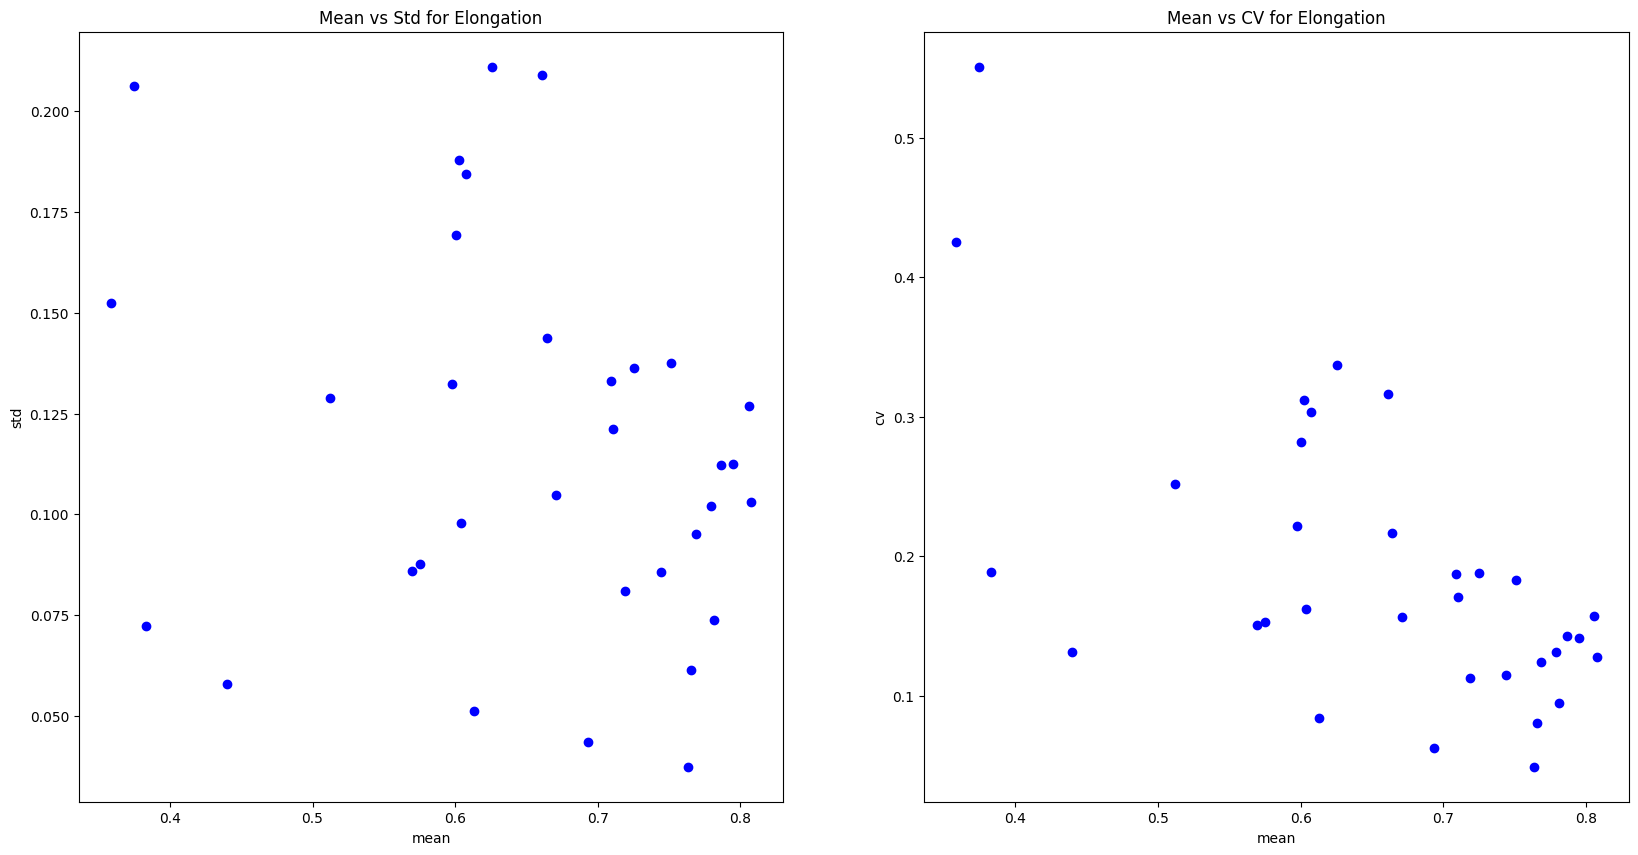

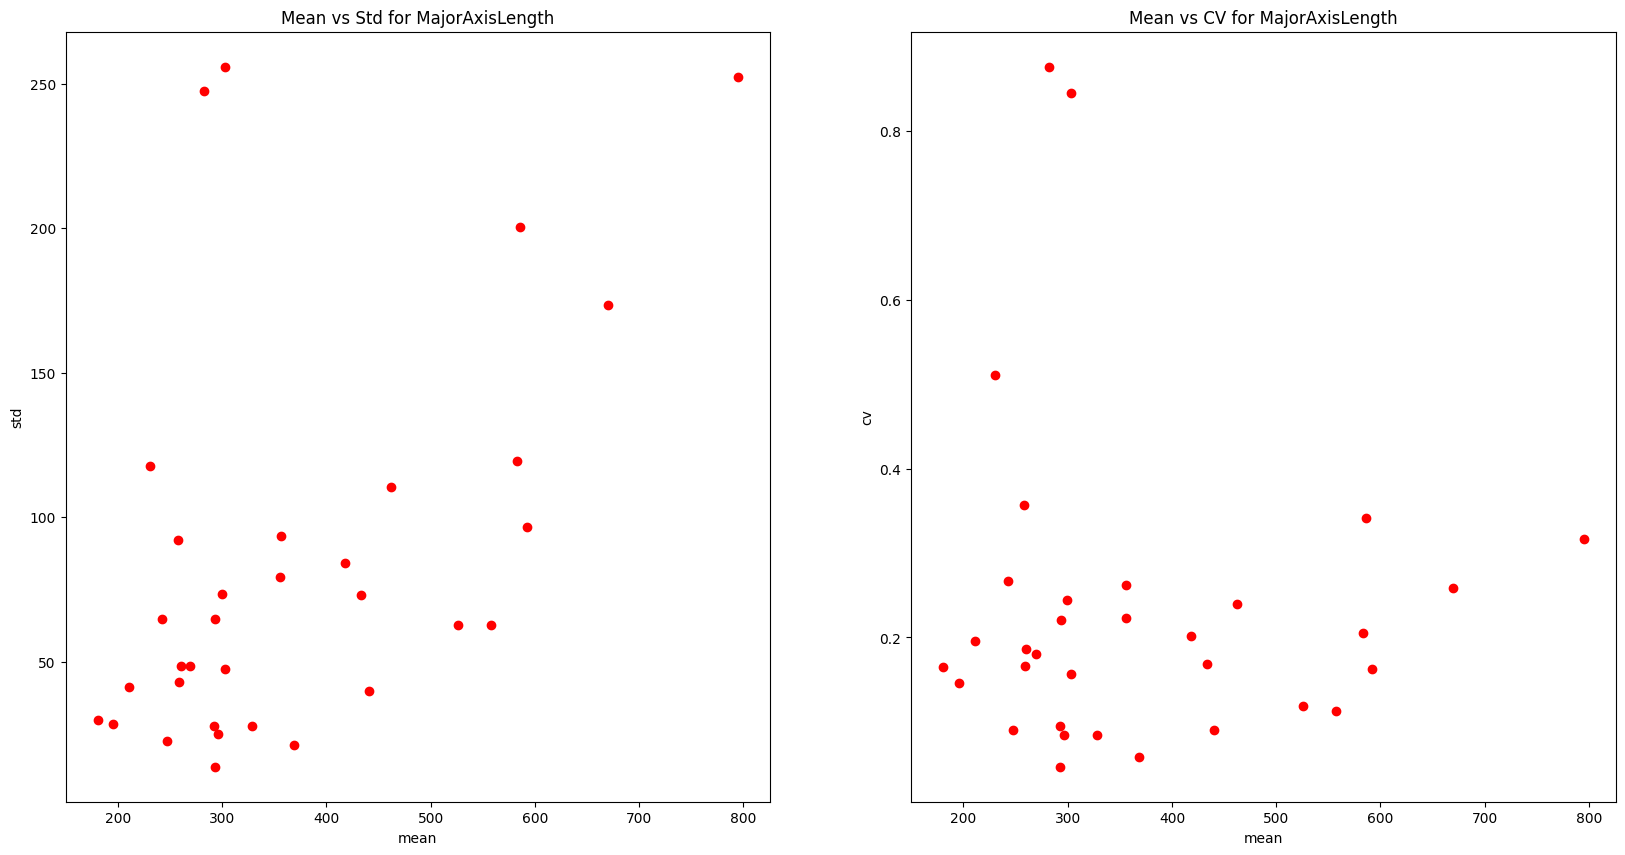

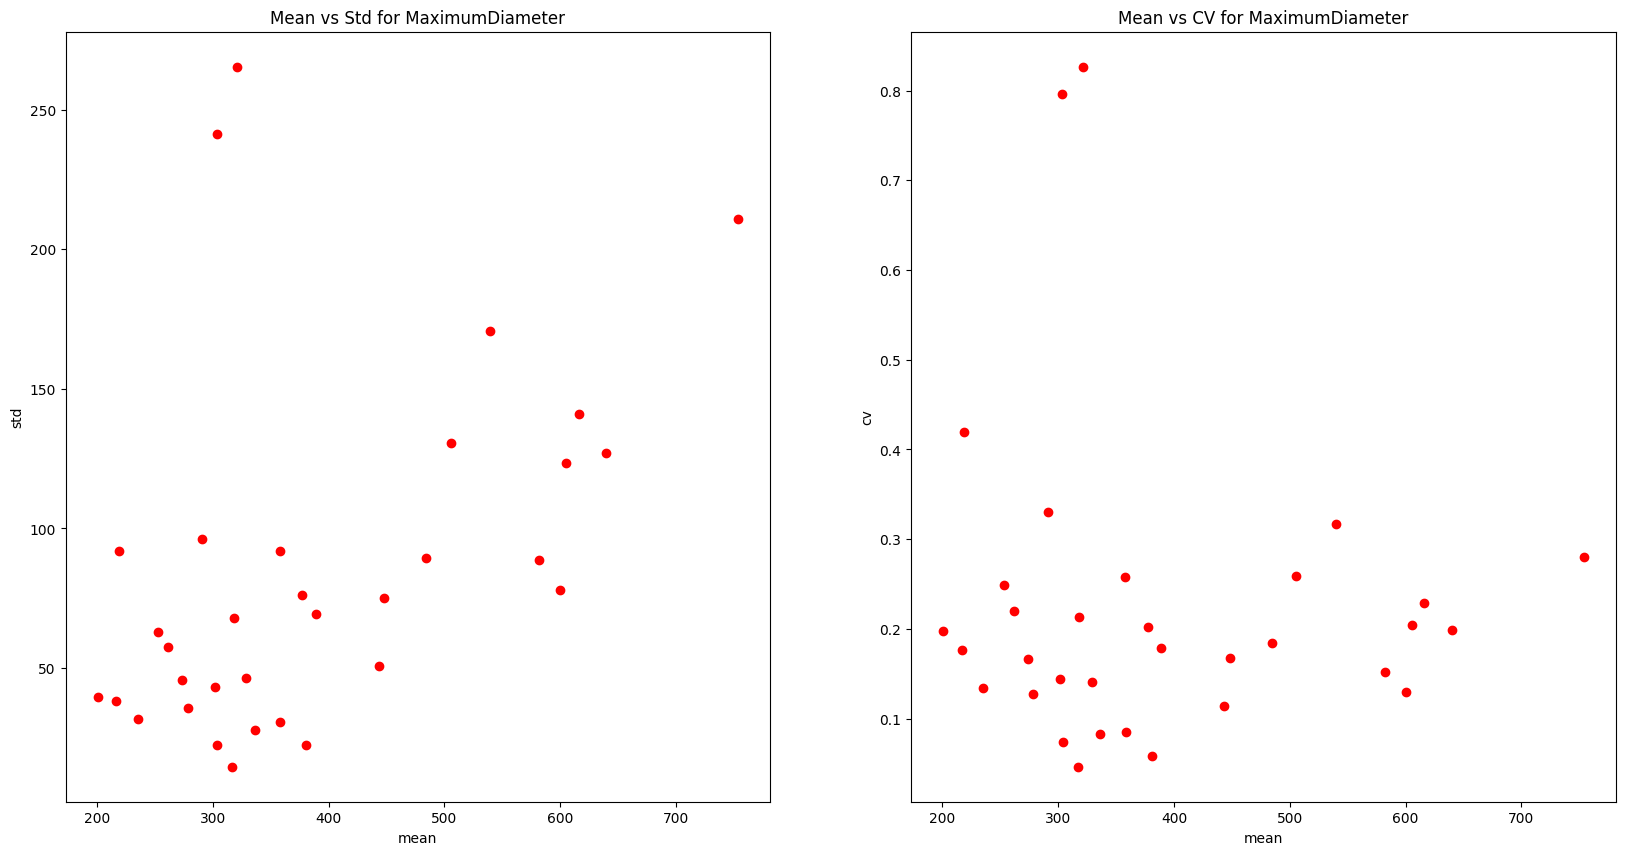

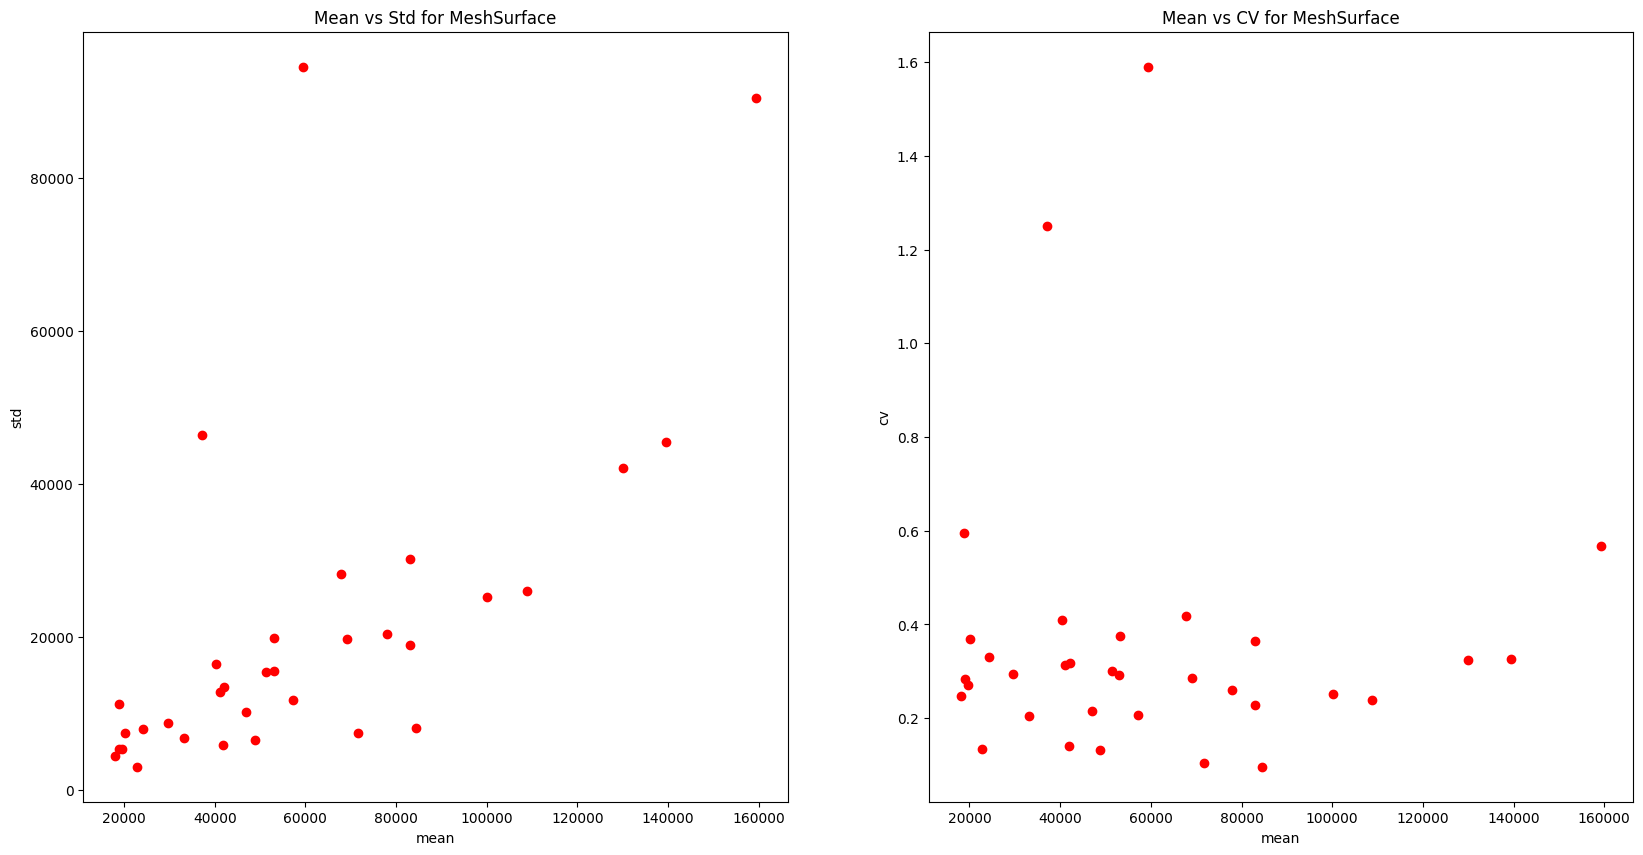

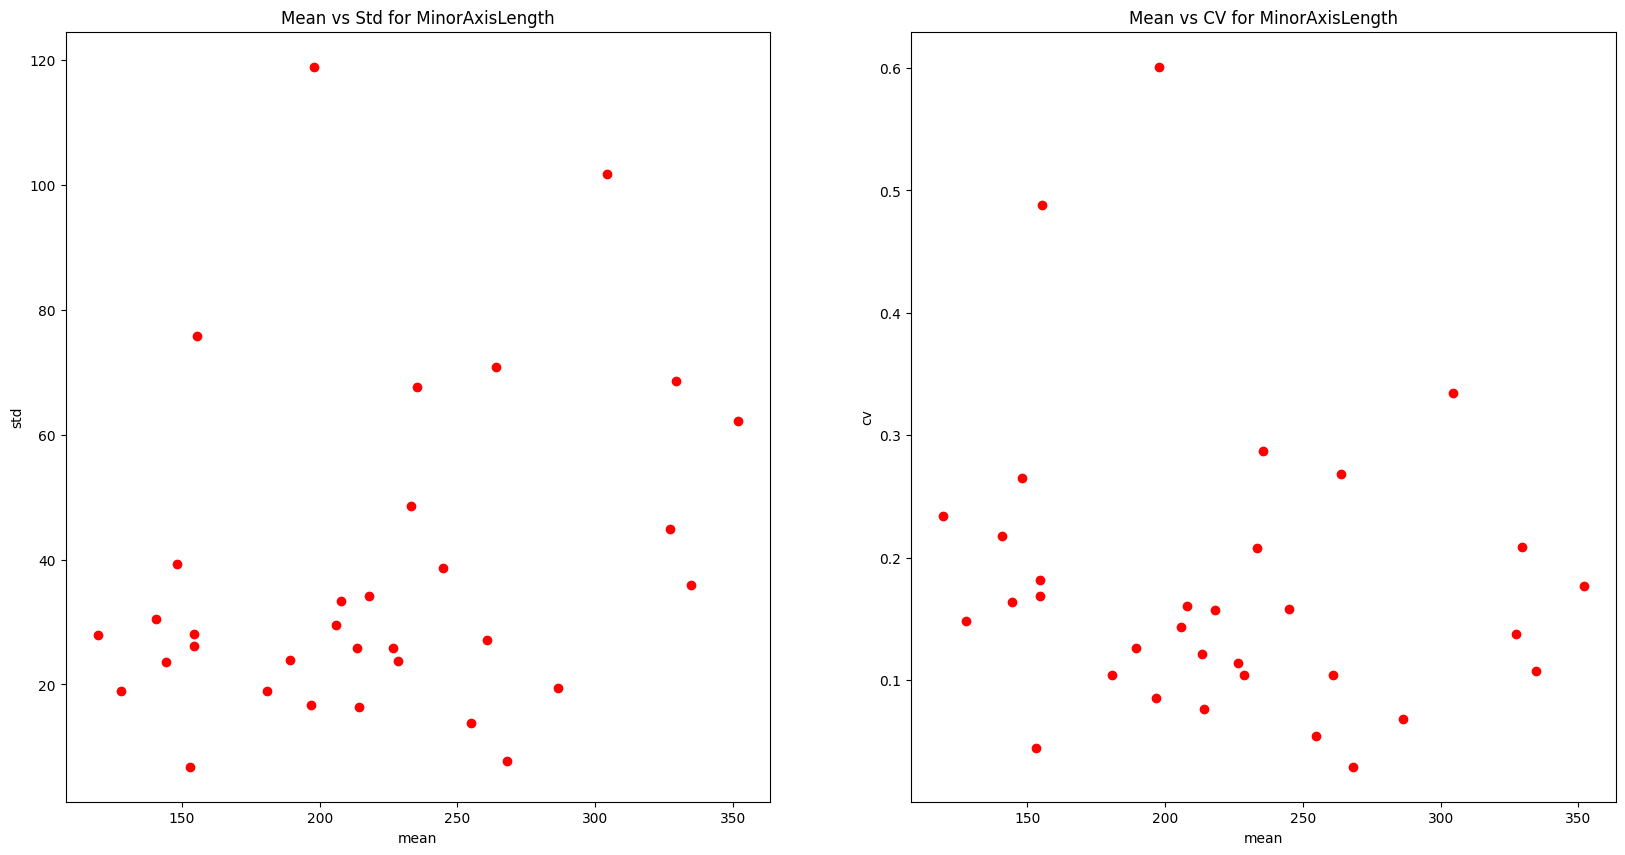

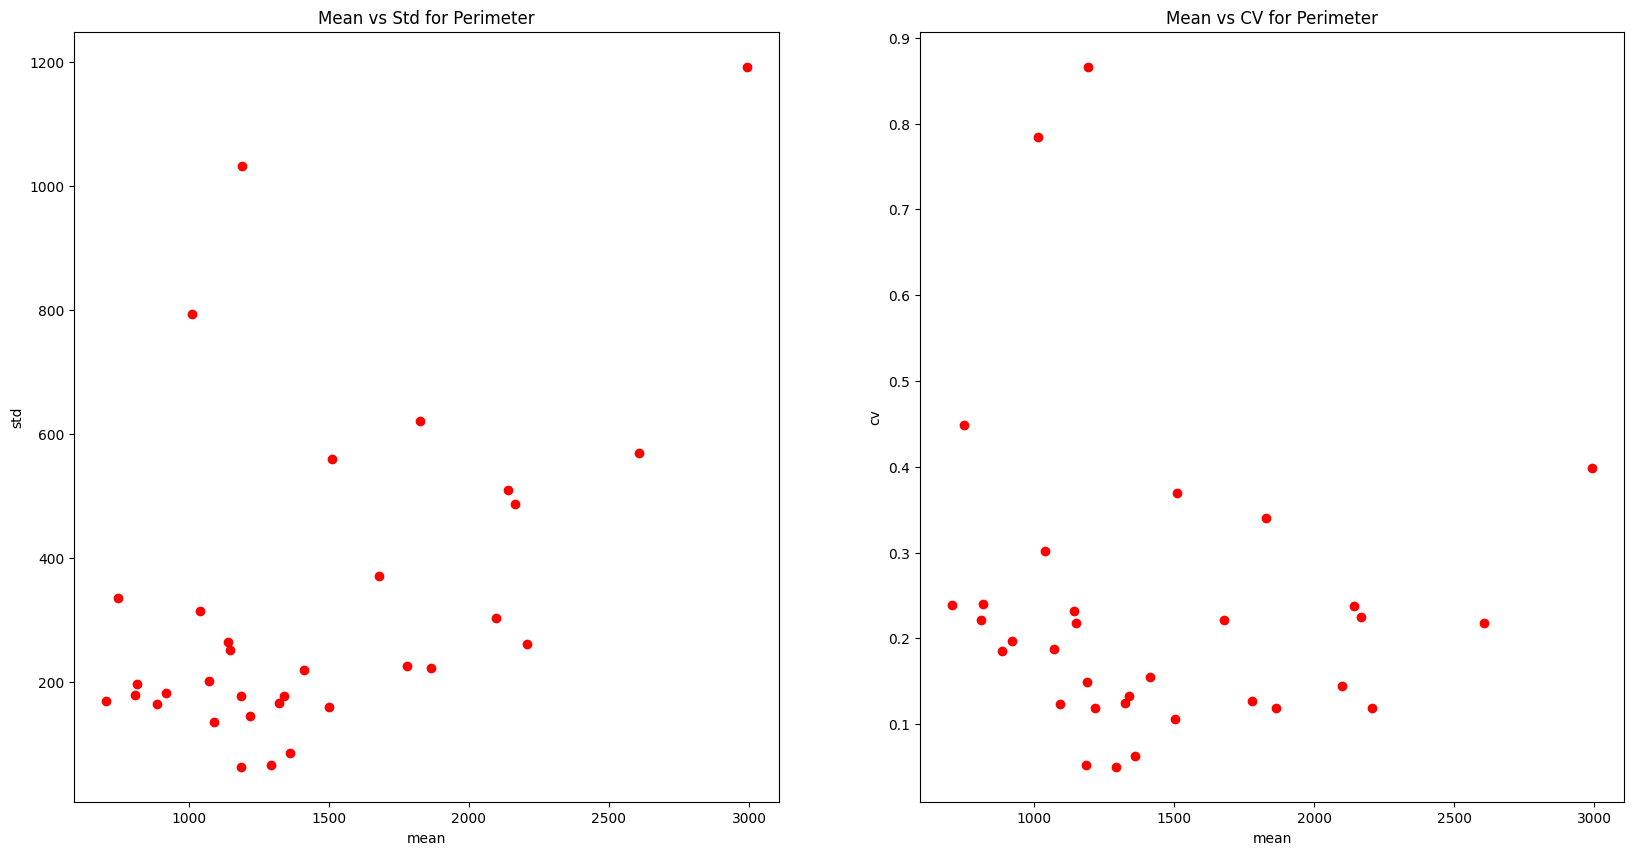

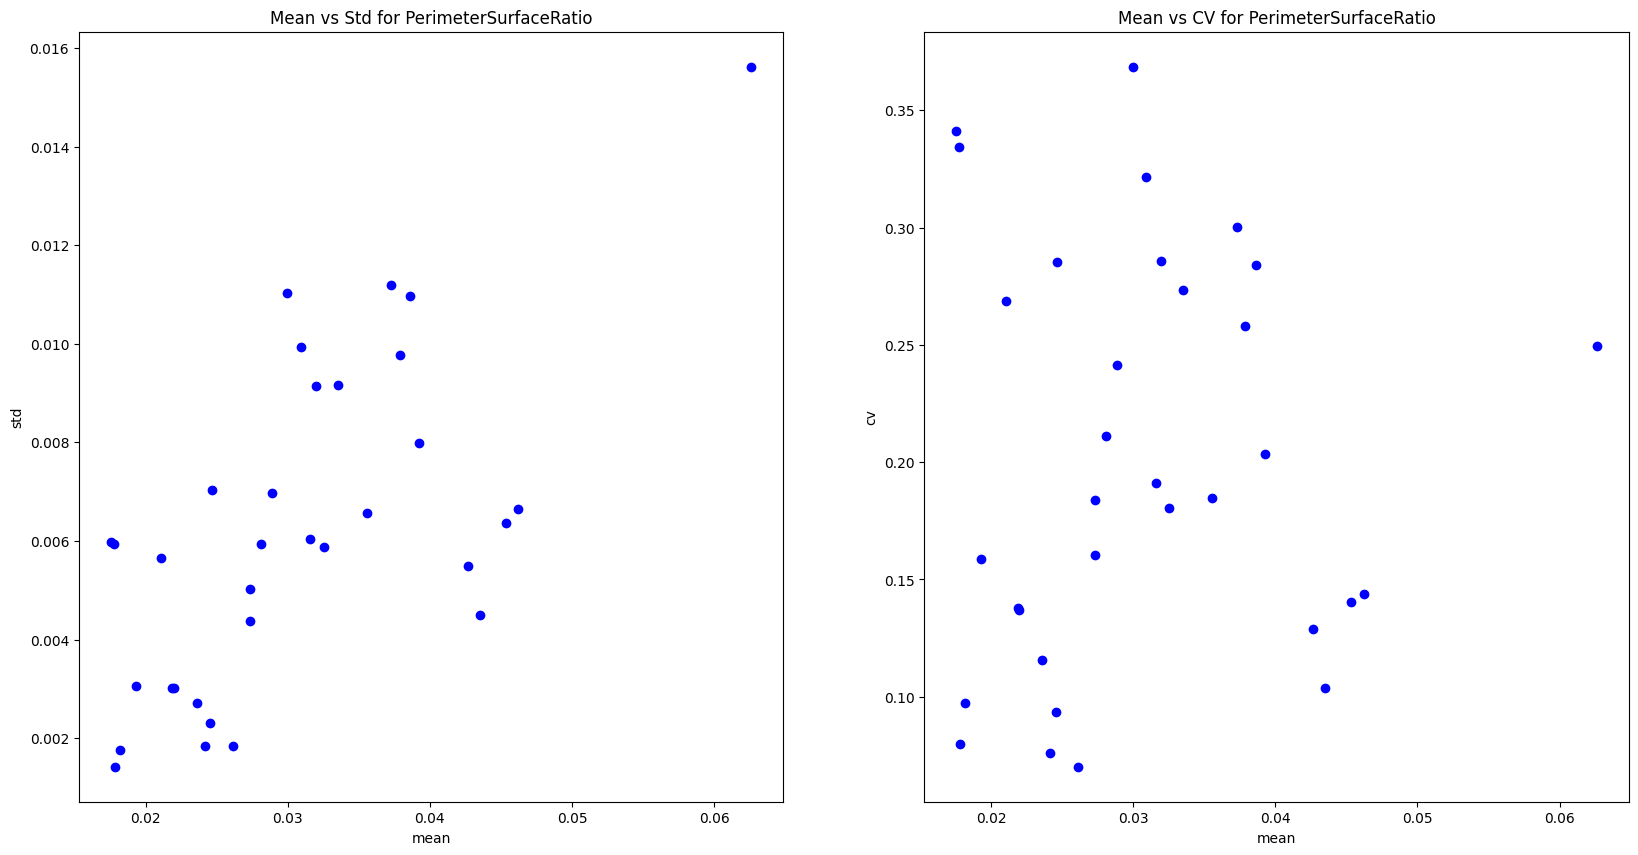

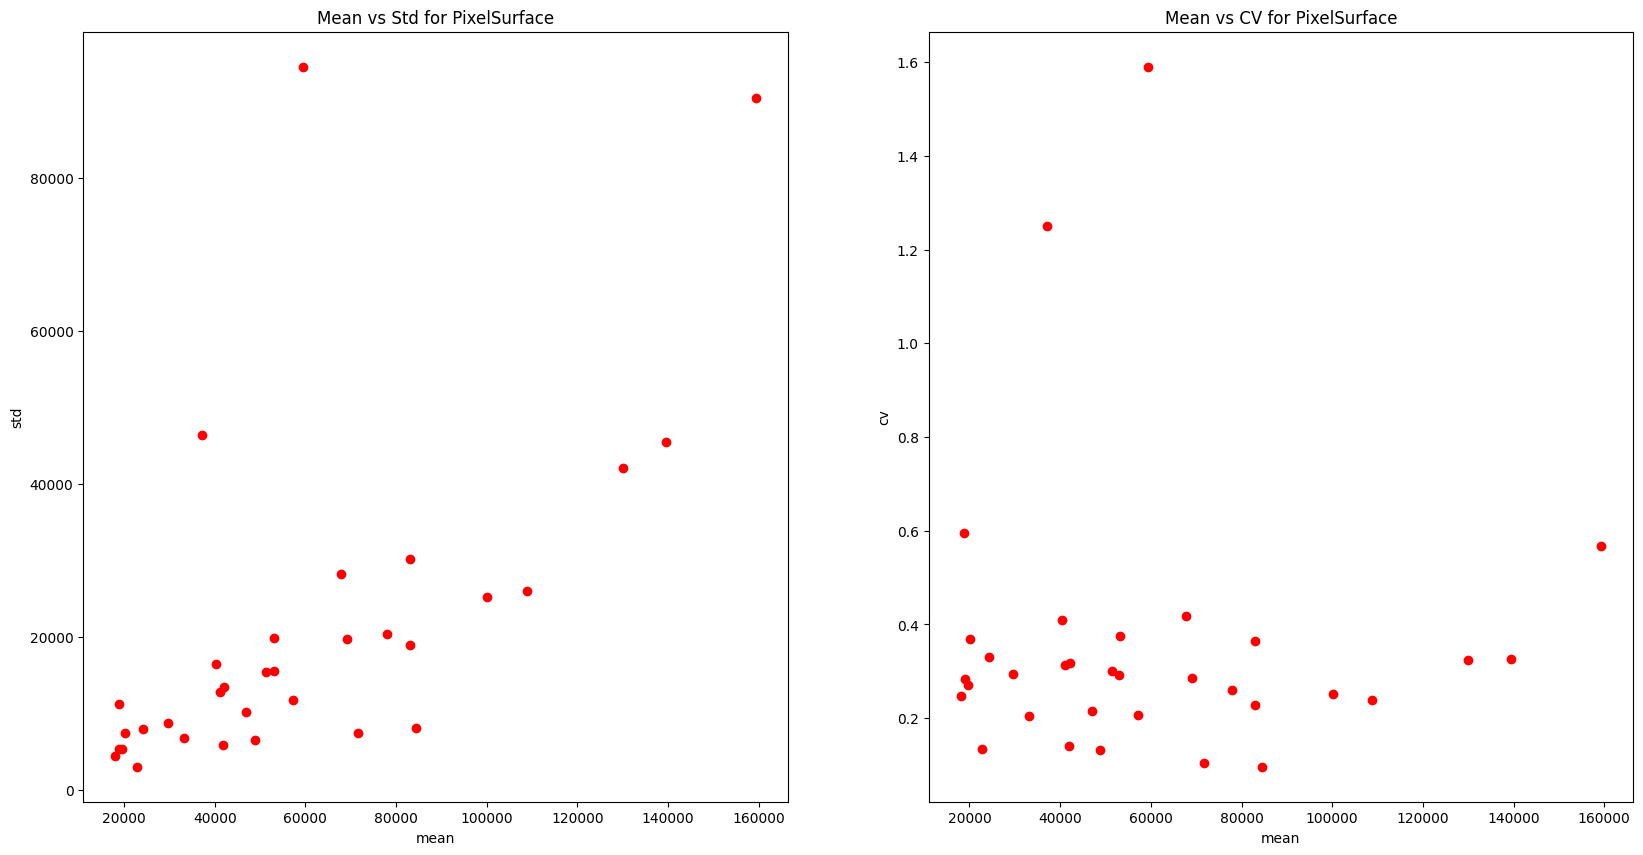

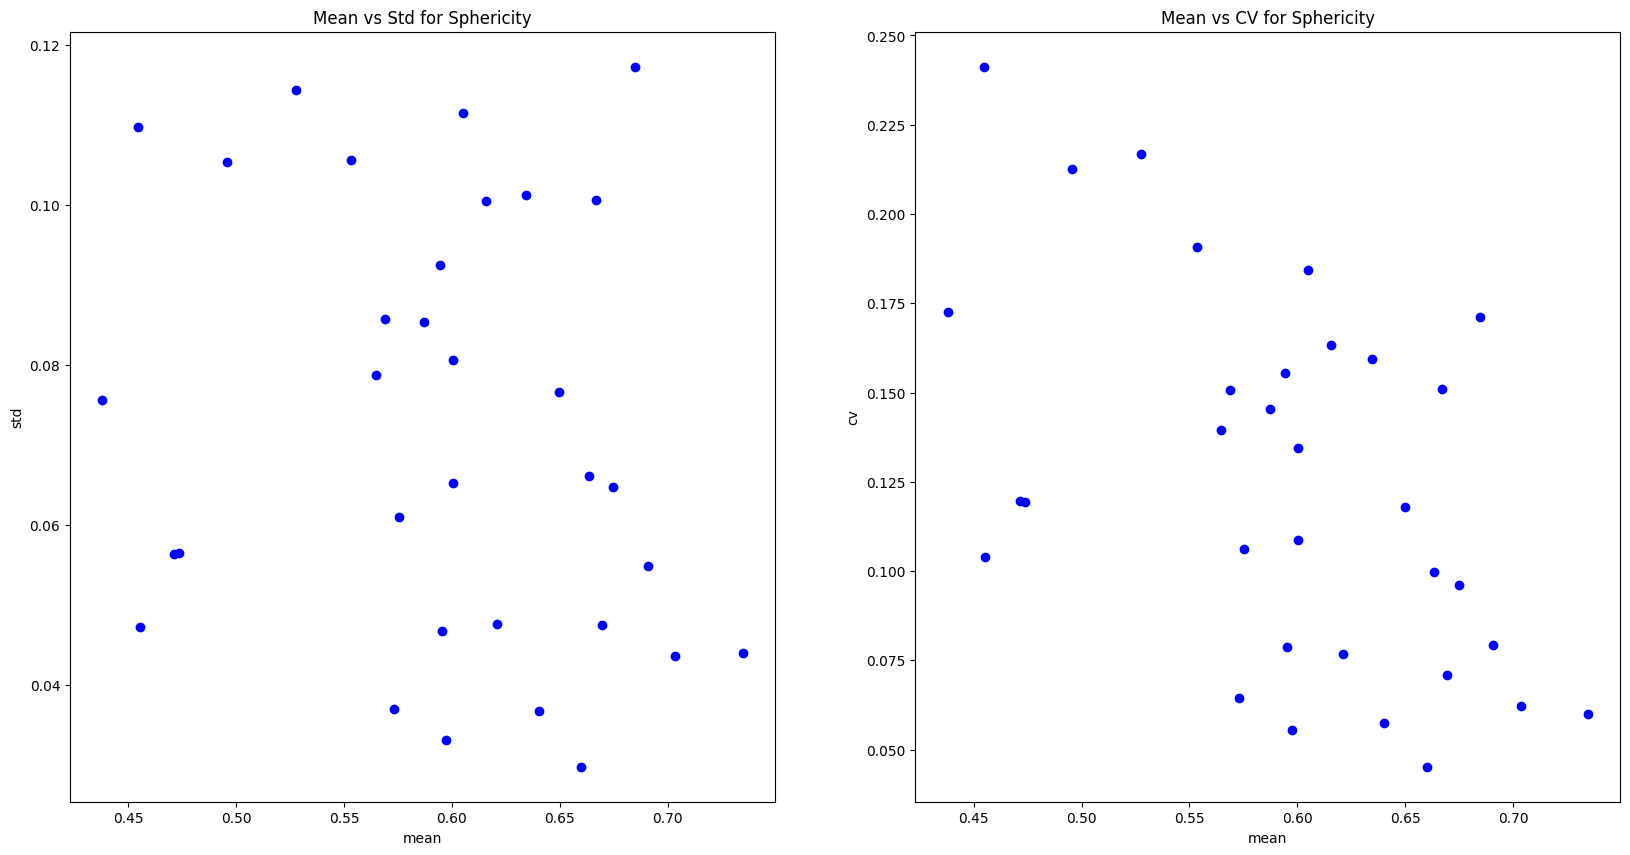

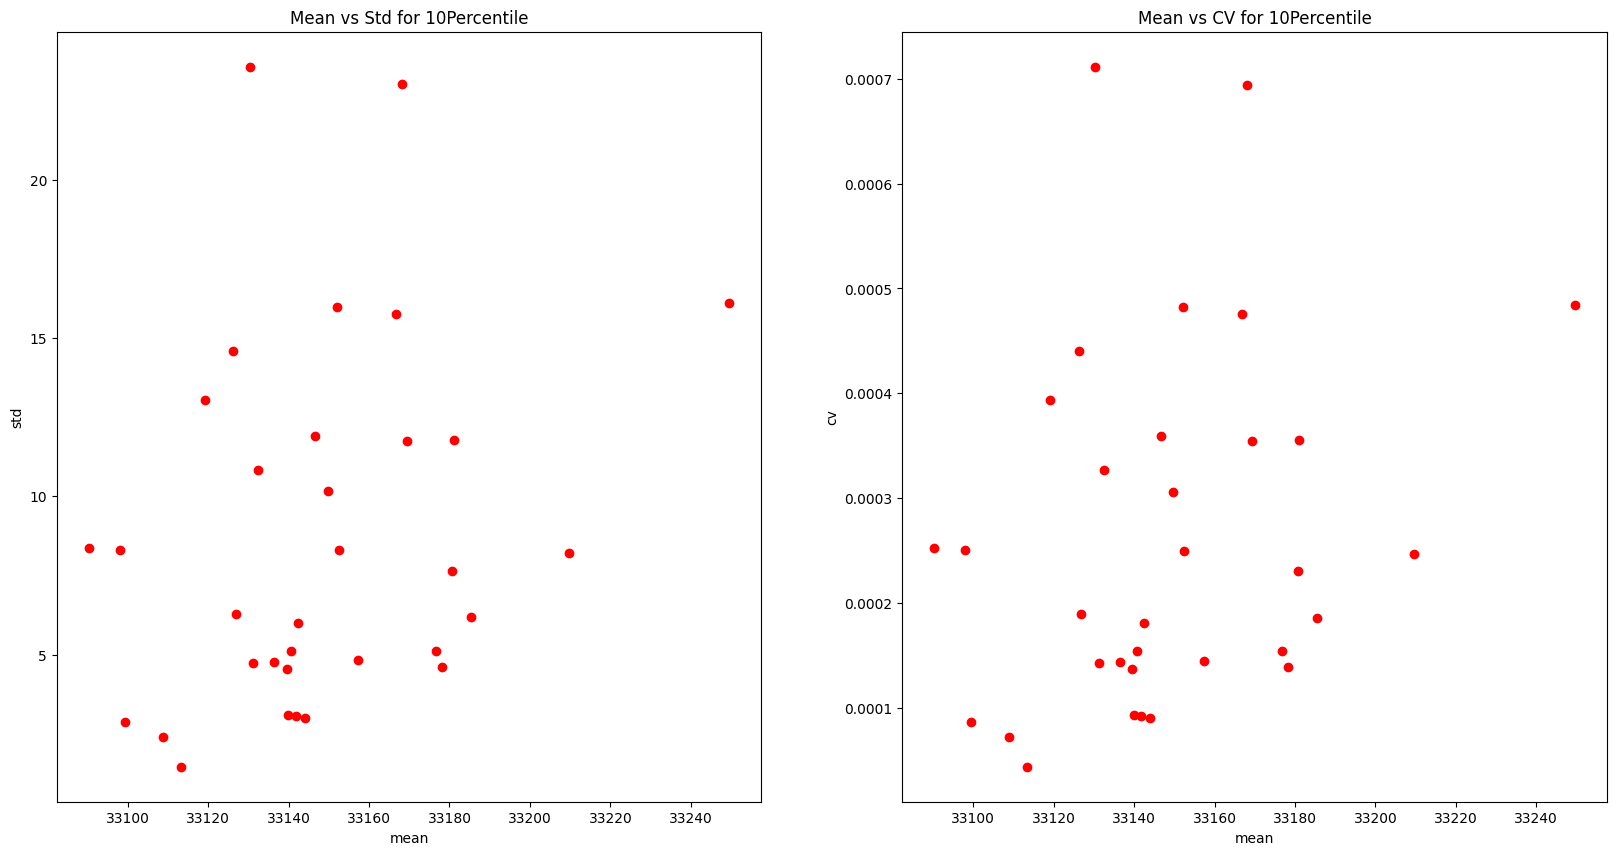

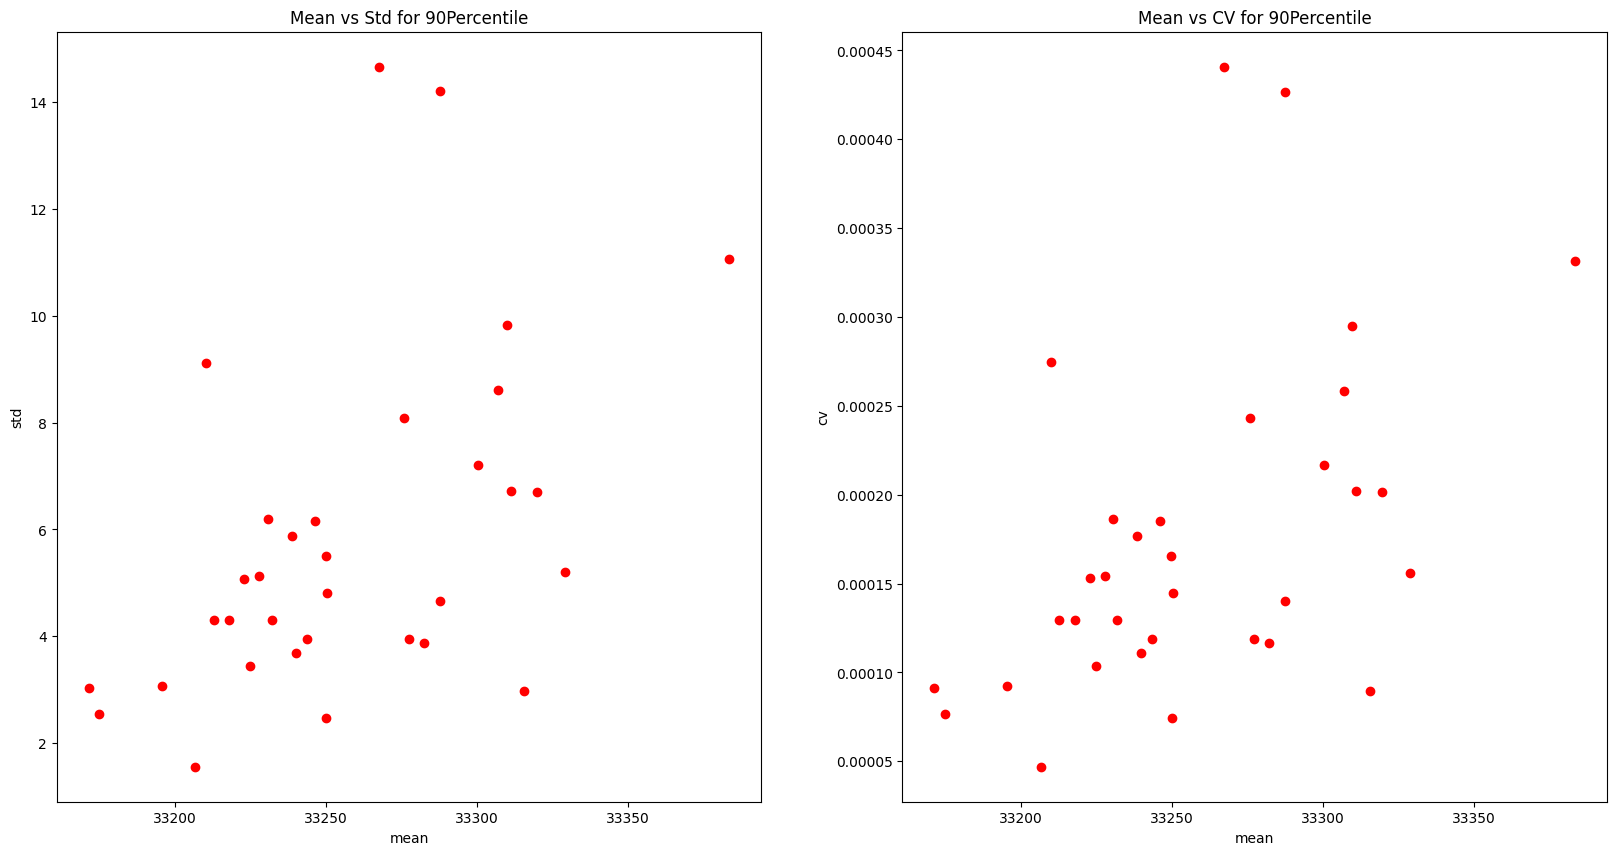

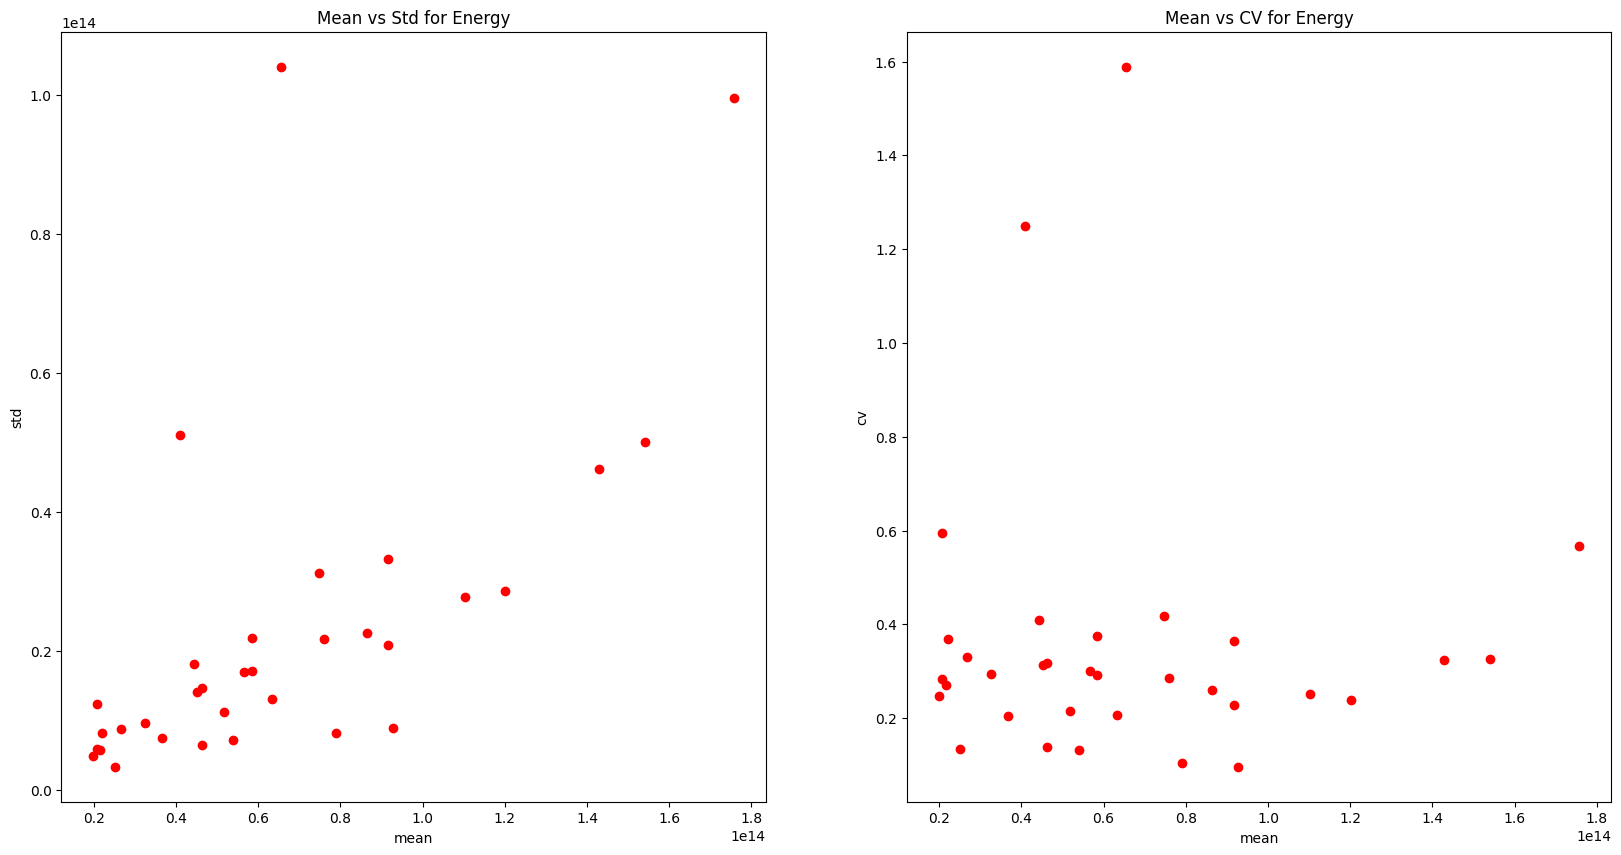

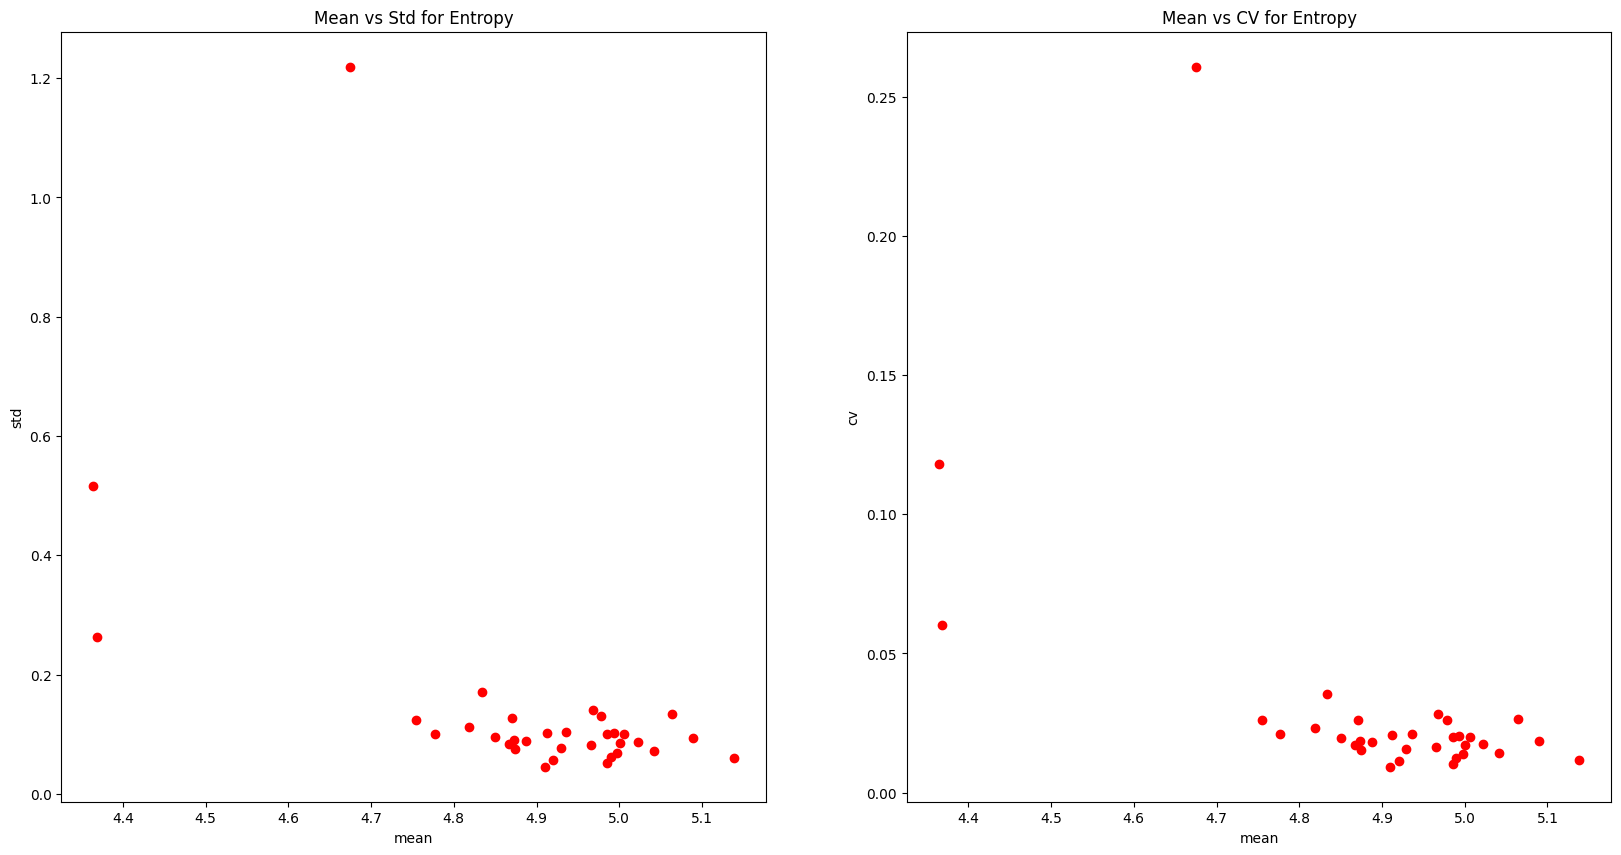

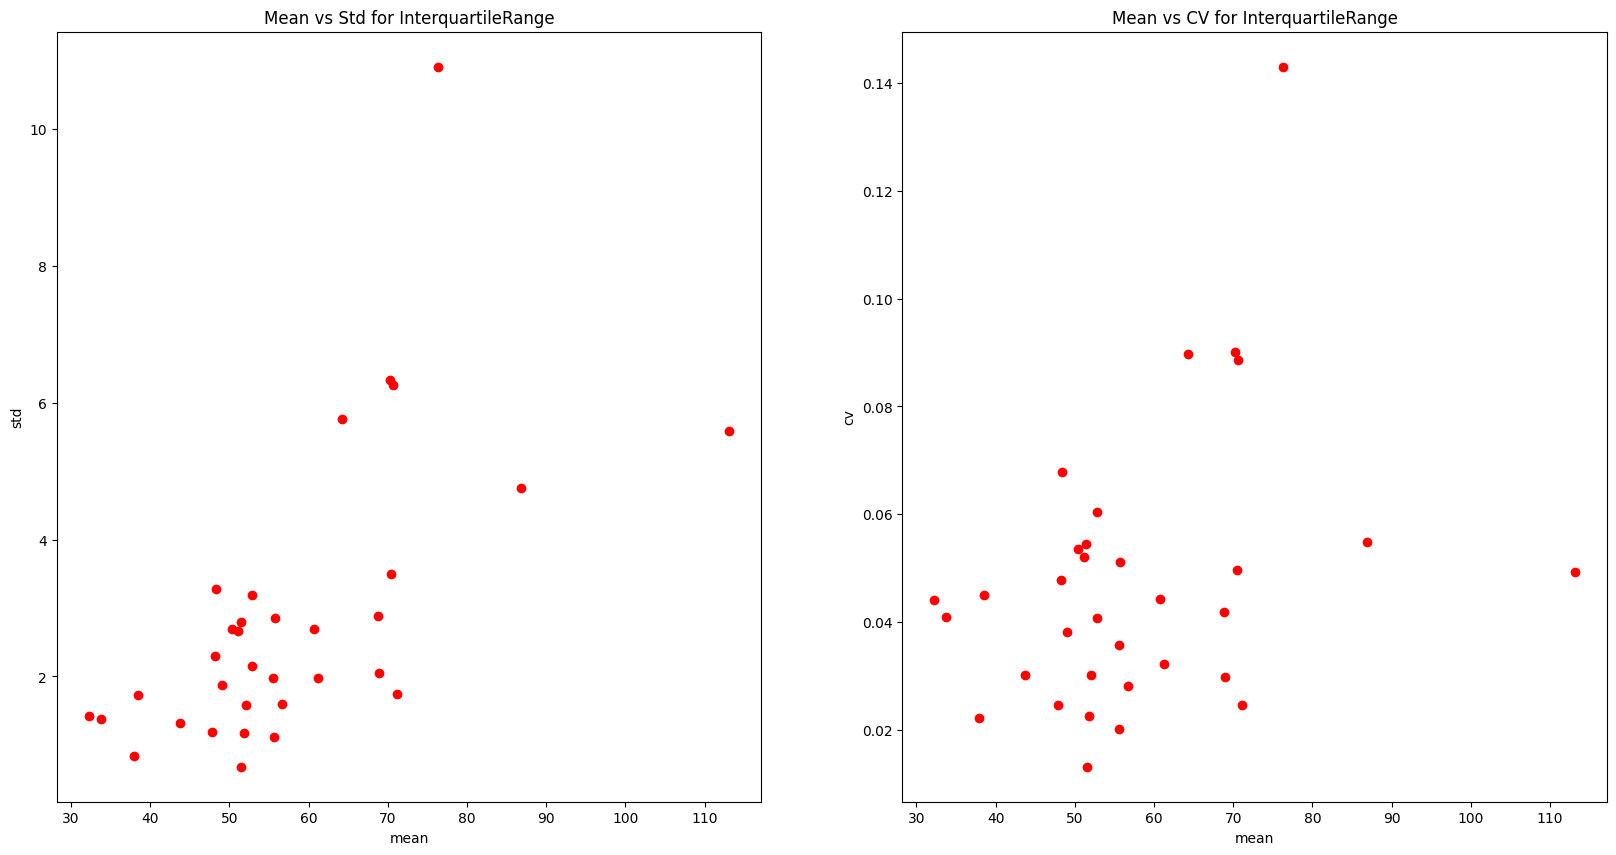

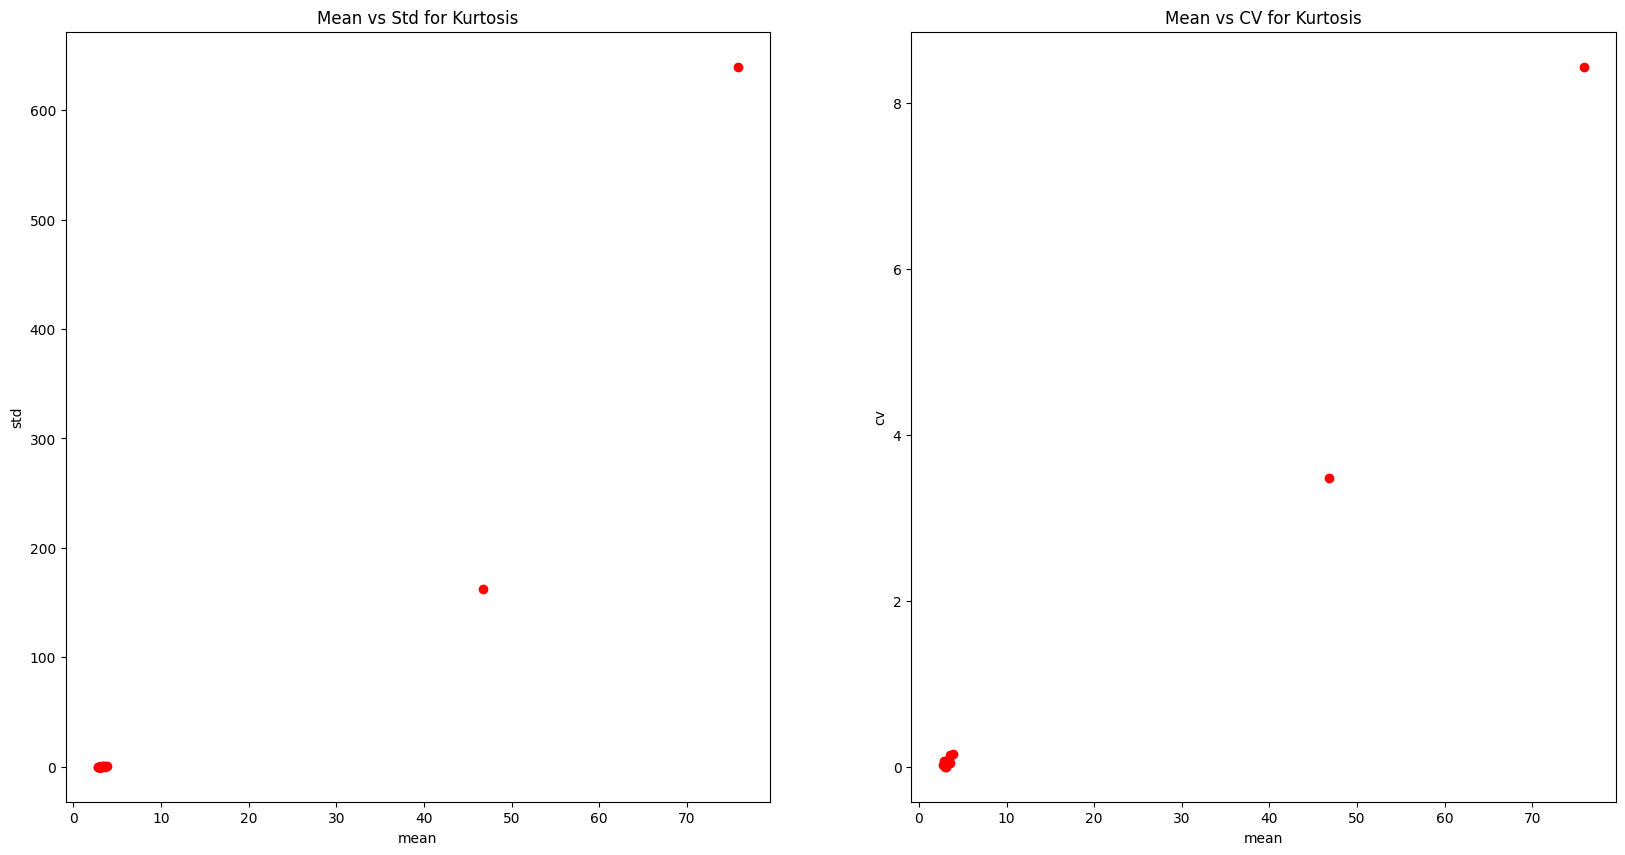

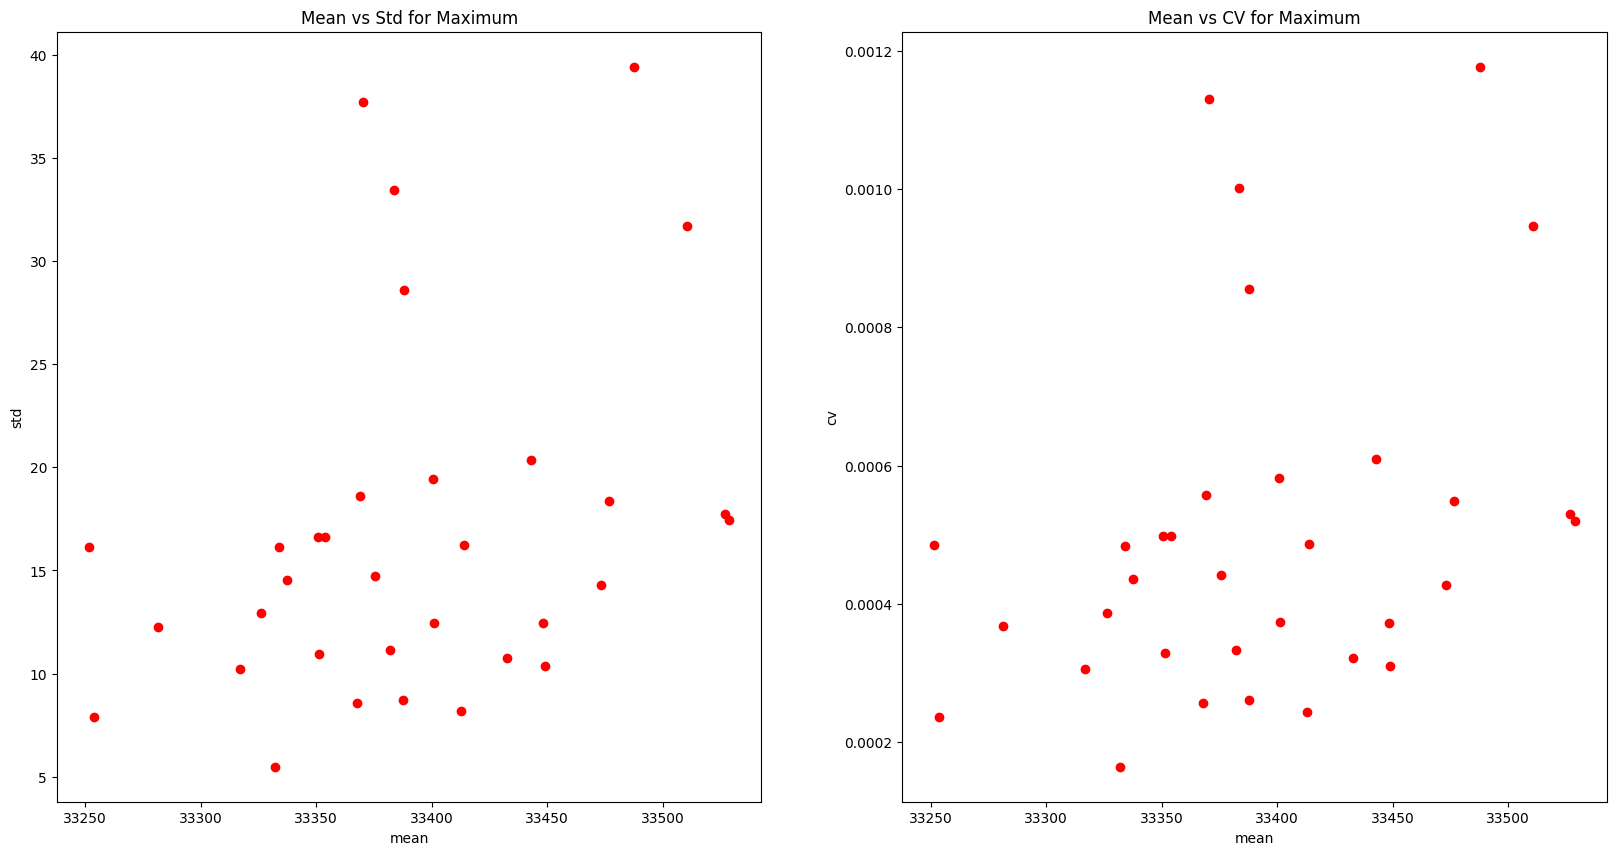

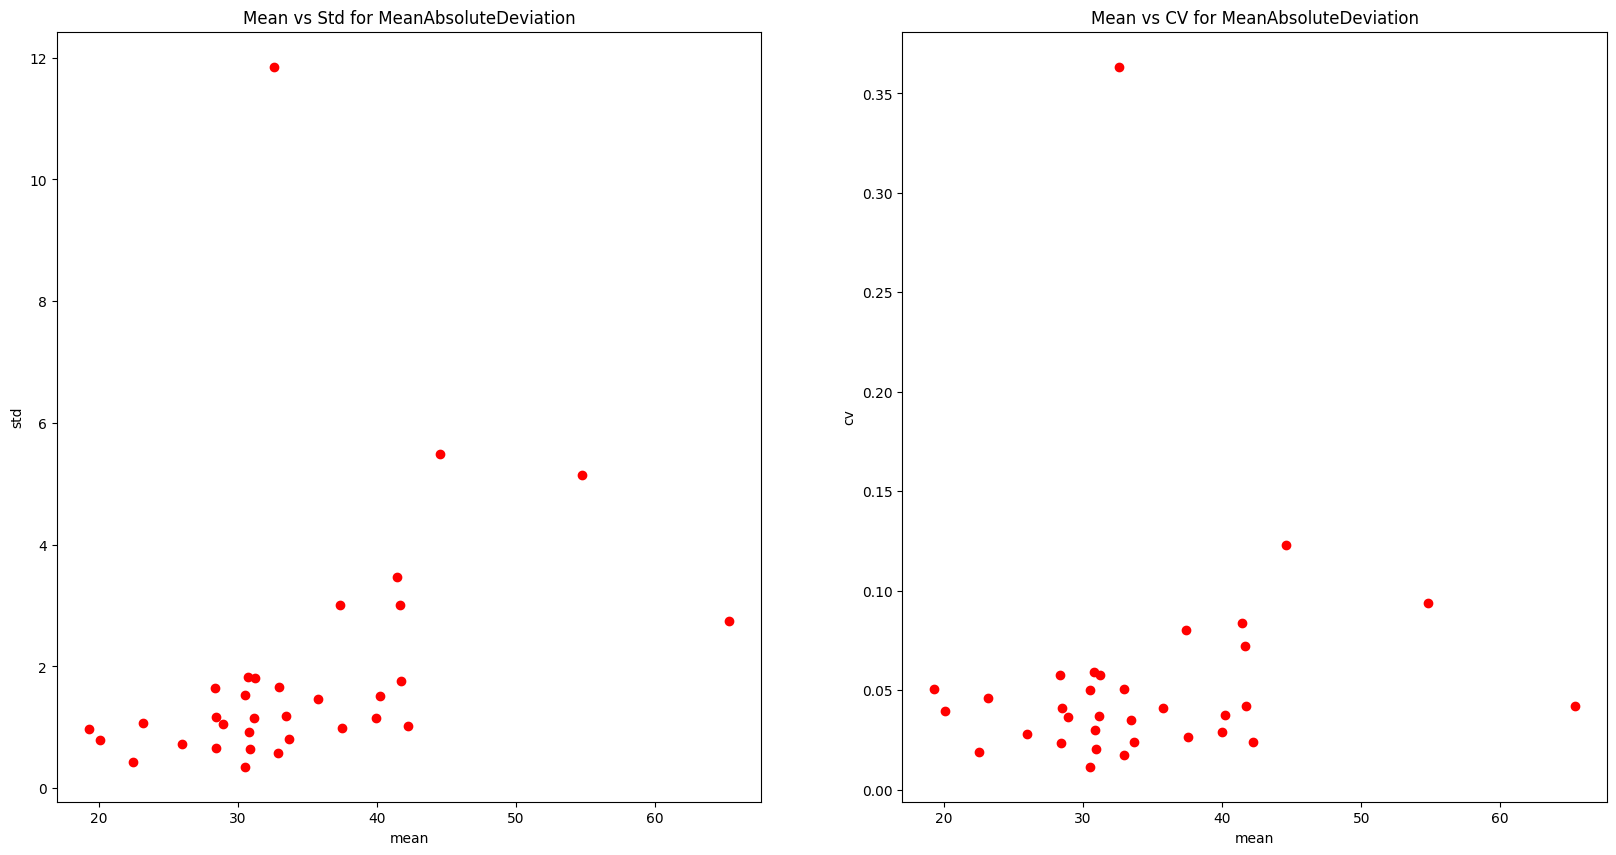

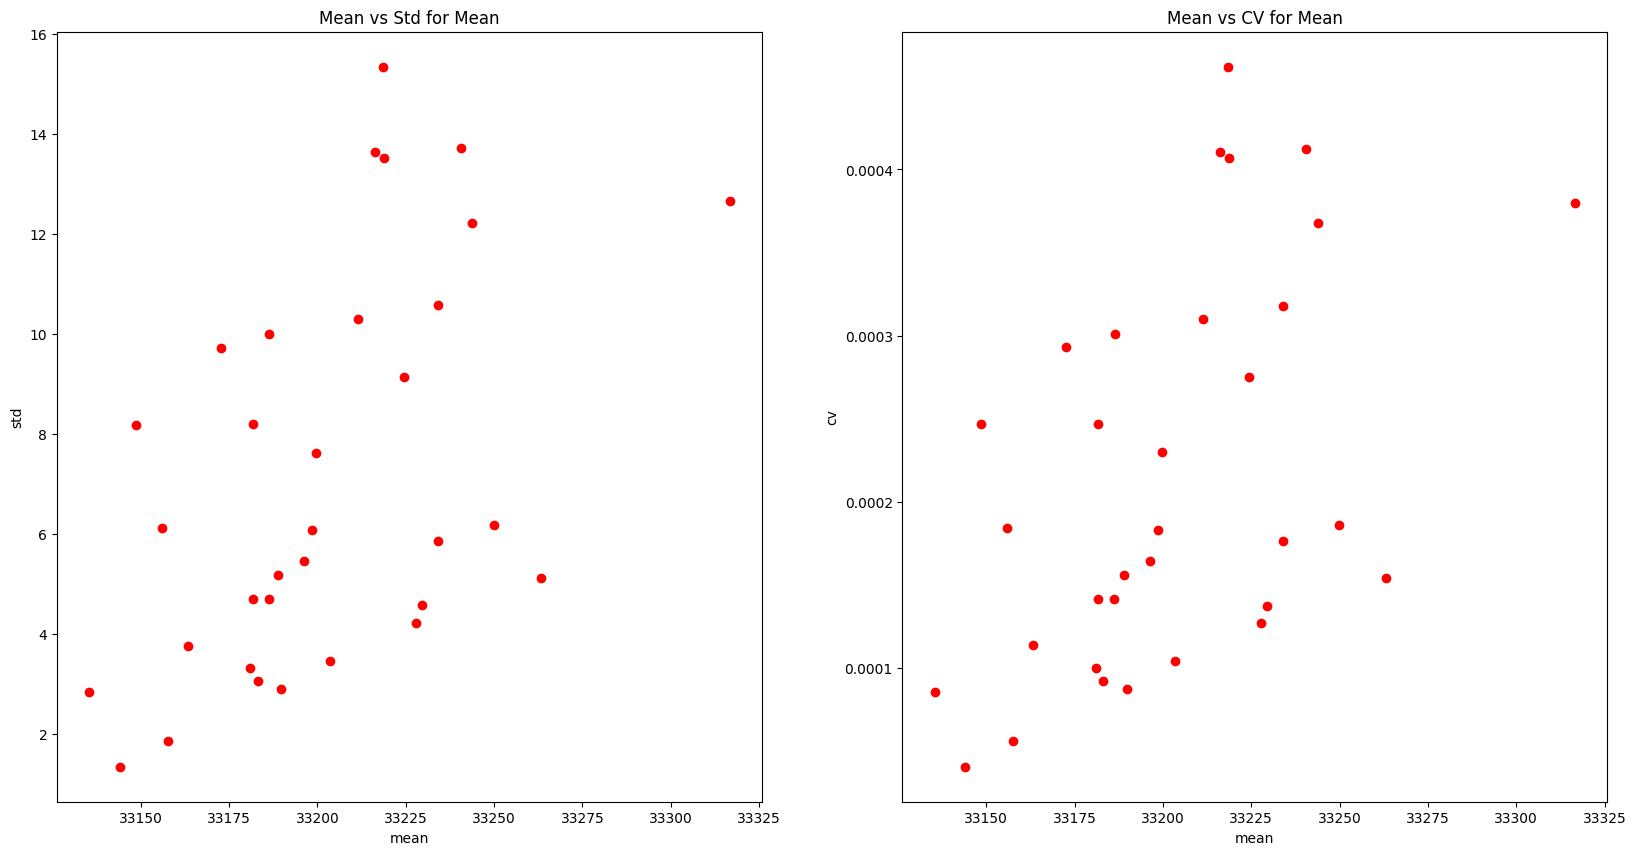

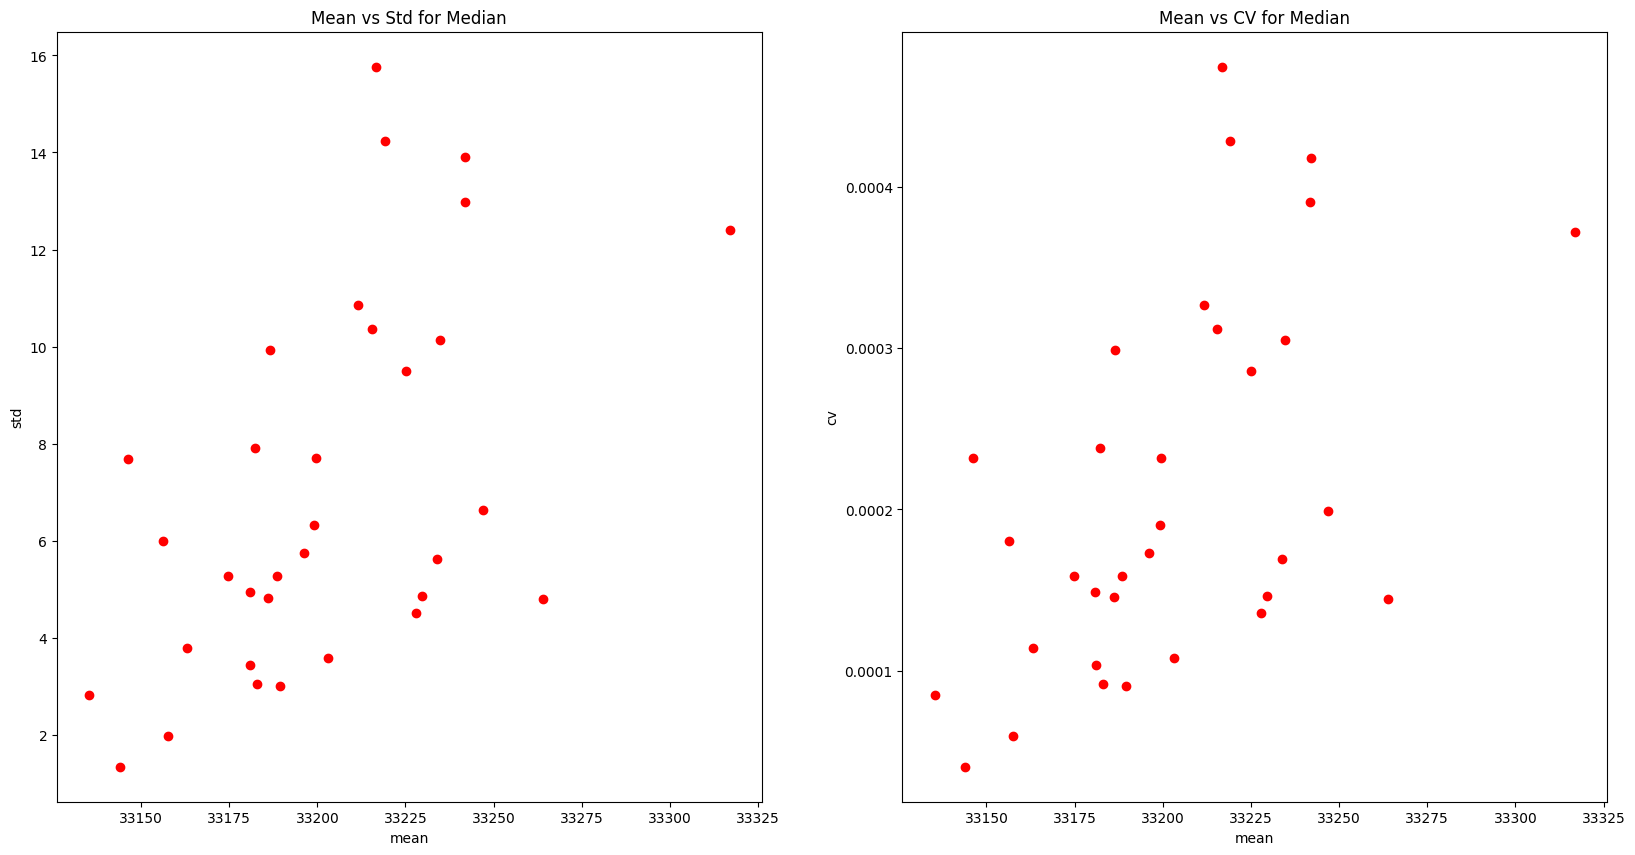

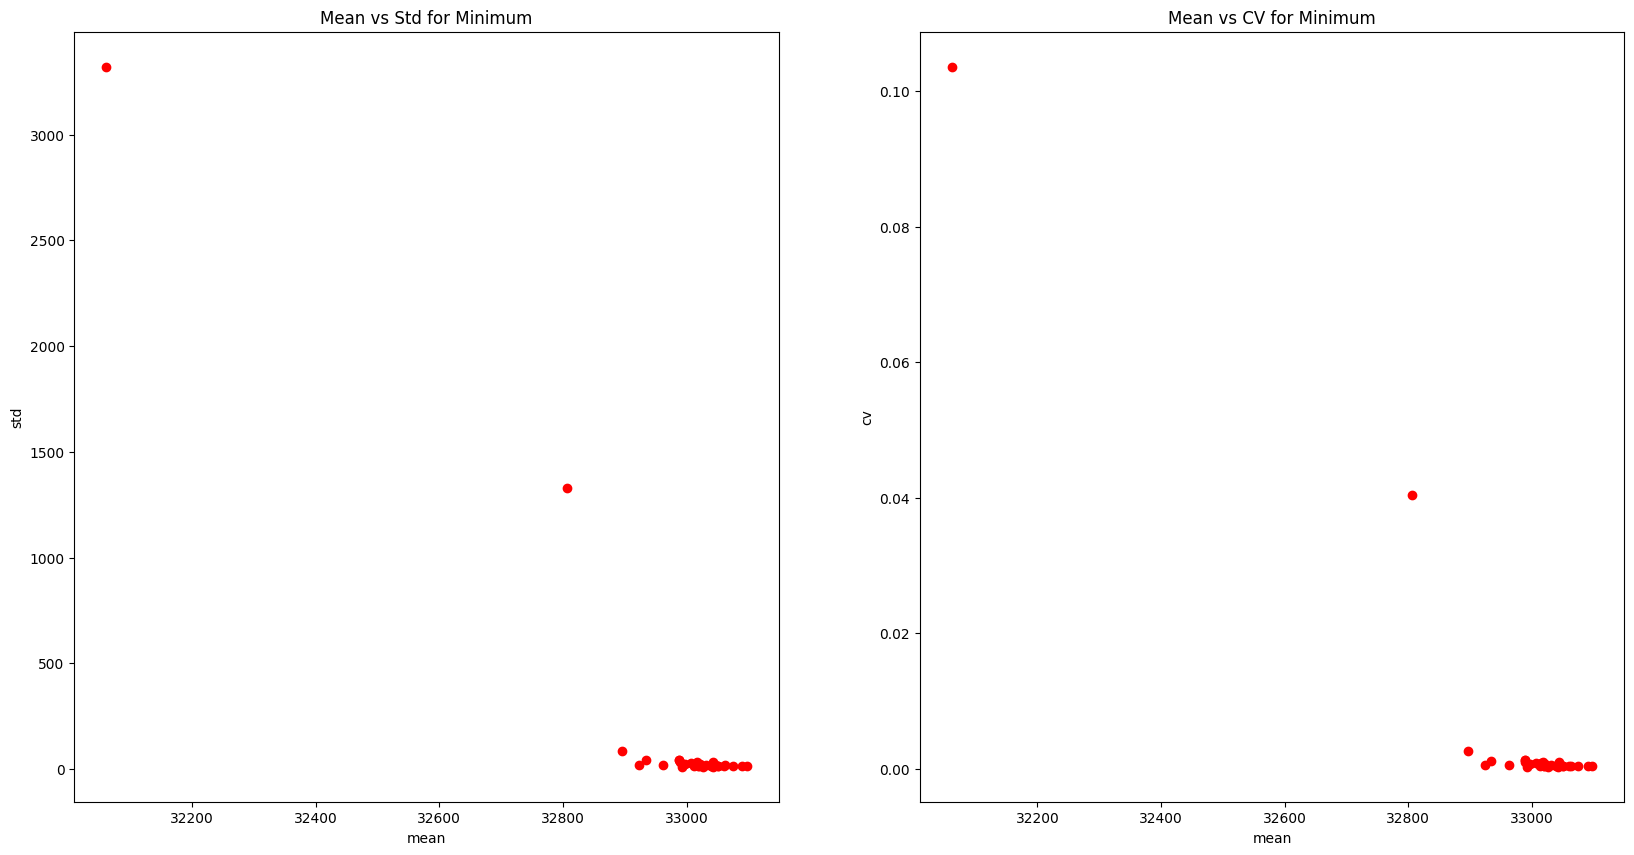

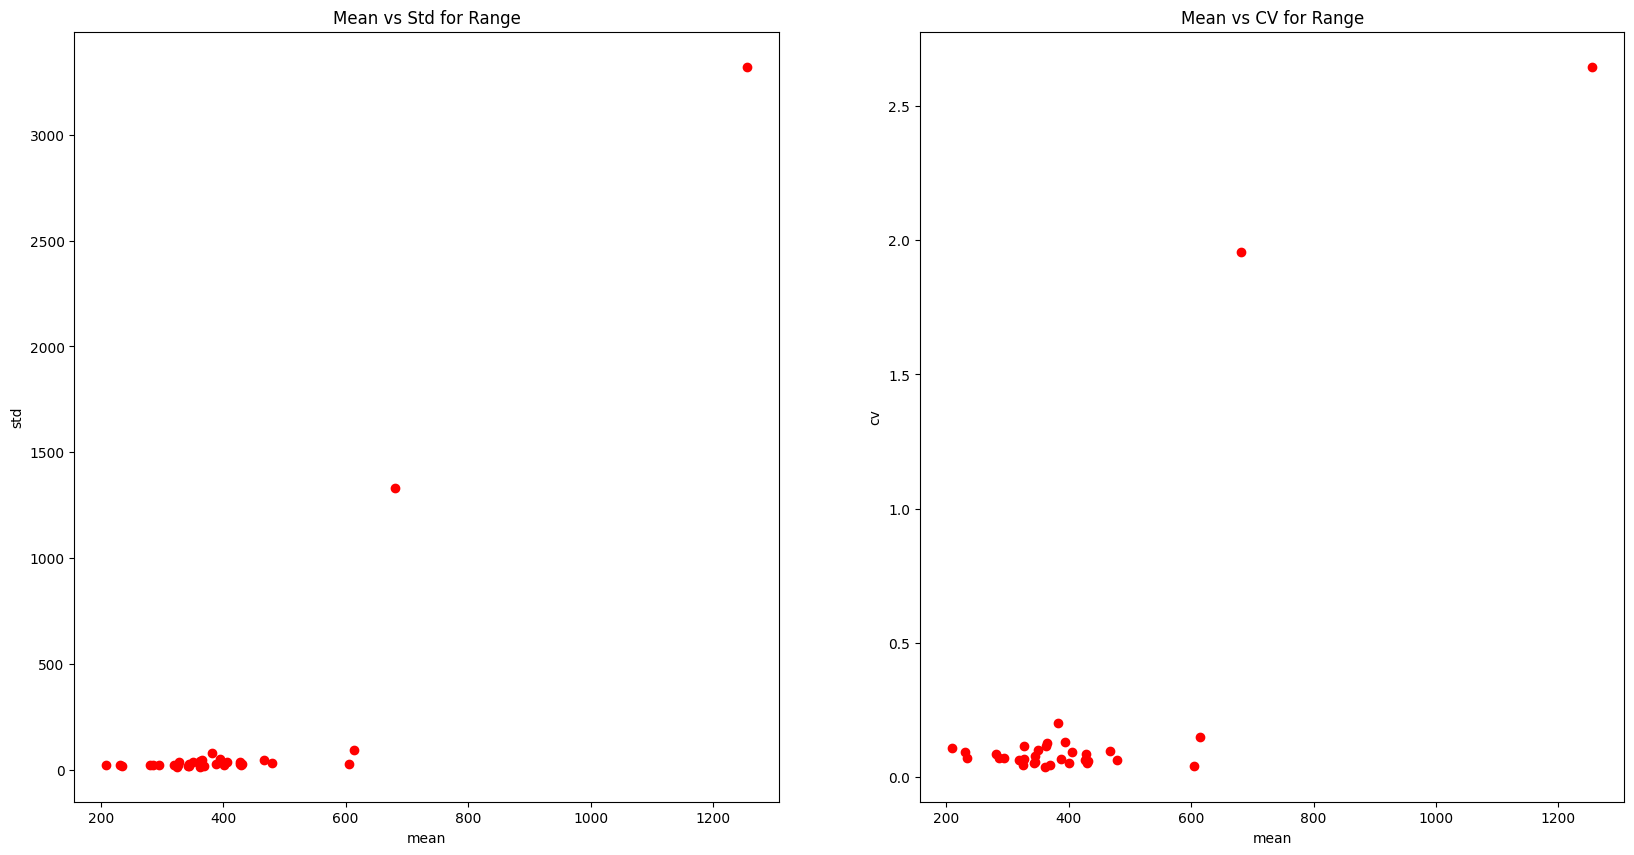

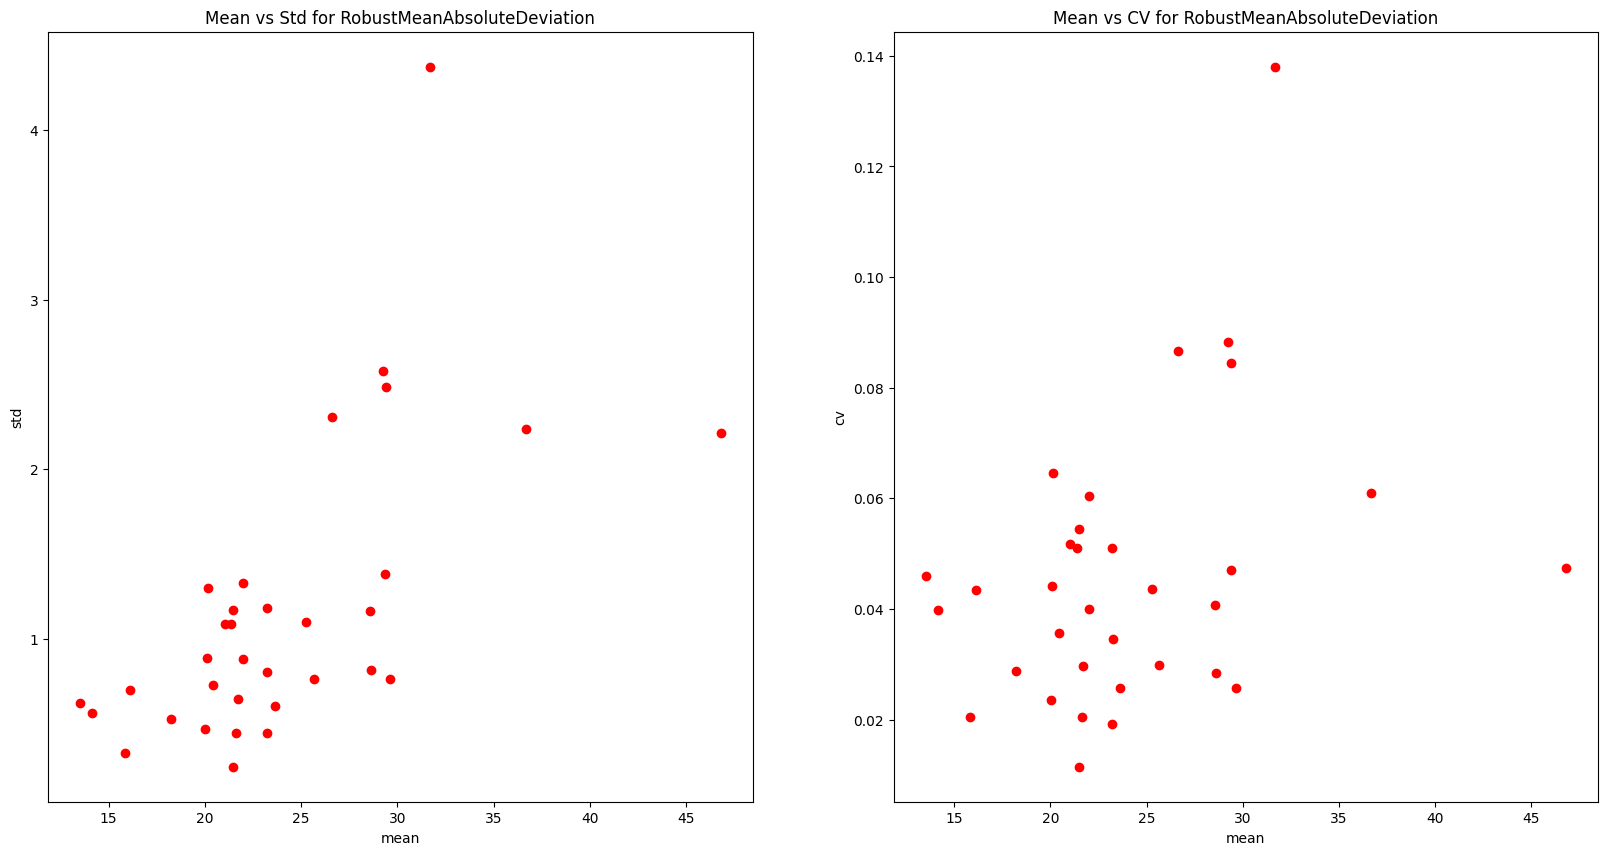

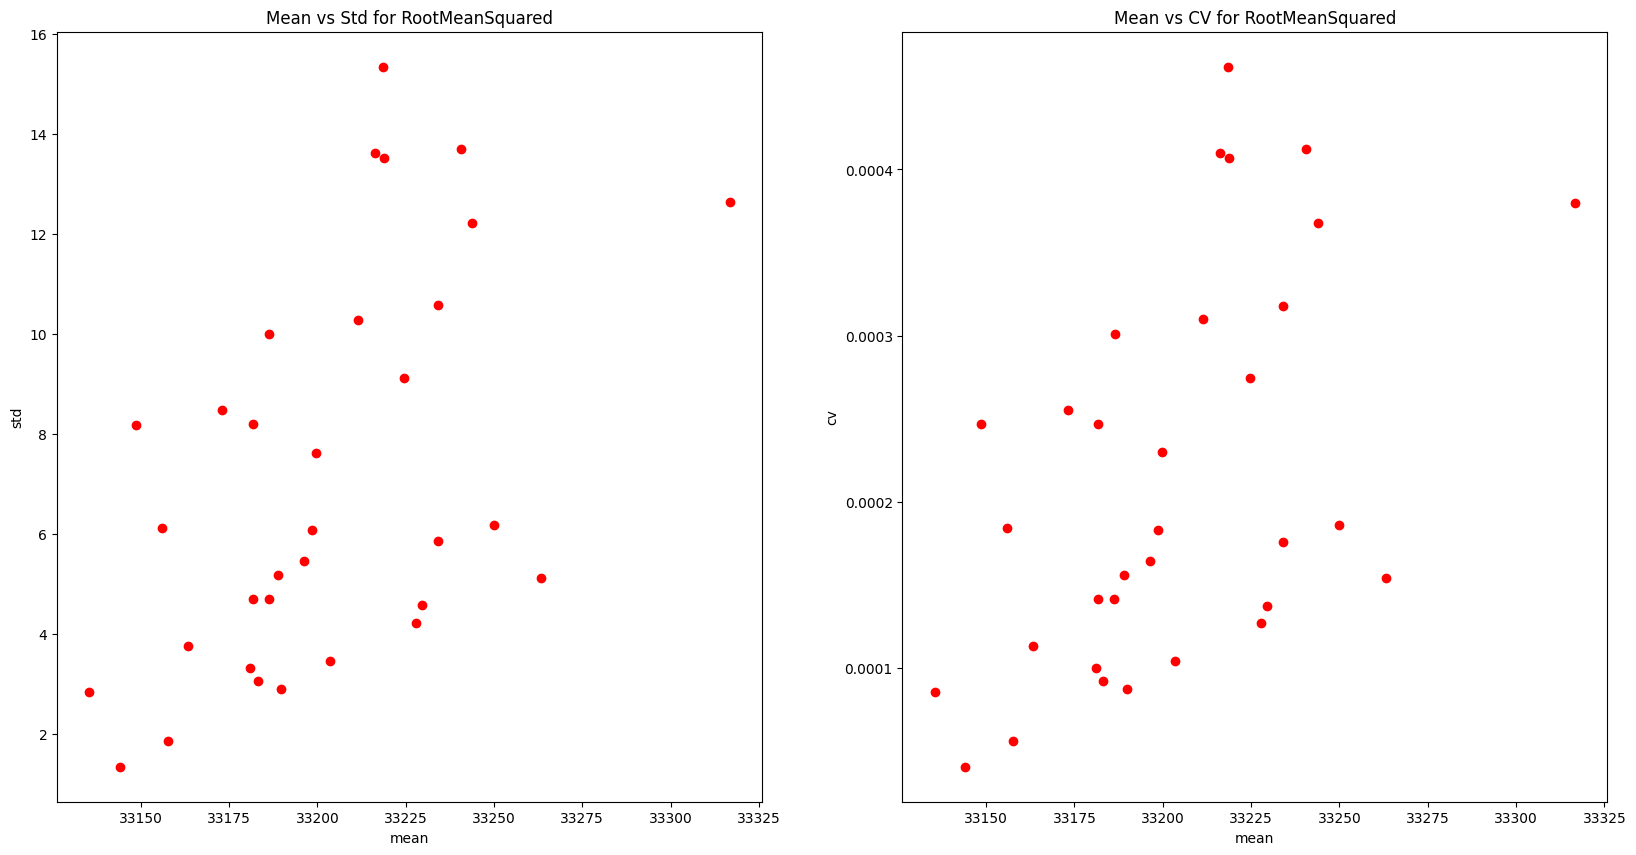

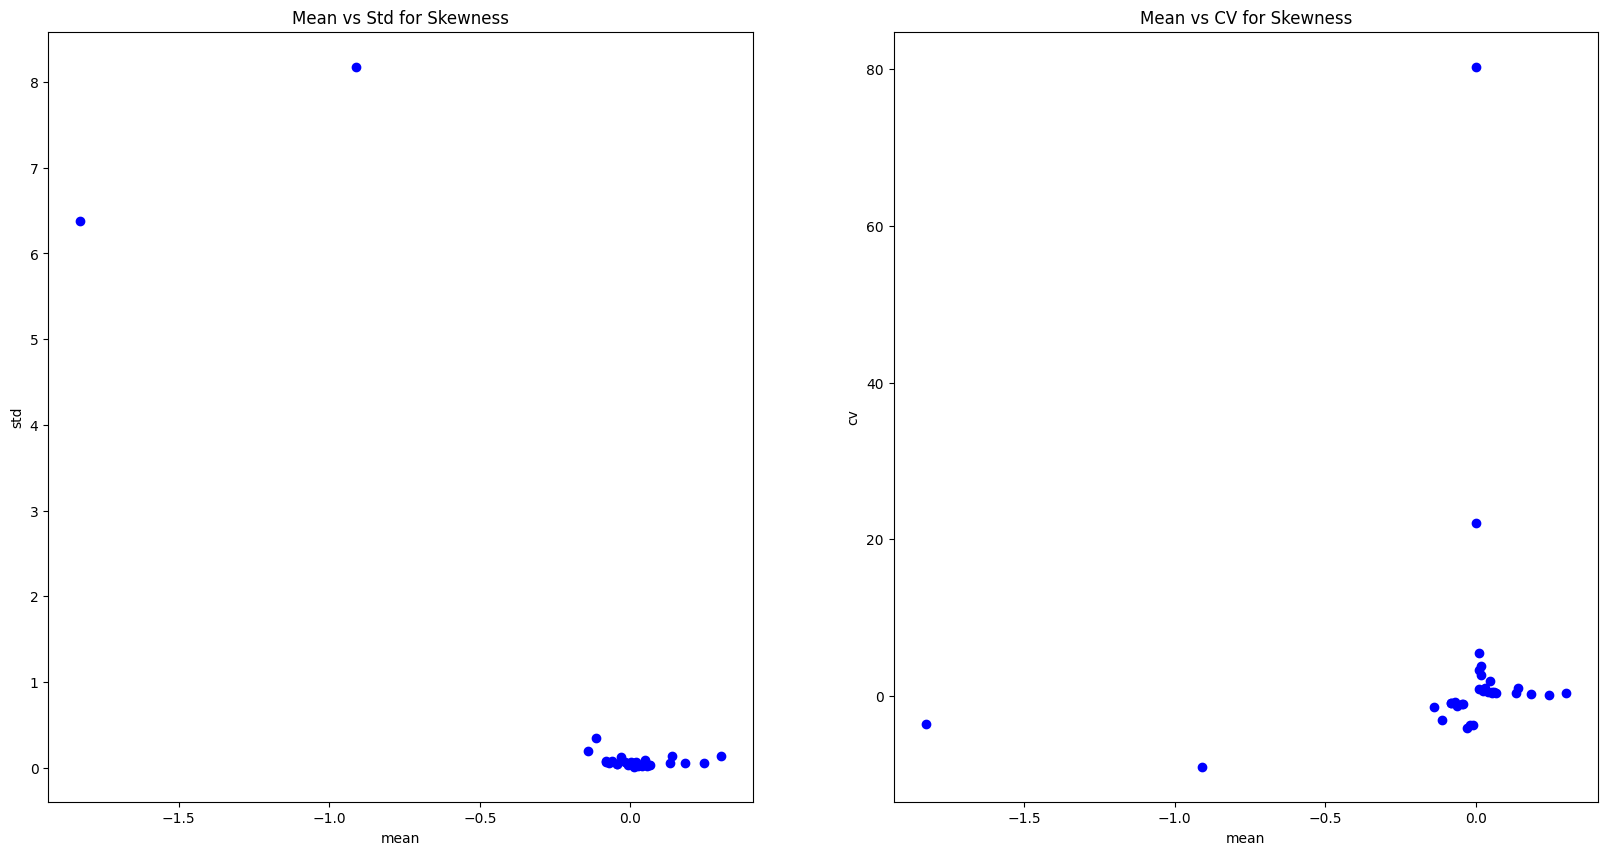

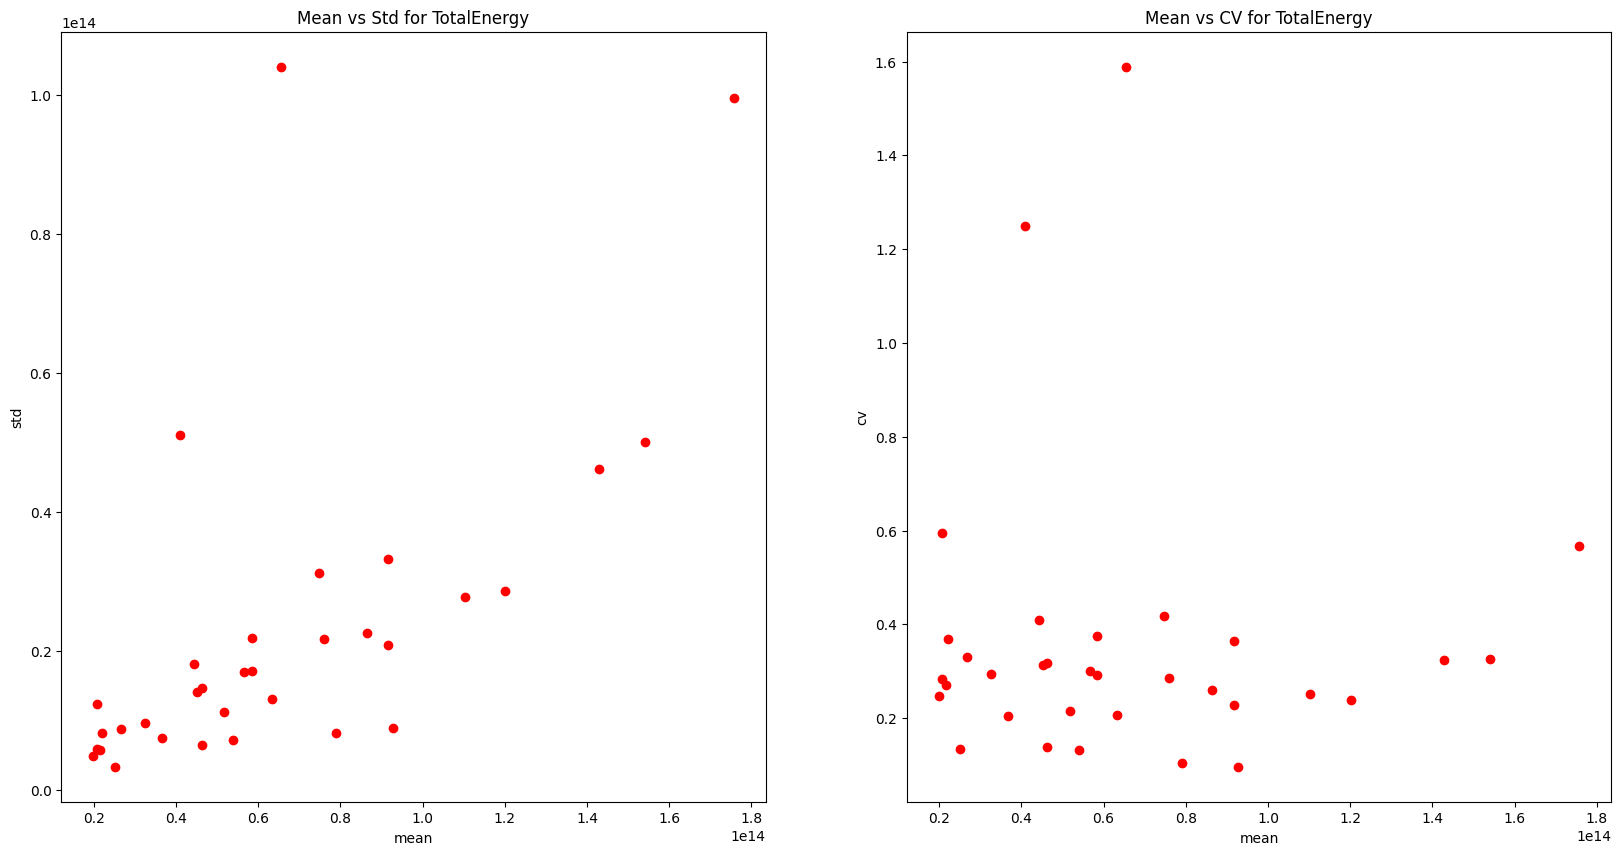

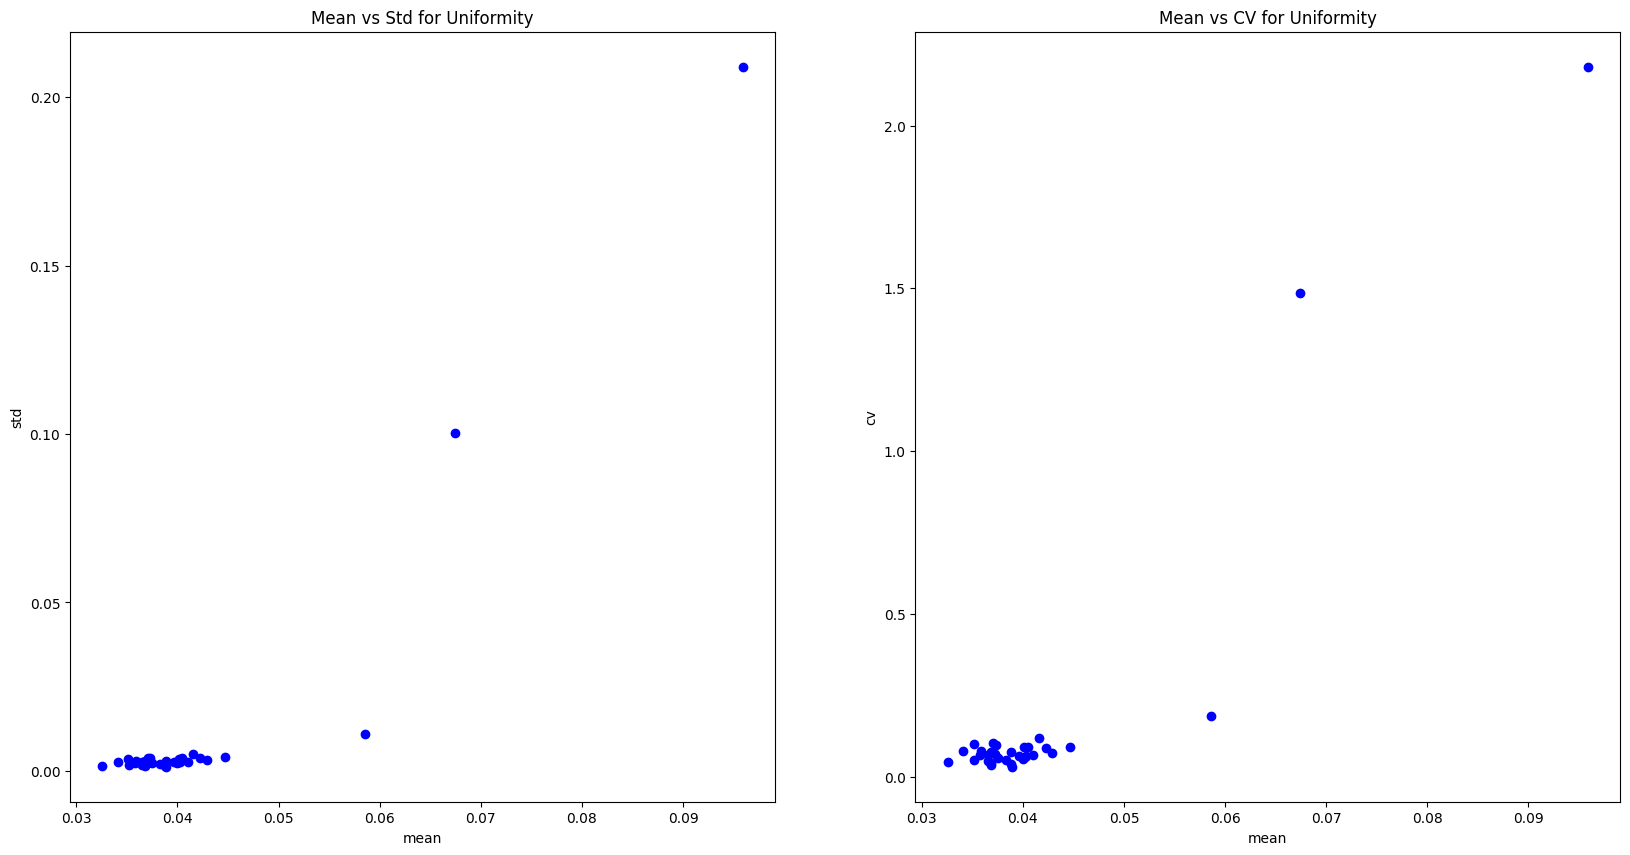

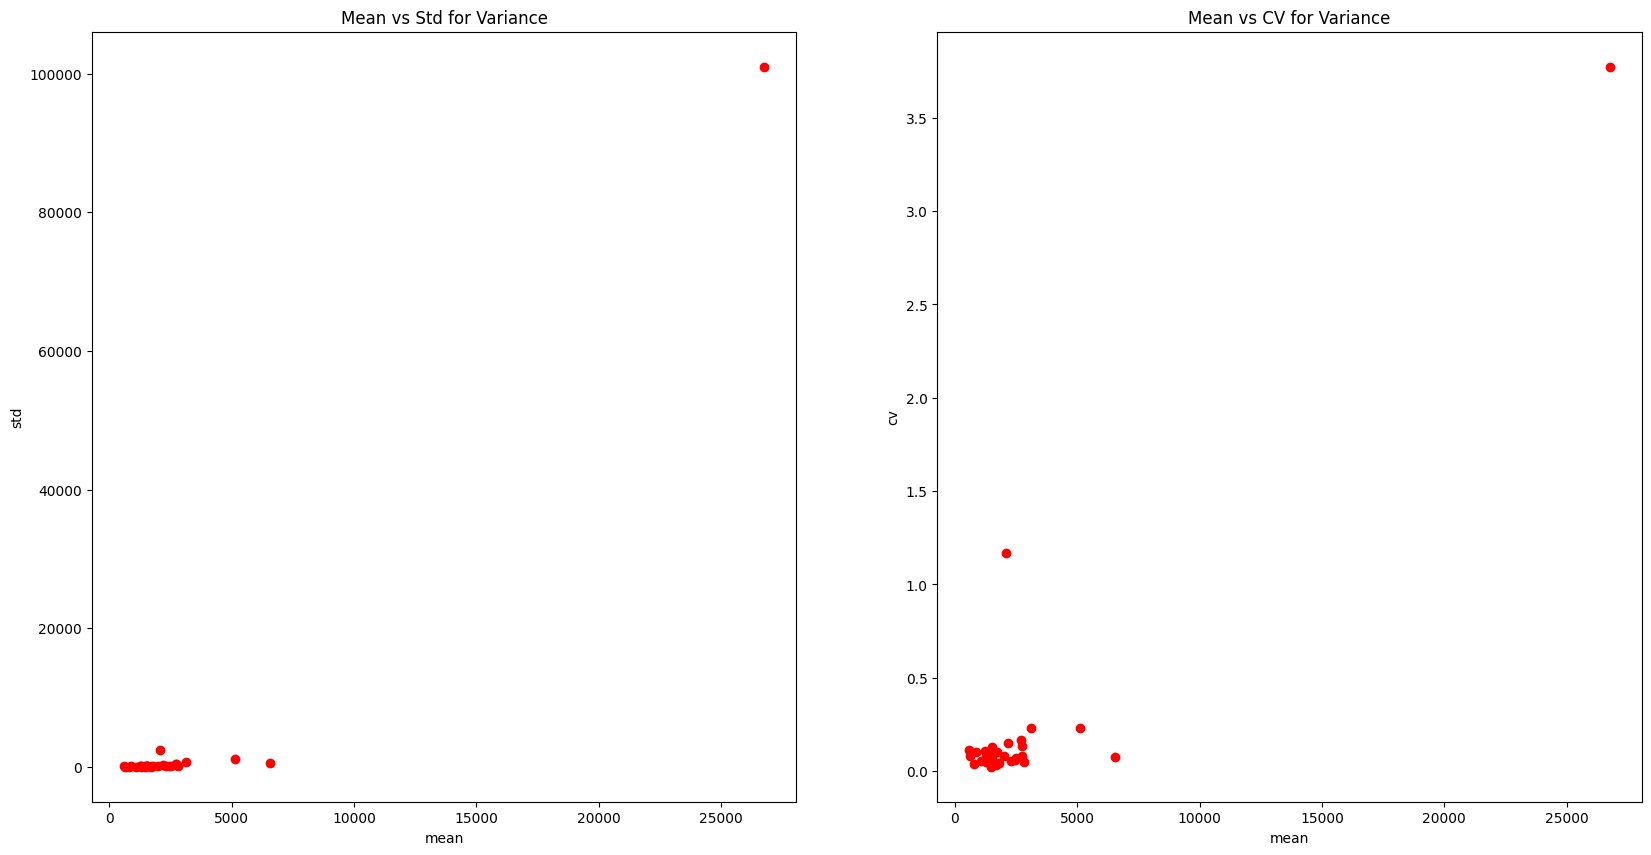

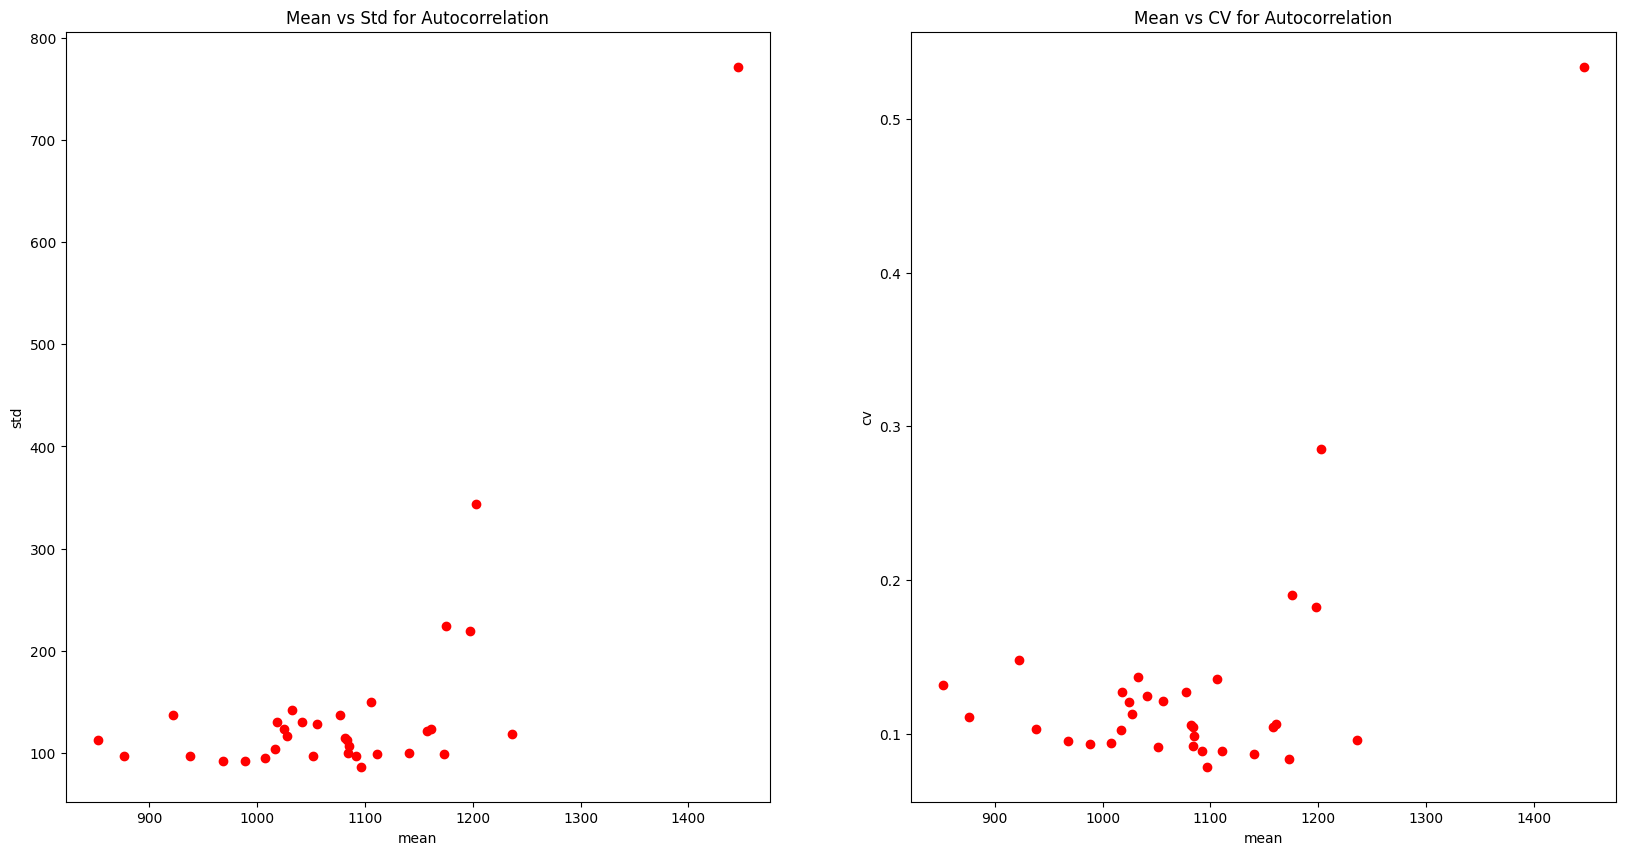

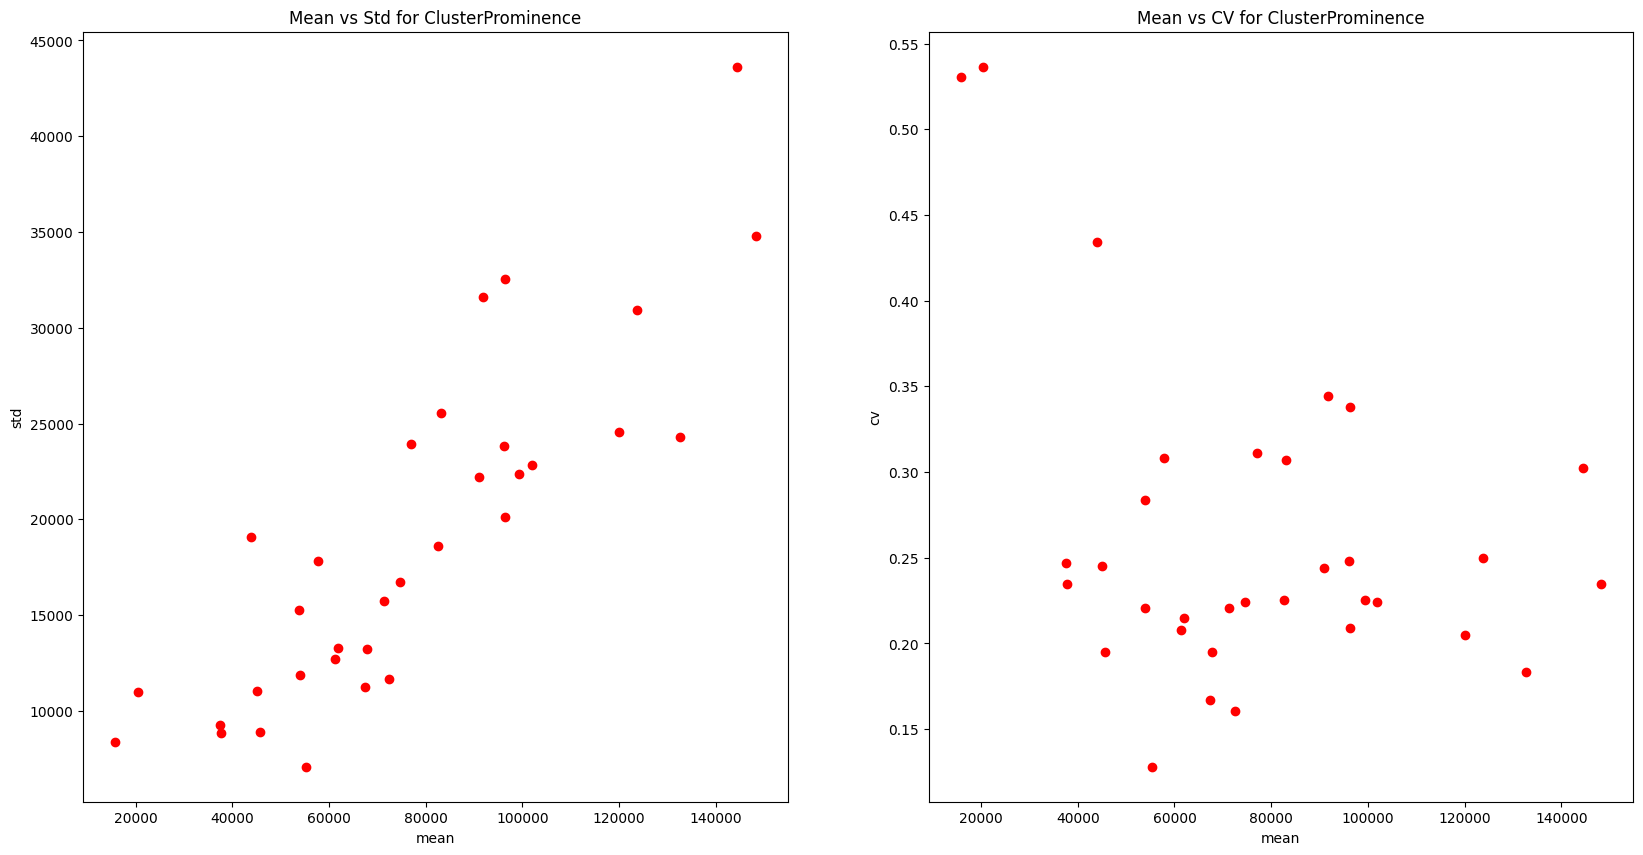

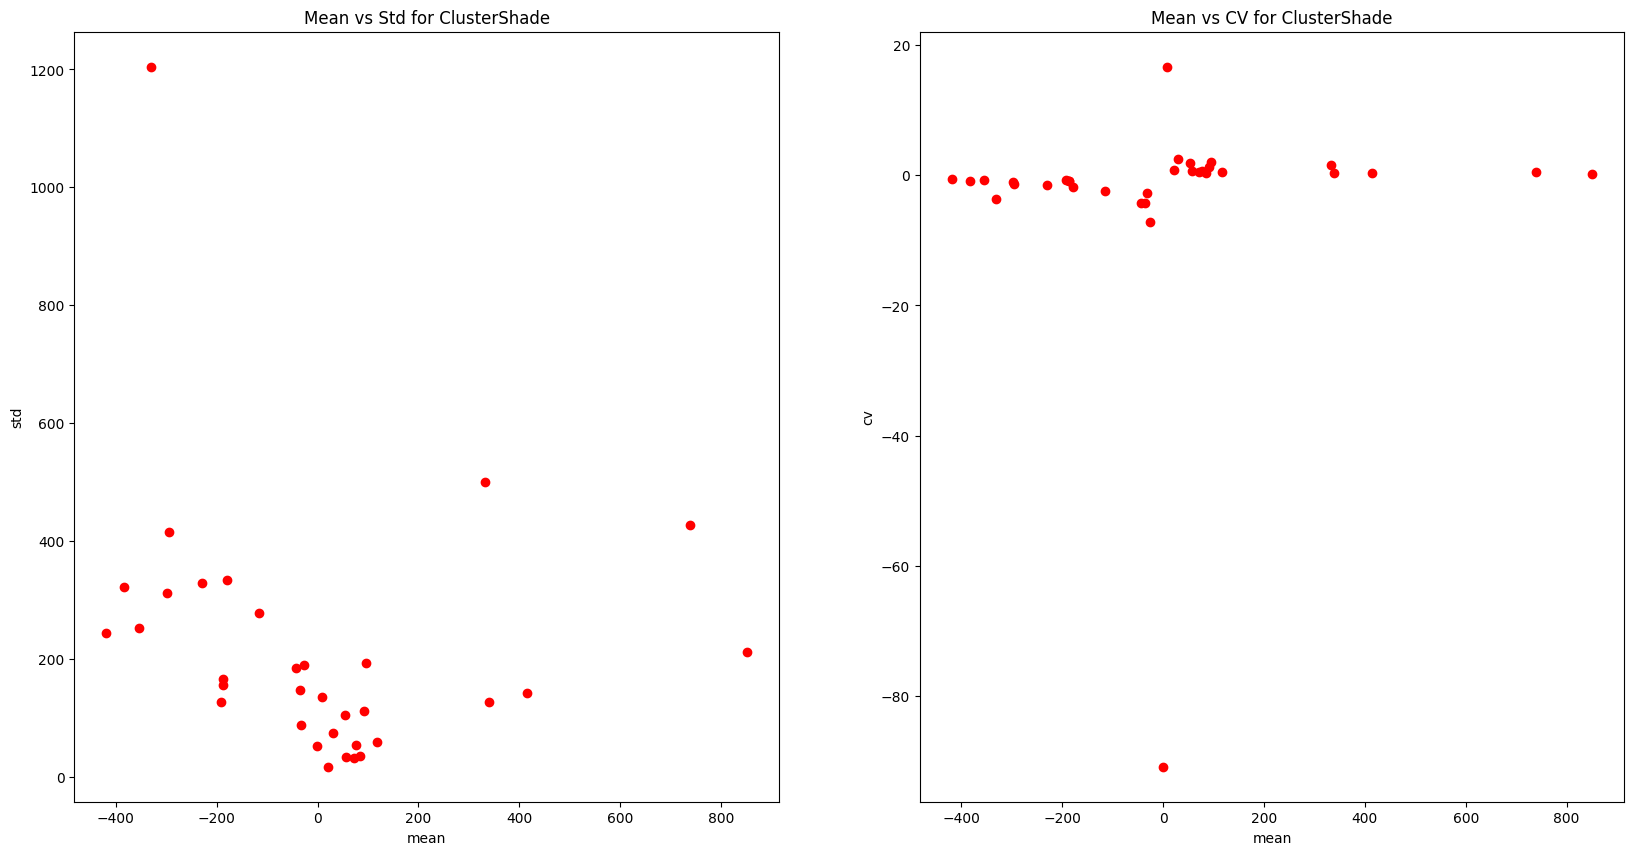

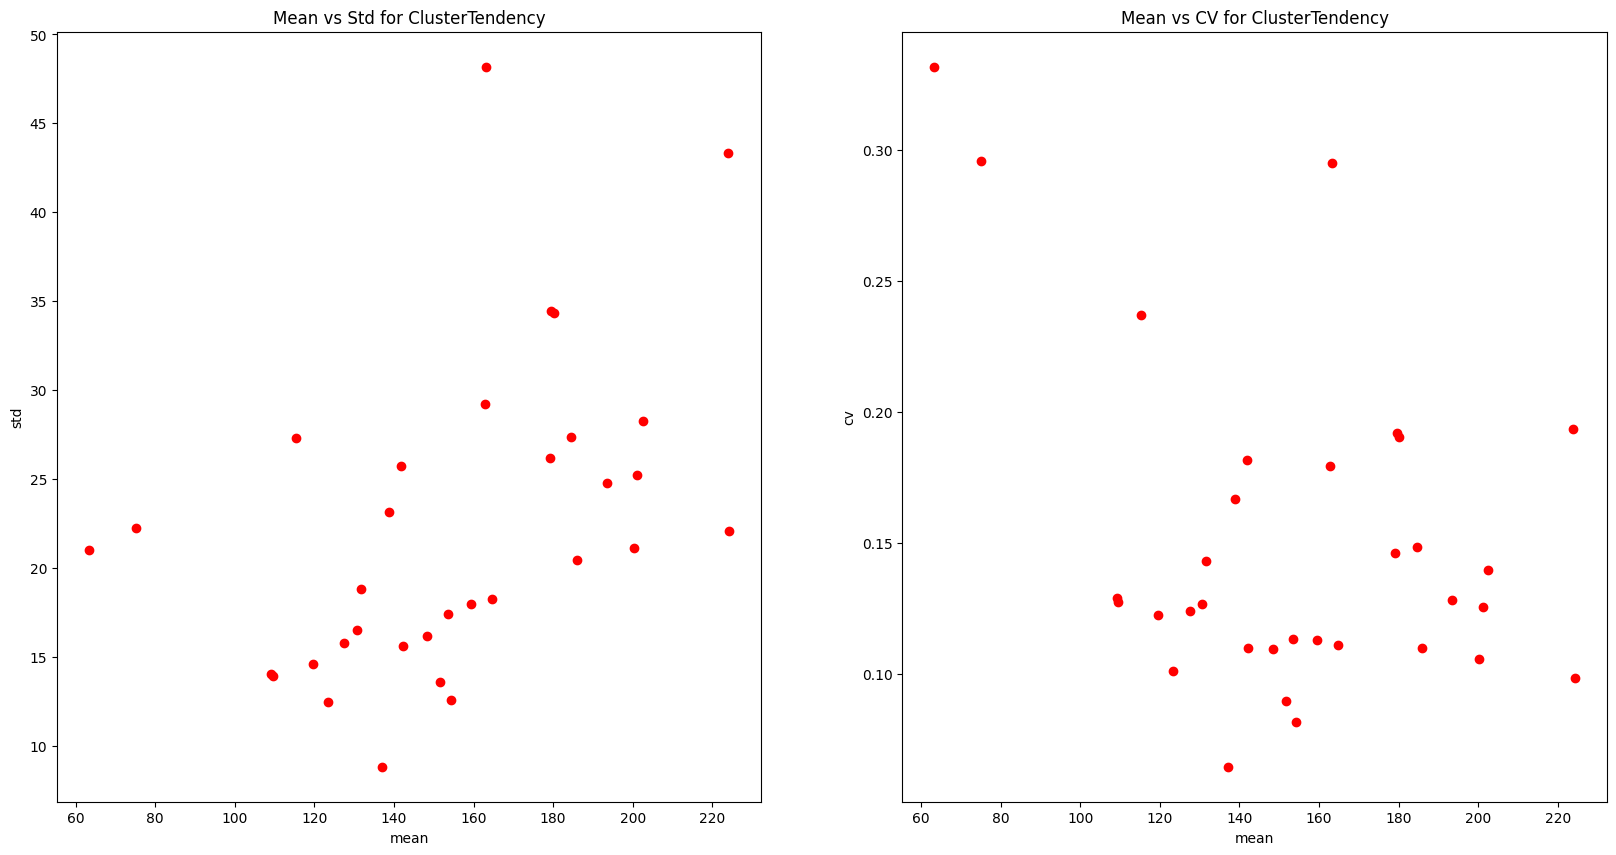

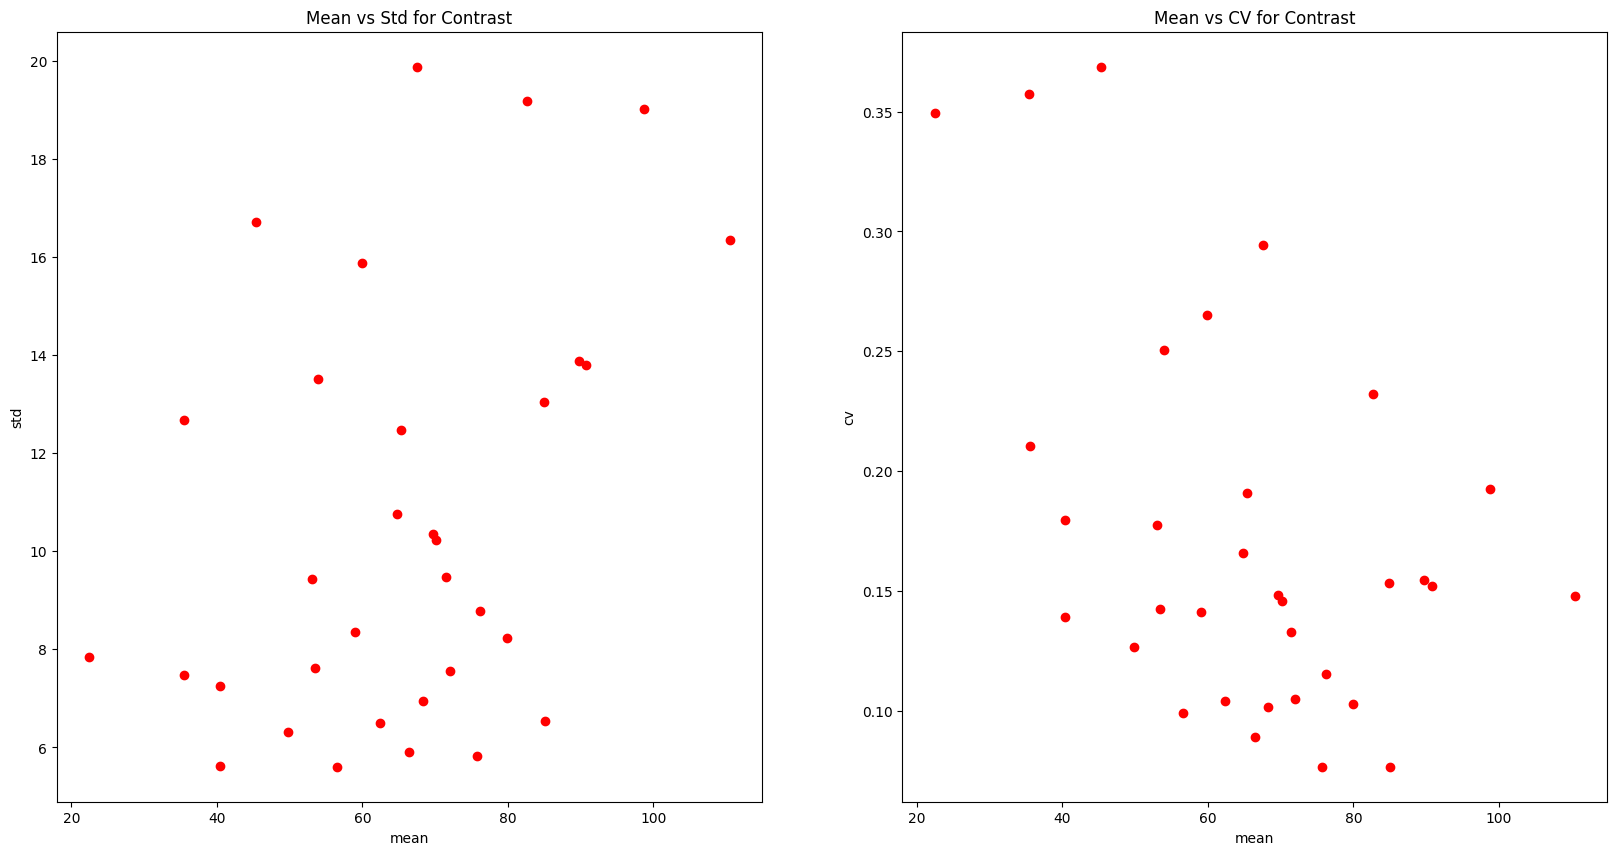

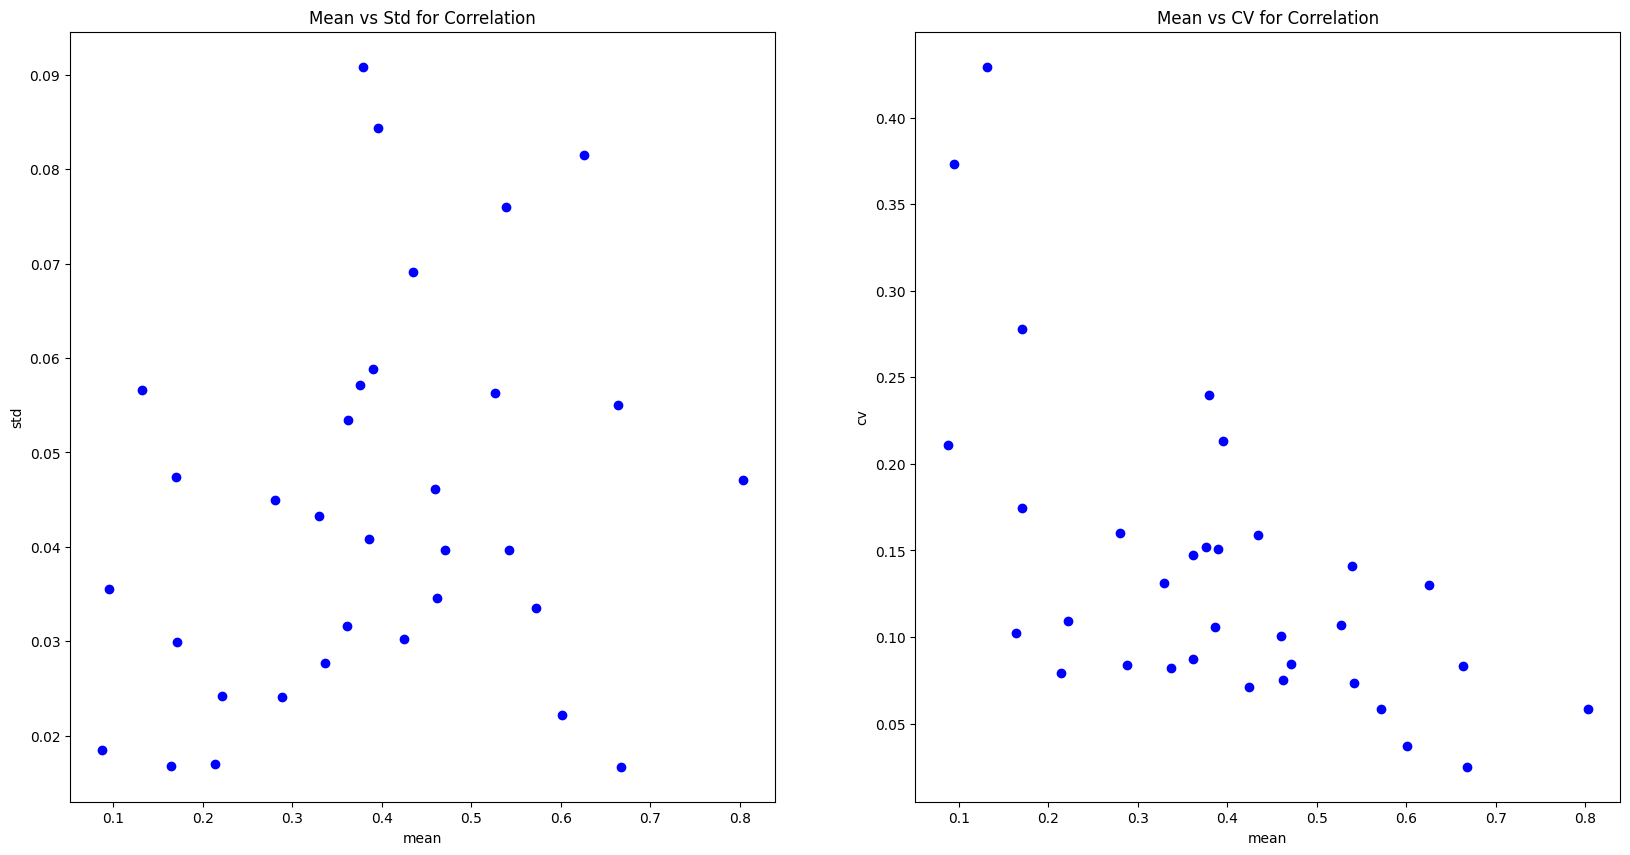

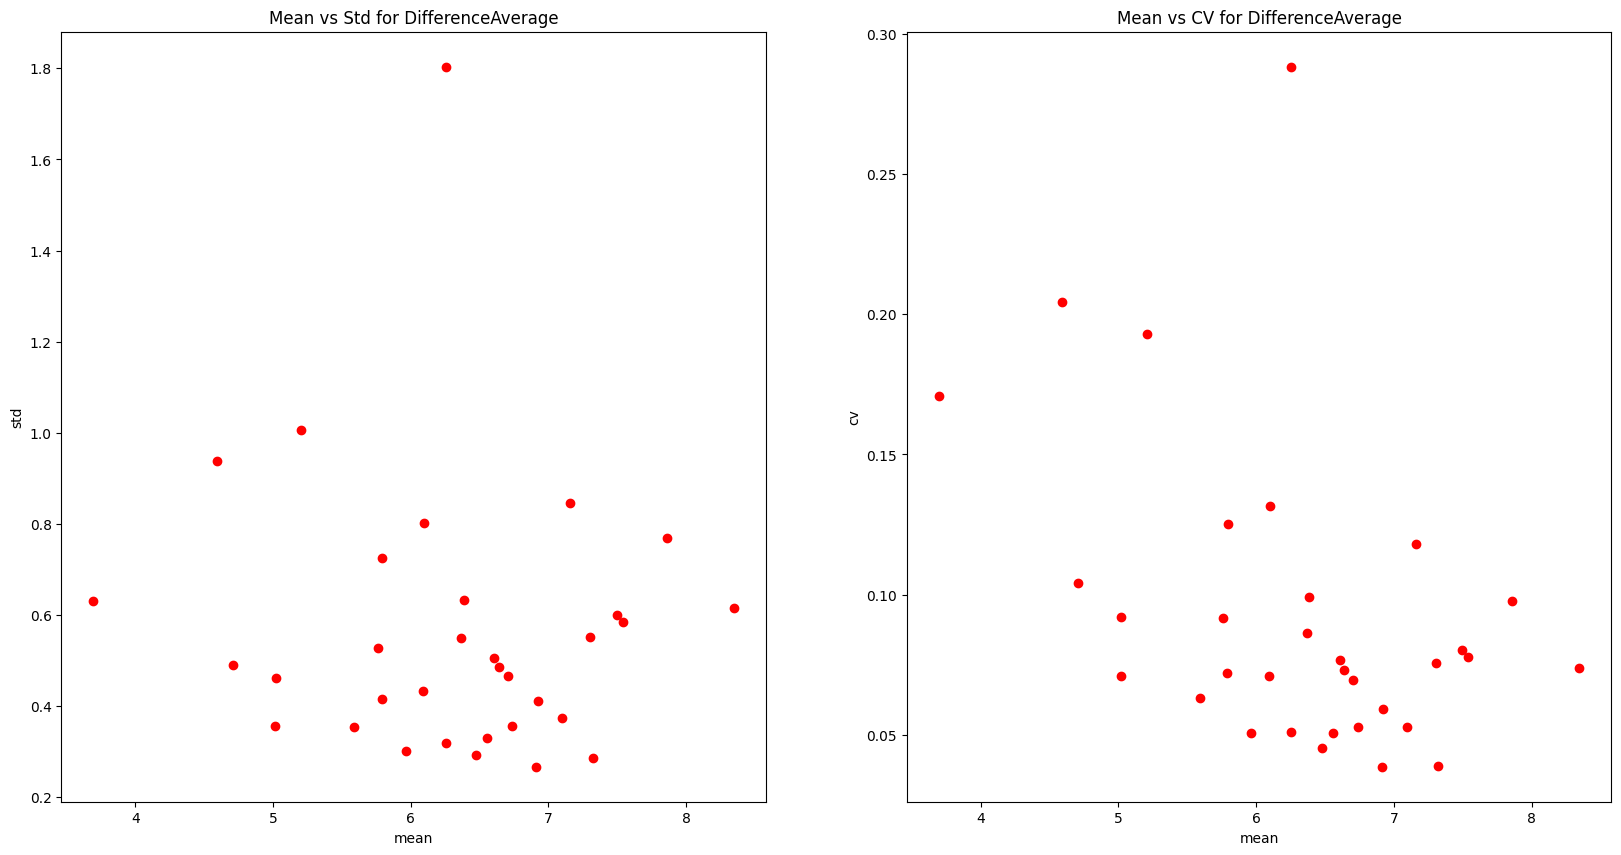

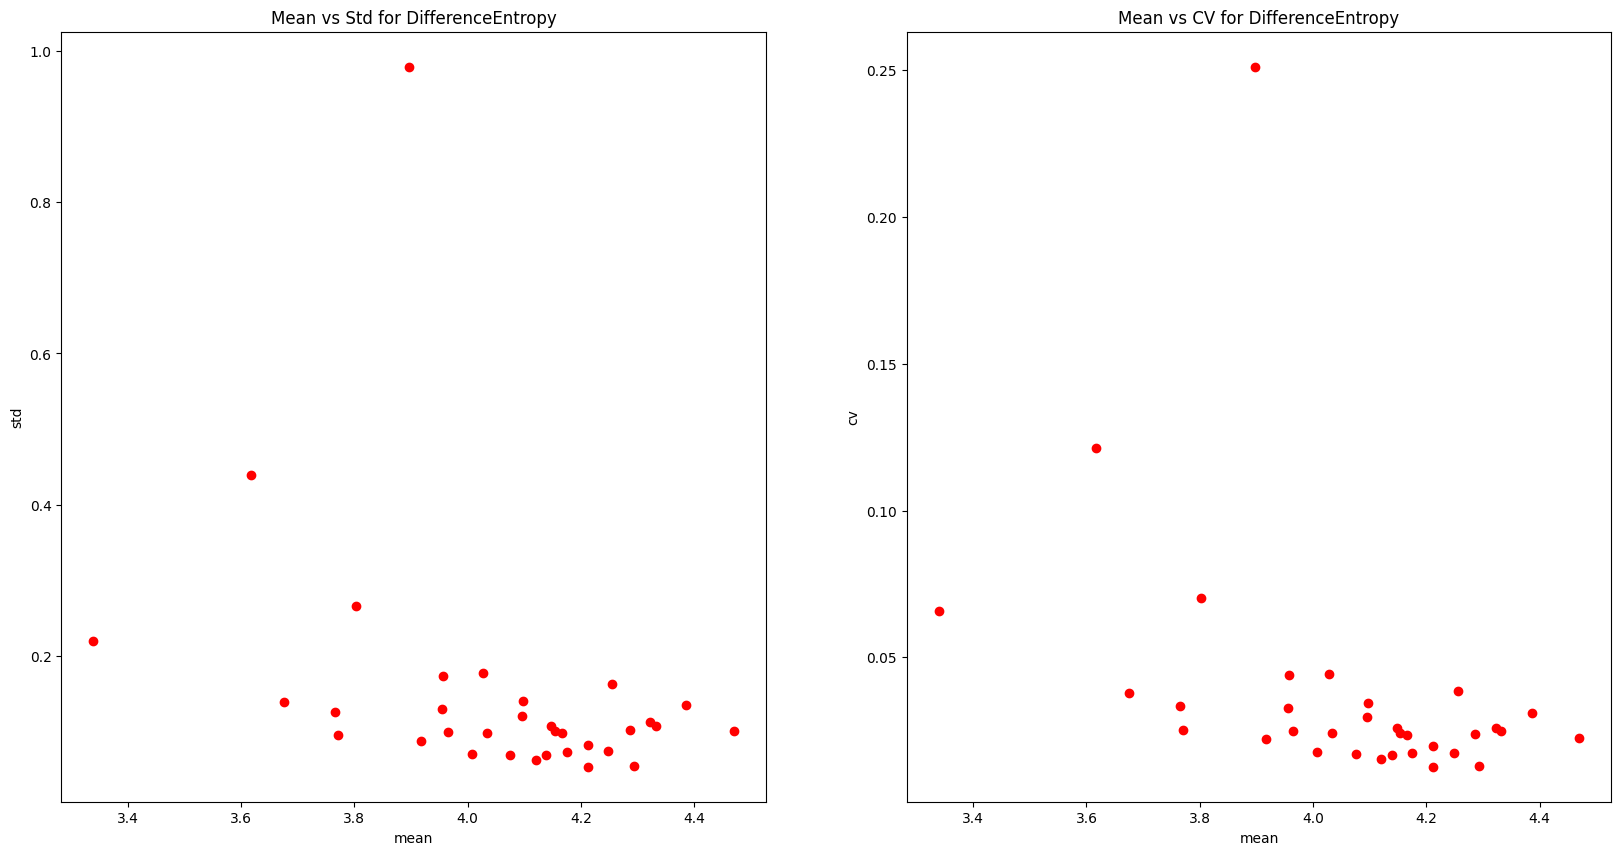

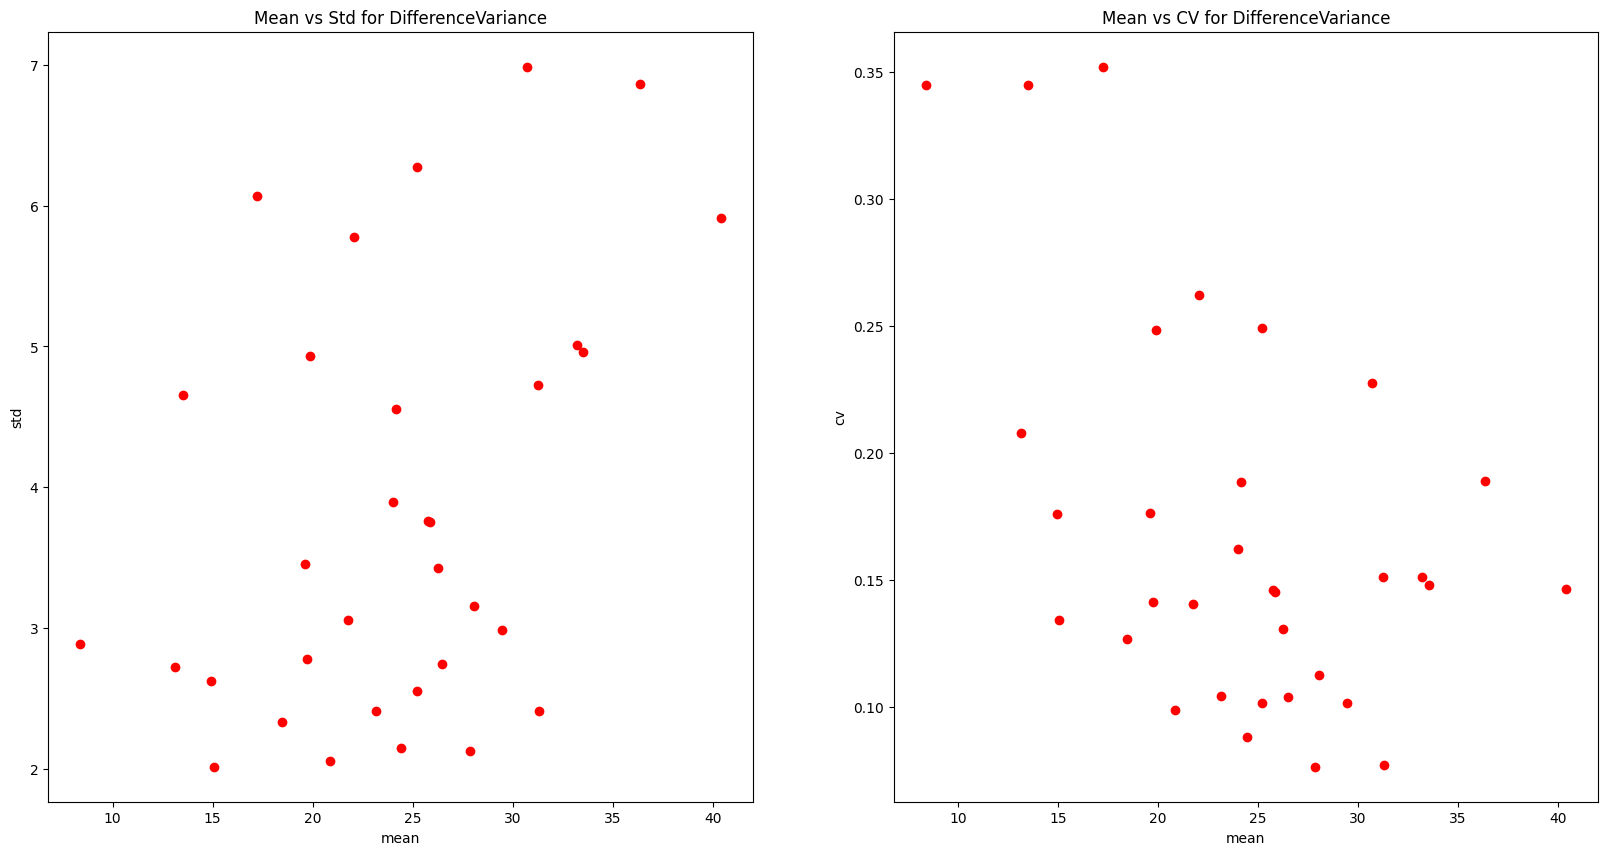

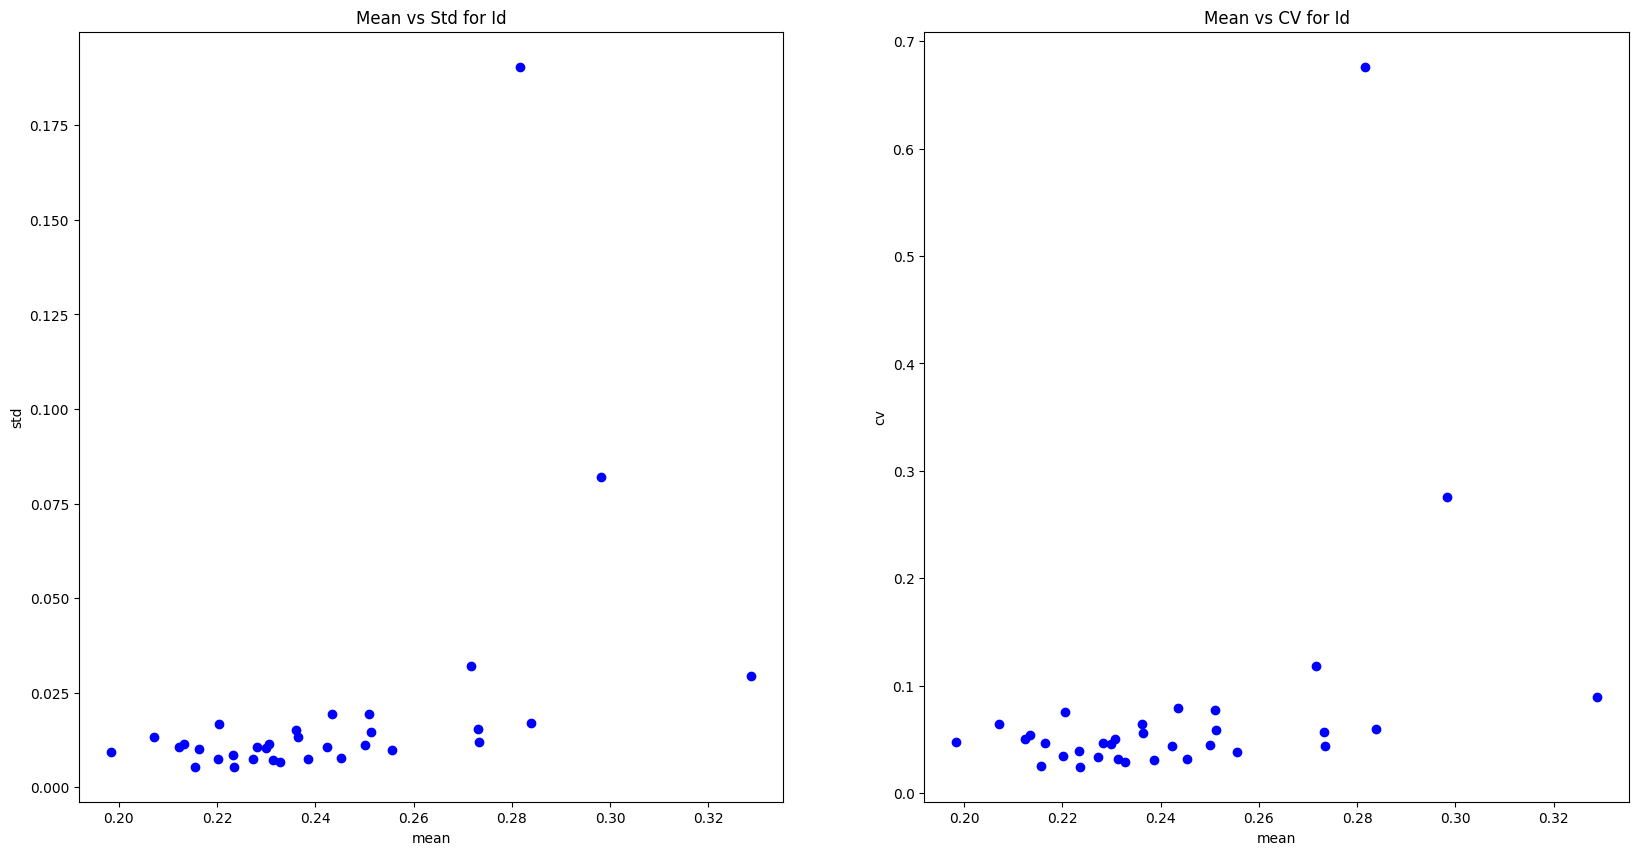

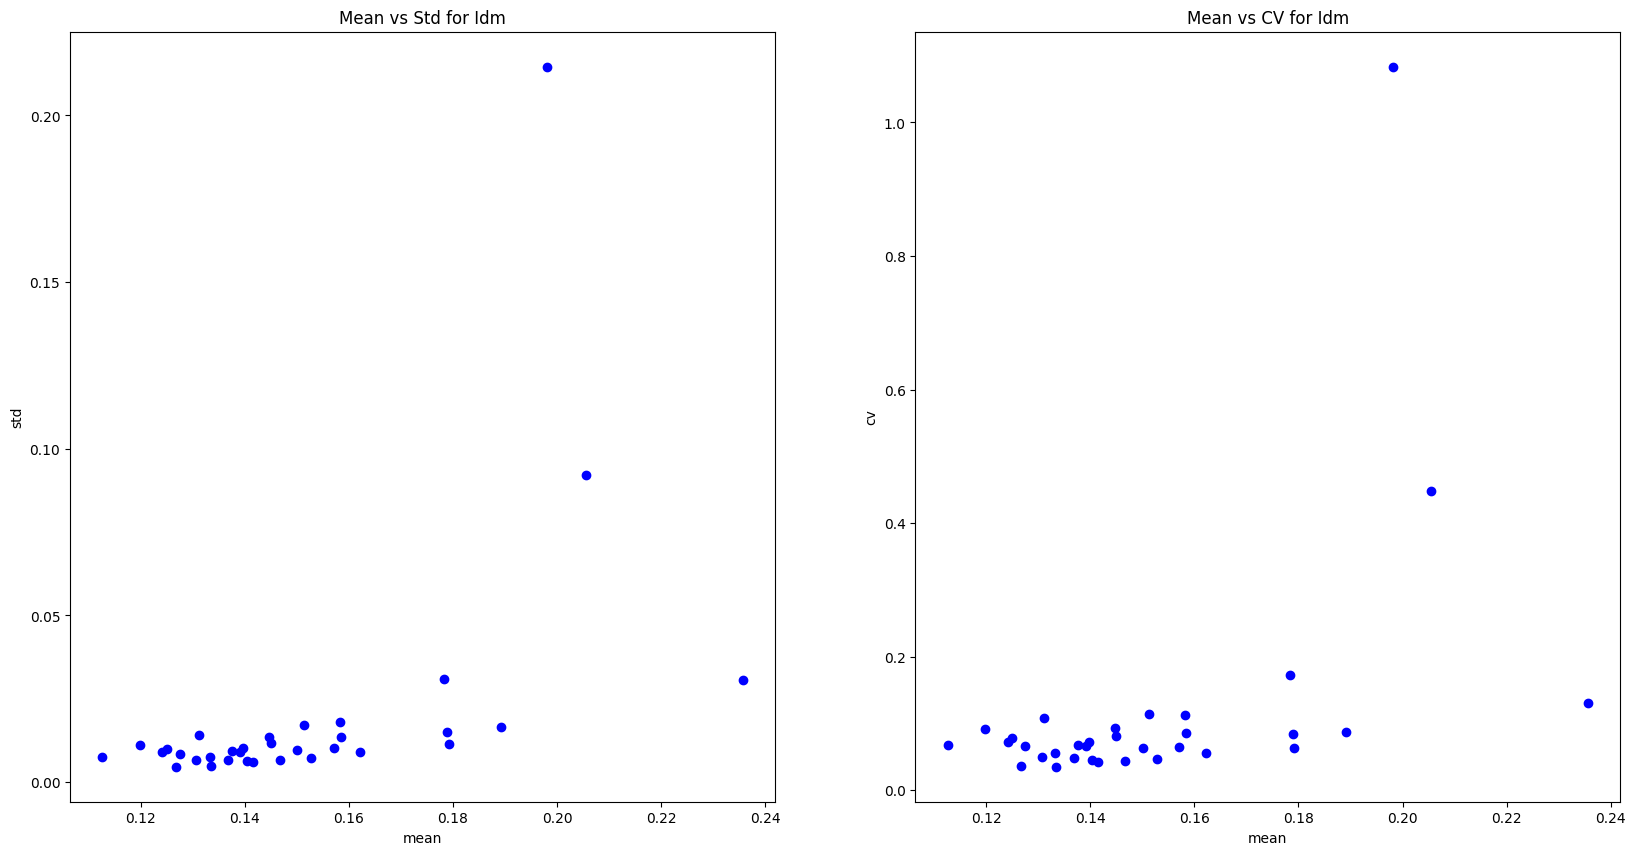

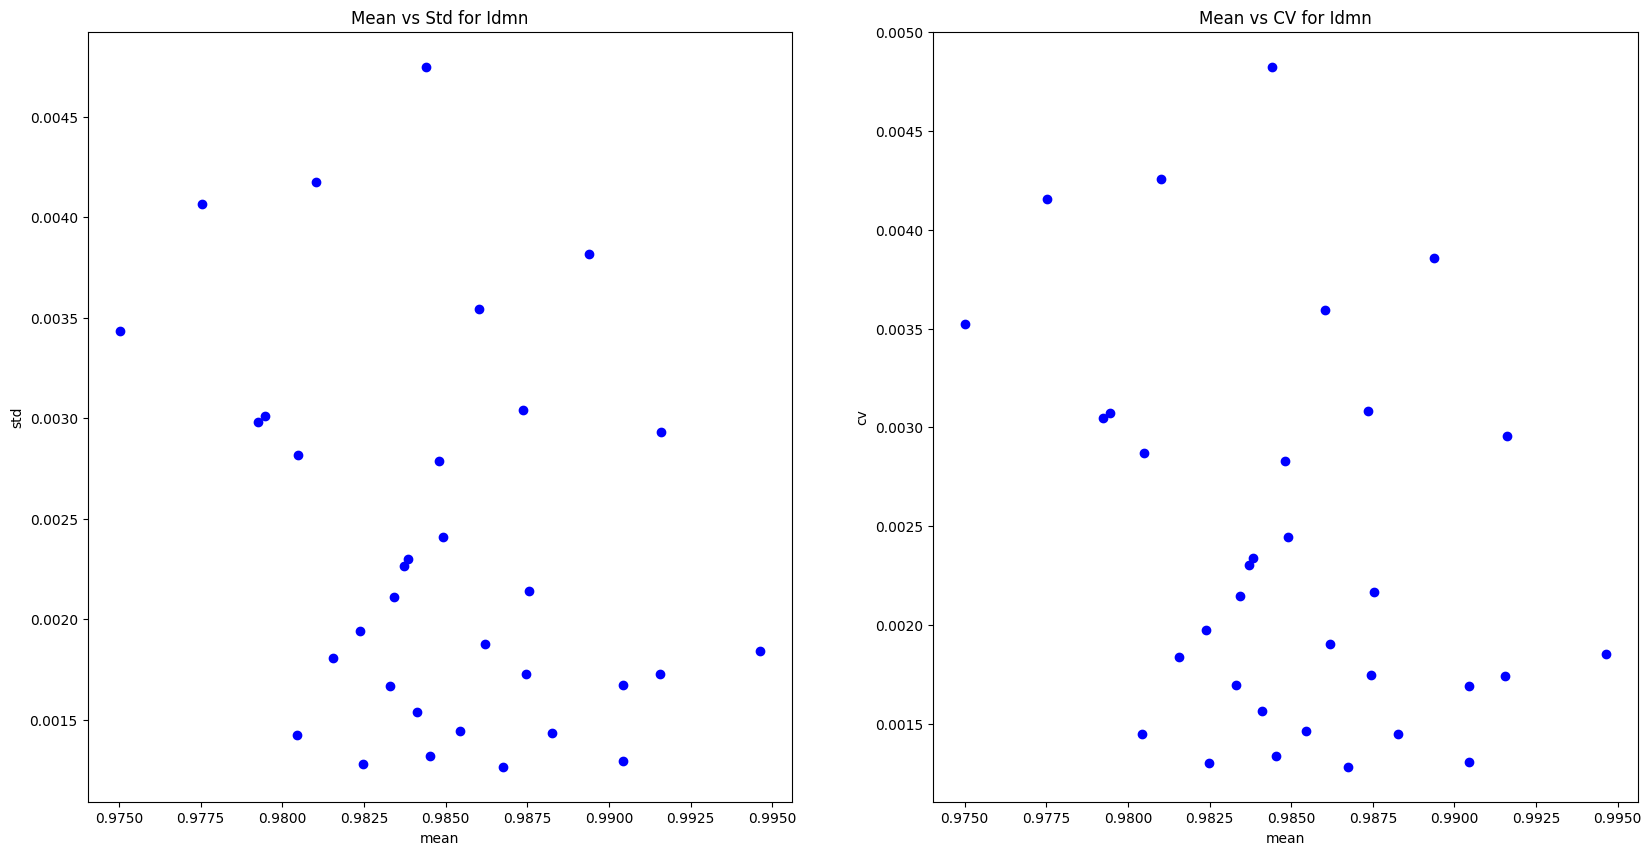

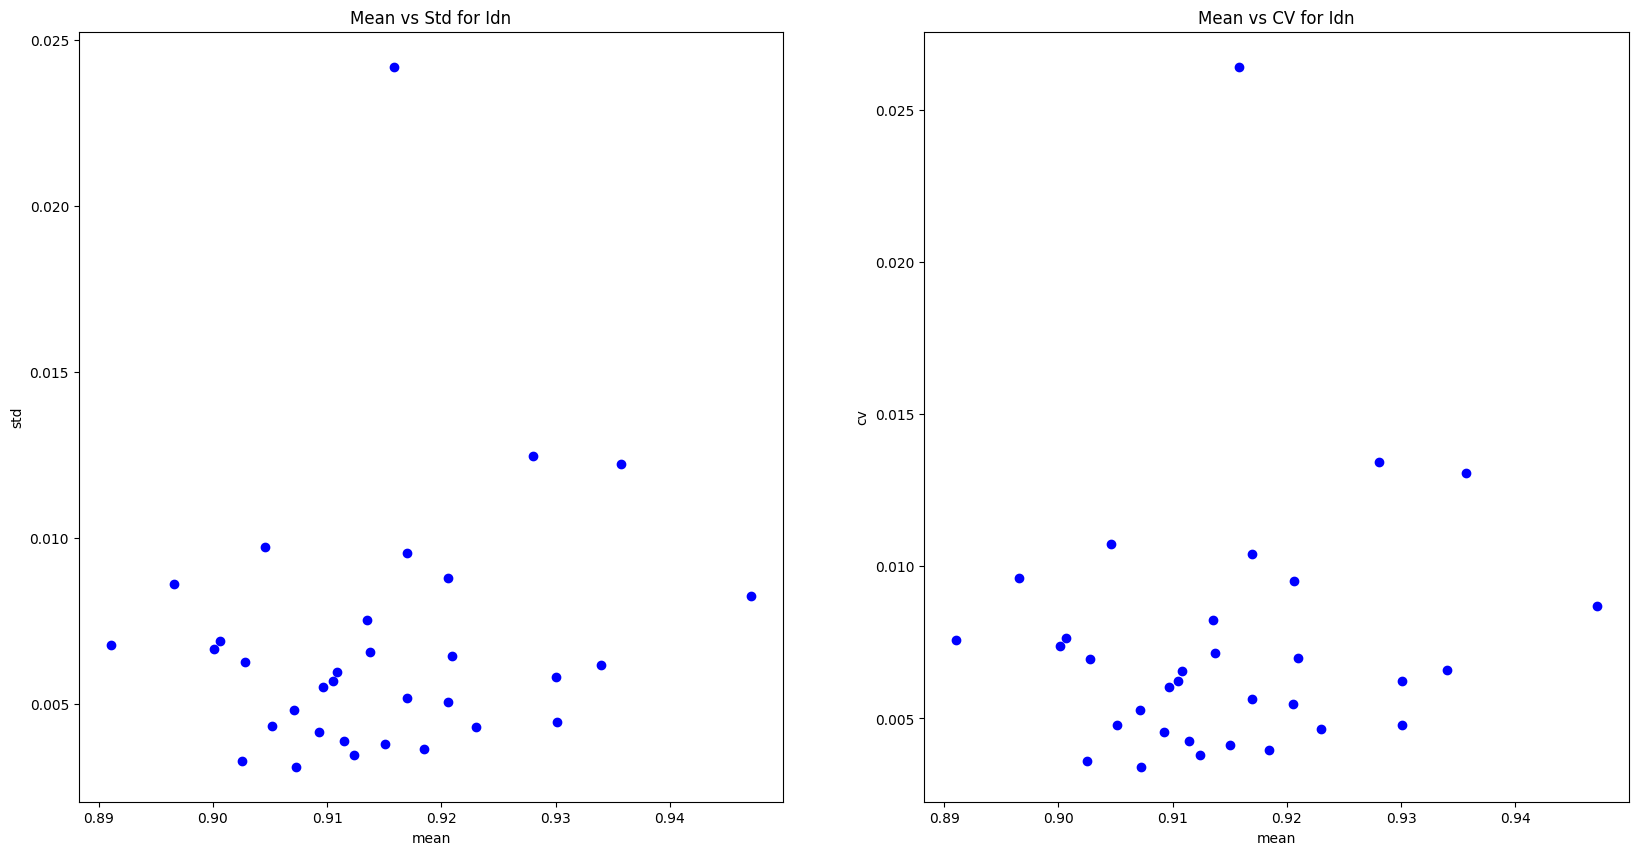

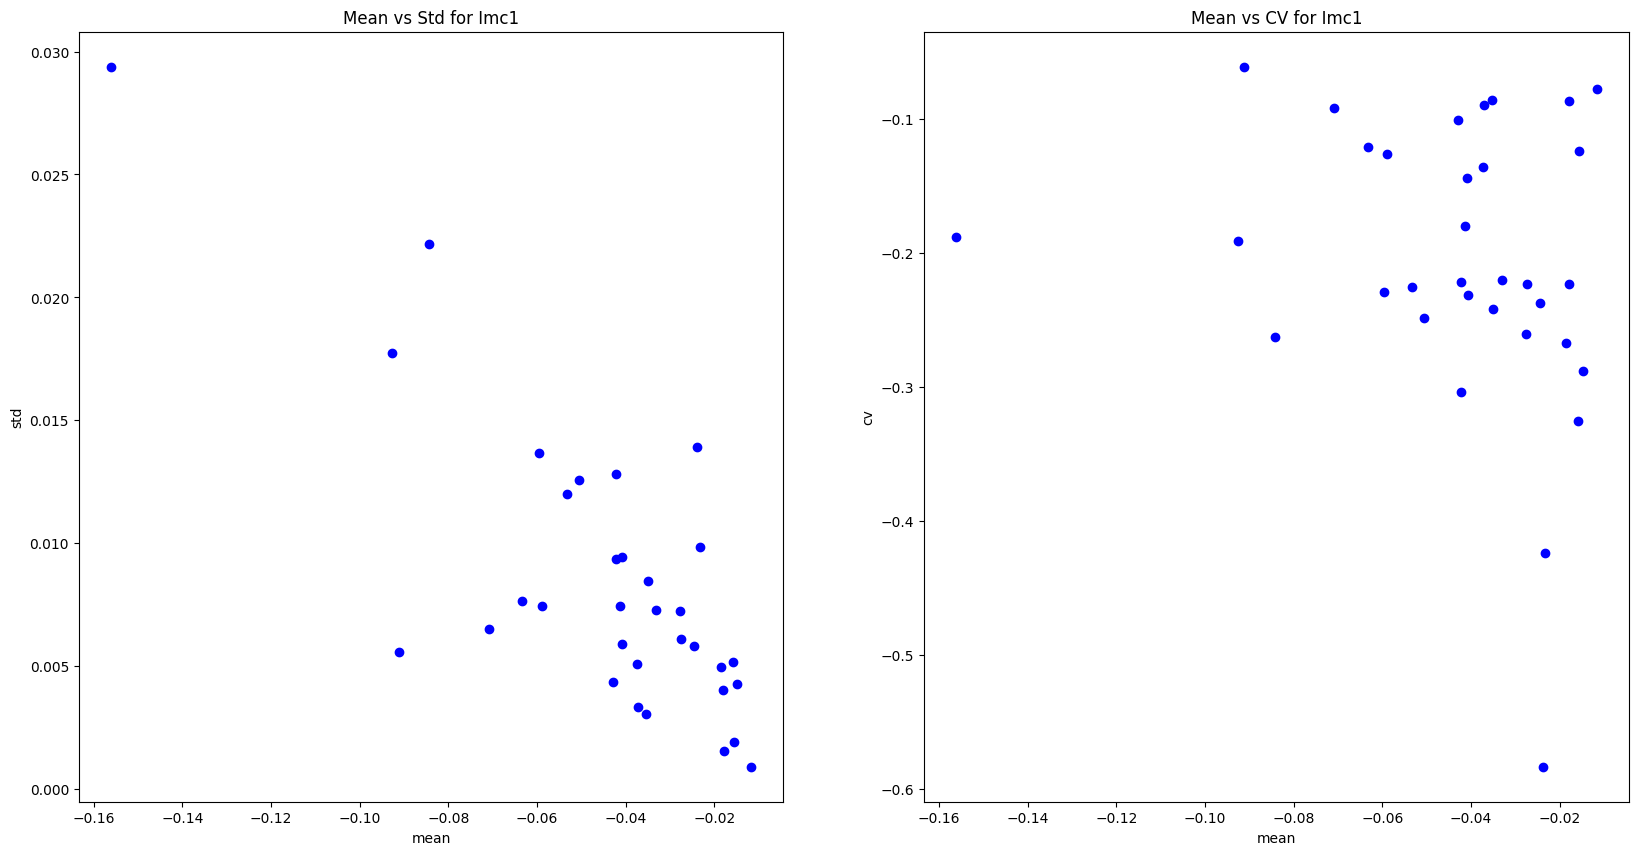

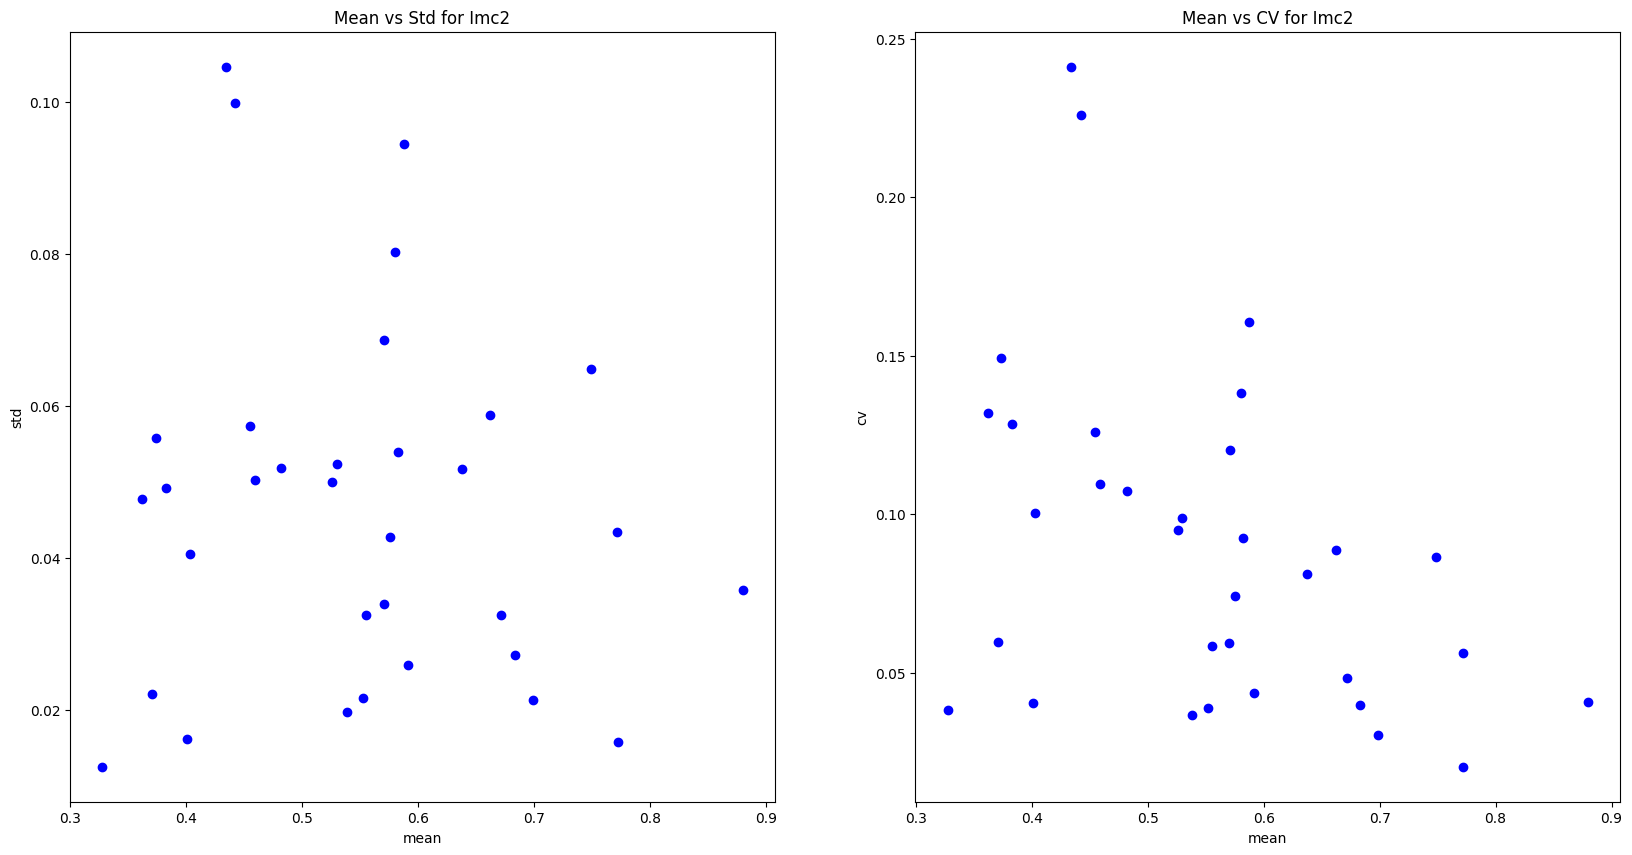

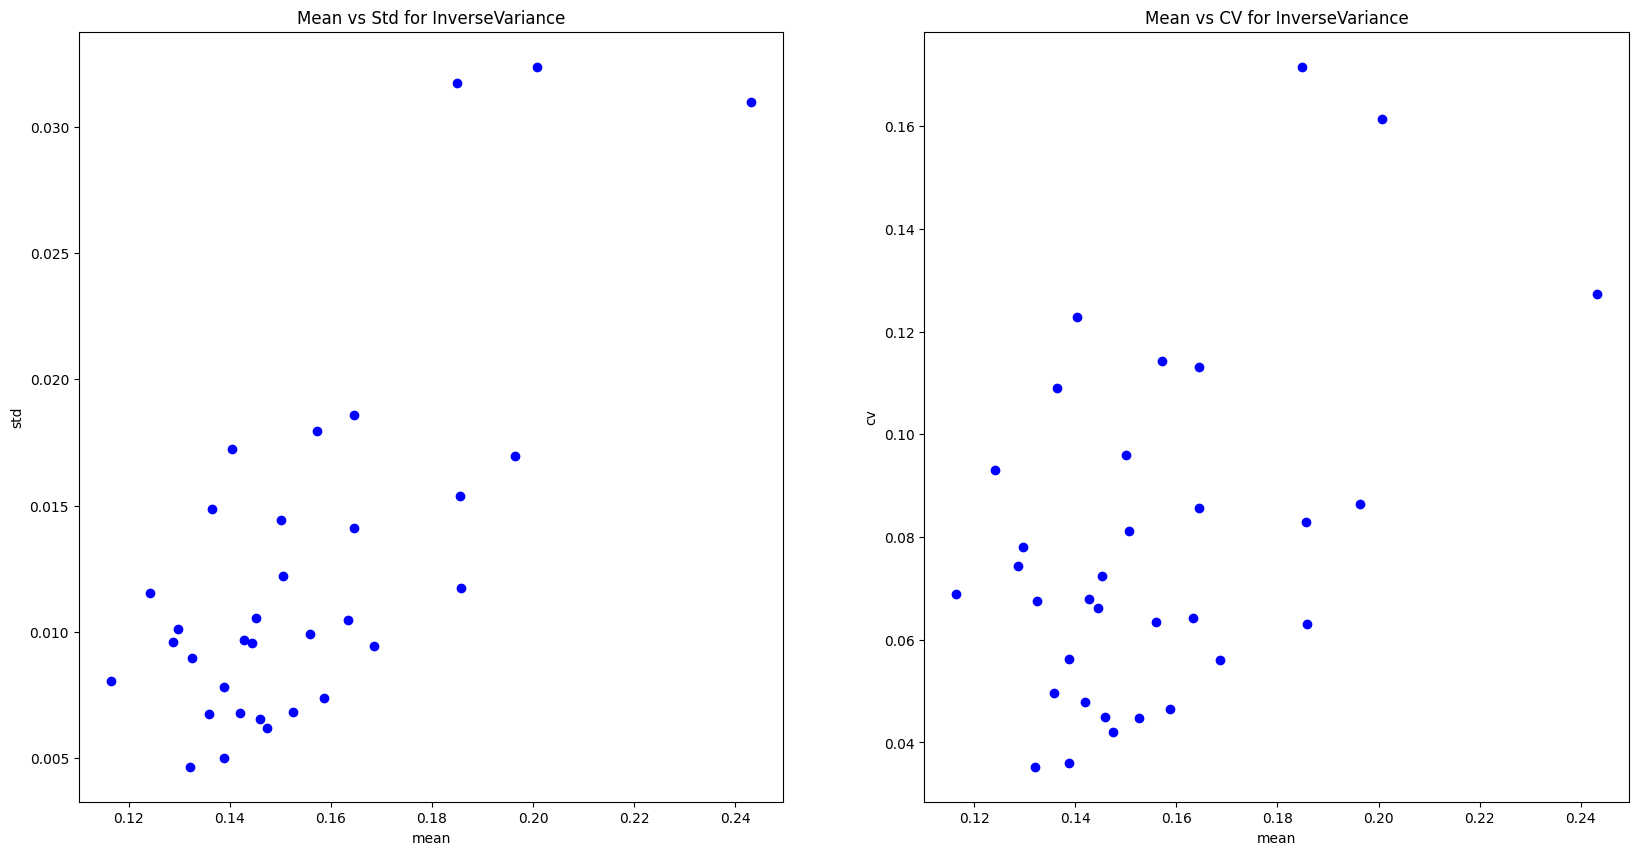

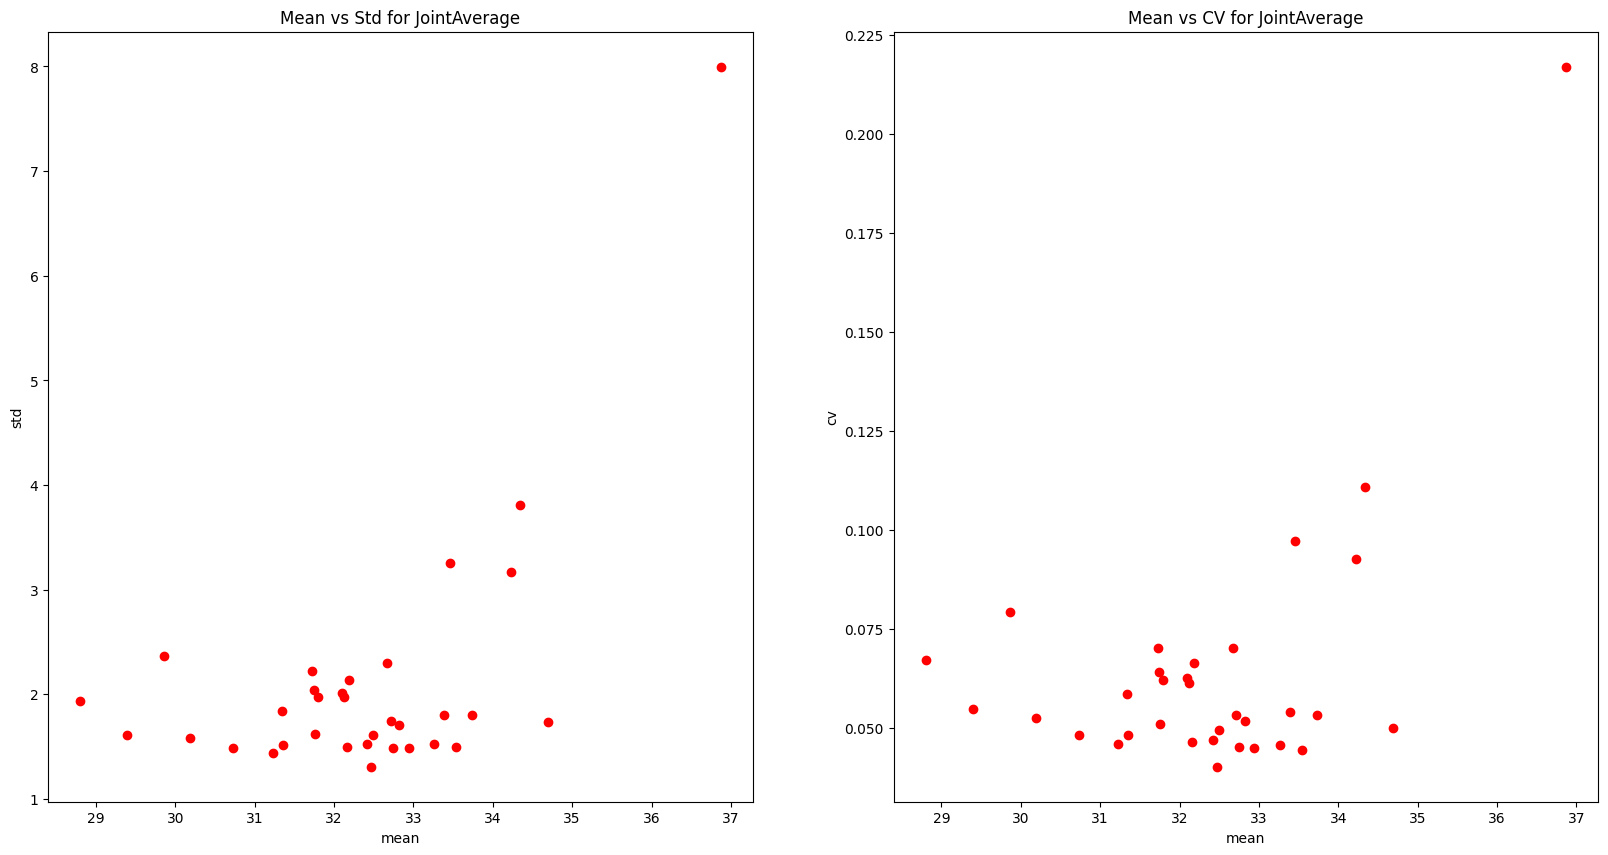

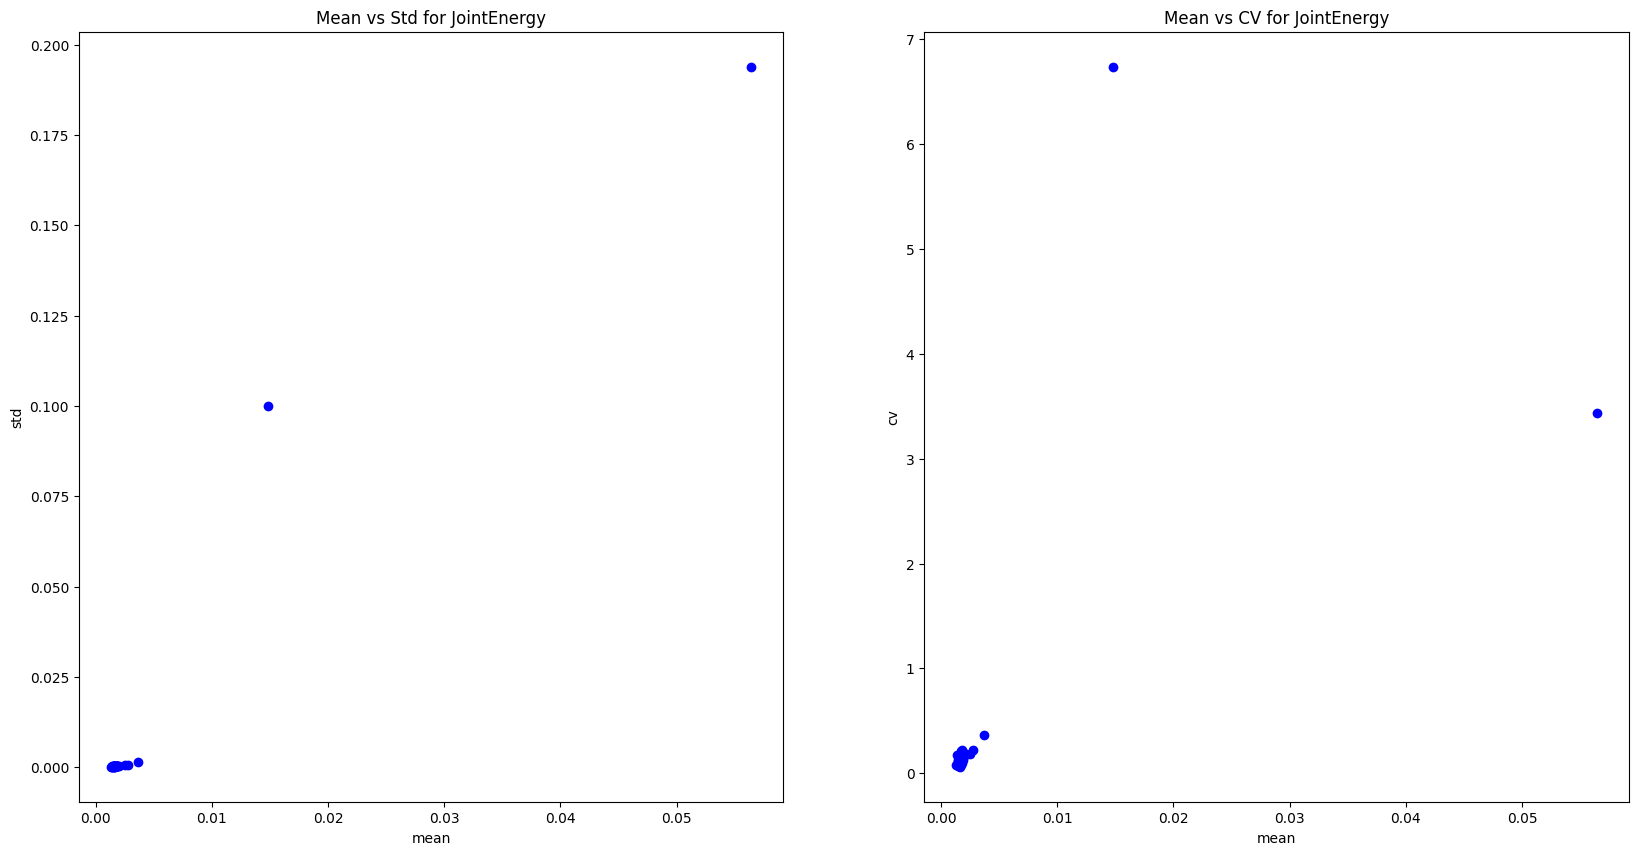

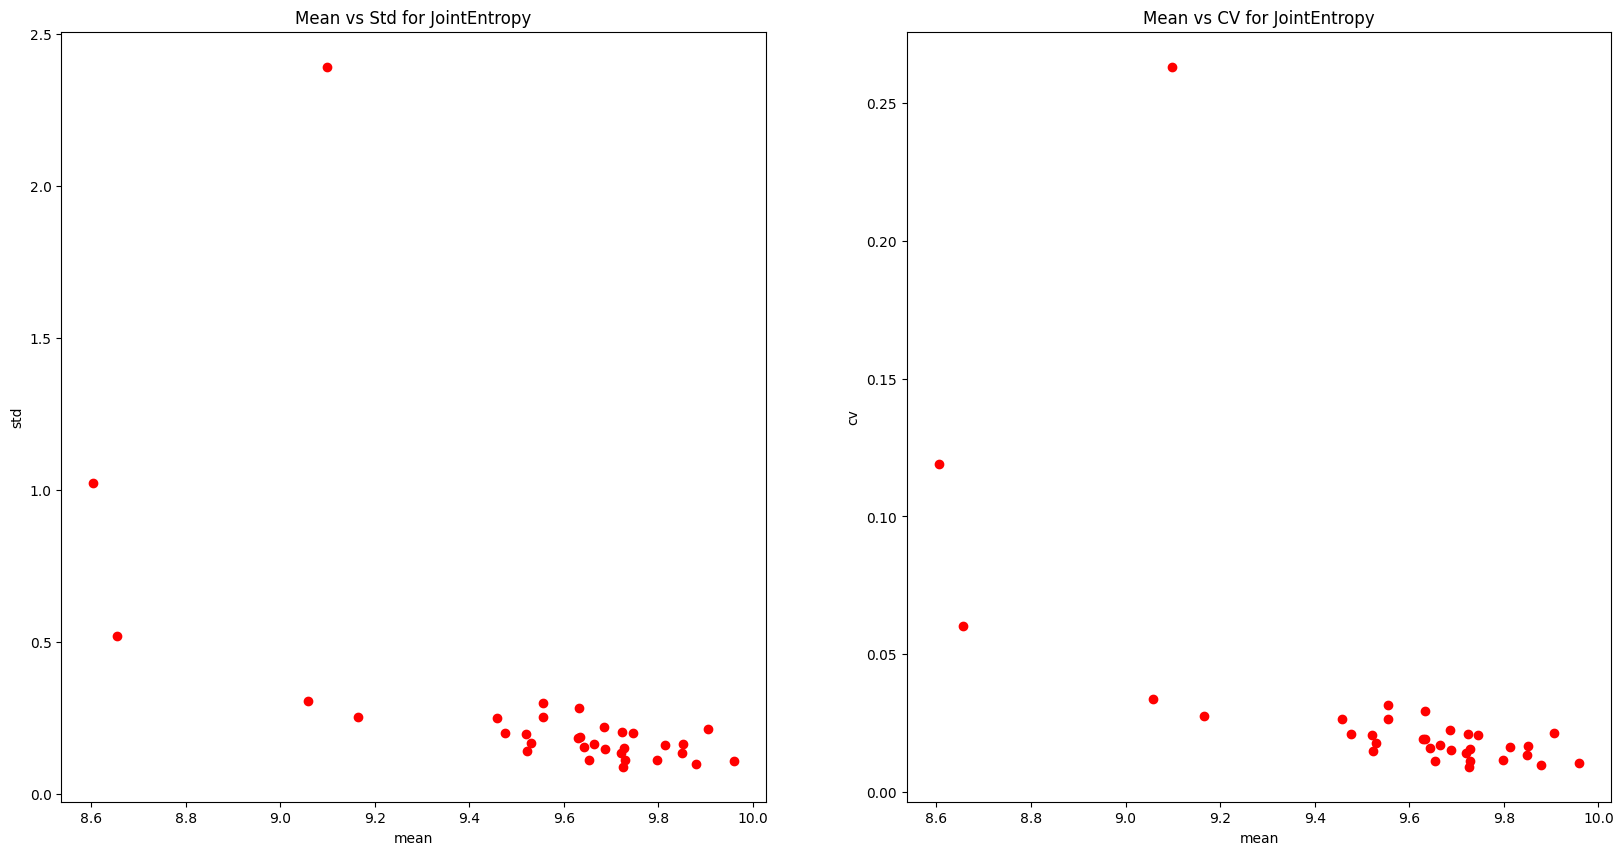

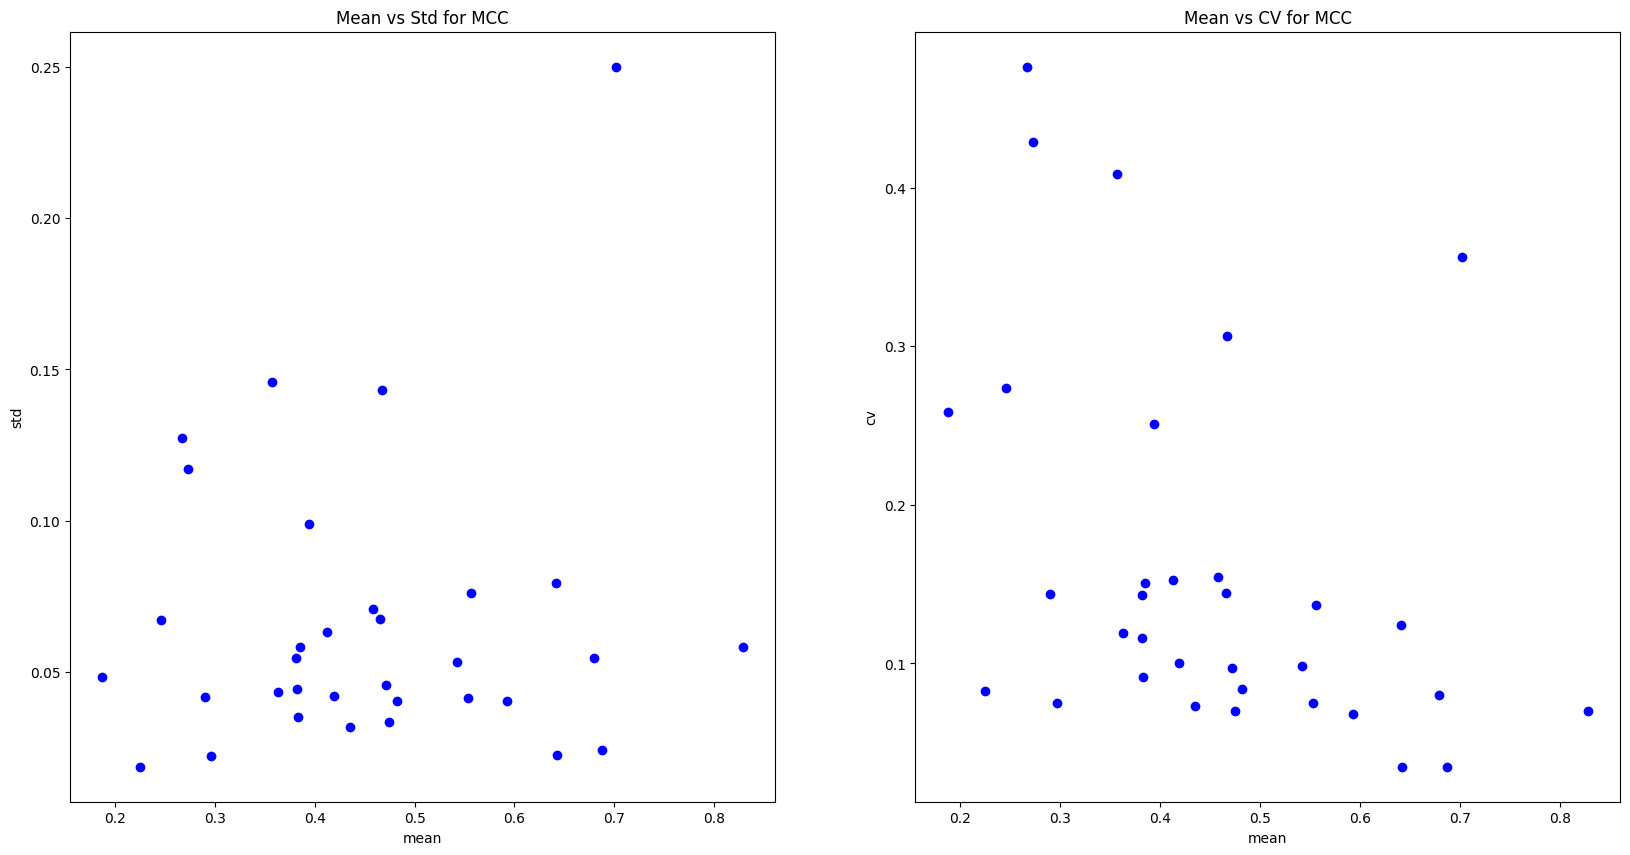

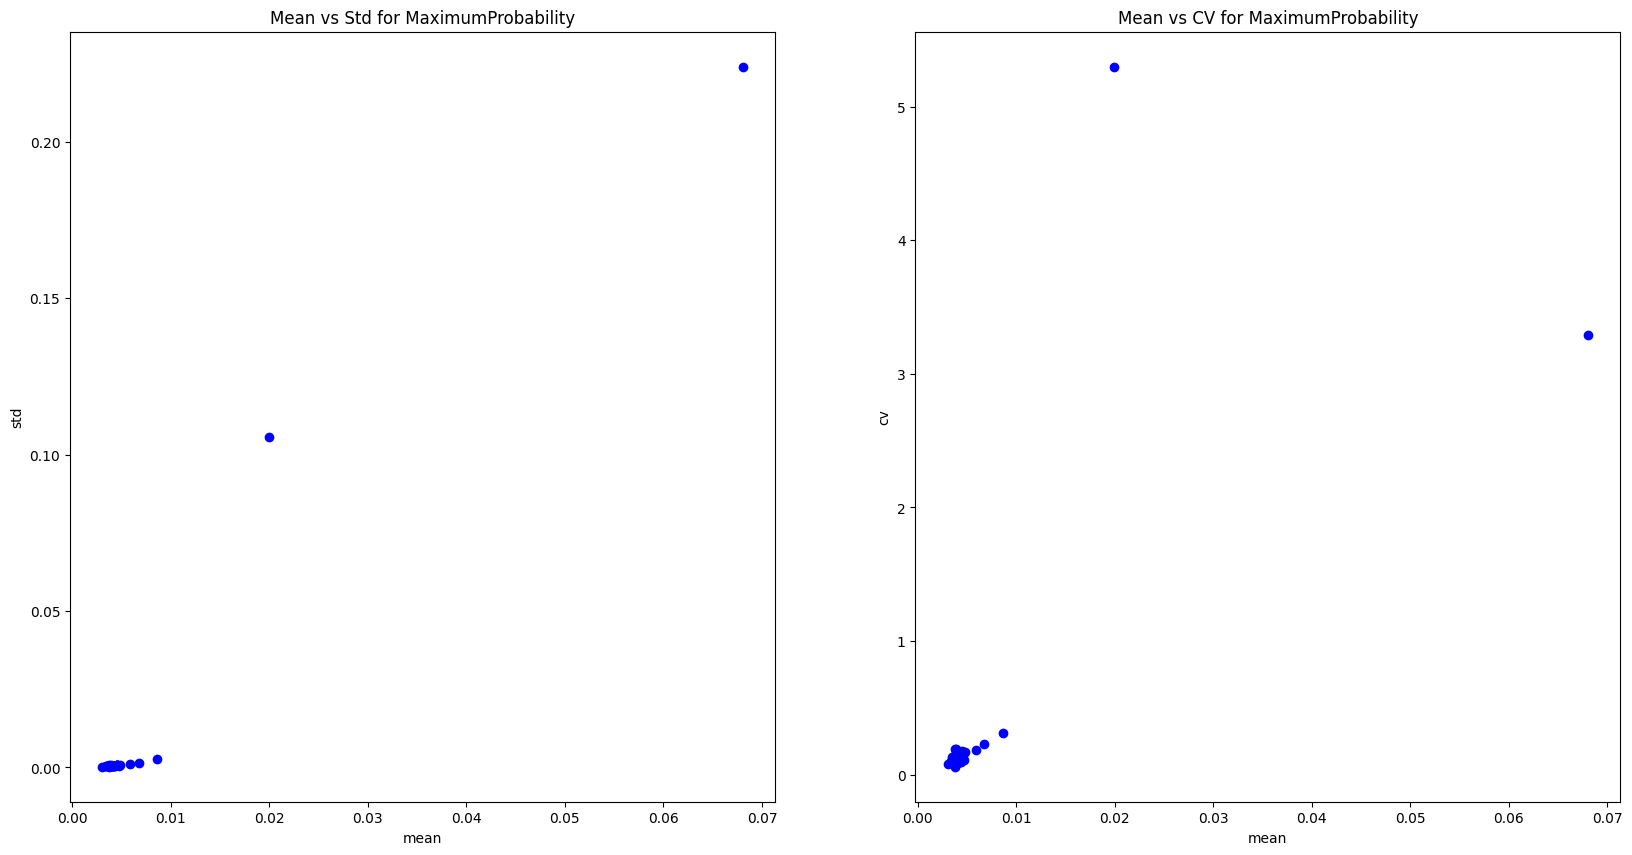

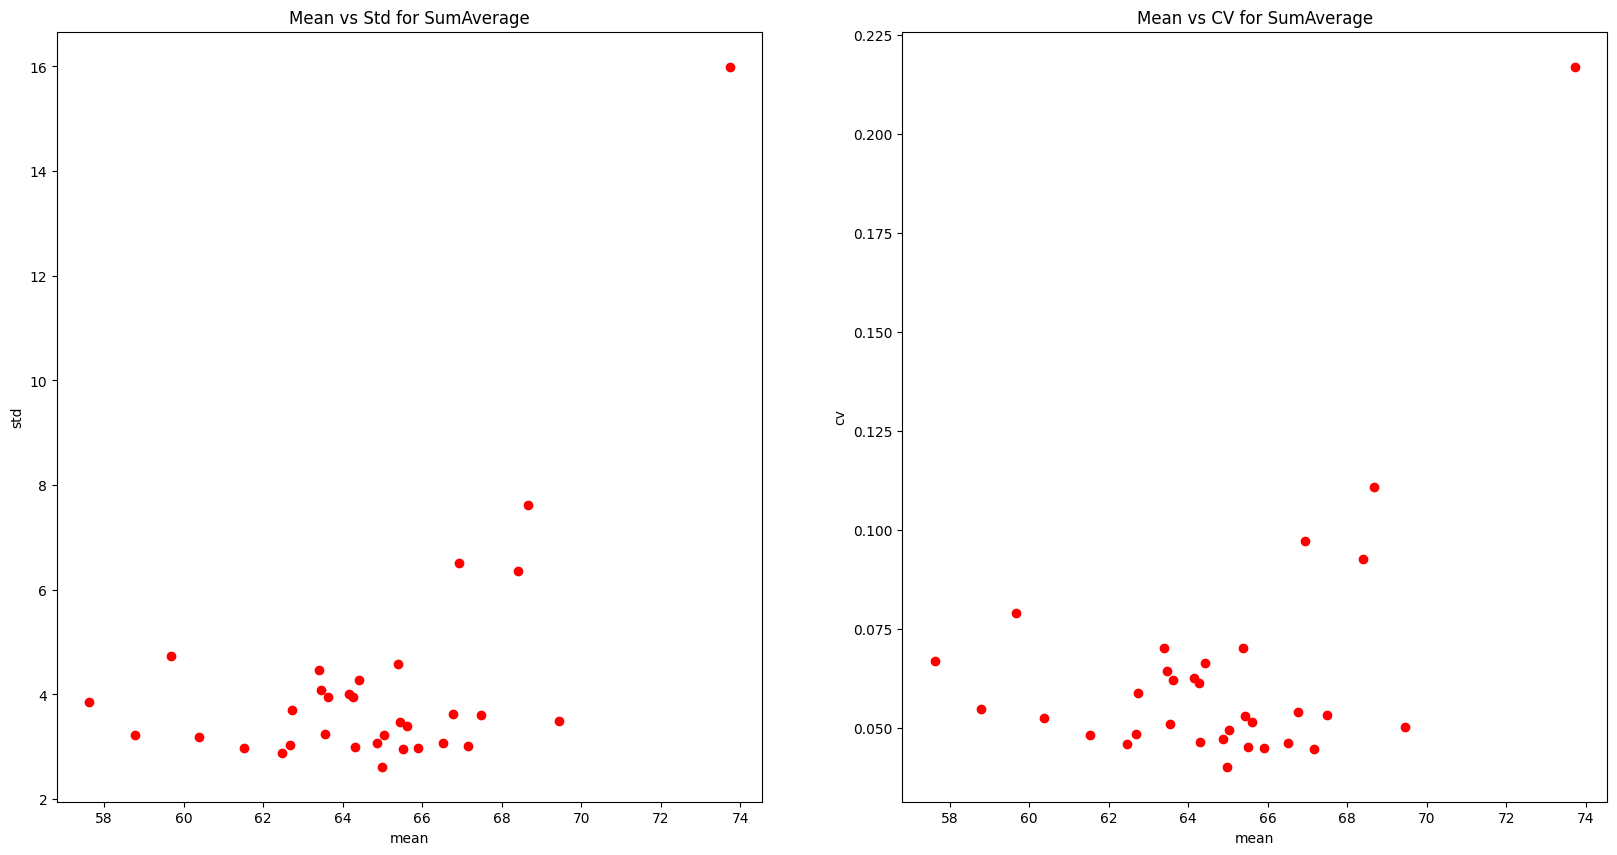

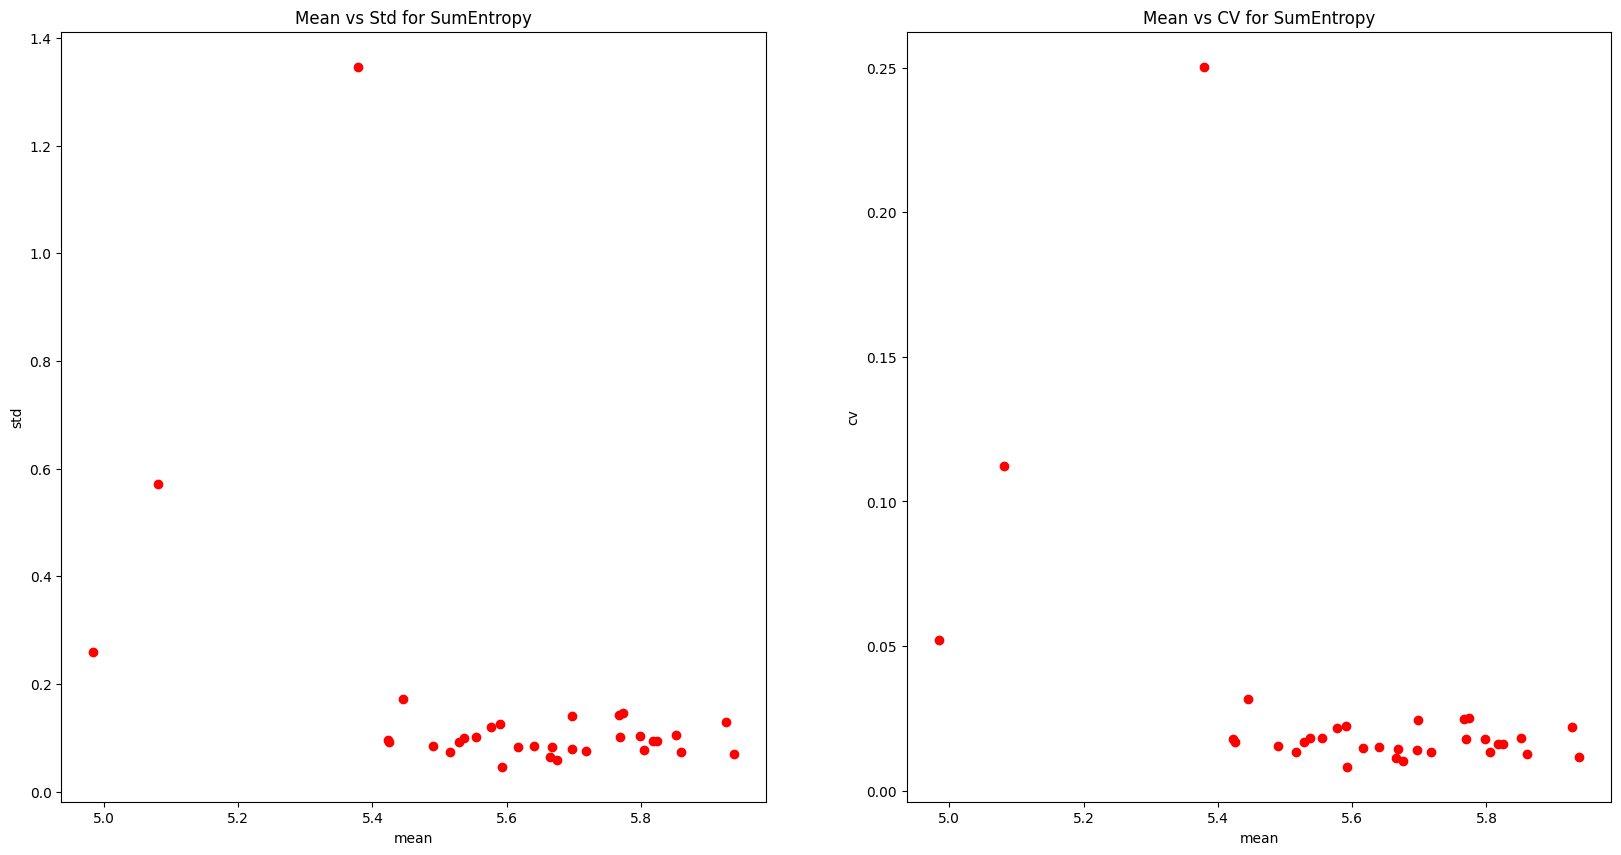

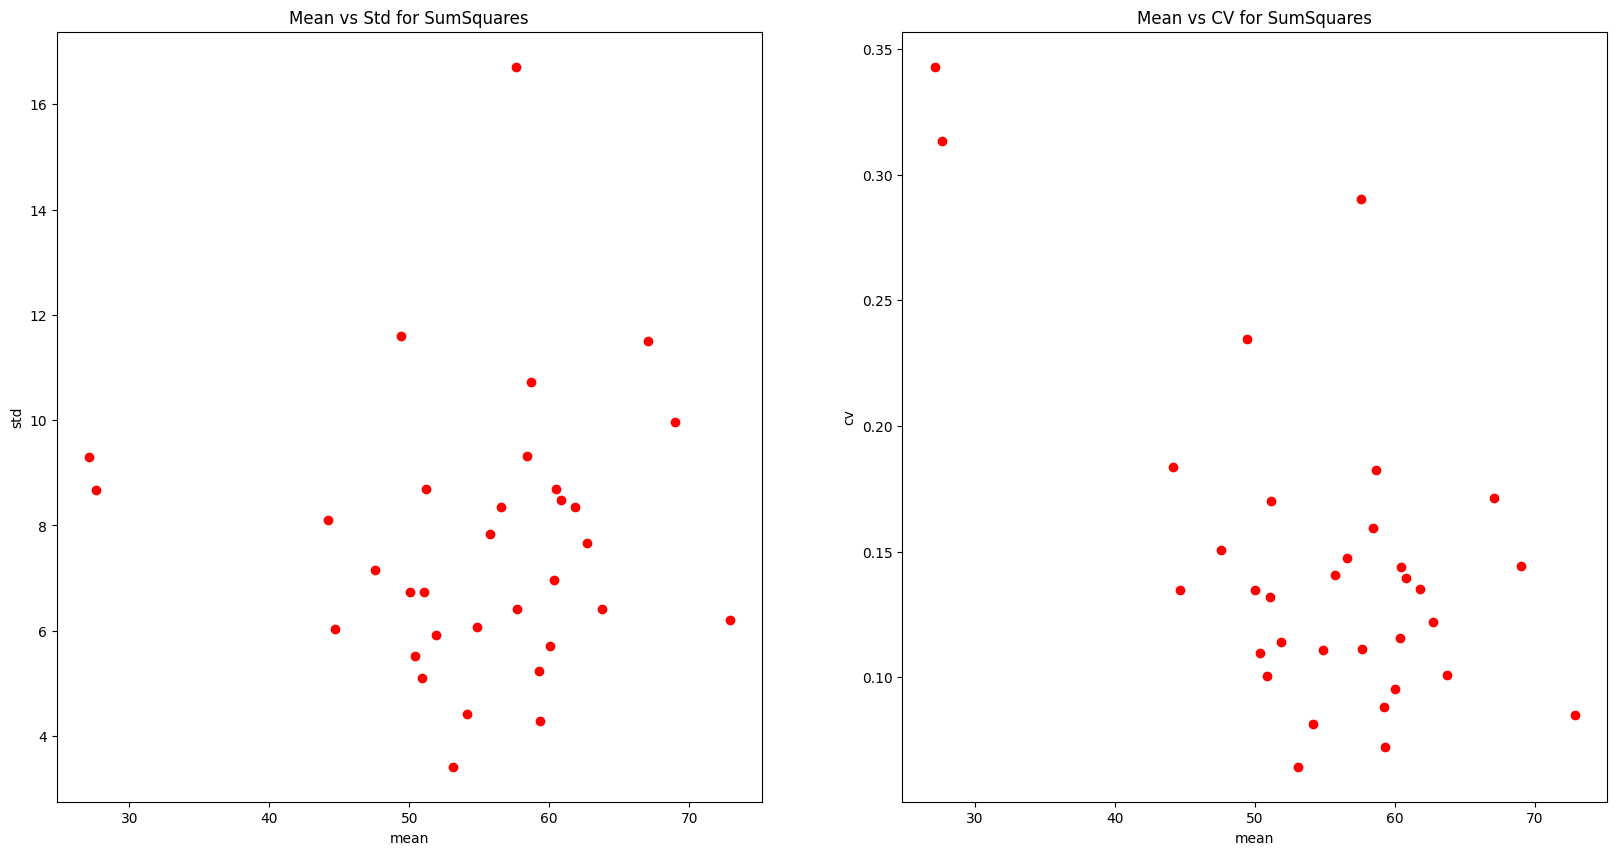

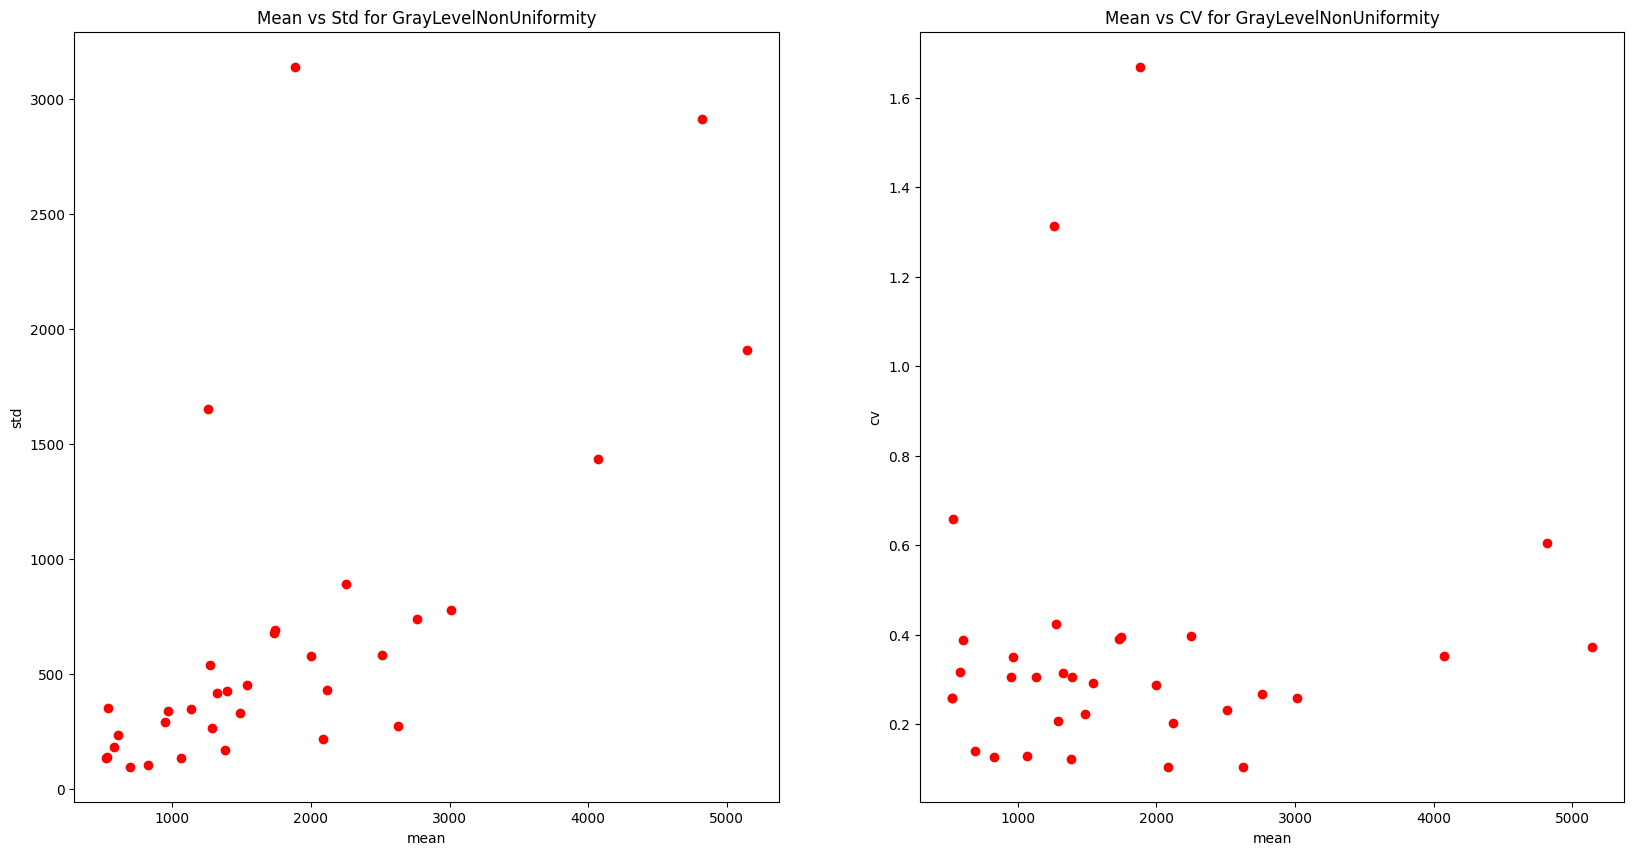

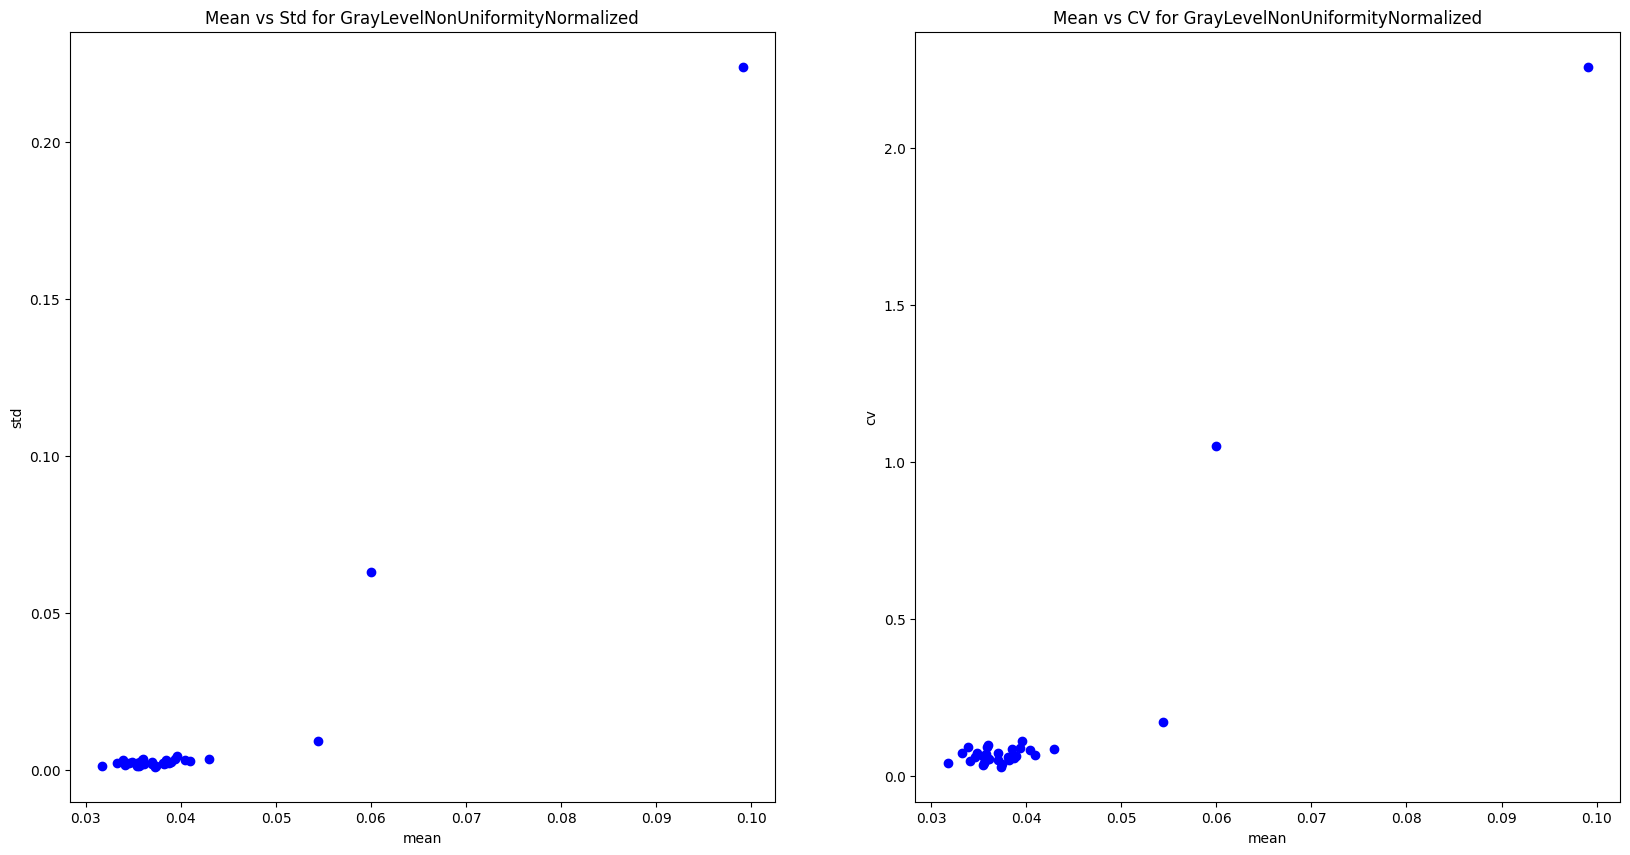

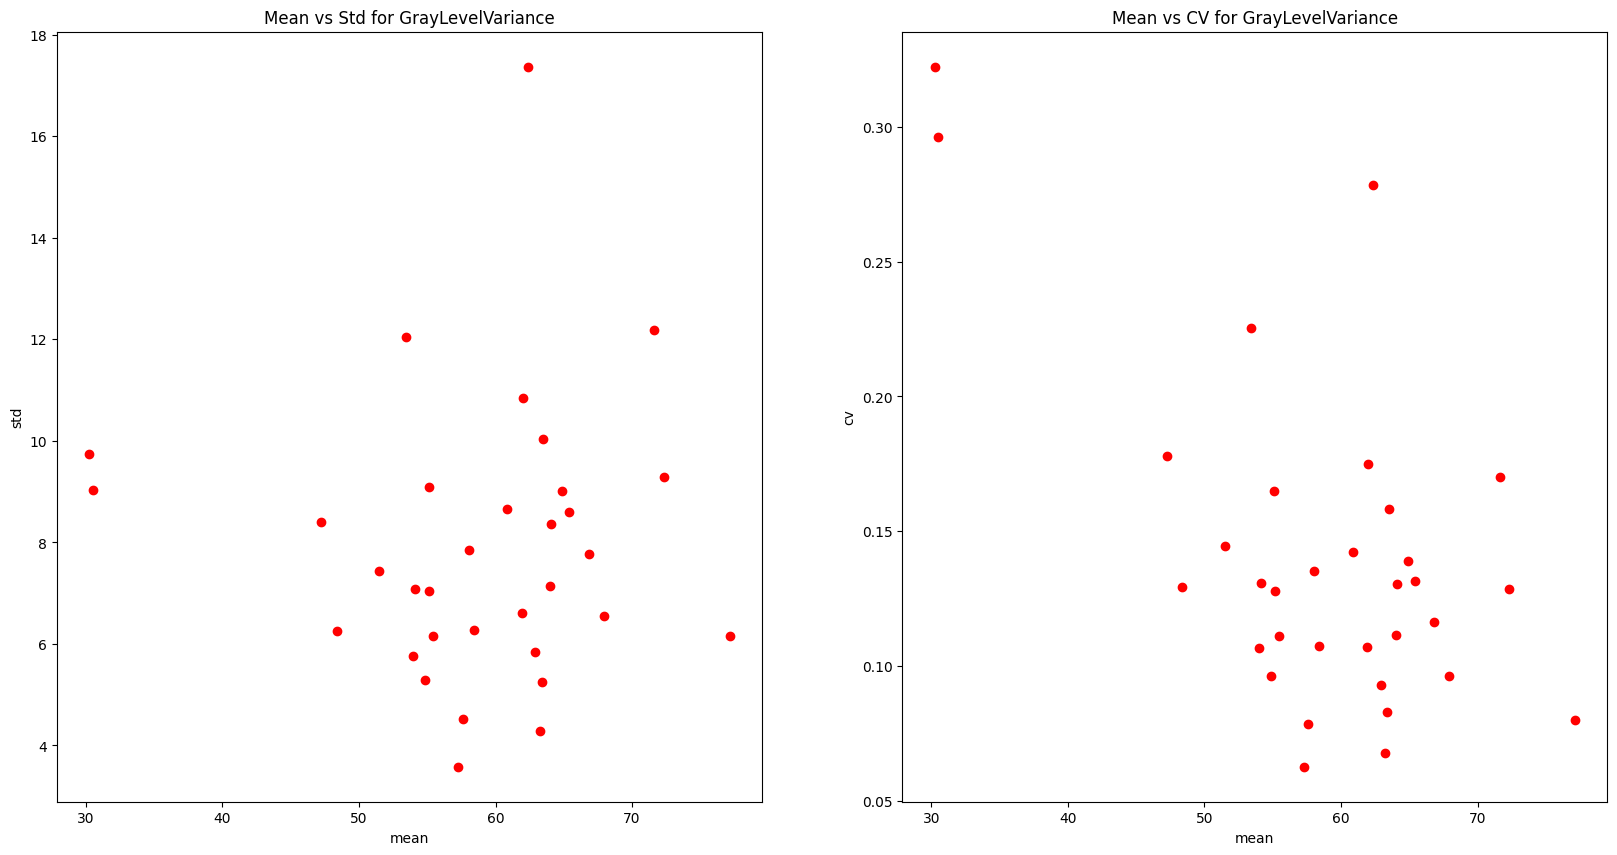

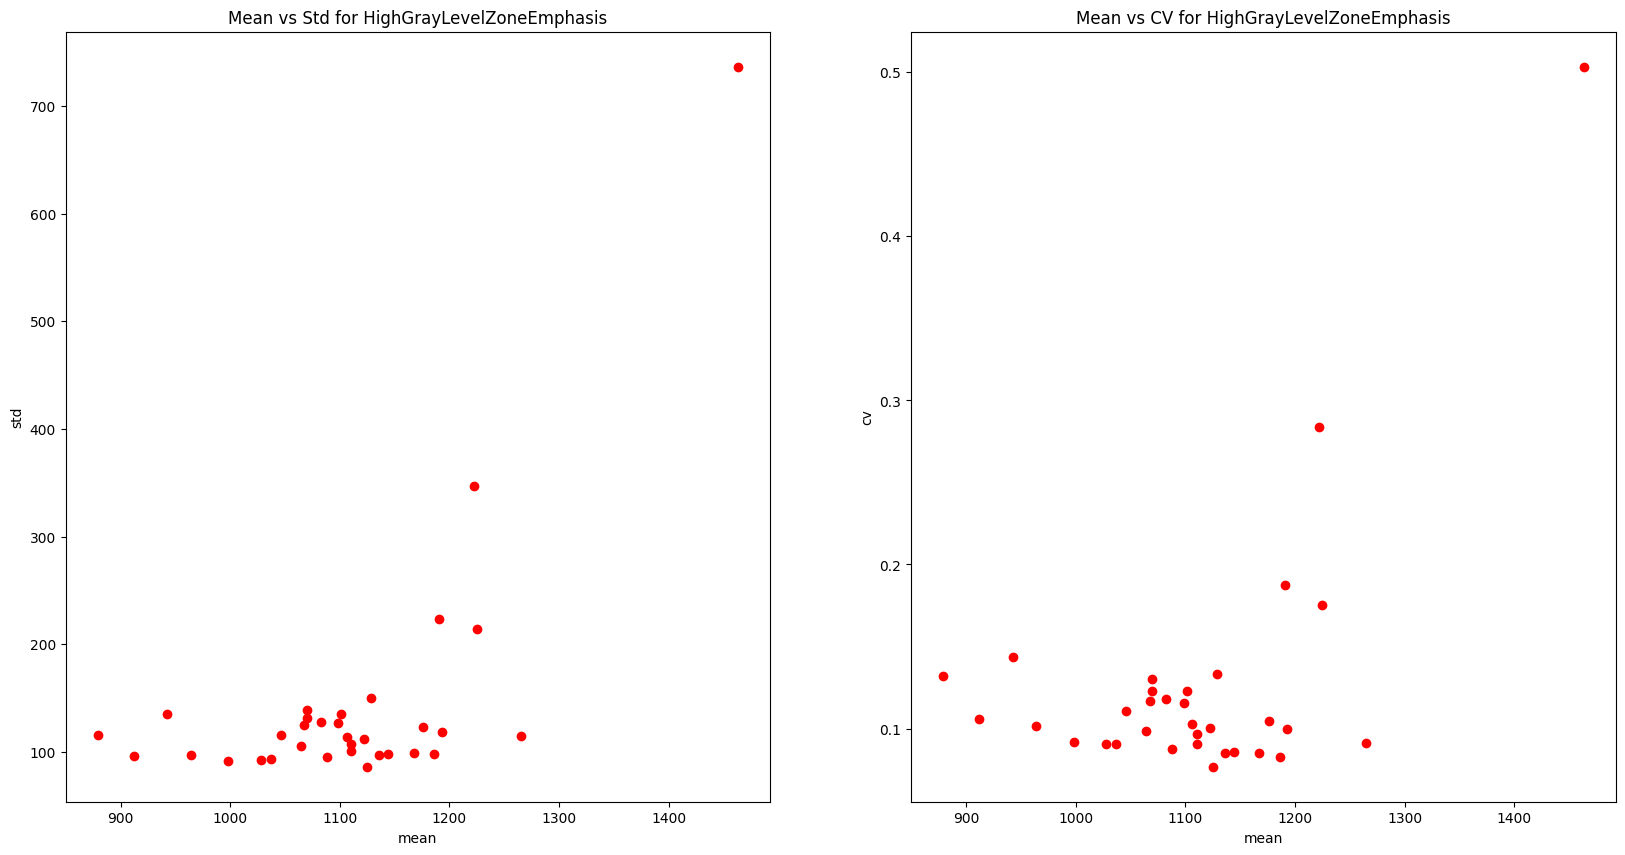

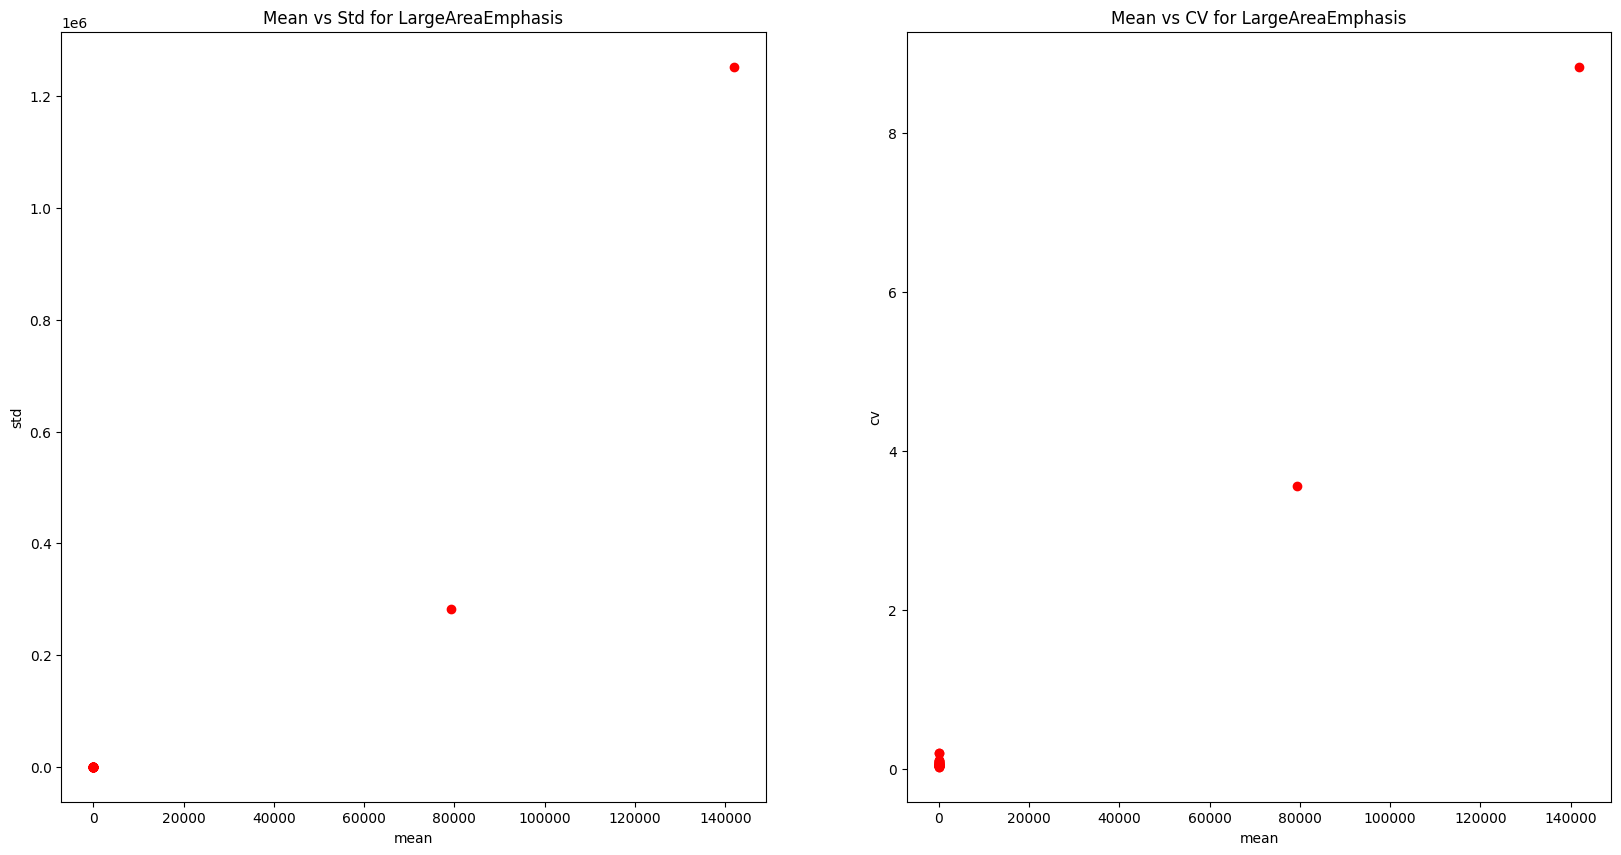

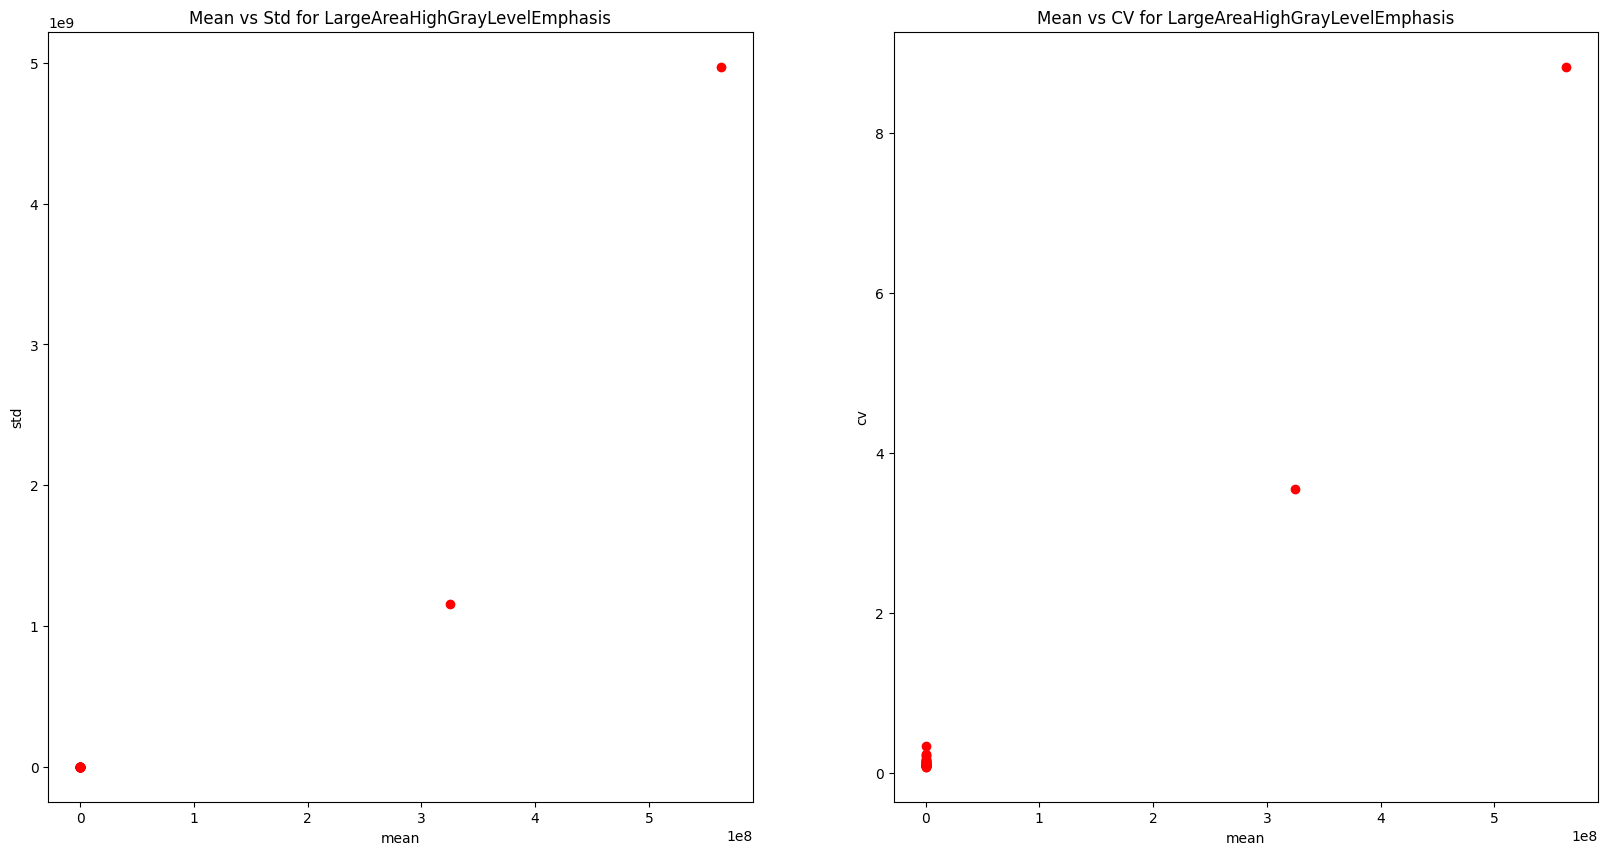

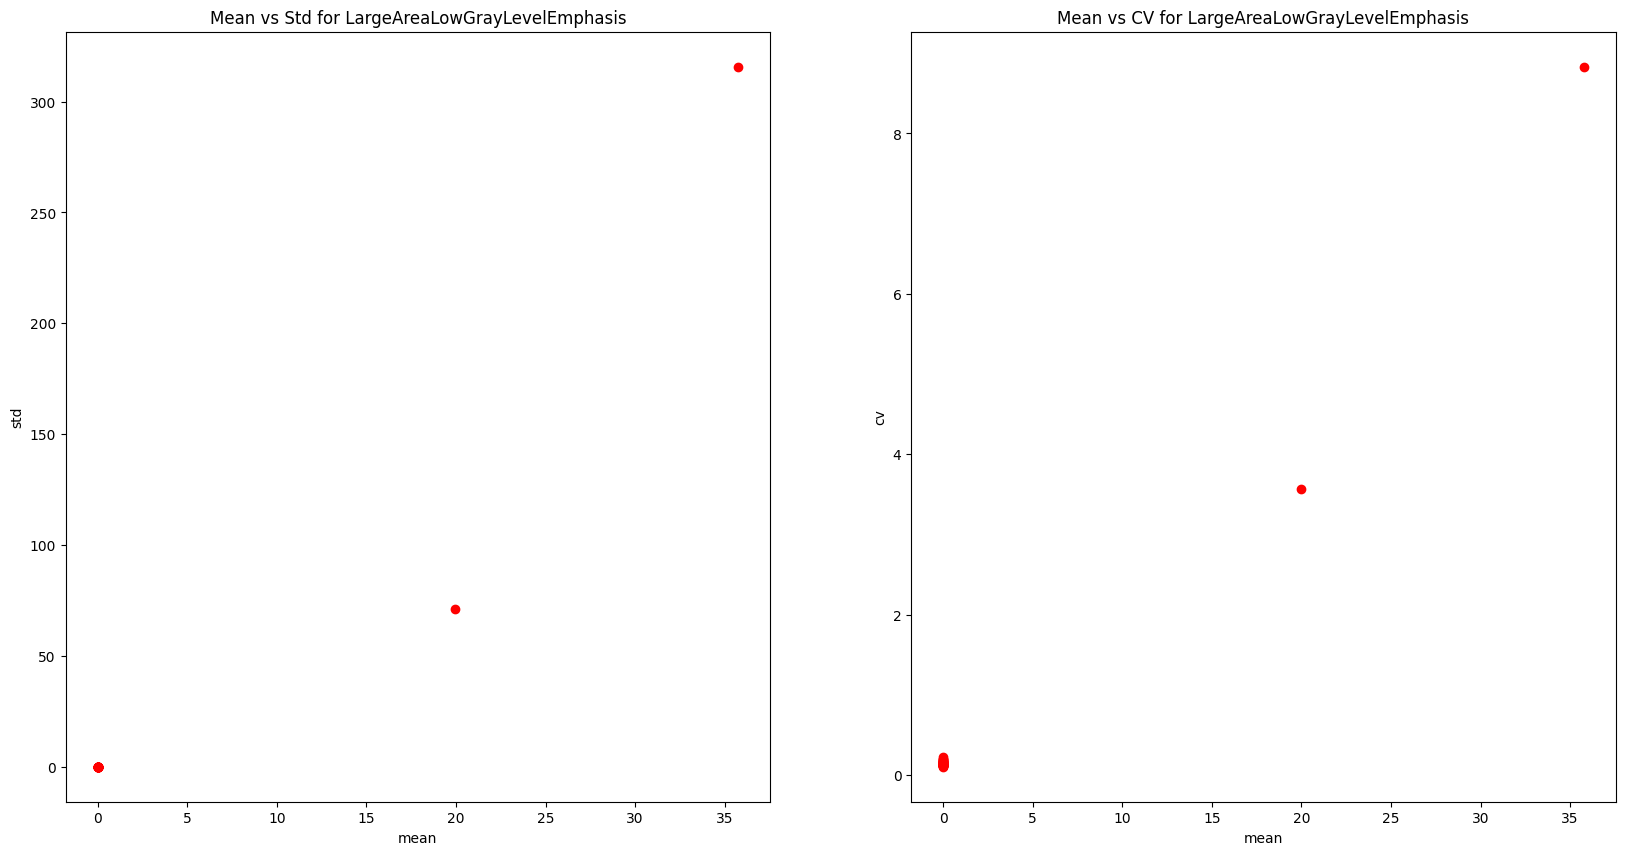

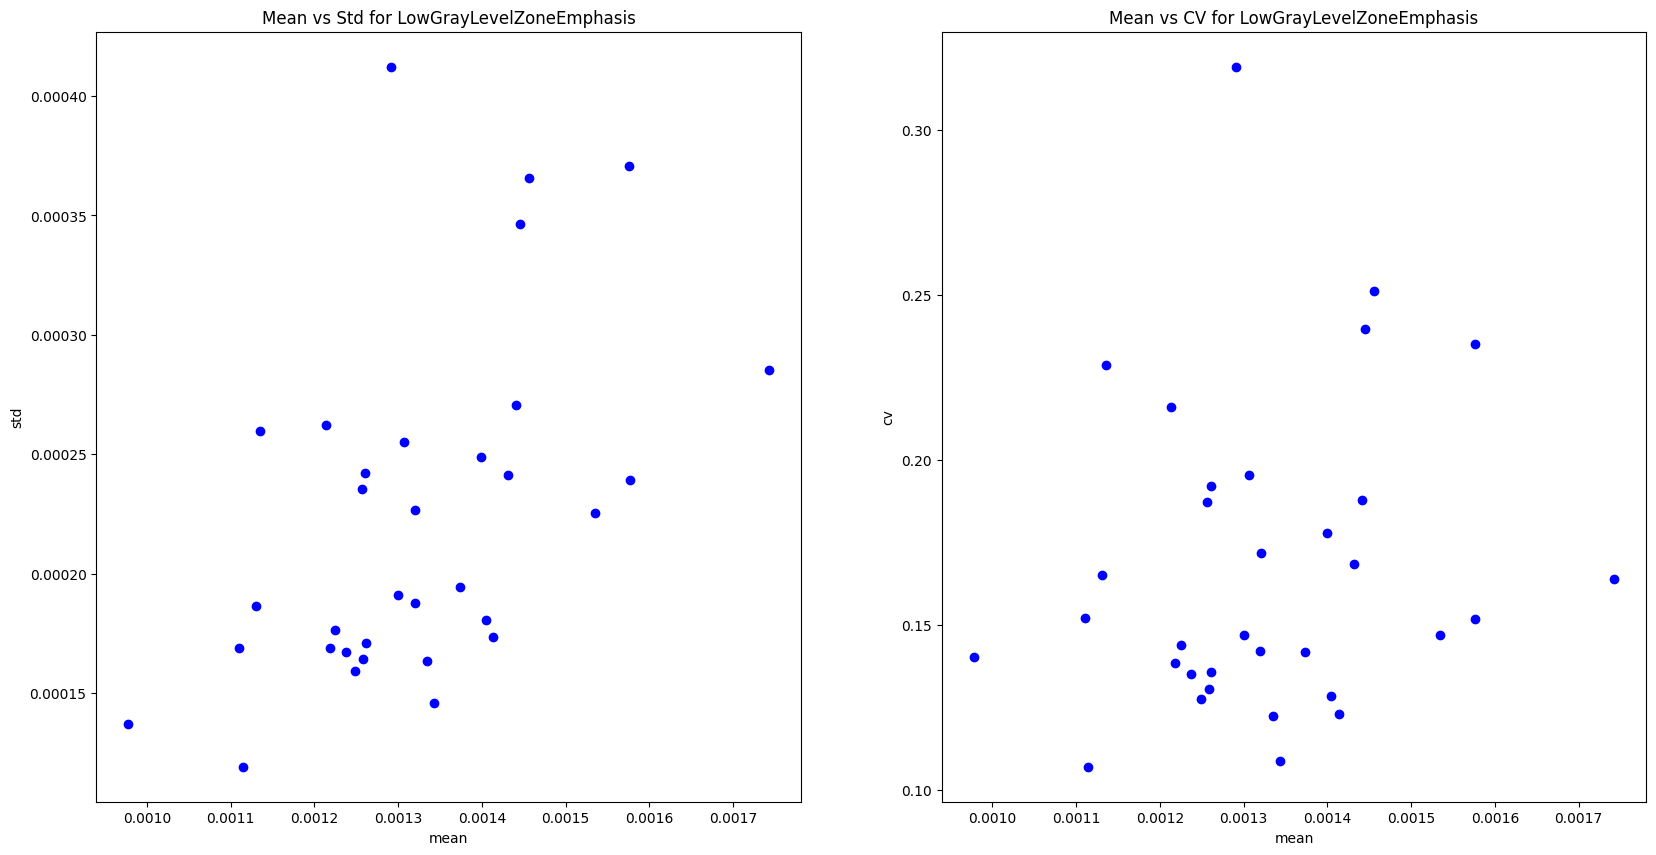

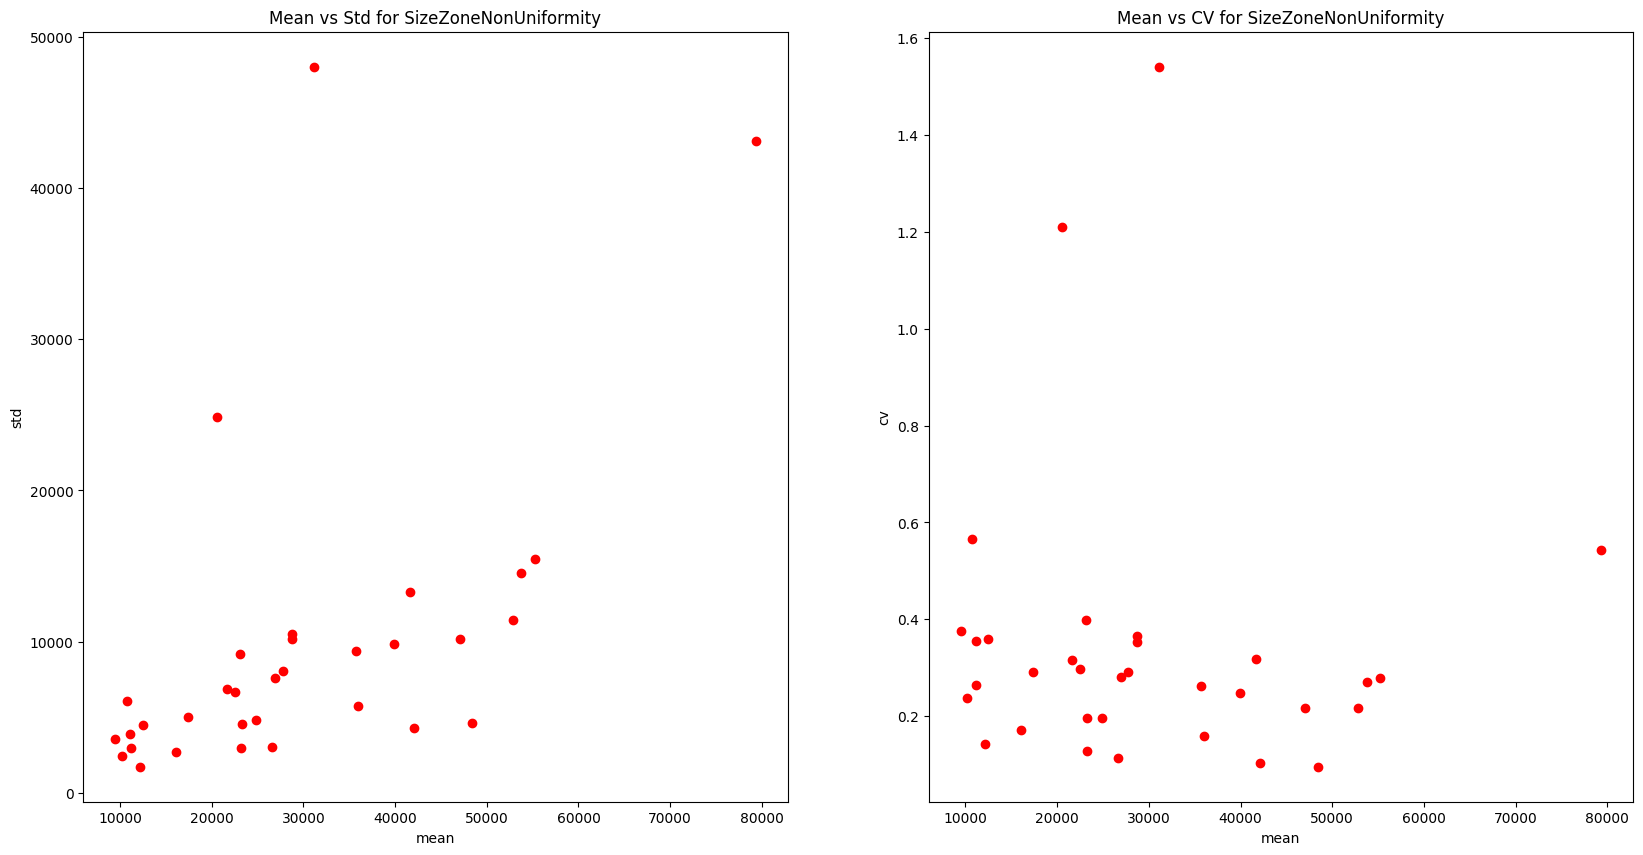

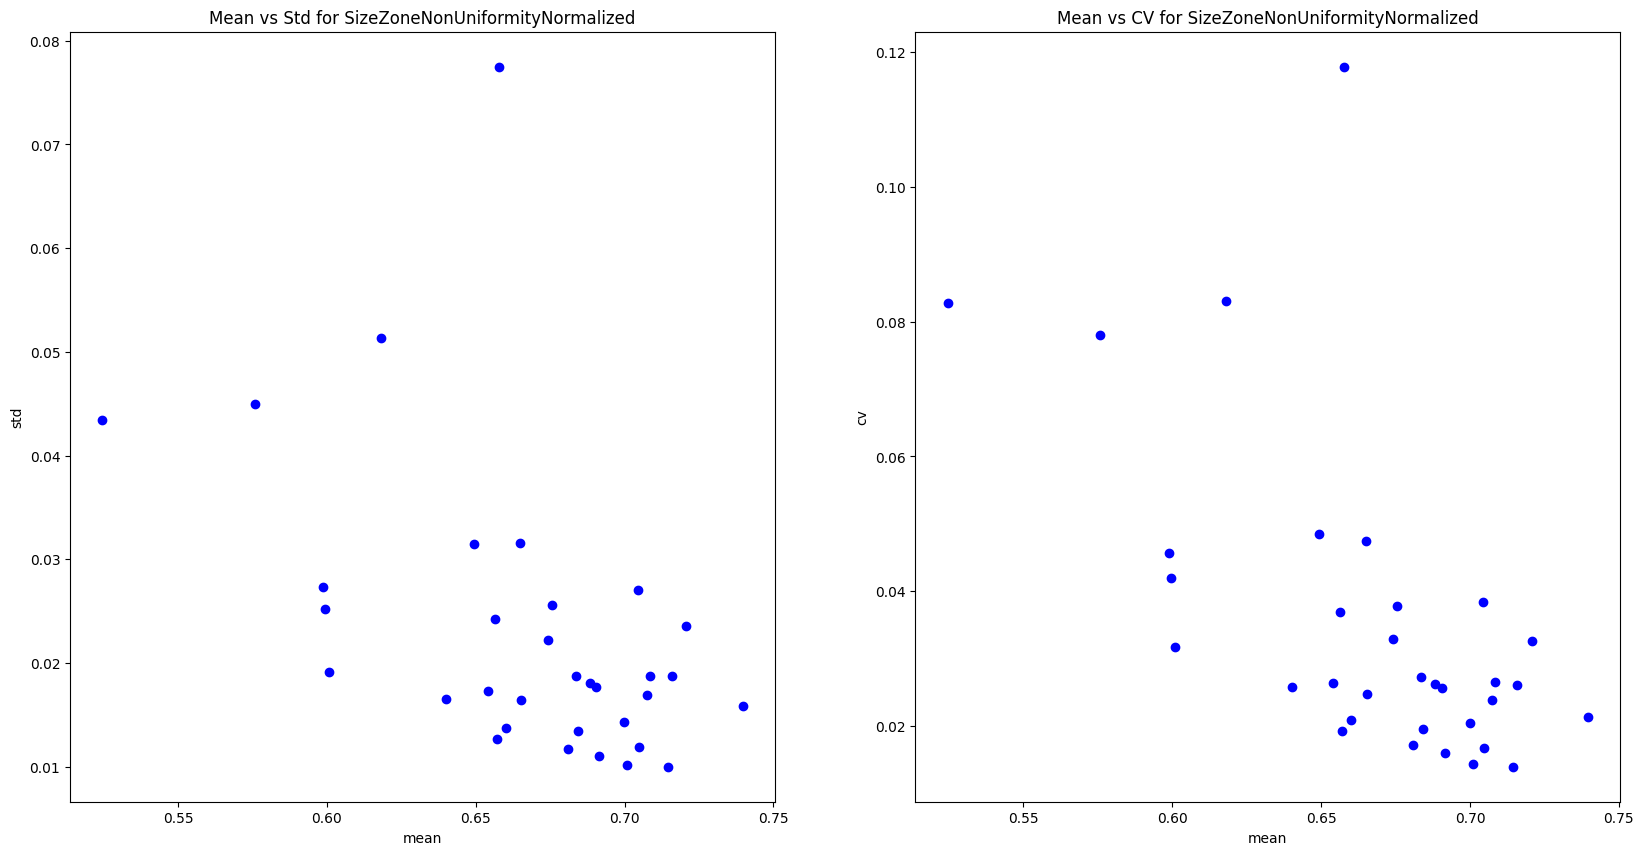

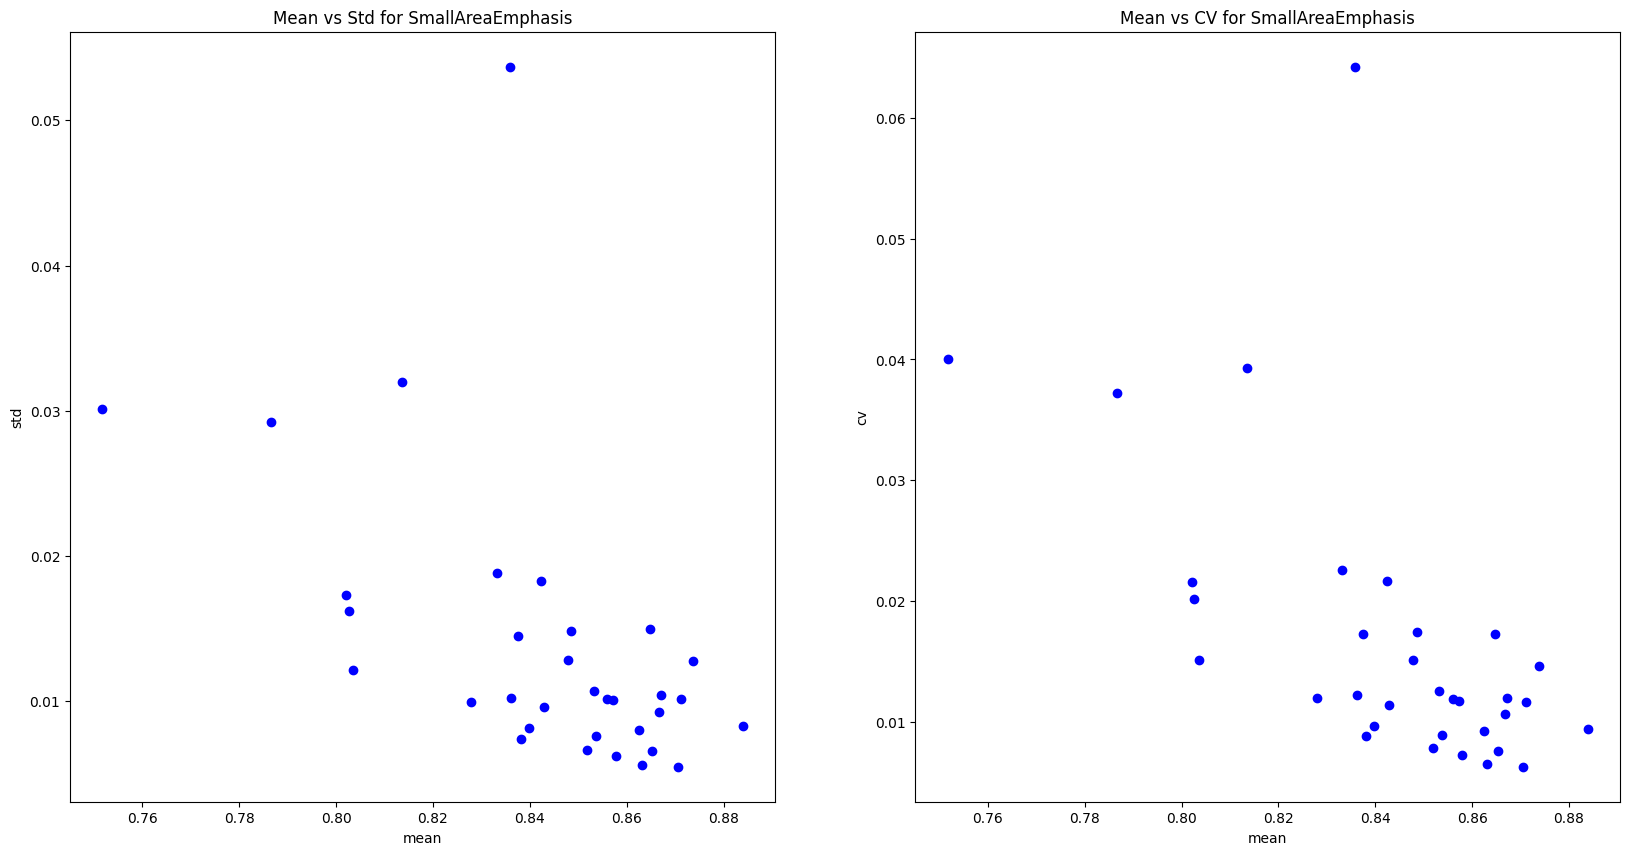

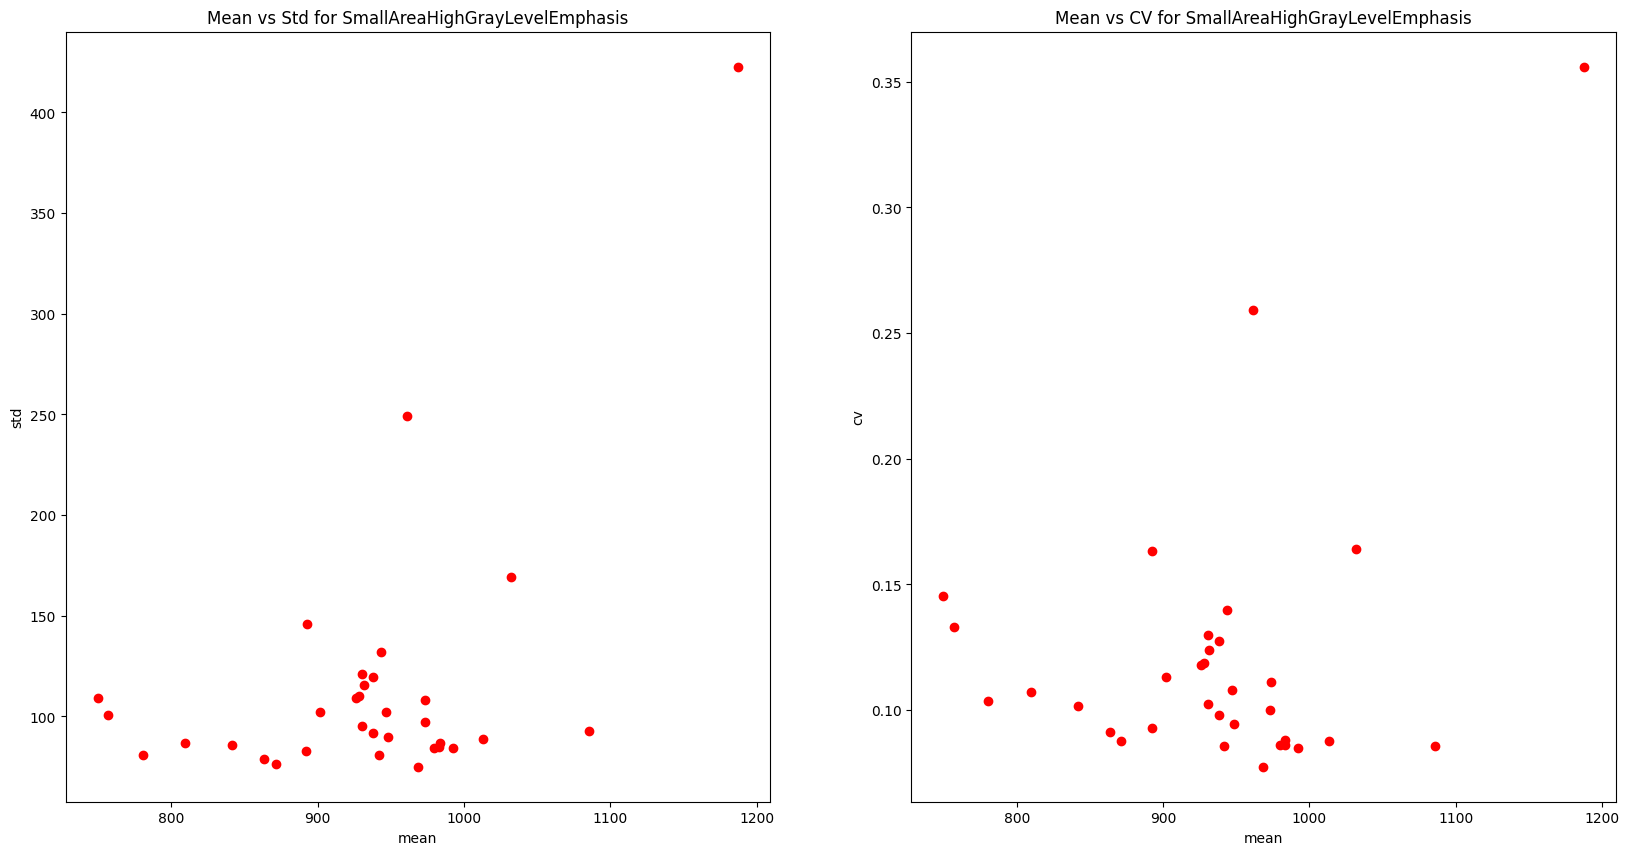

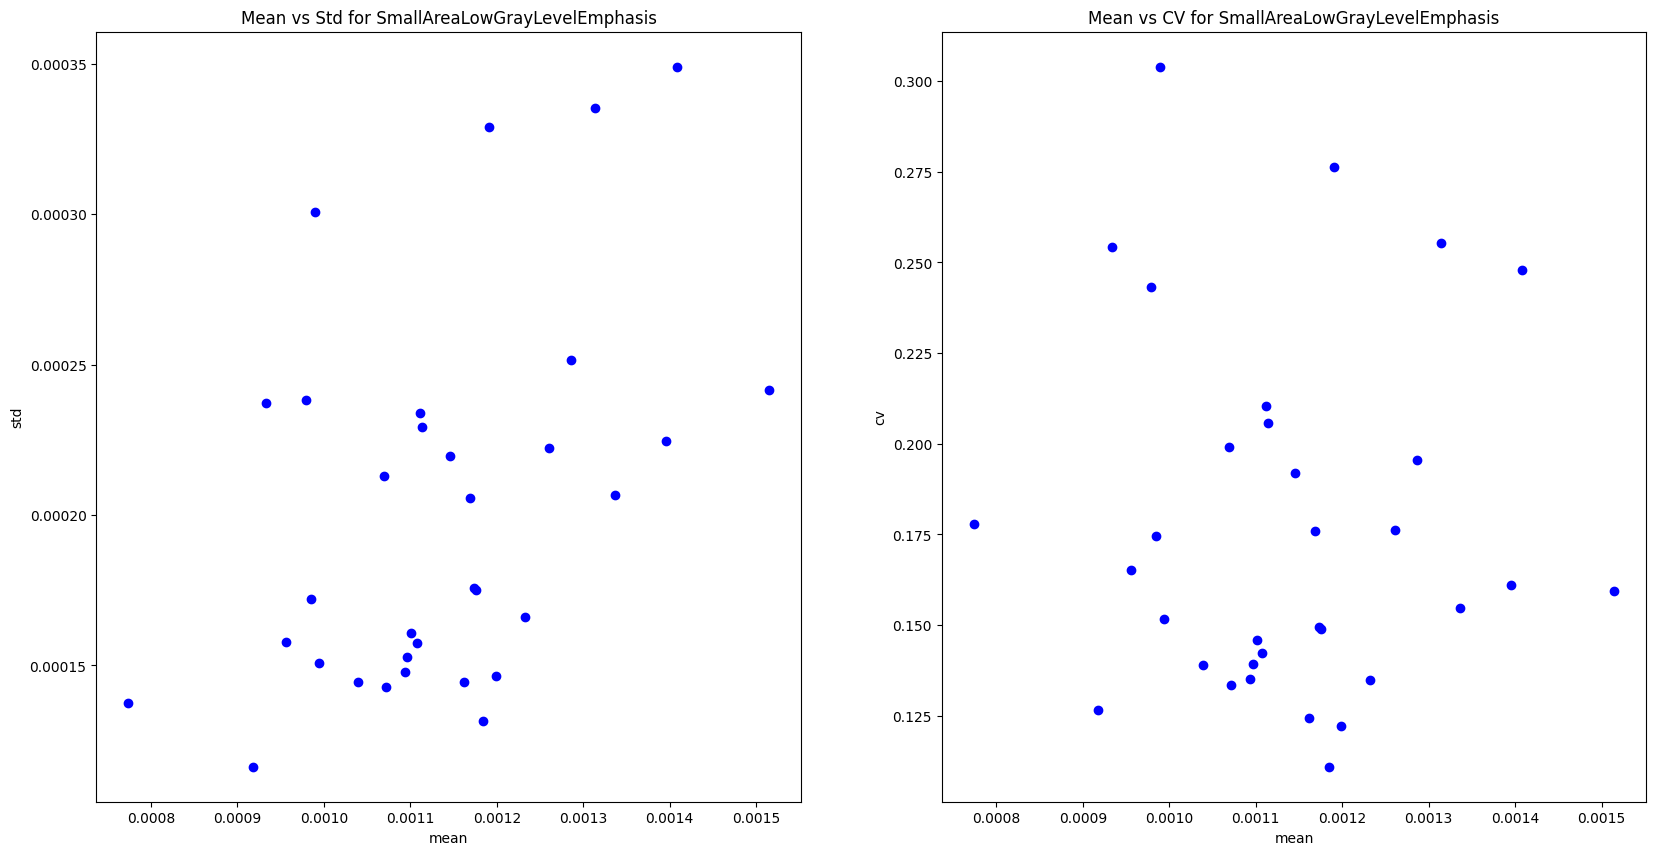

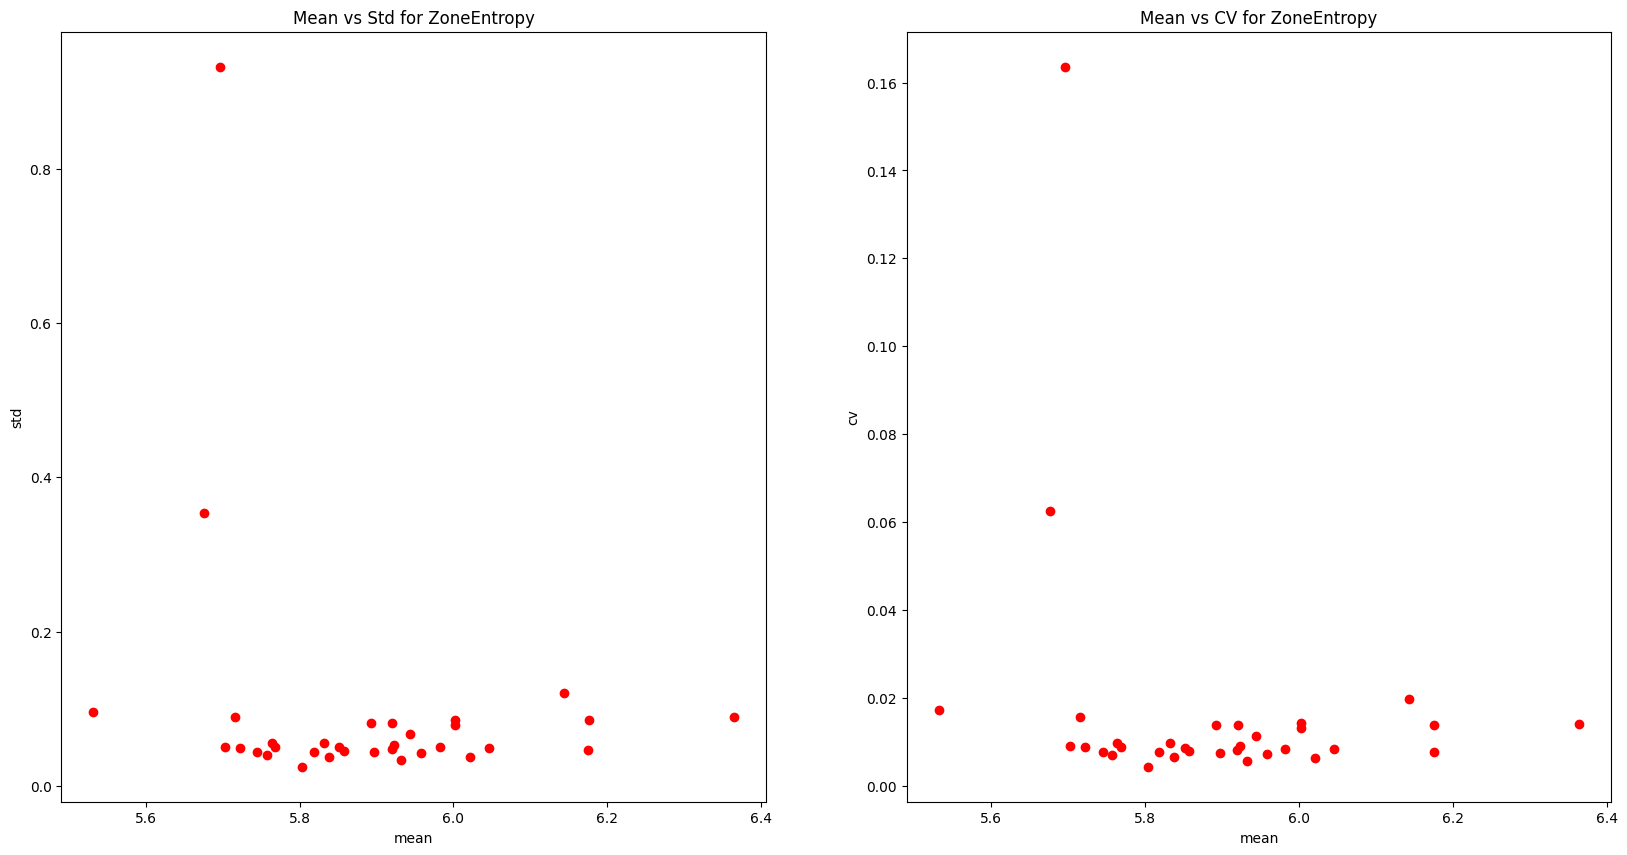

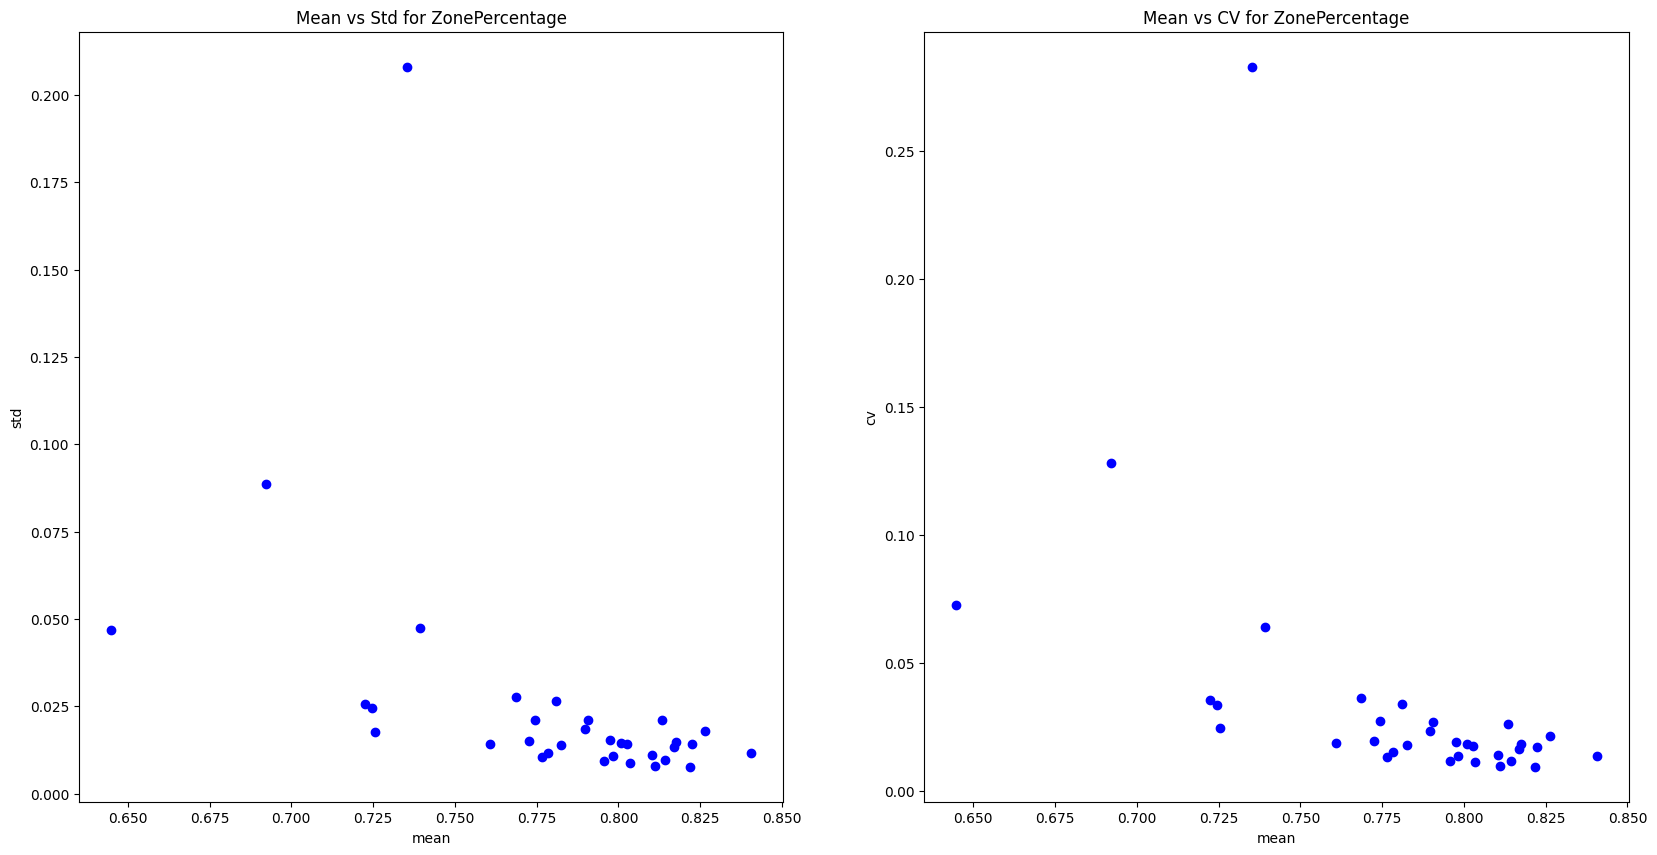

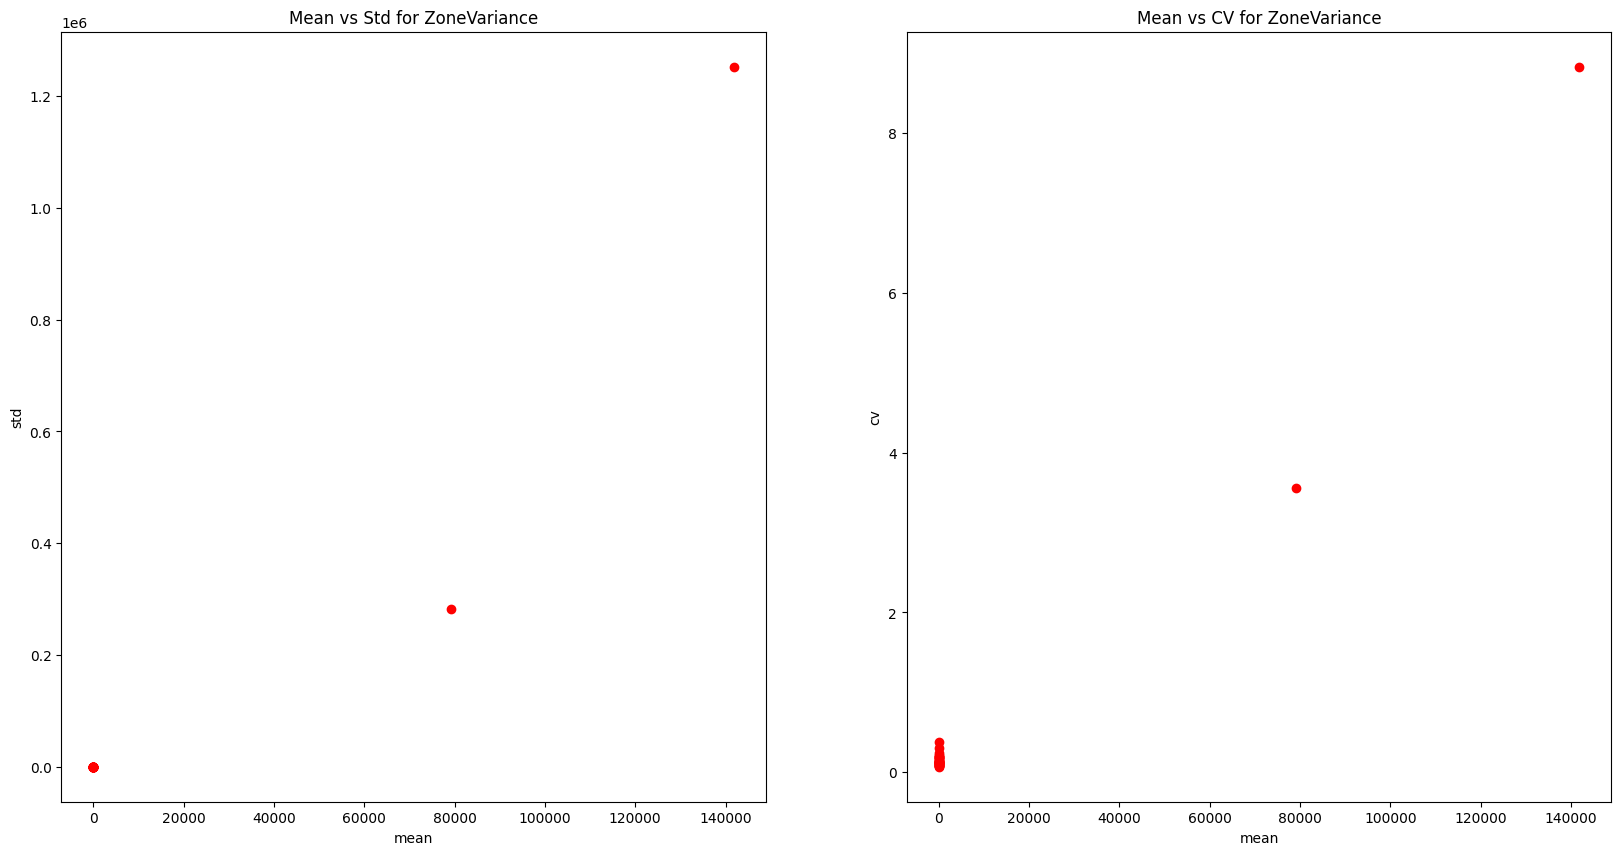

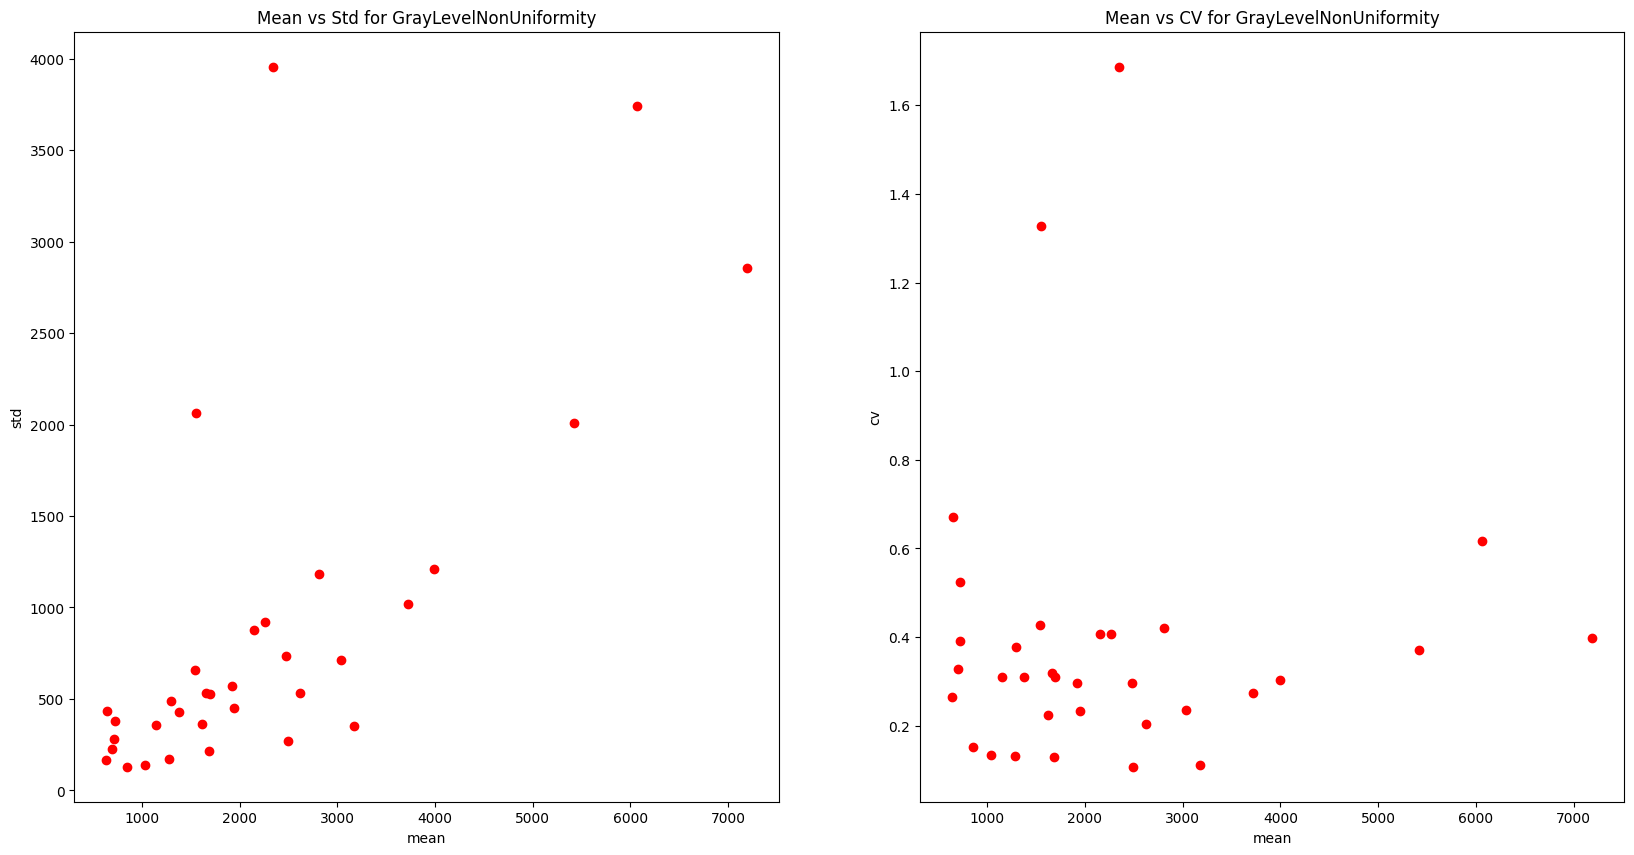

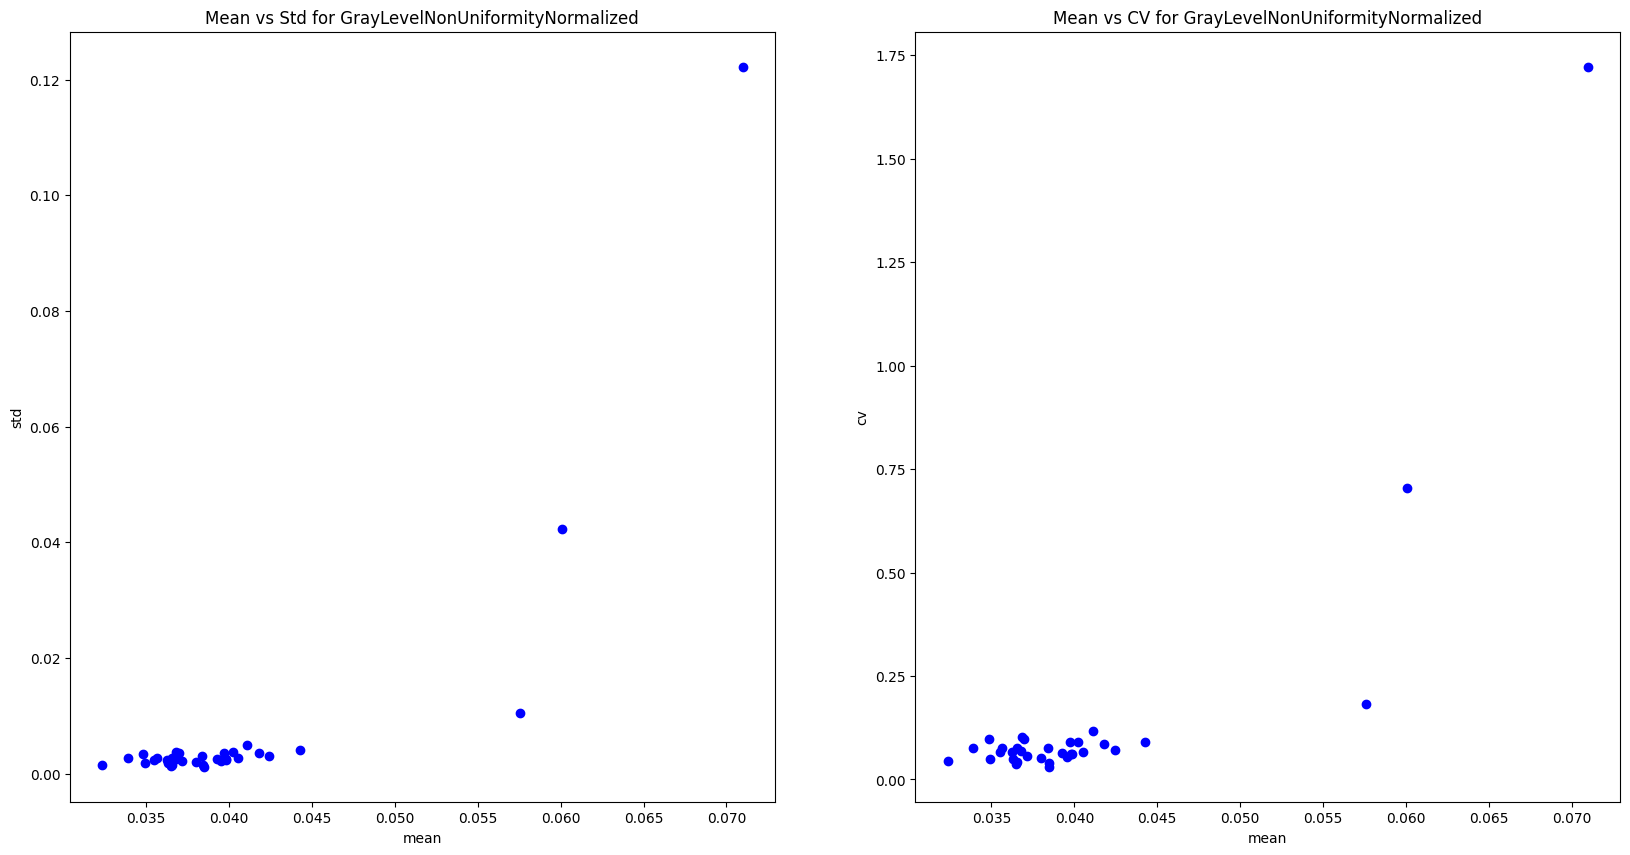

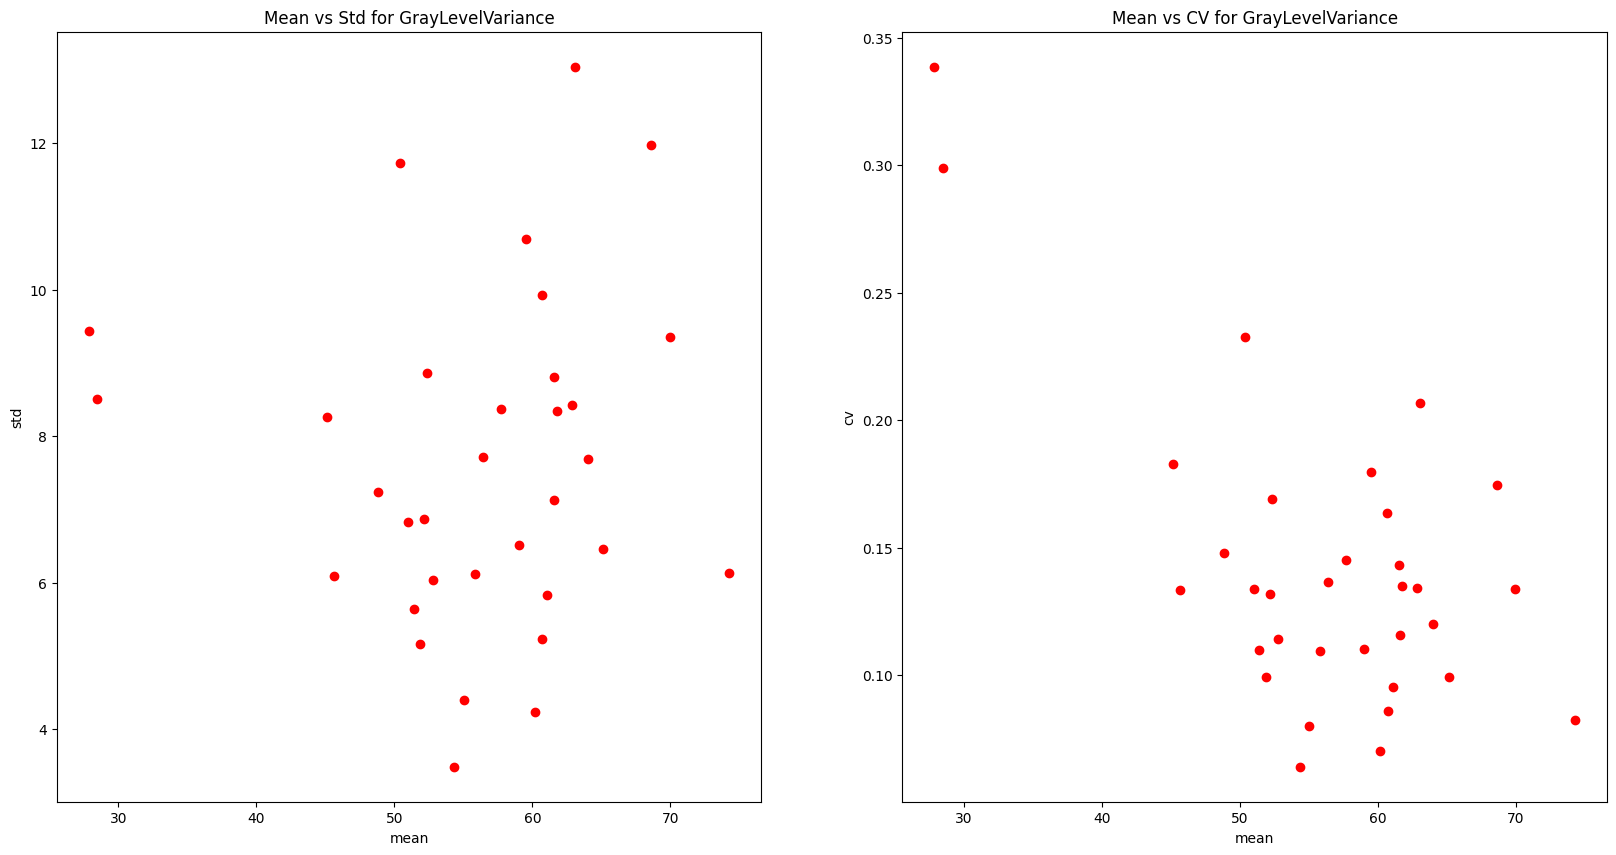

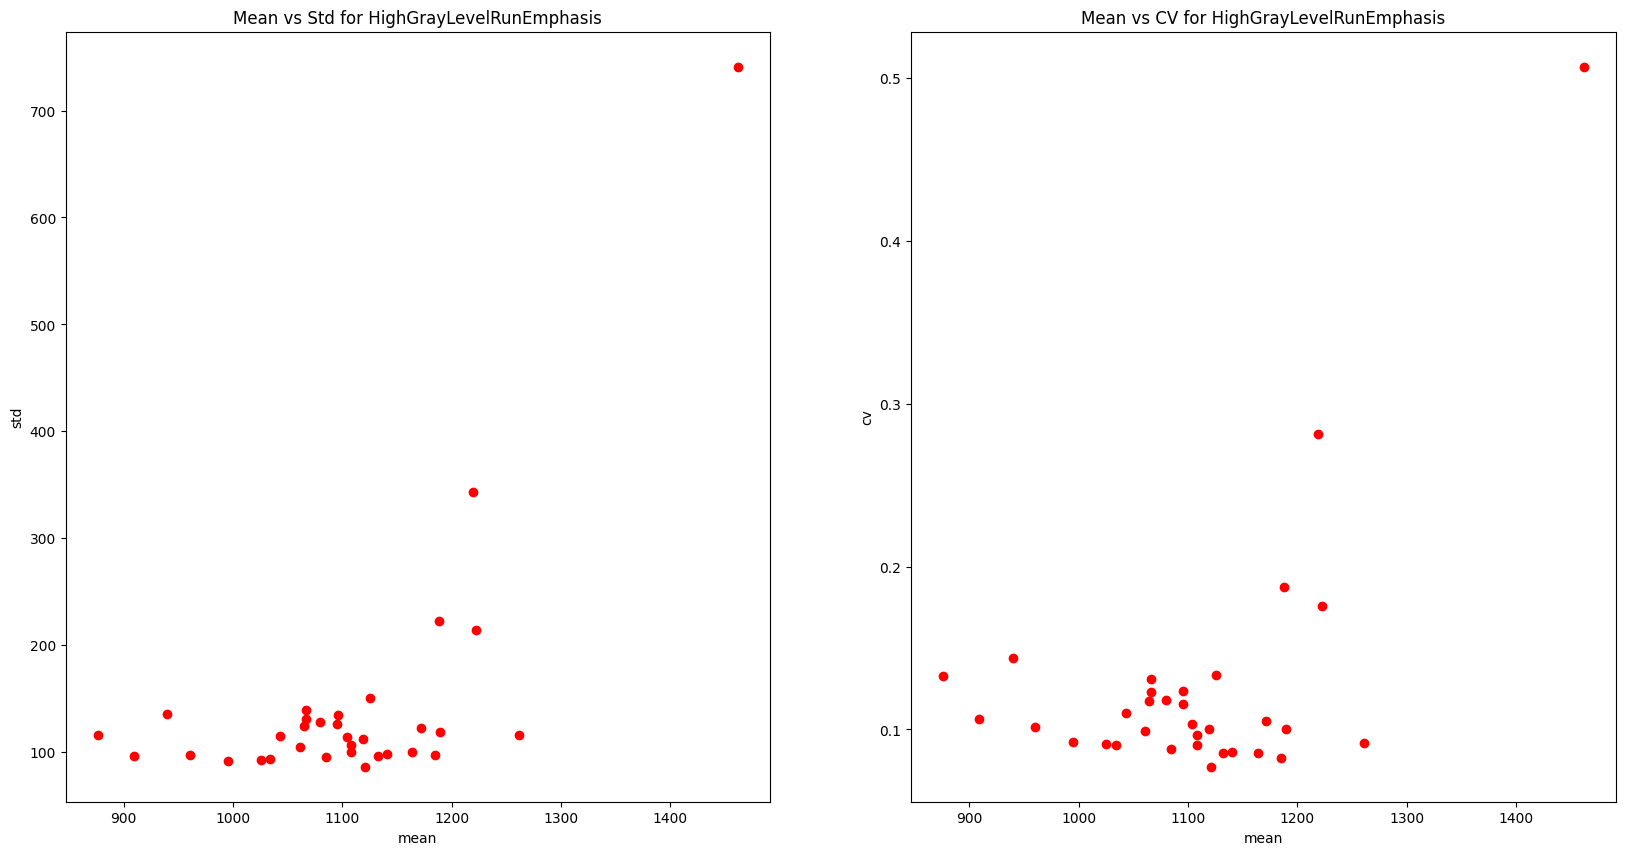

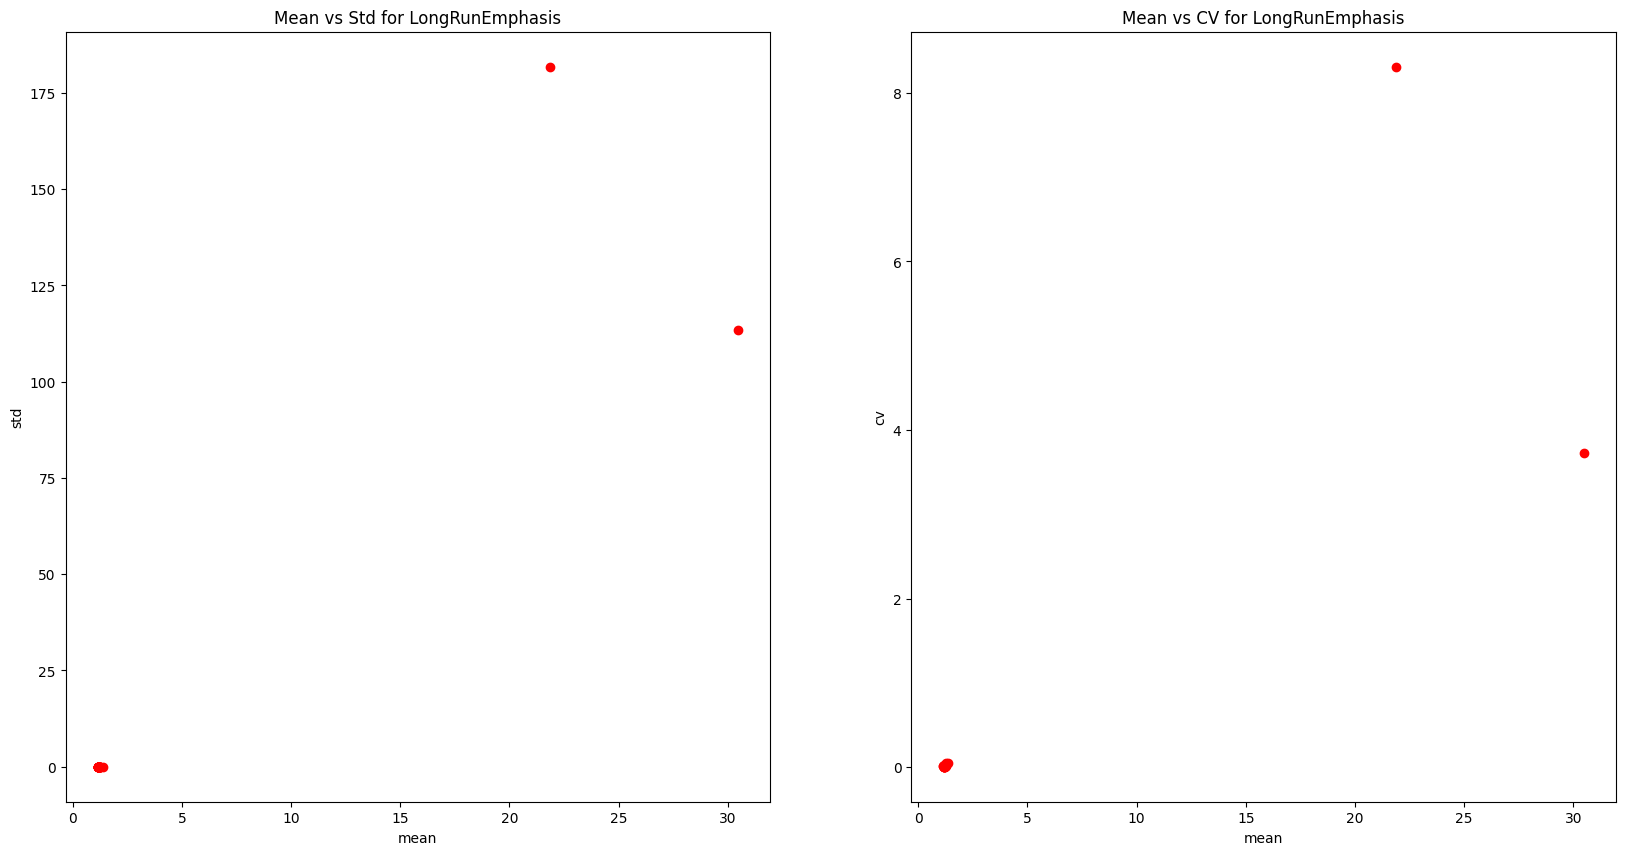

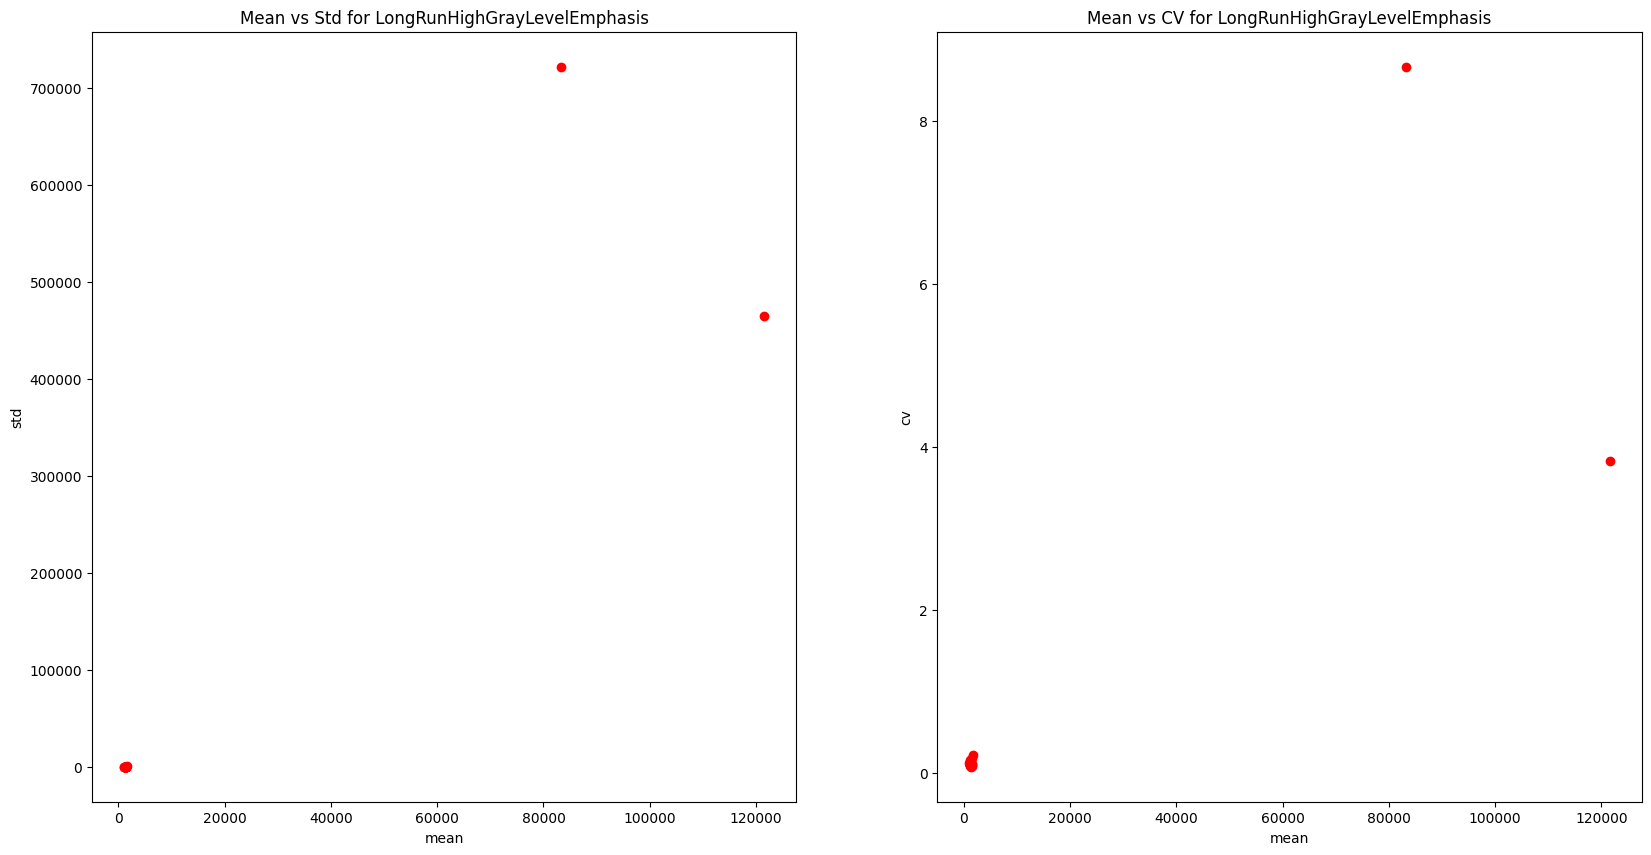

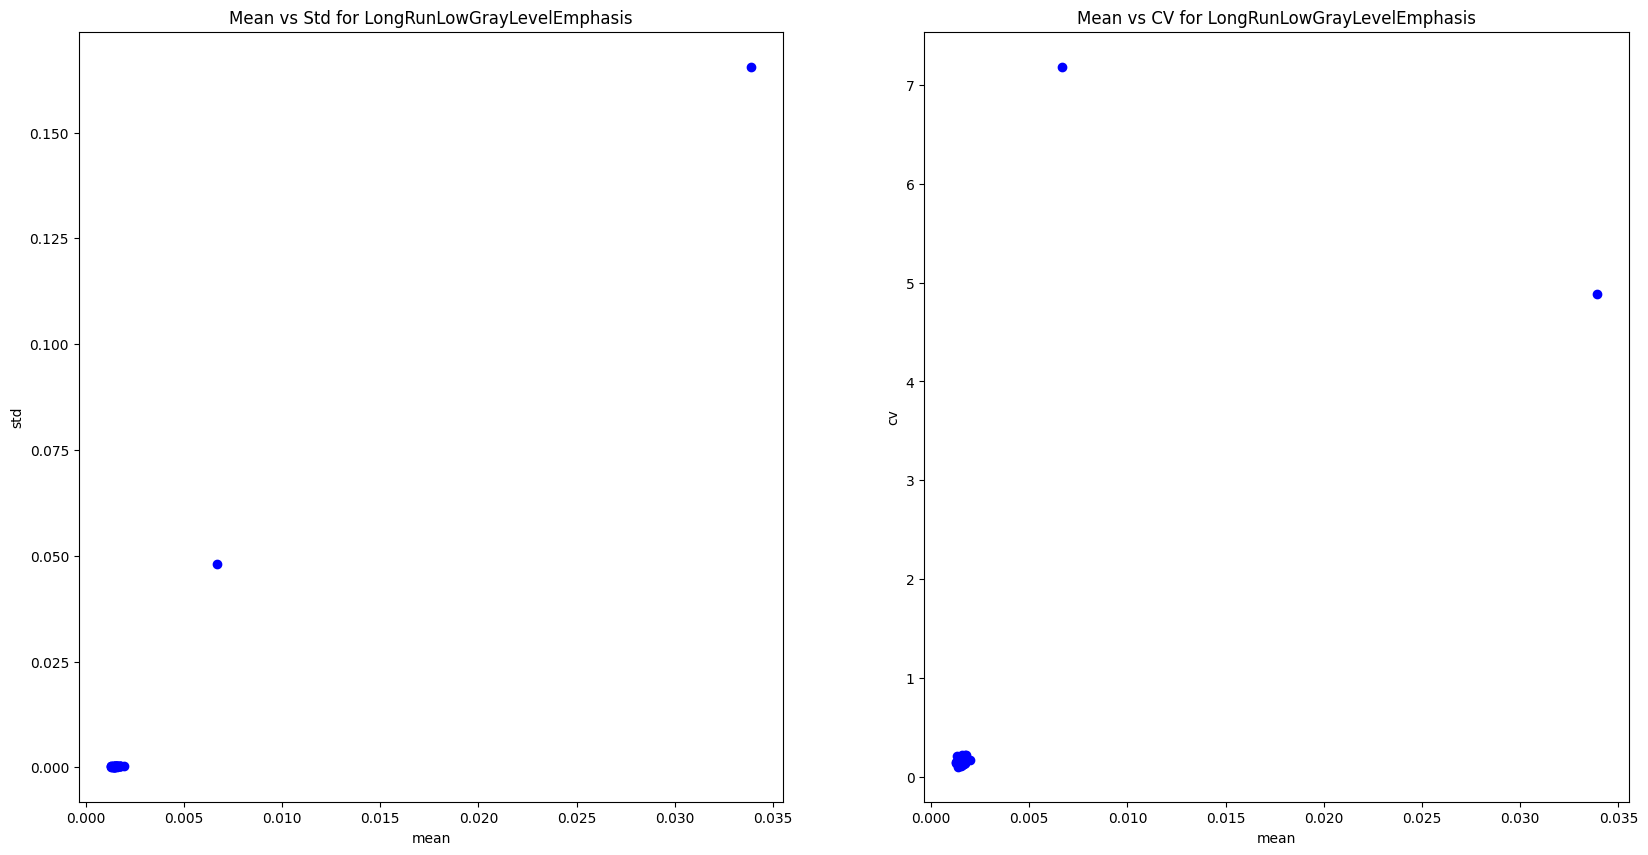

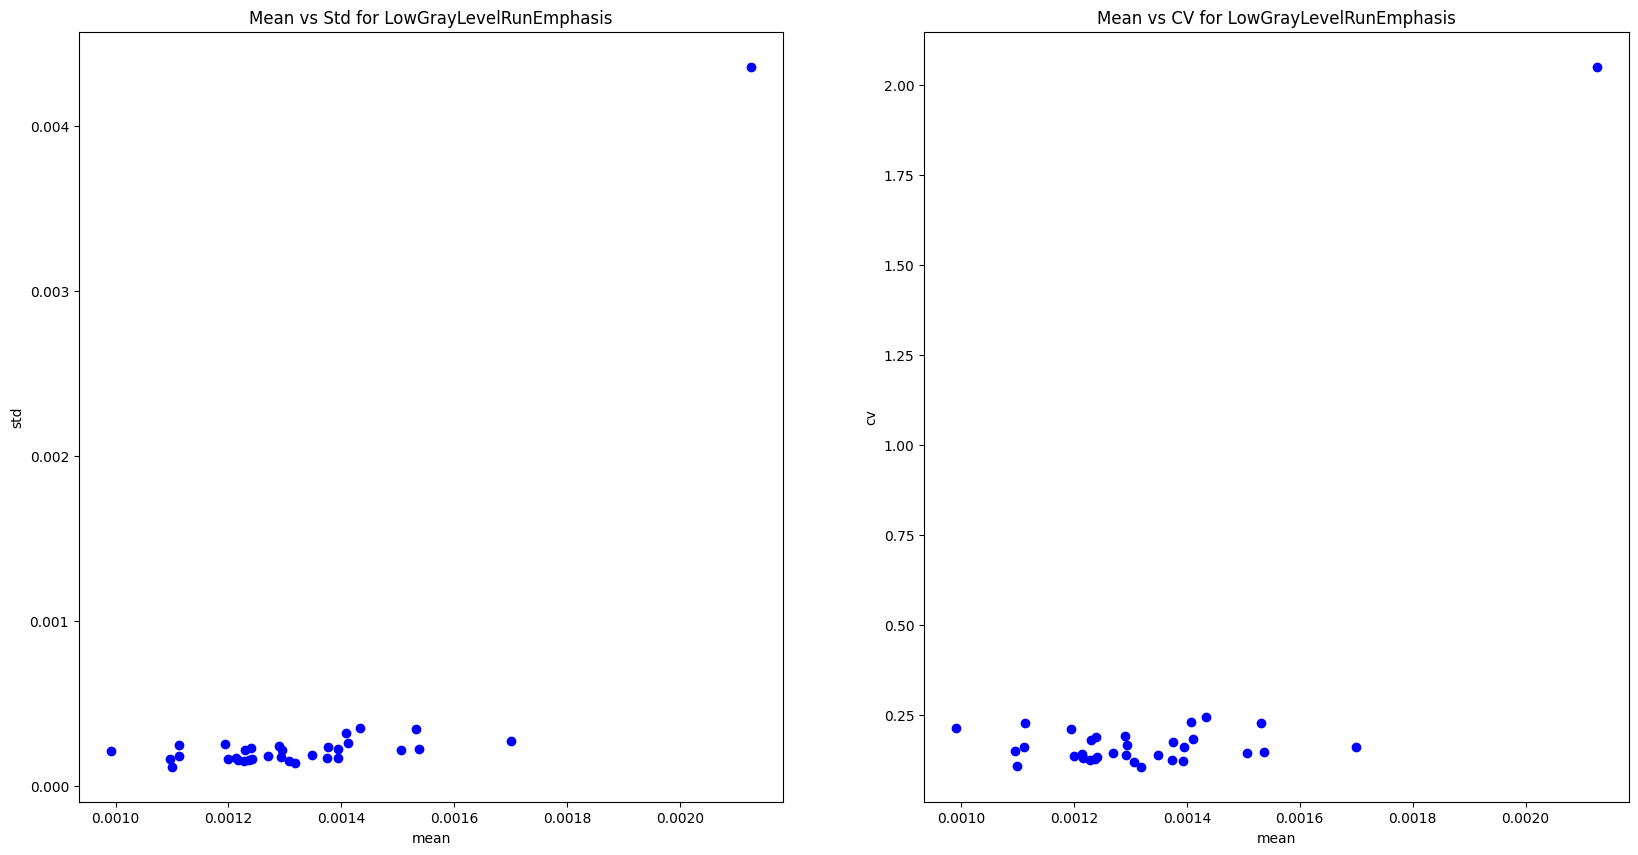

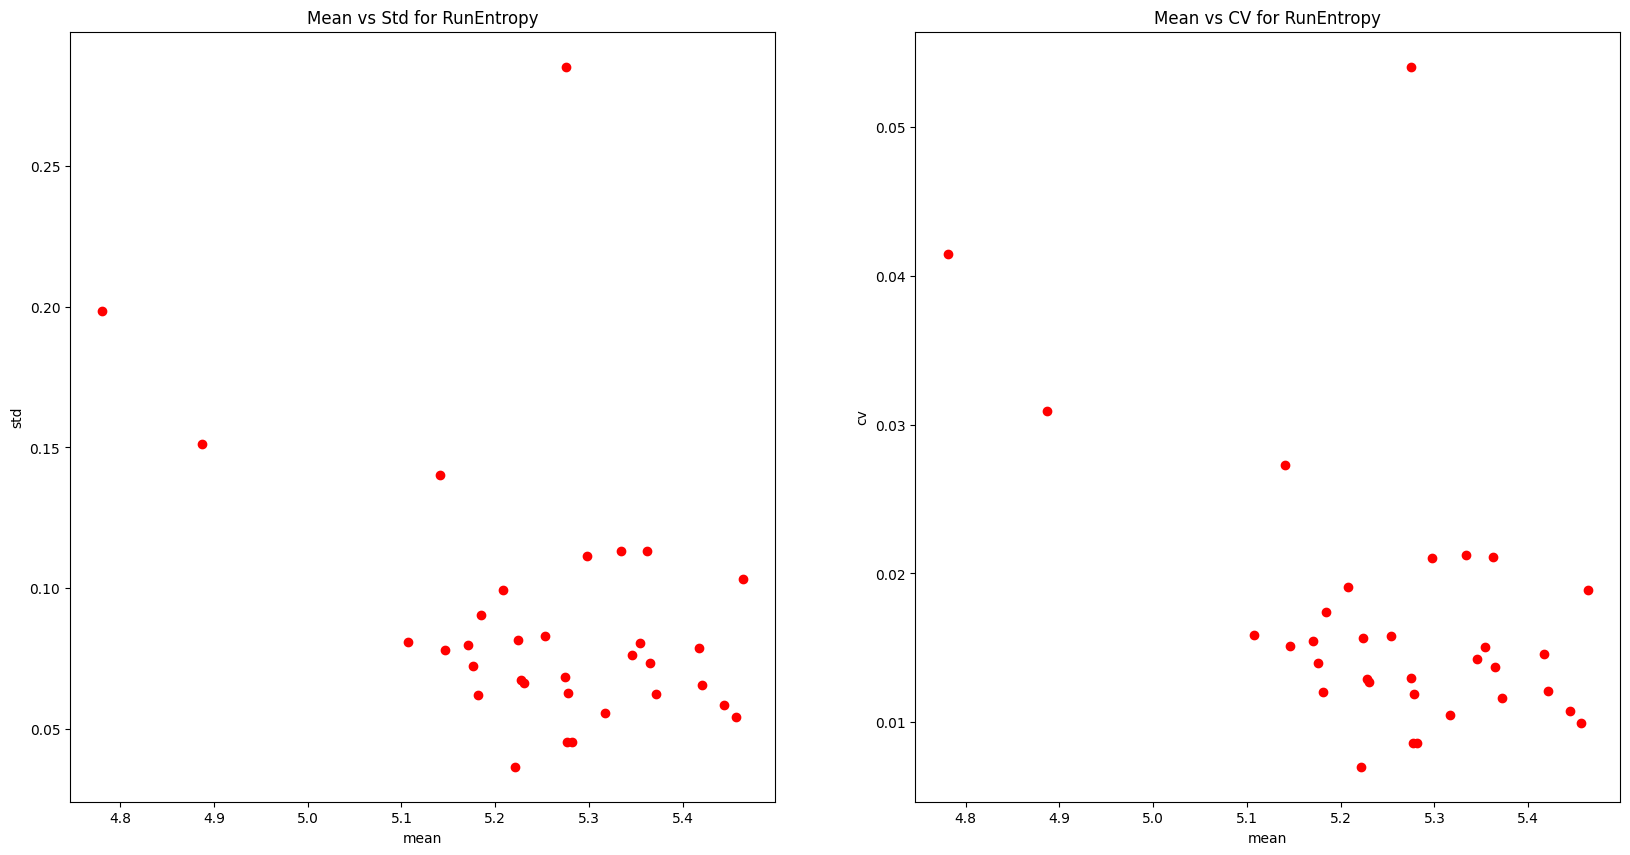

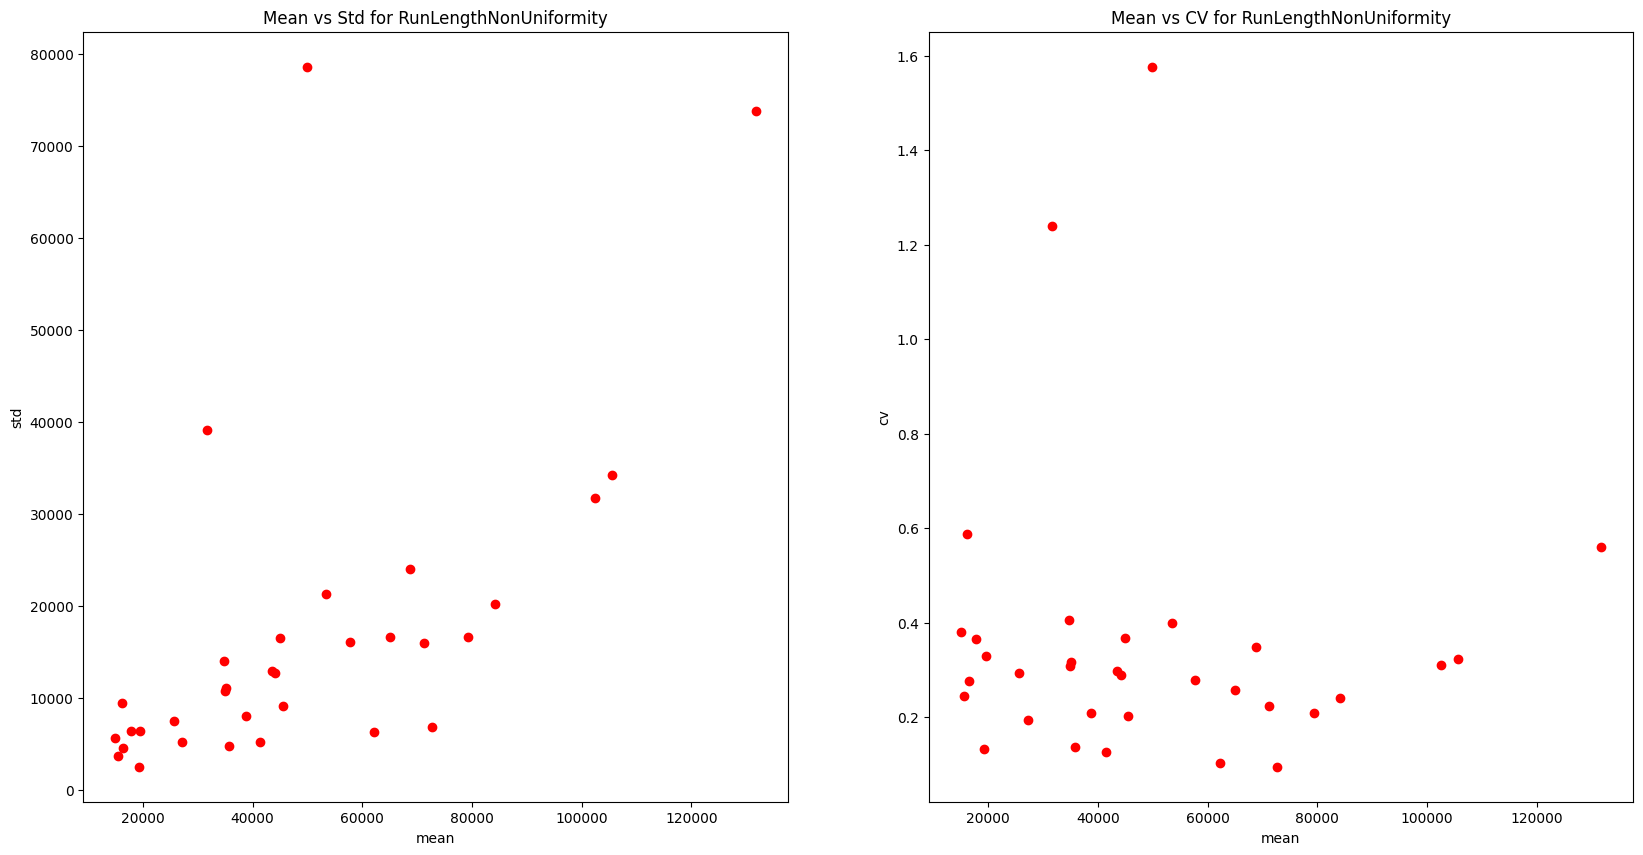

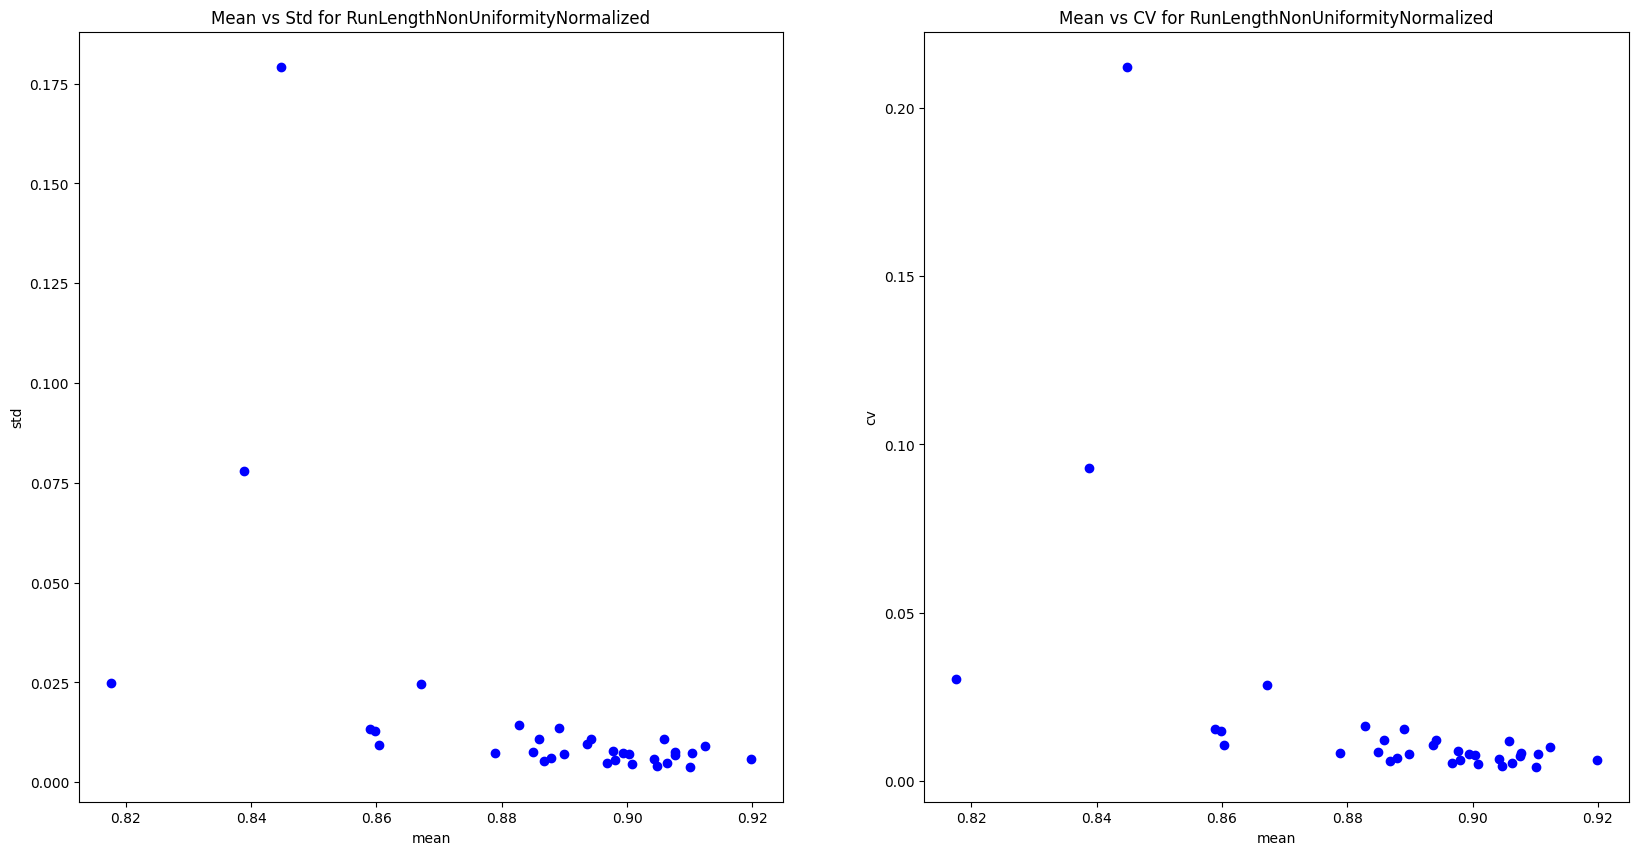

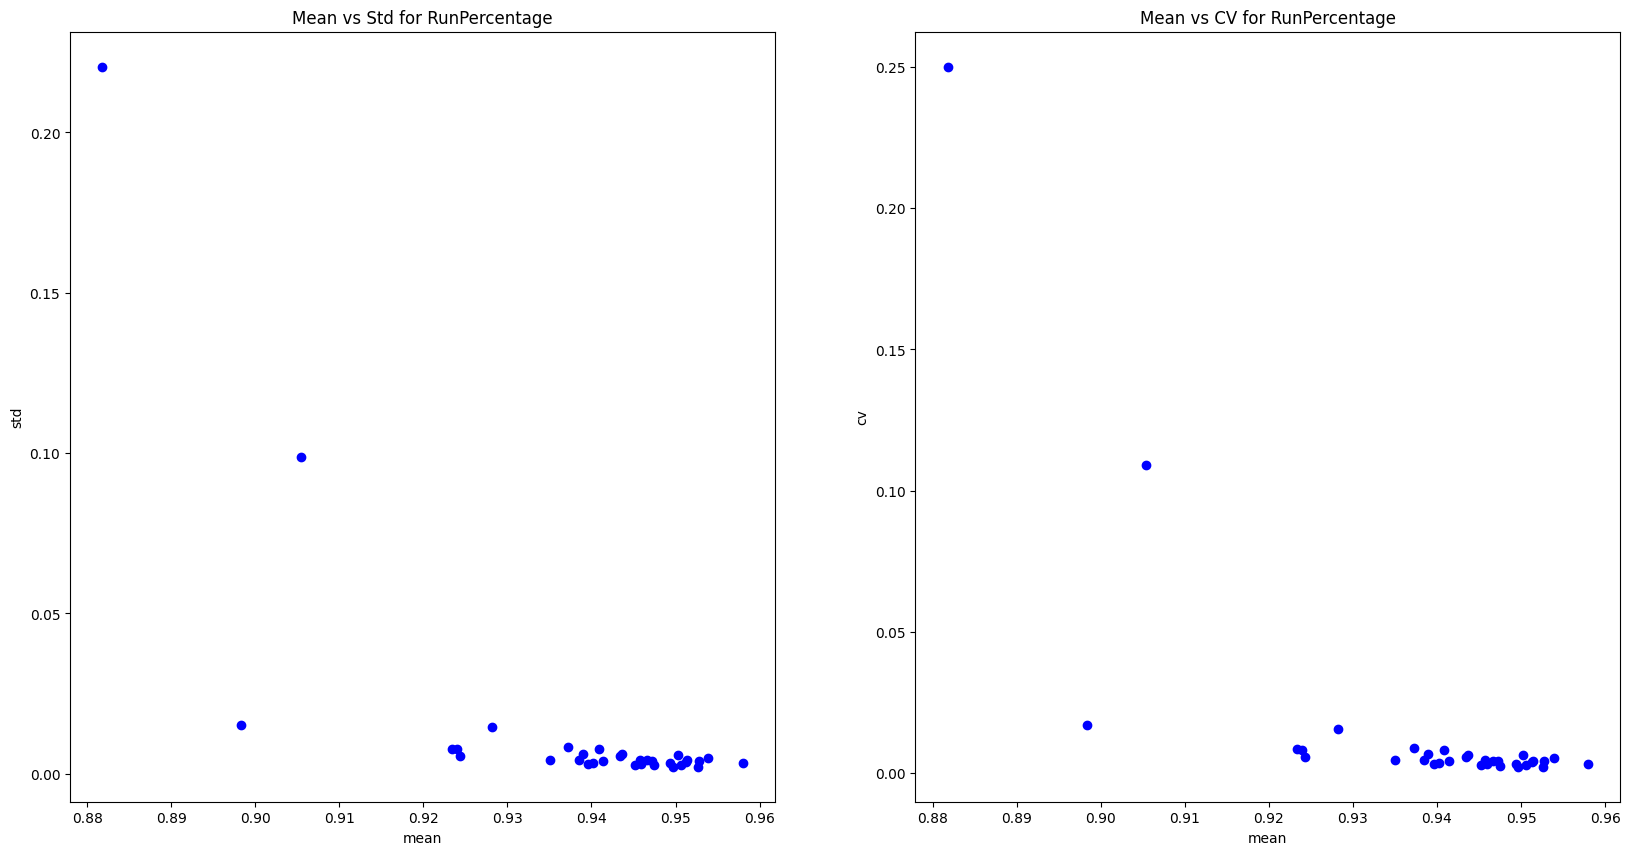

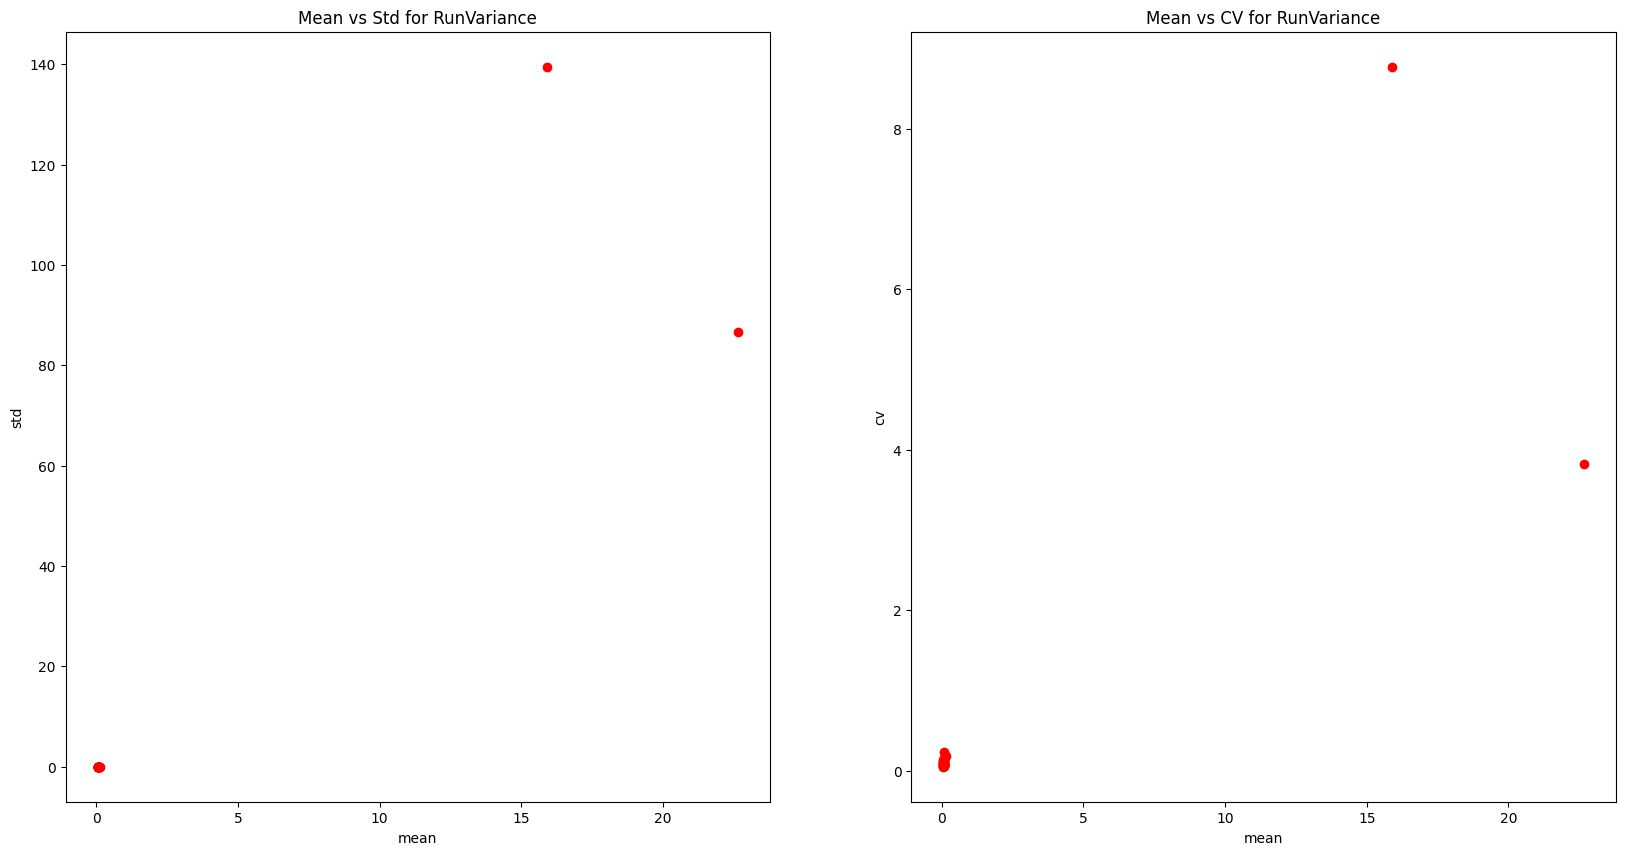

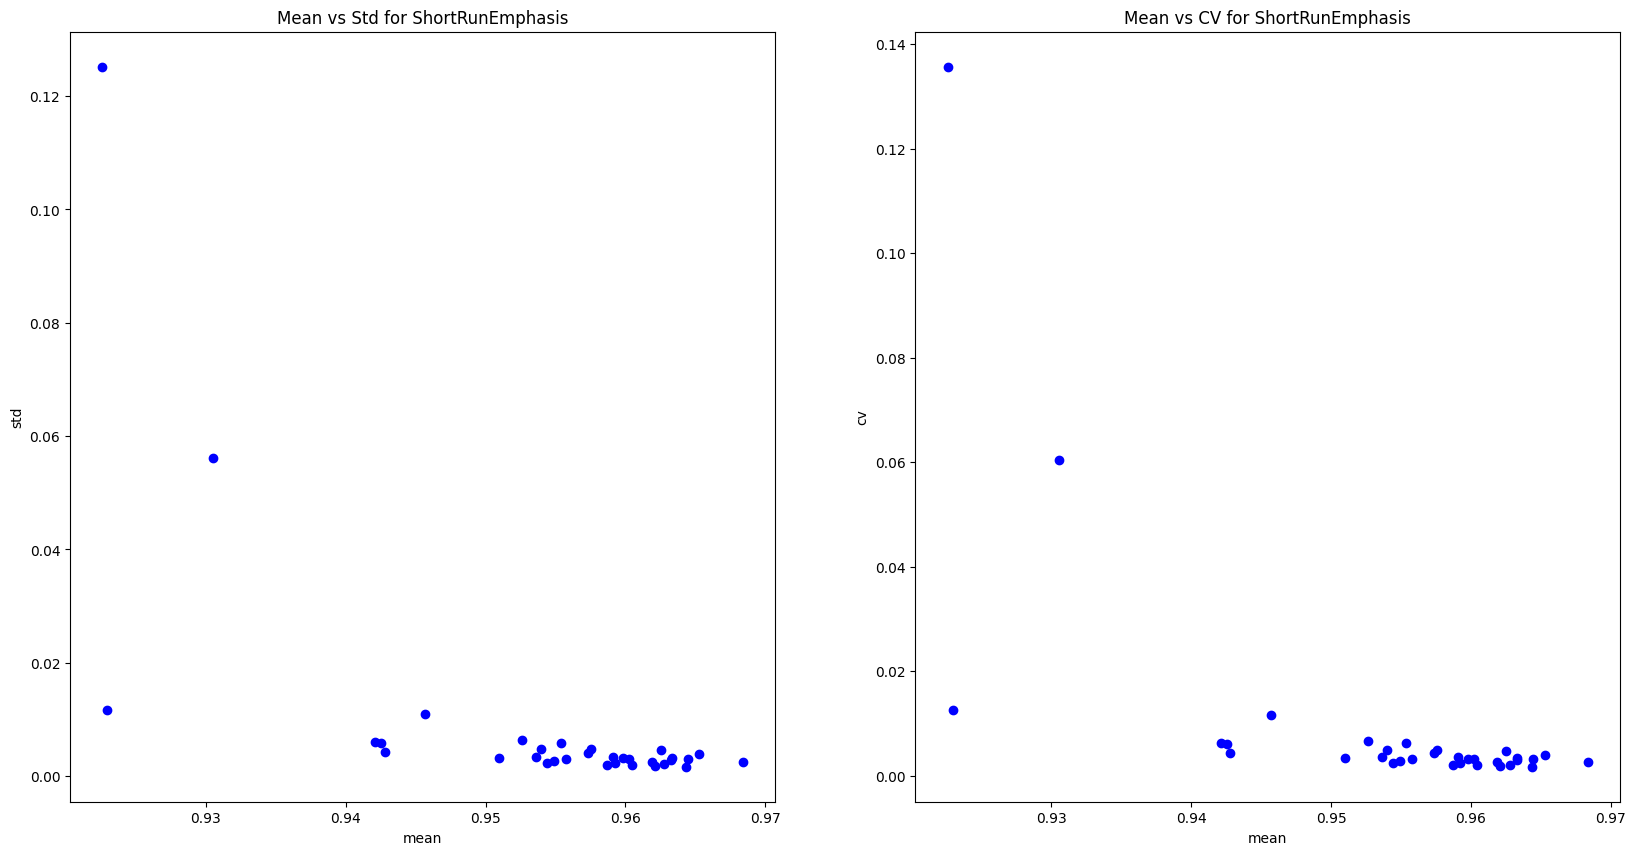

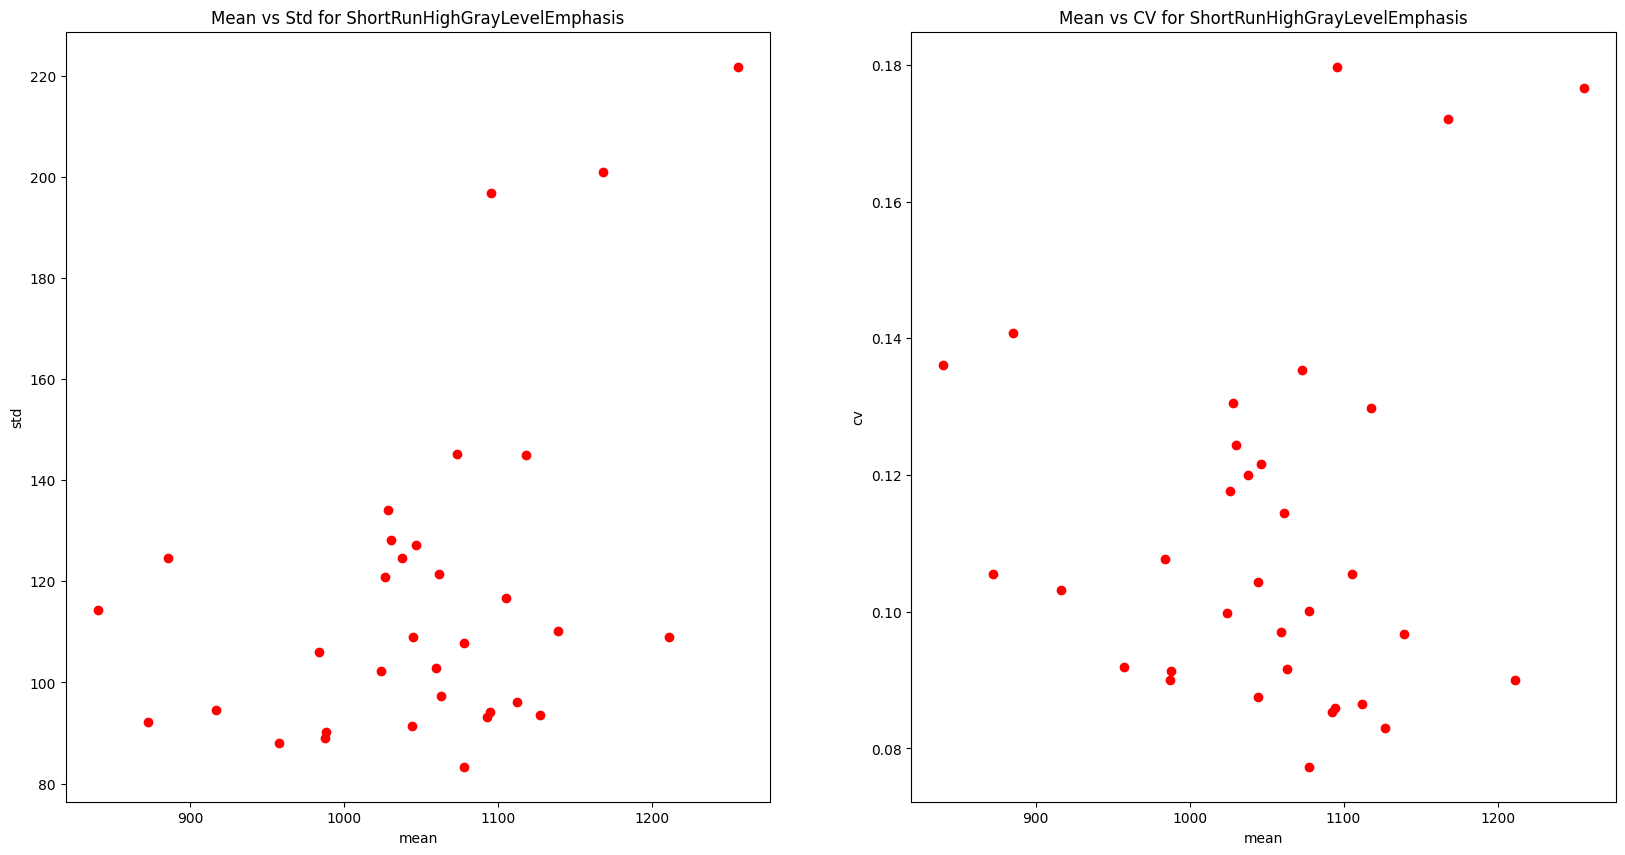

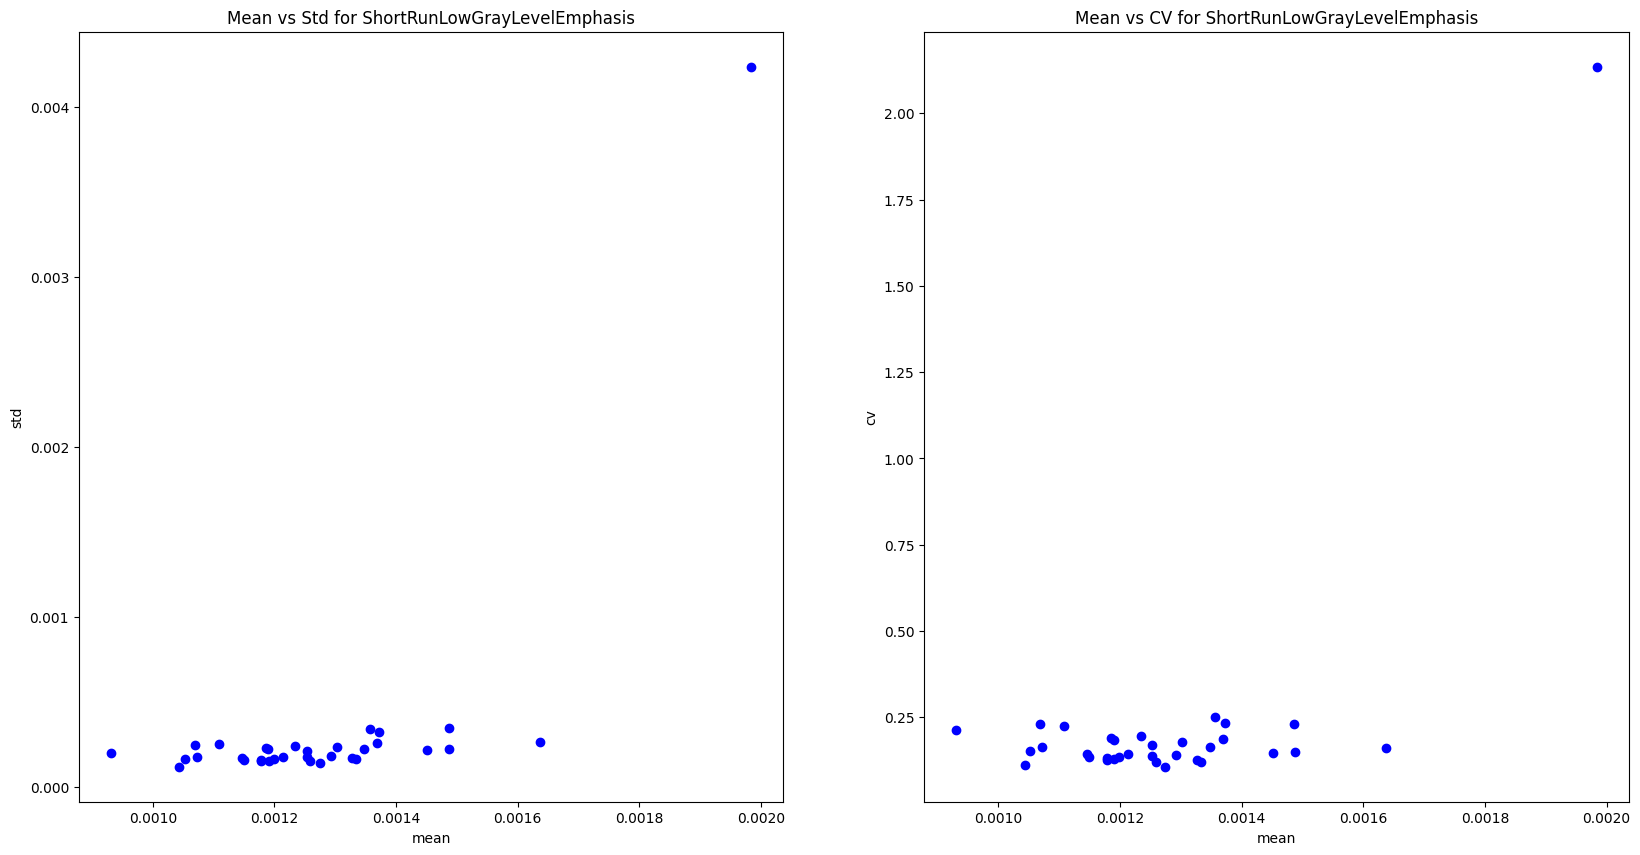

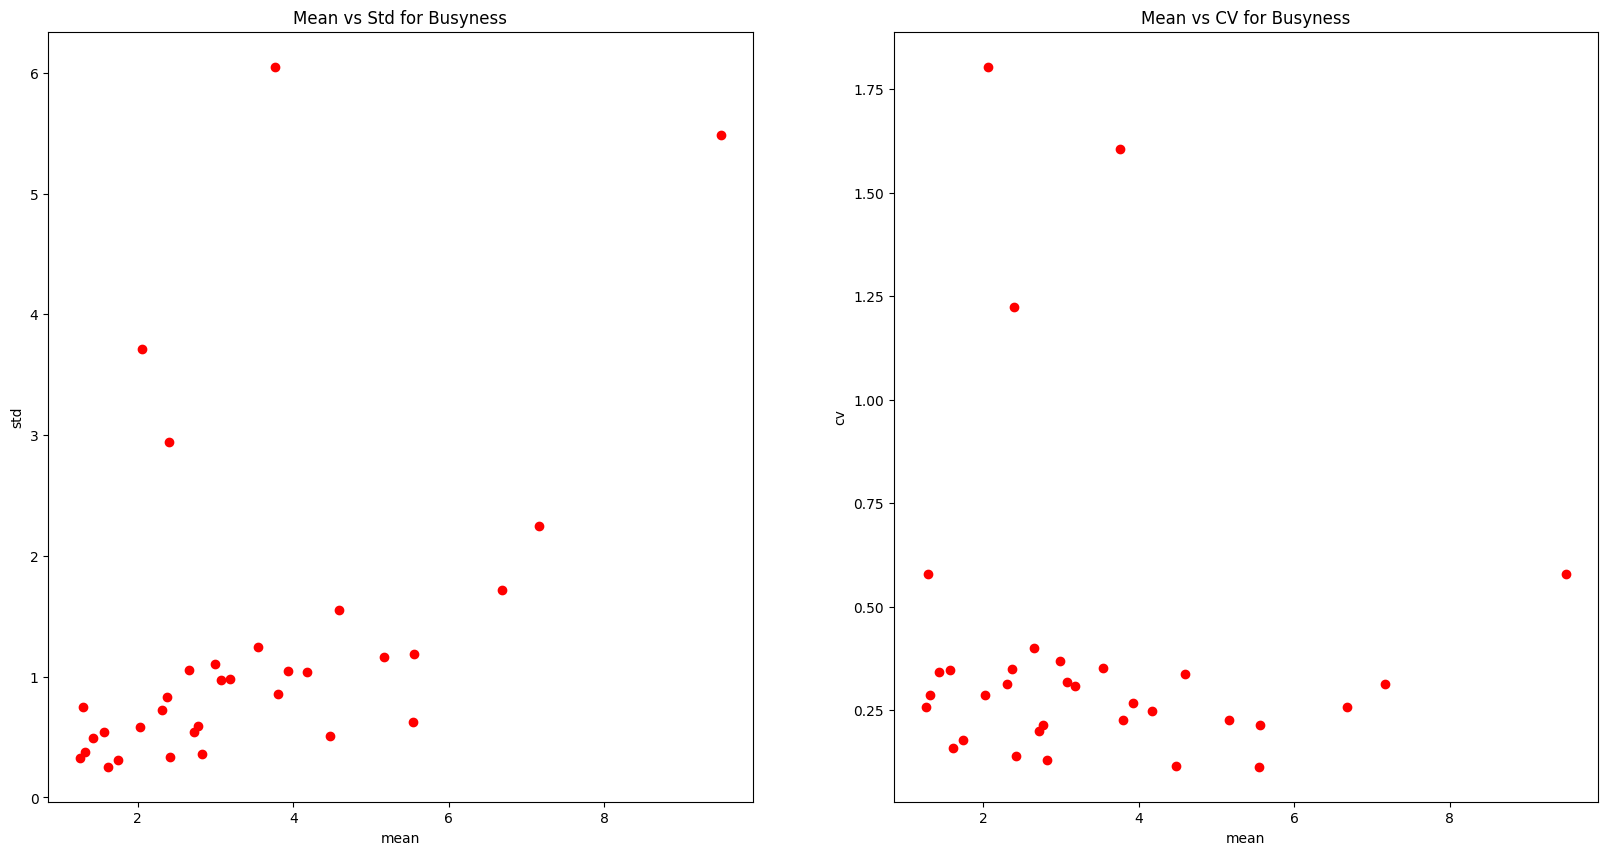

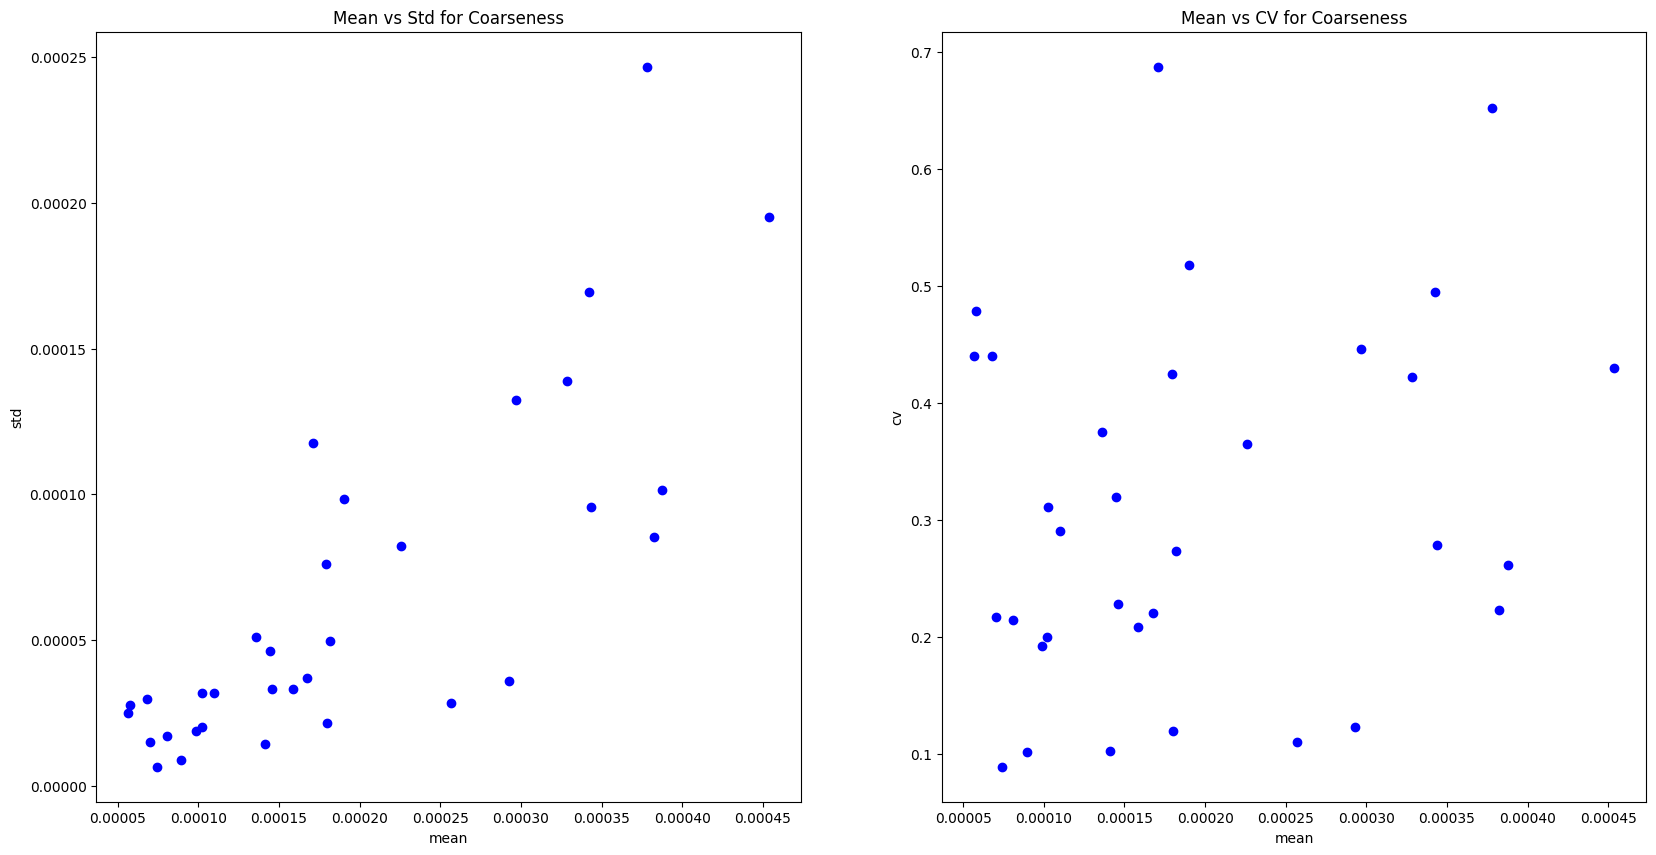

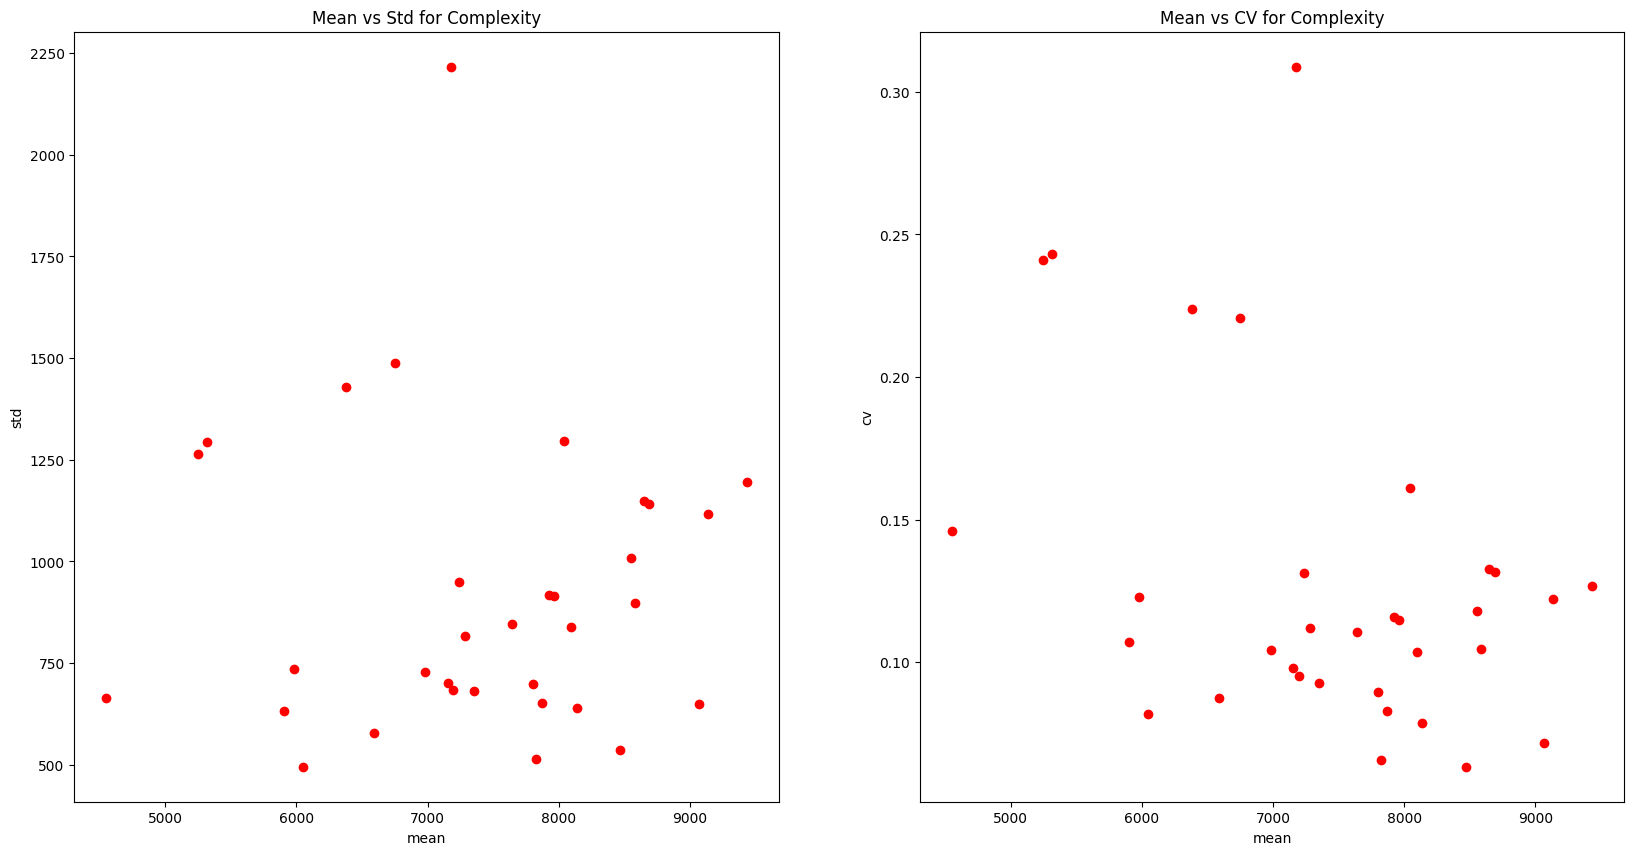

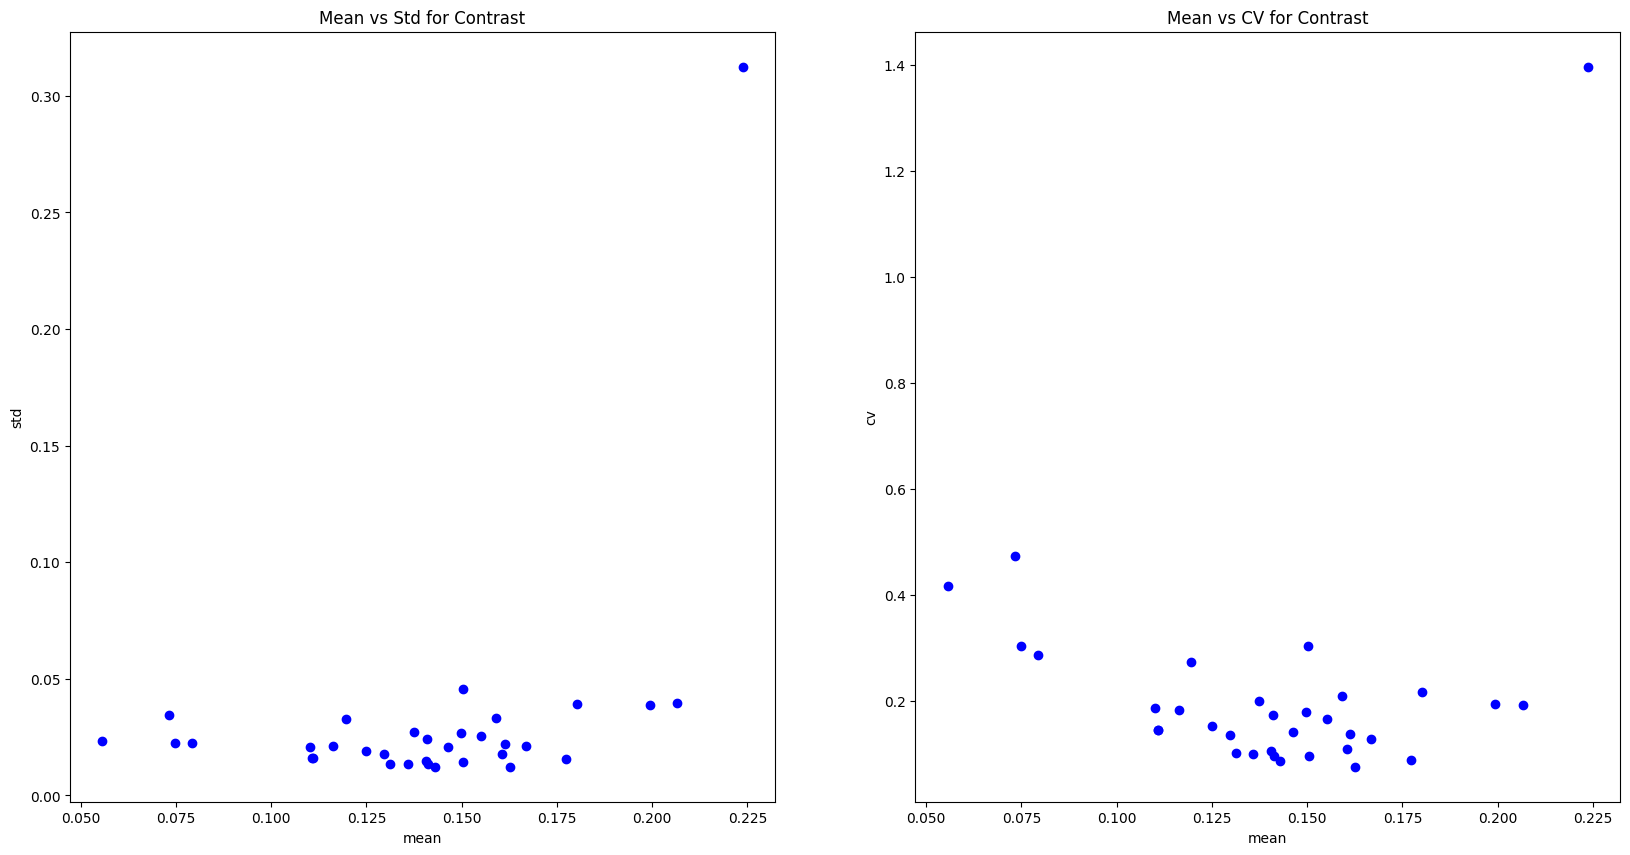

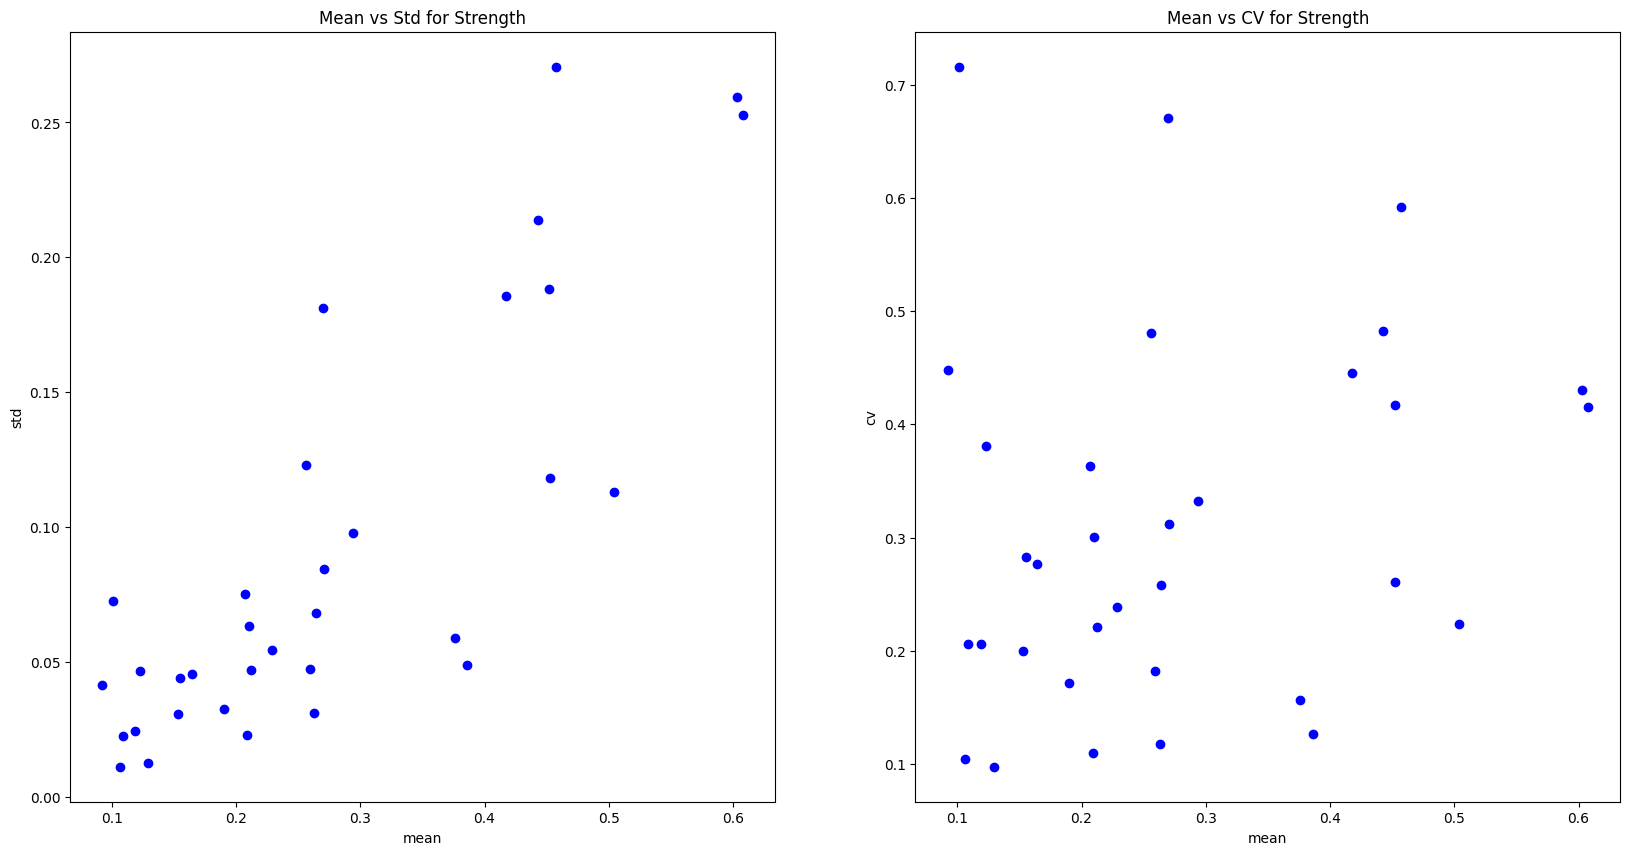

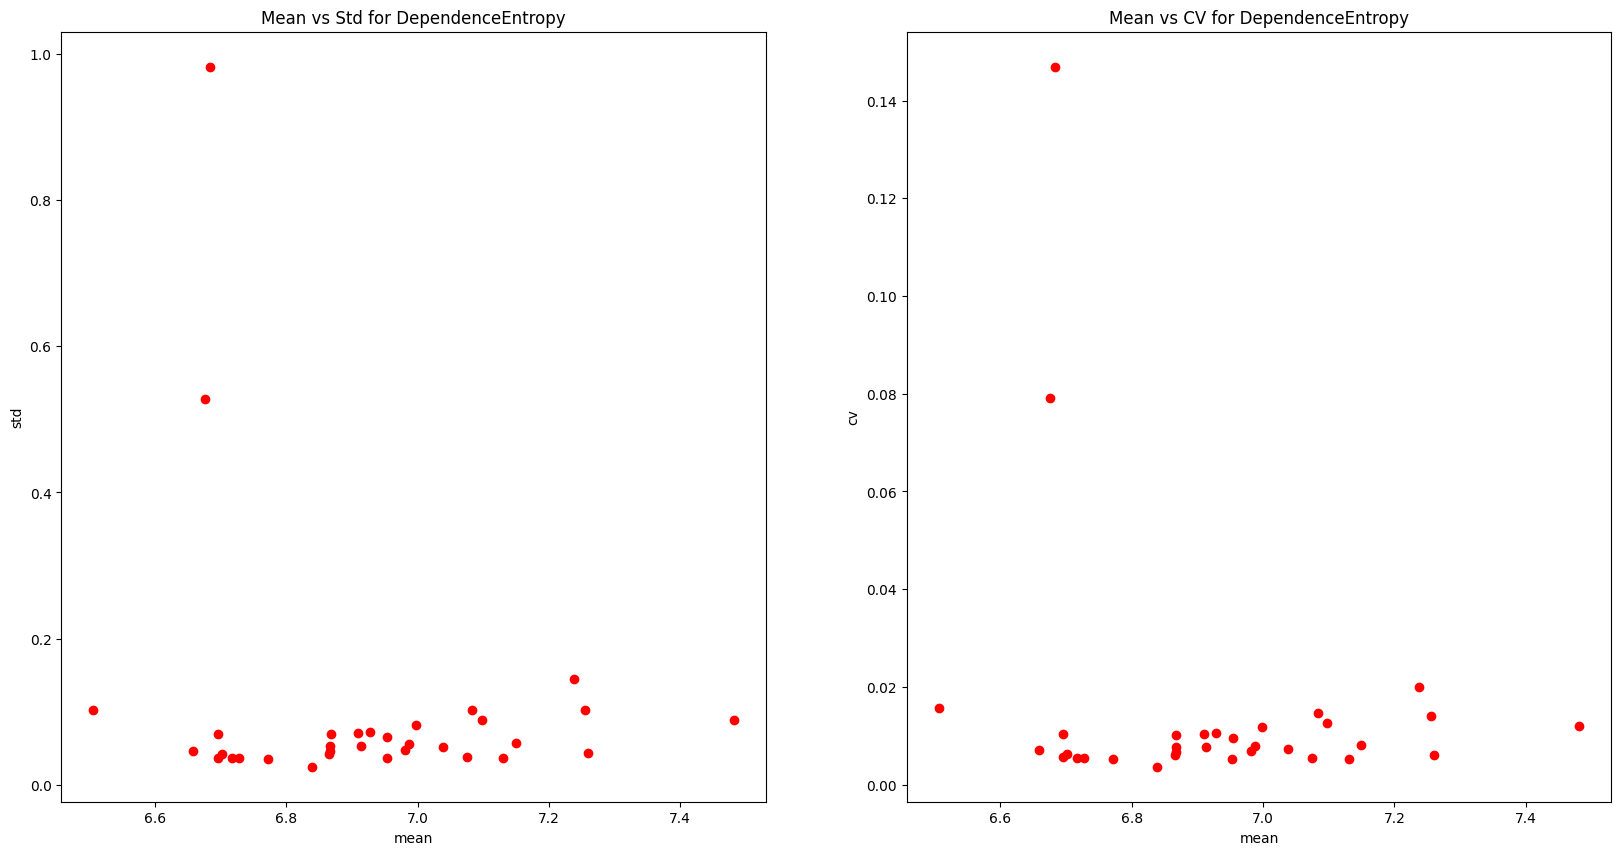

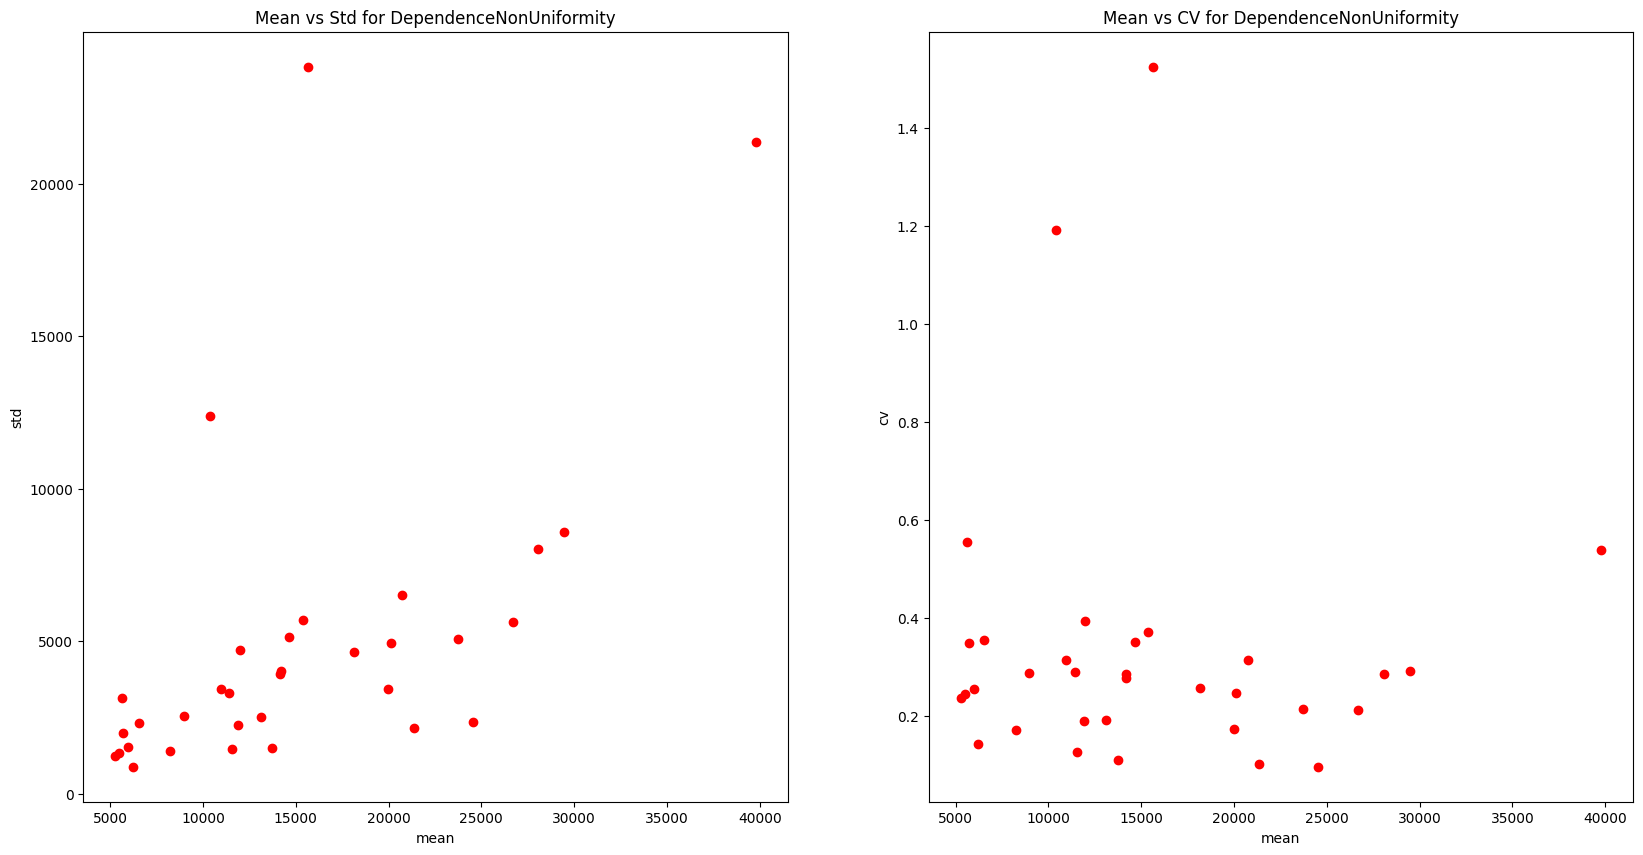

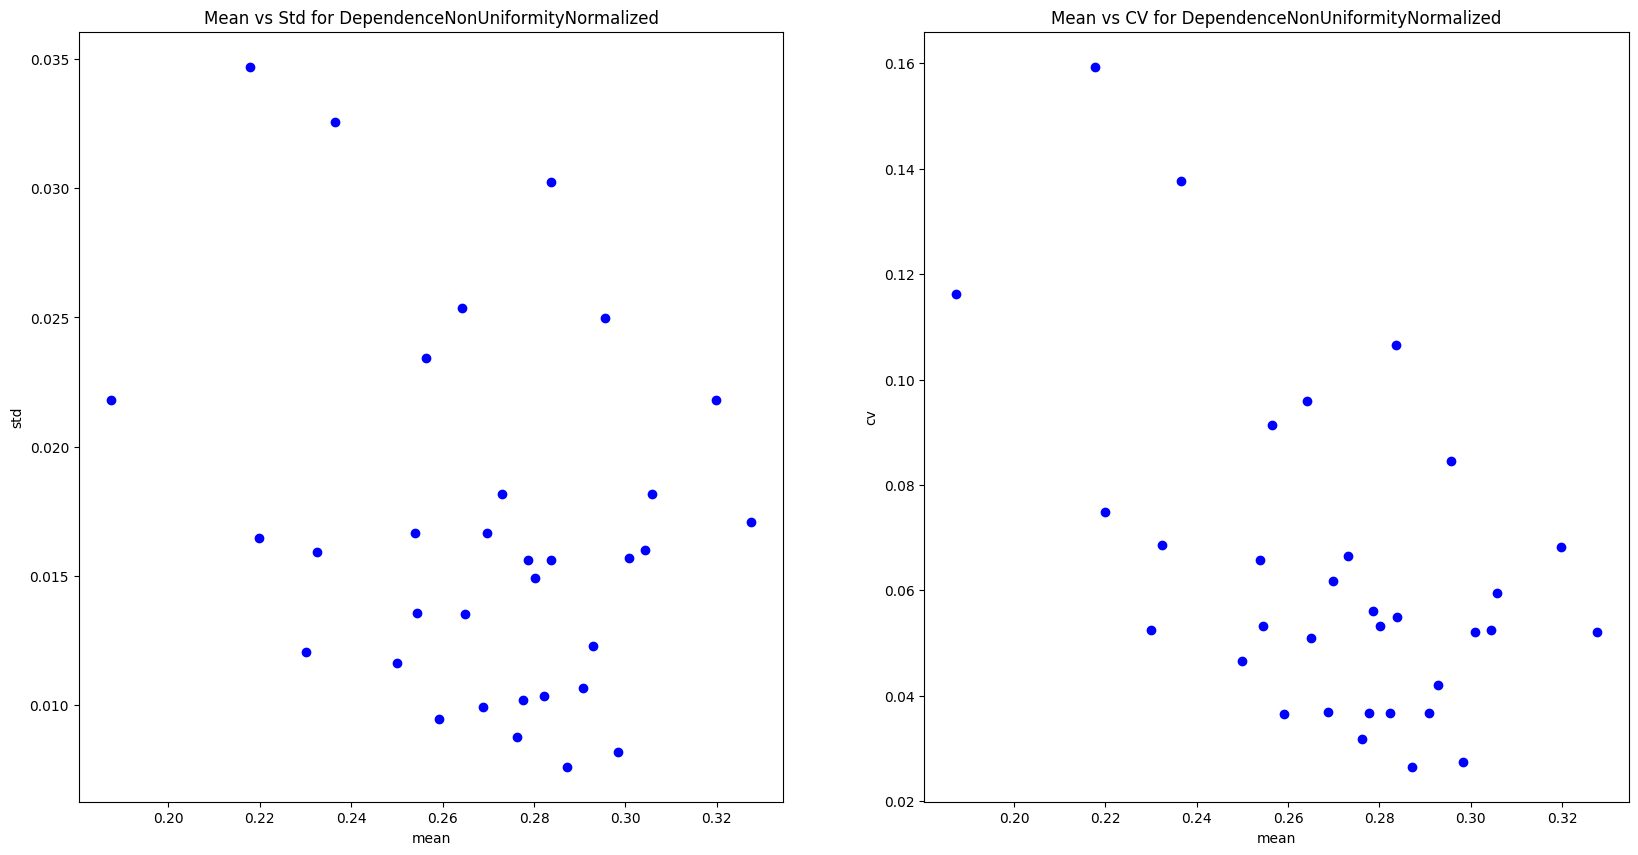

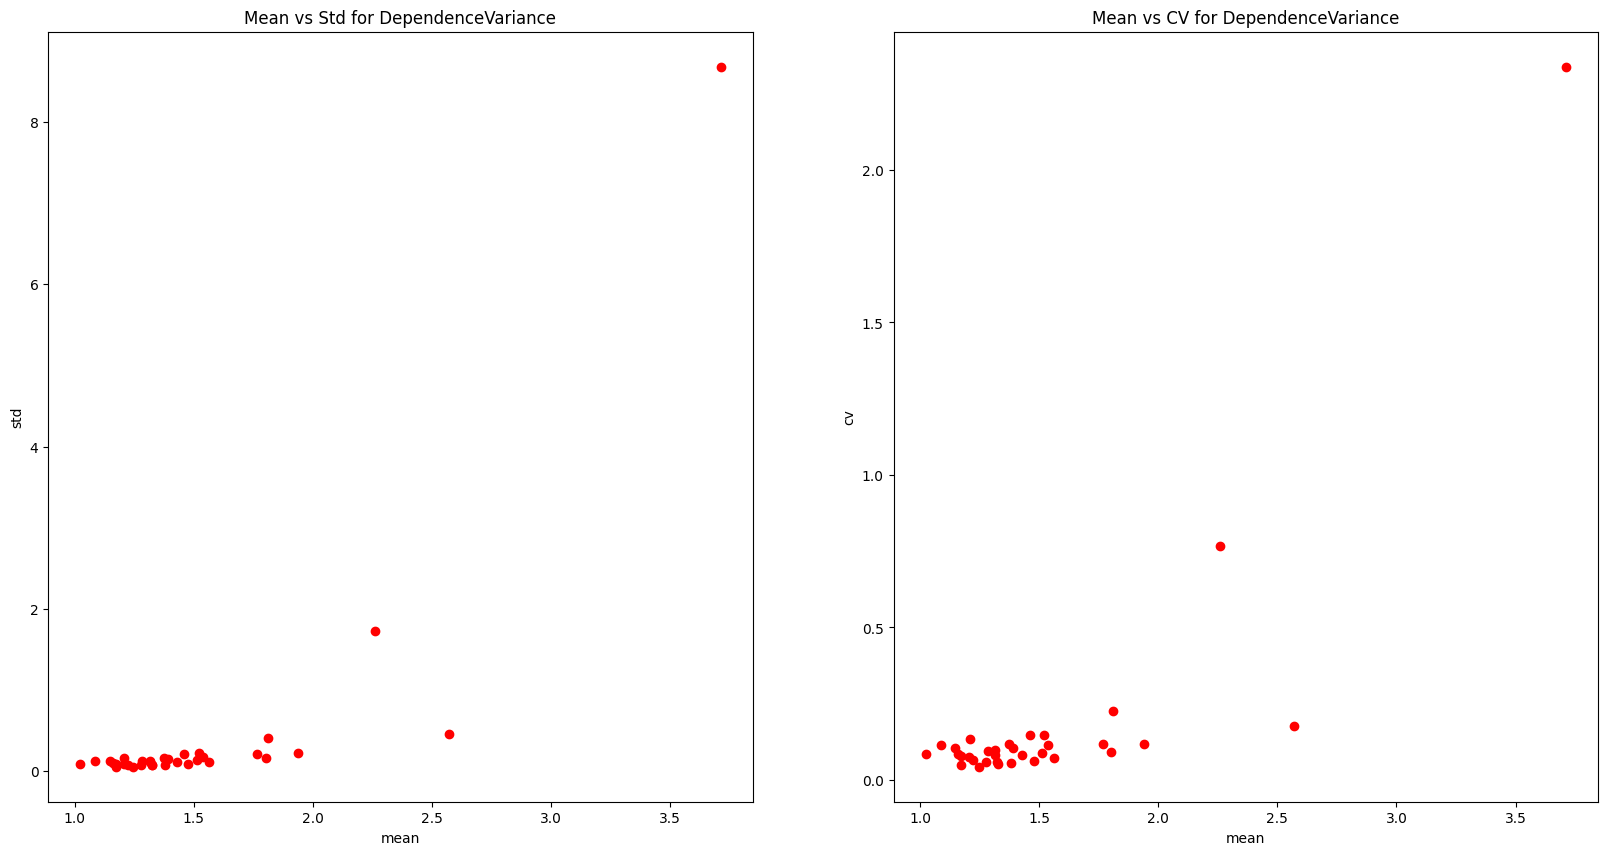

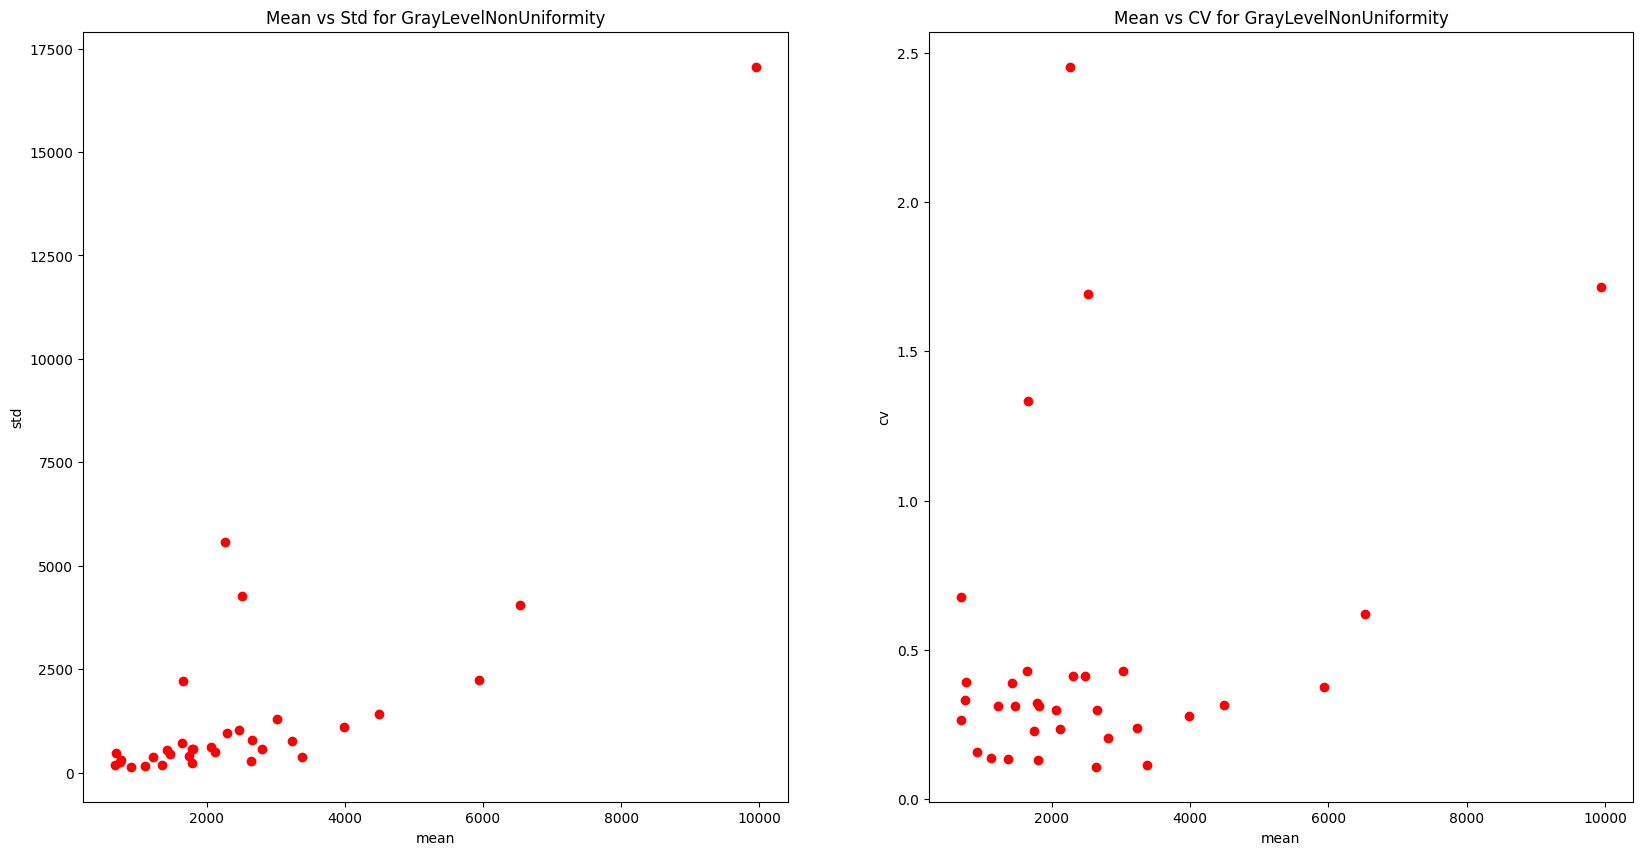

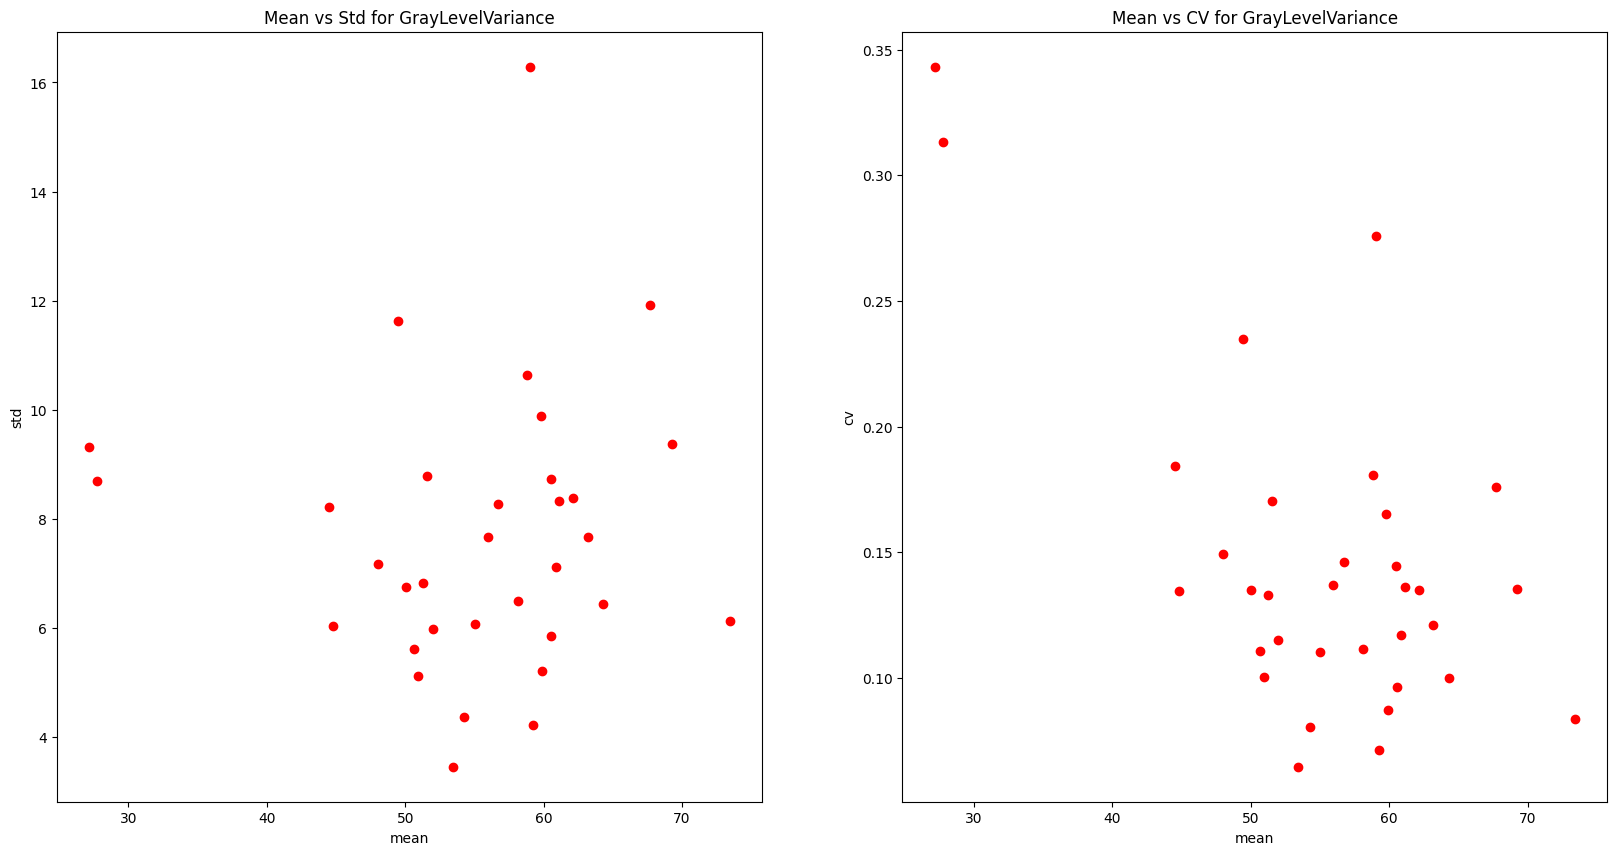

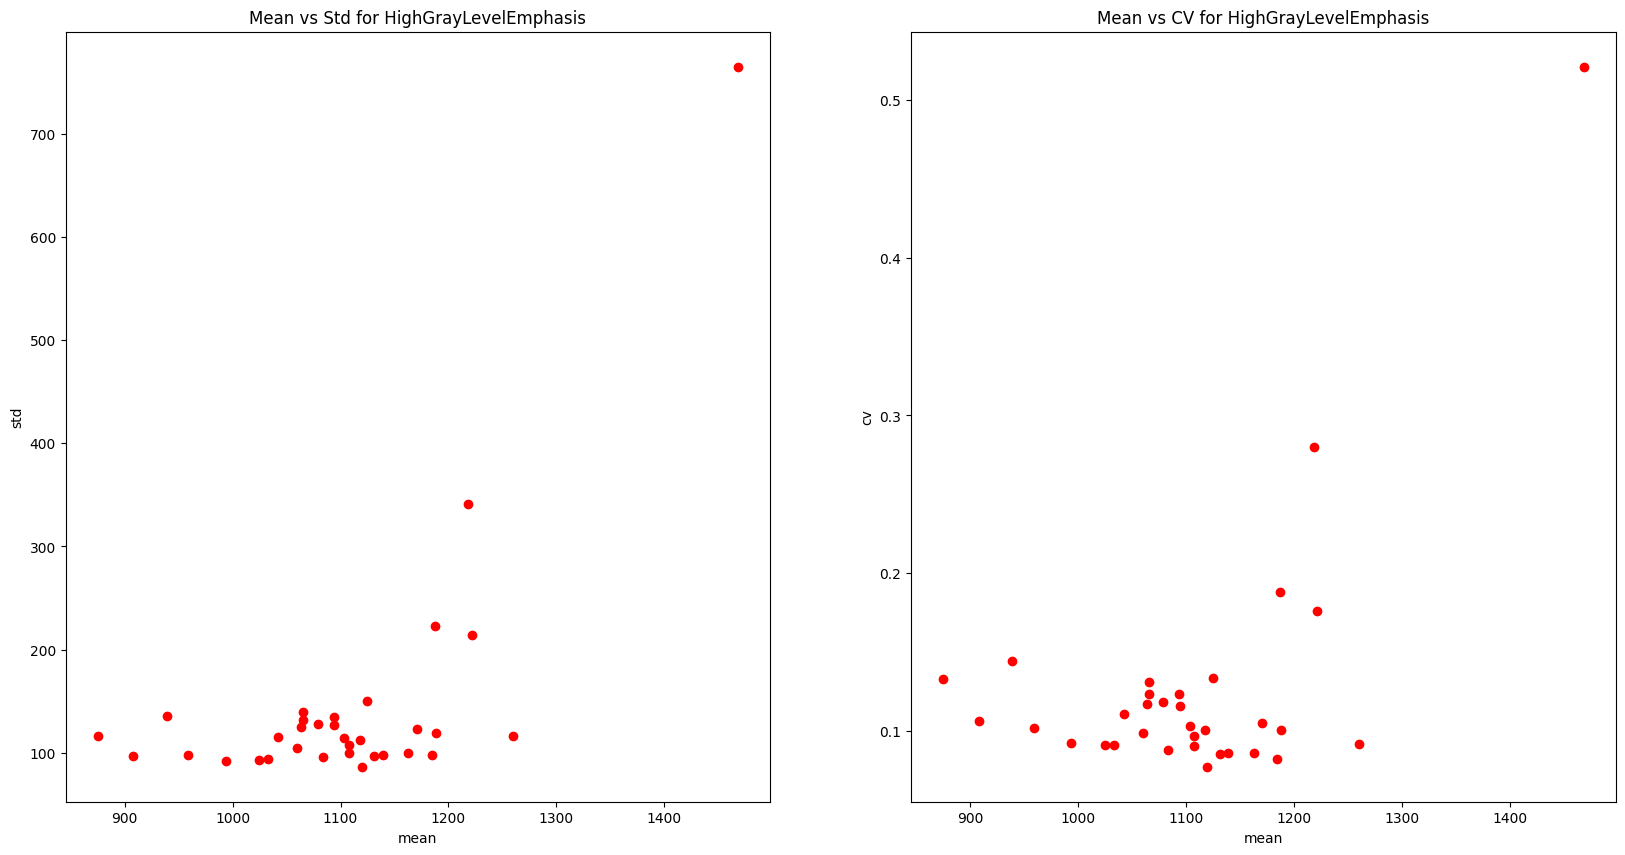

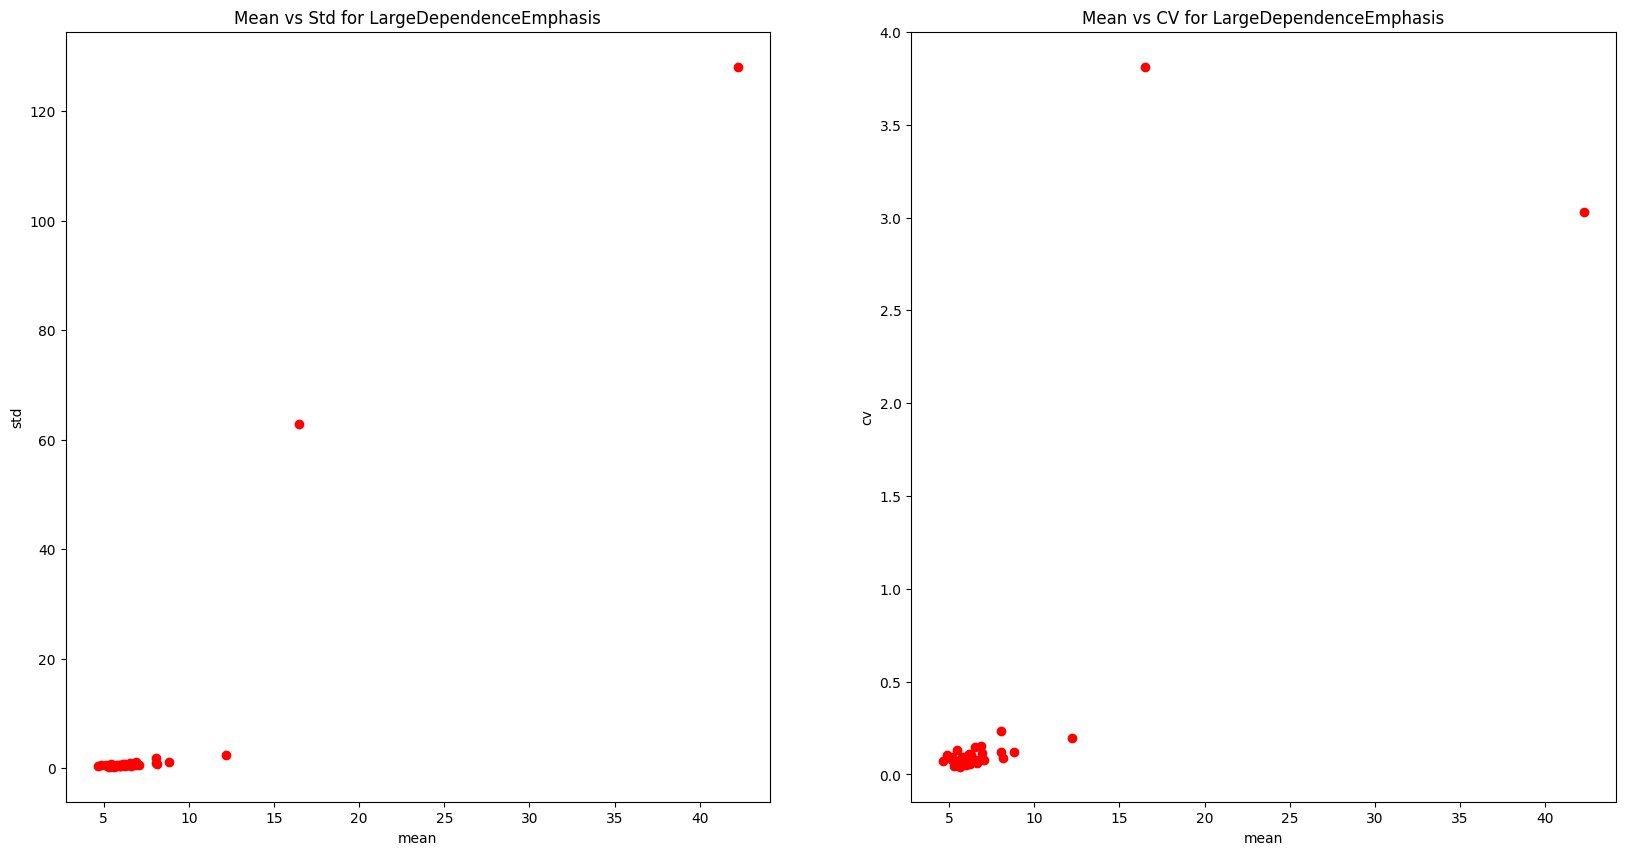

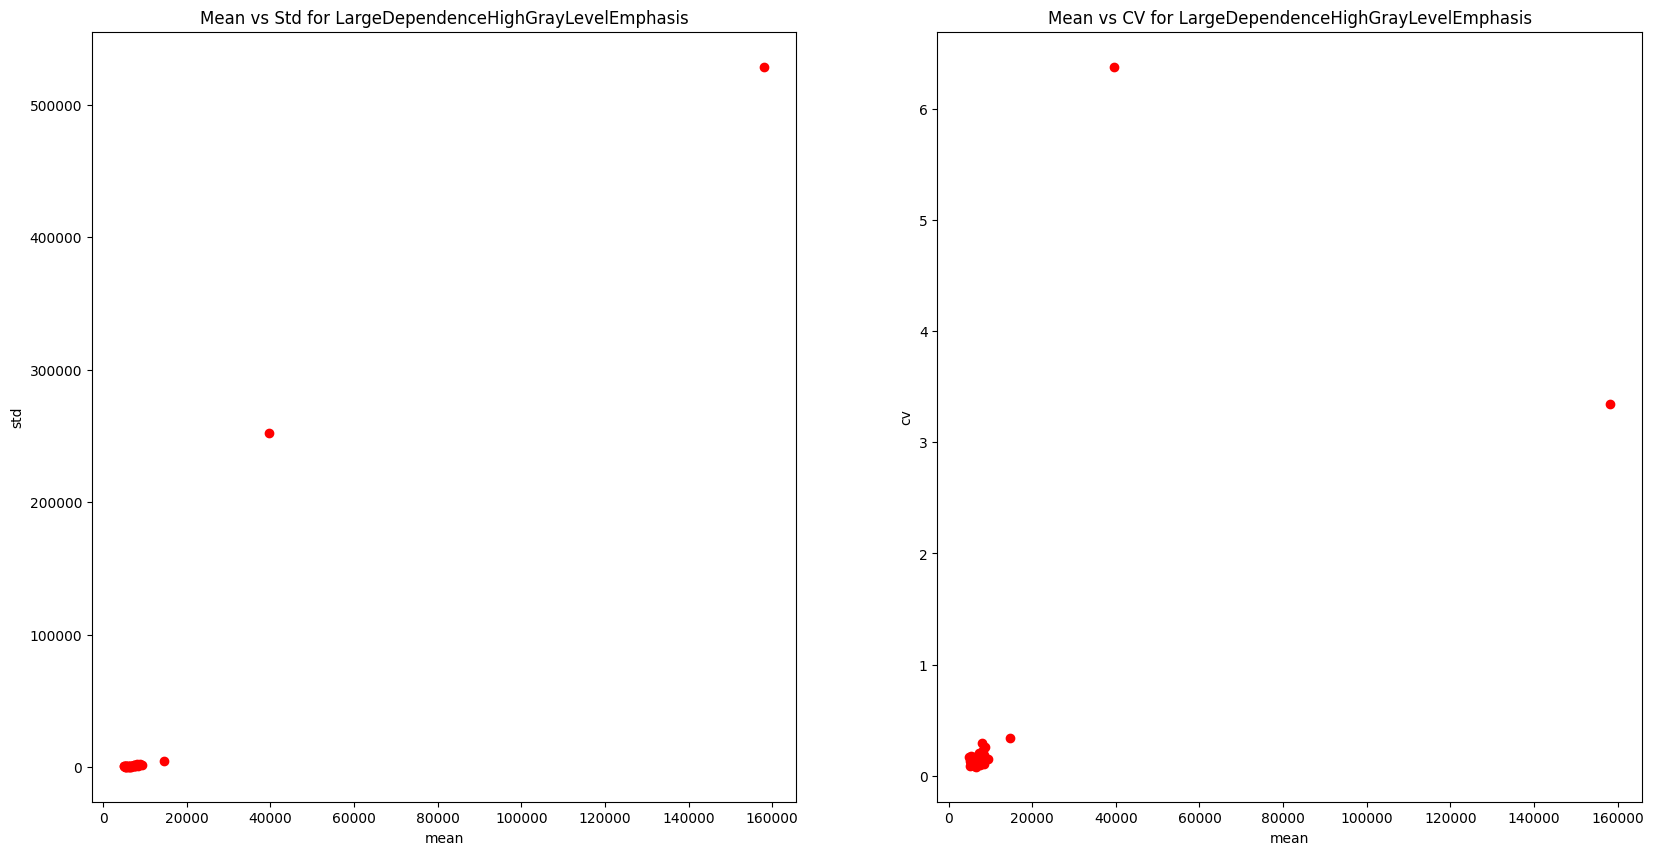

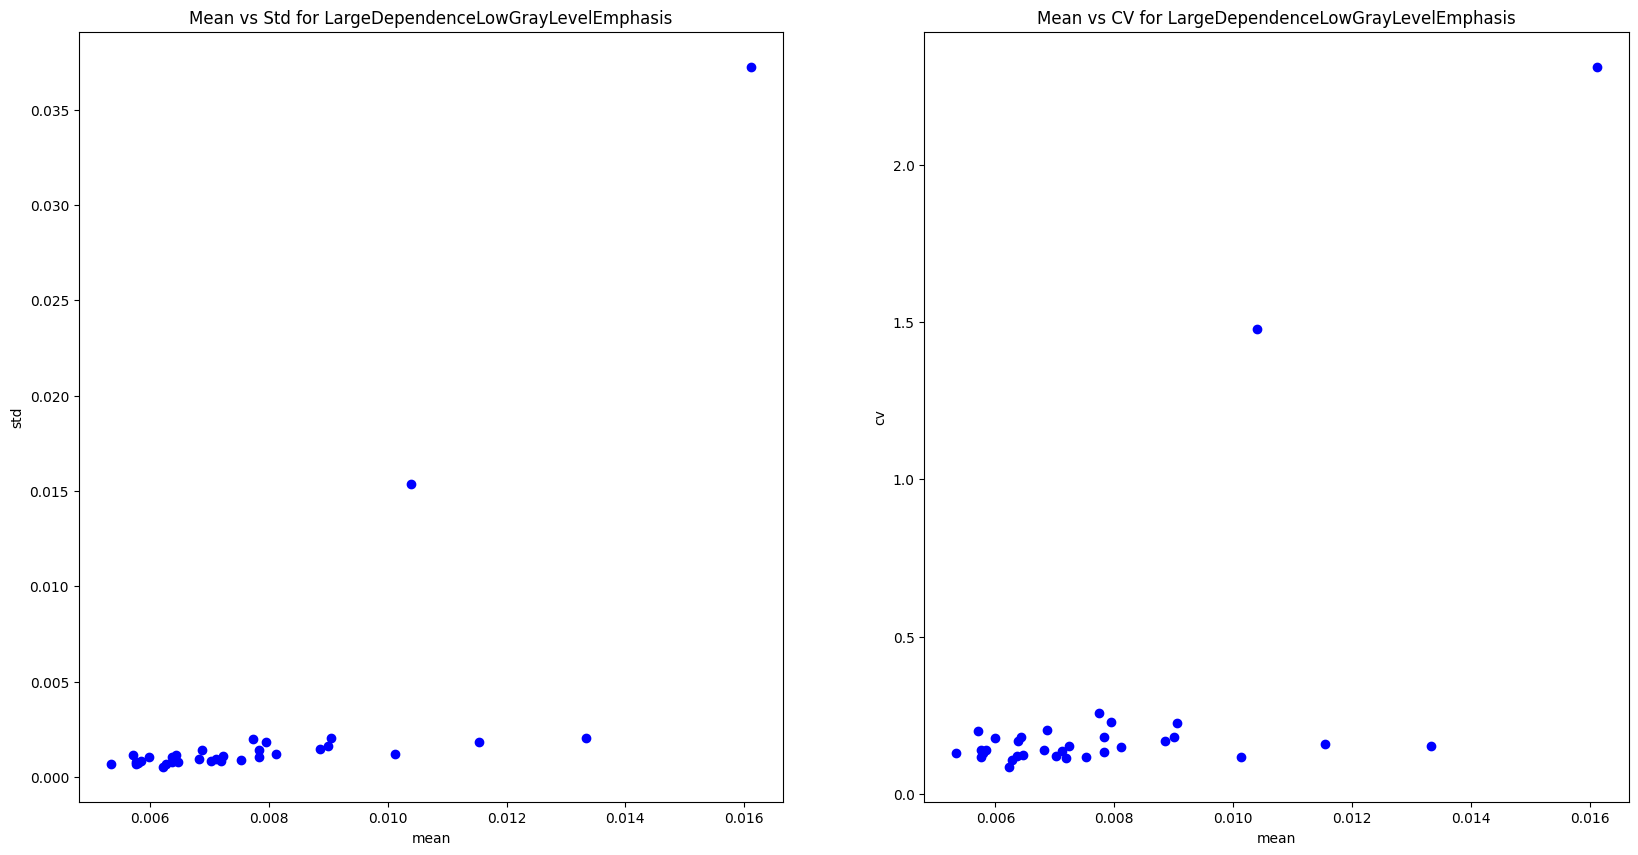

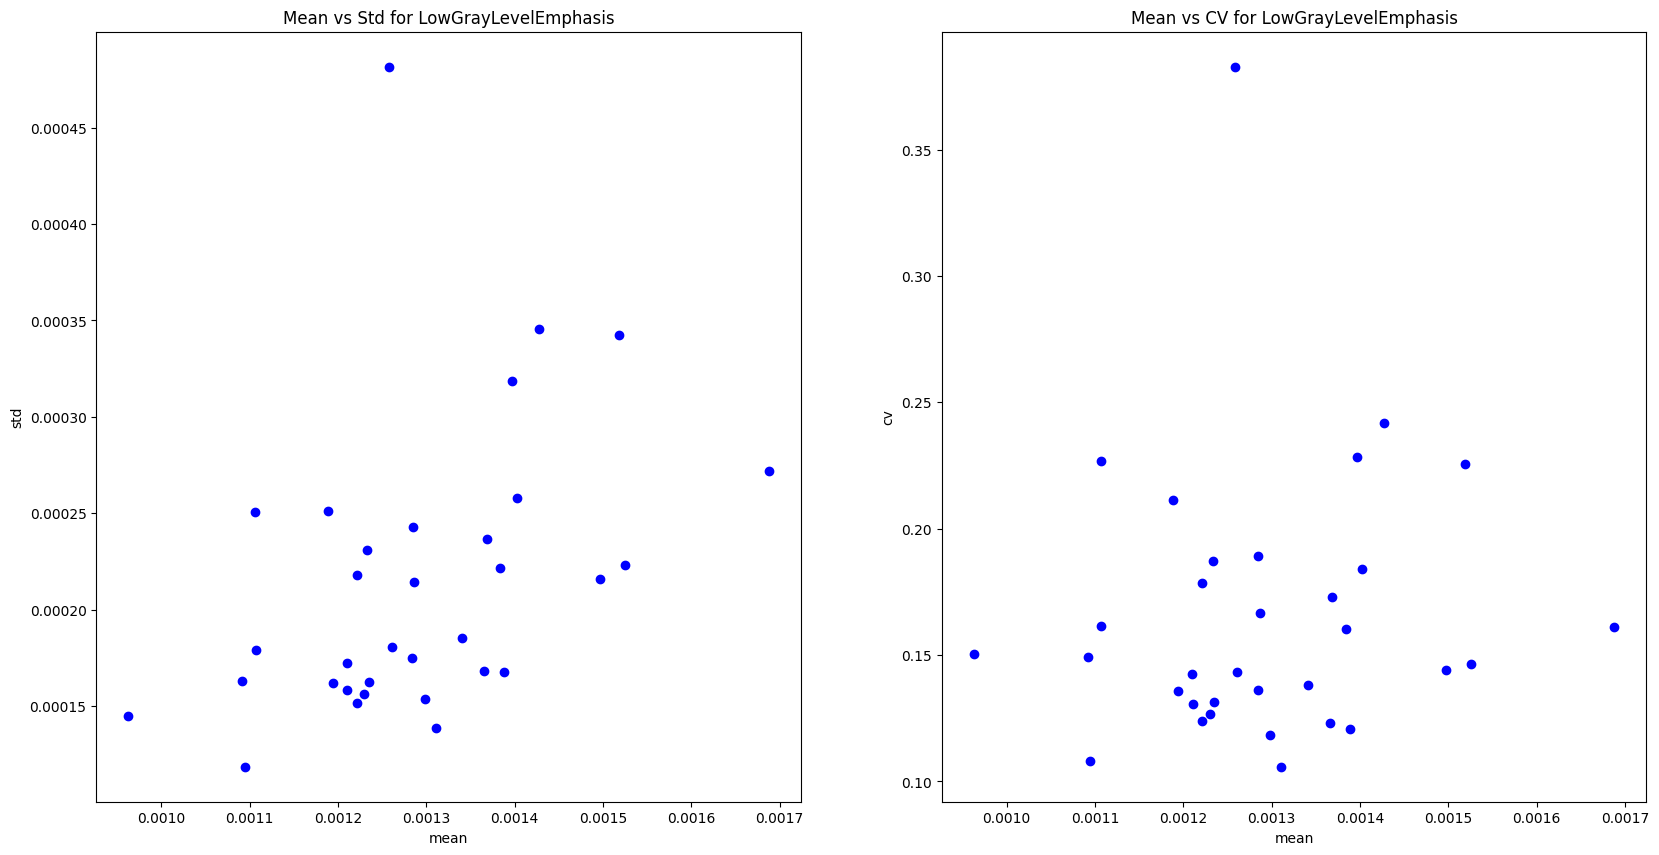

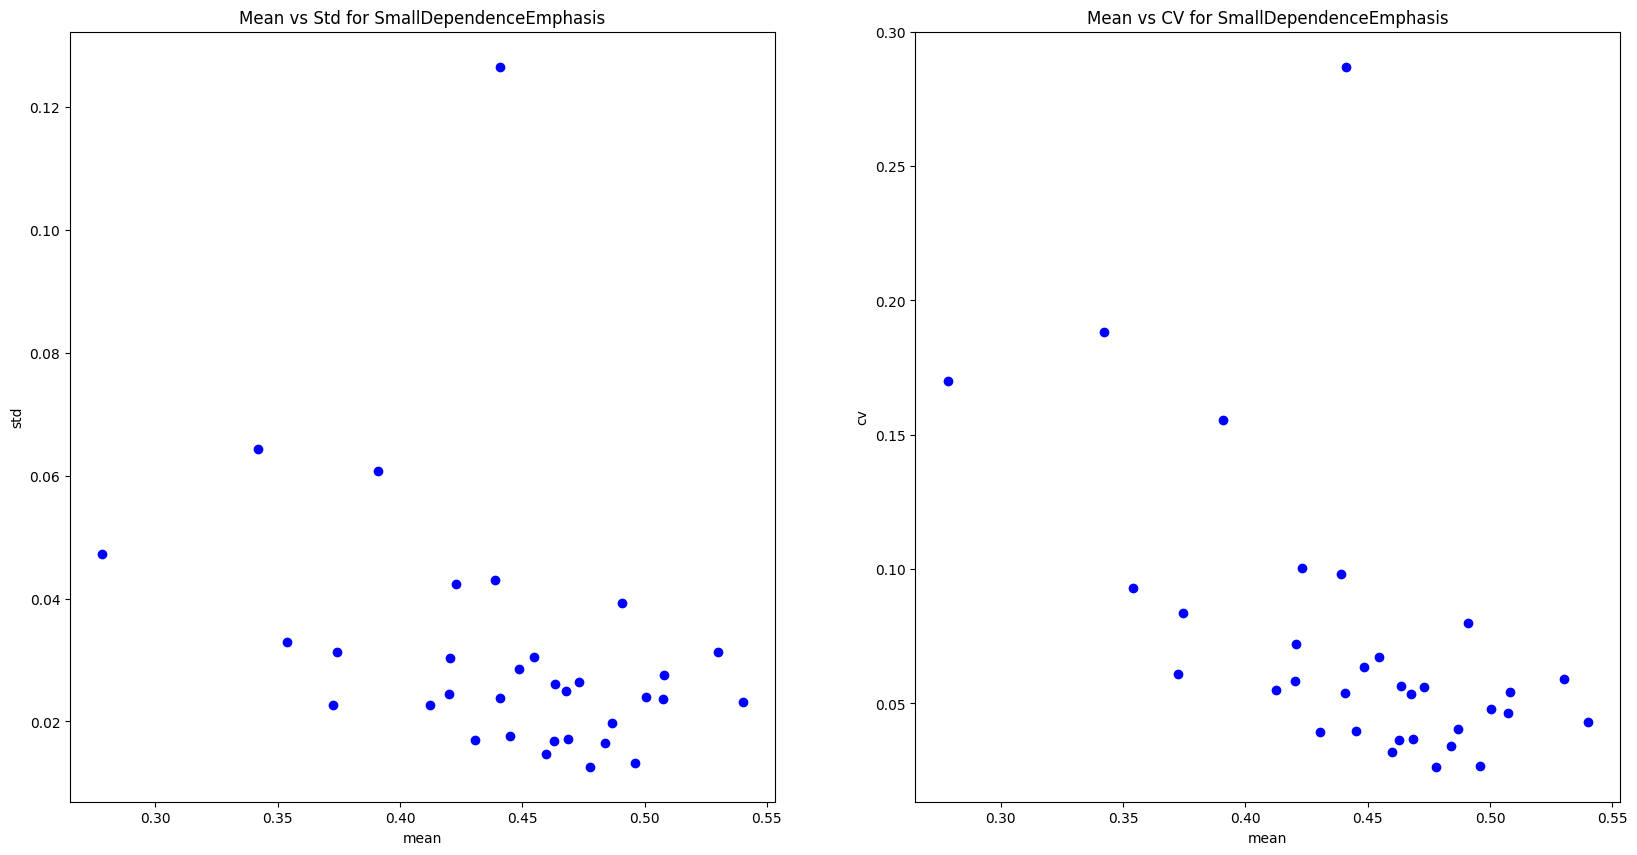

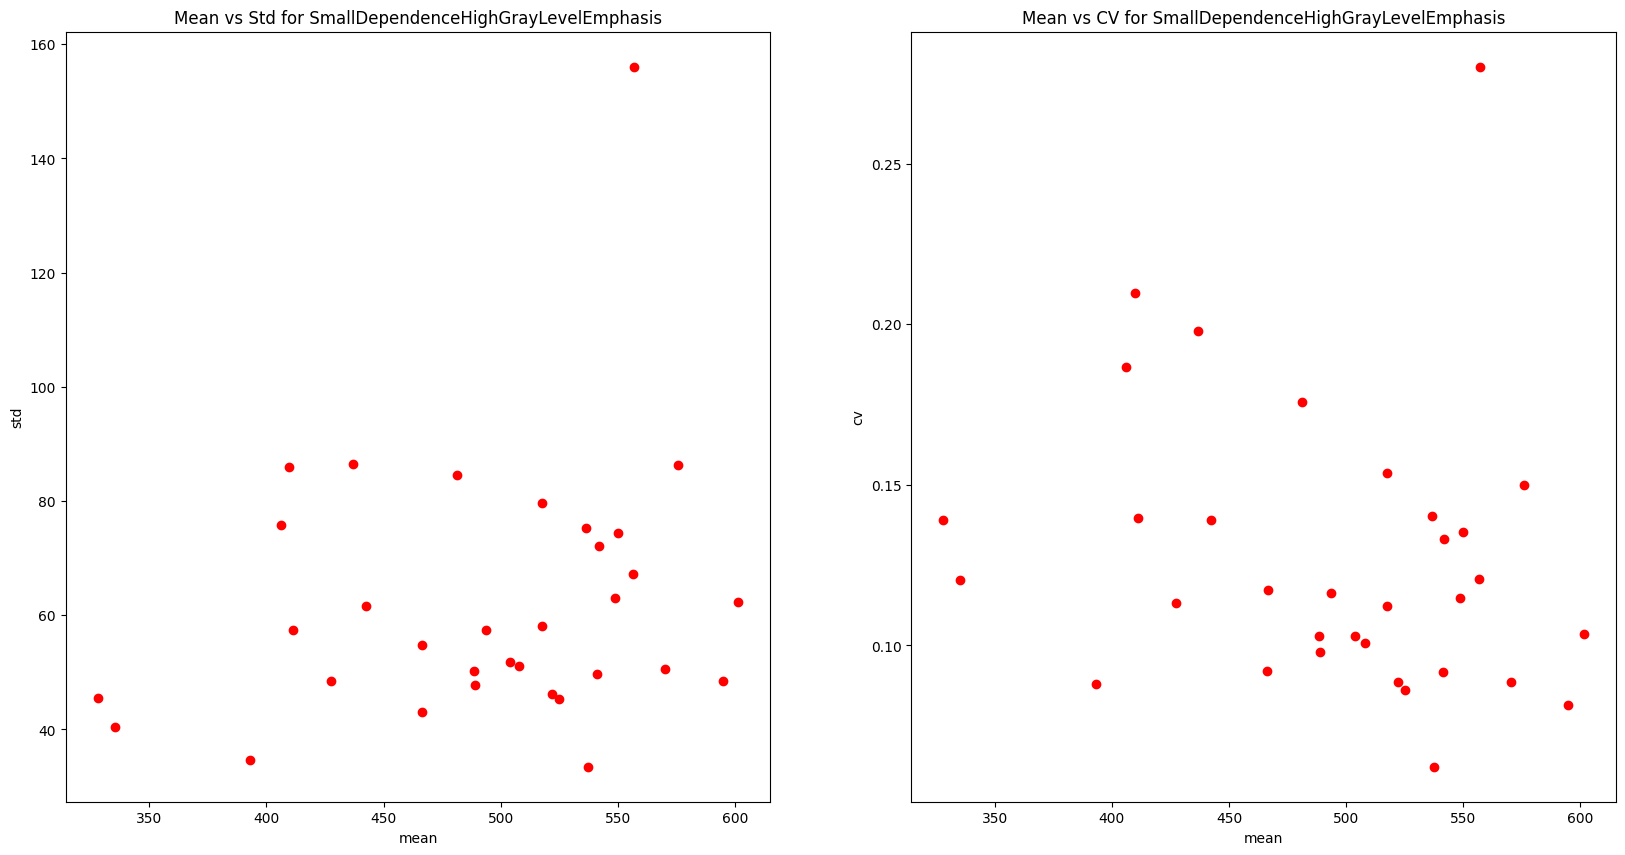

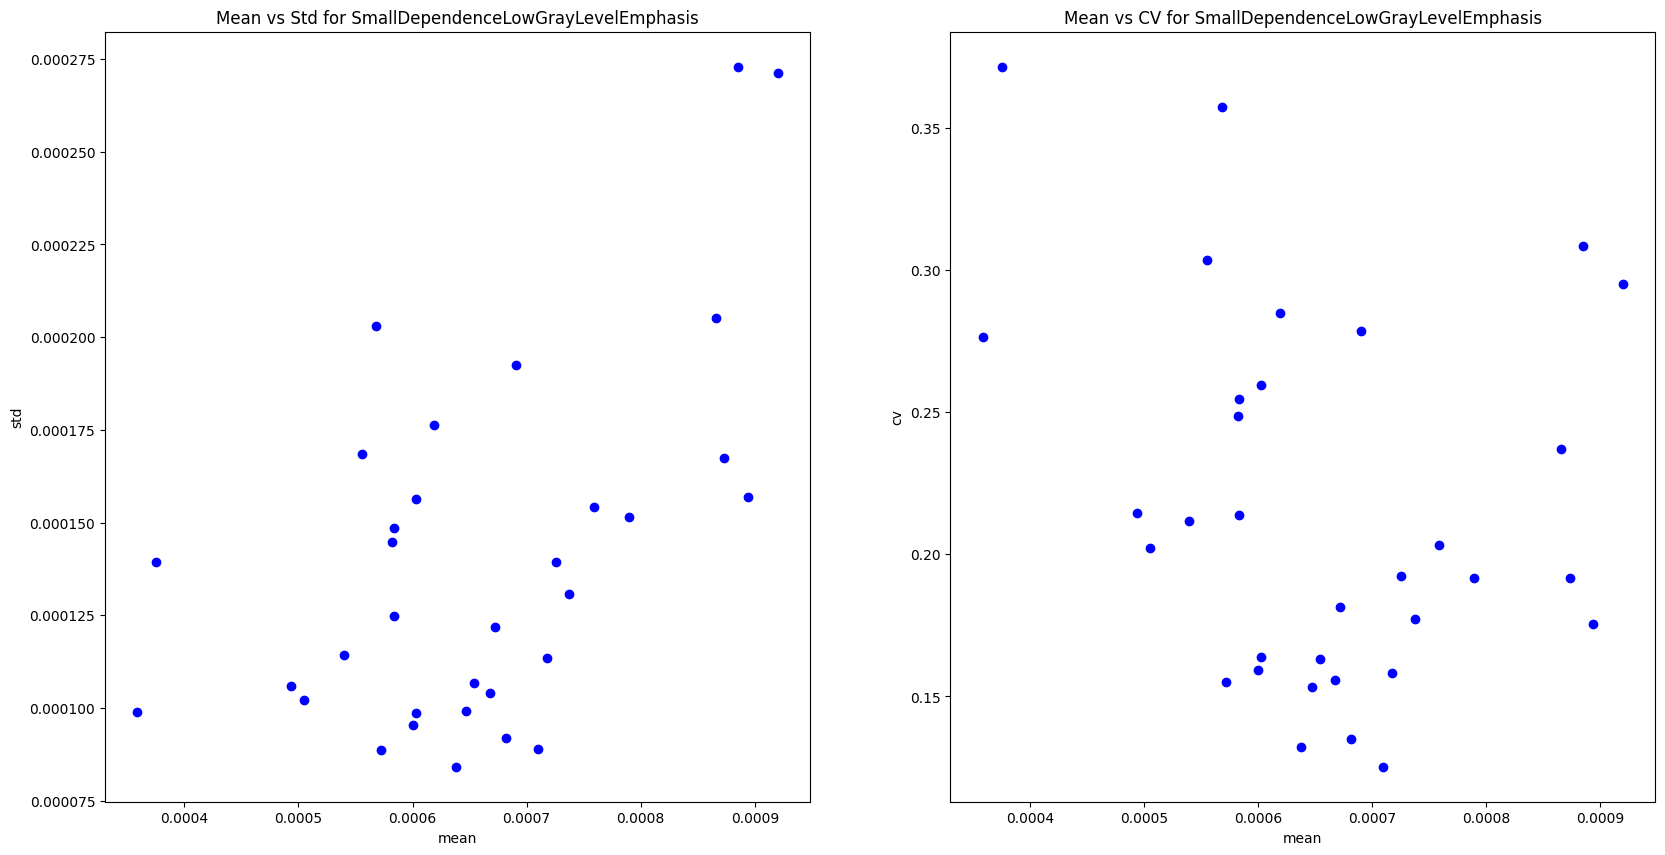

In [6]:
# graph budget mean vs std
for key in budget_mean.keys():
    # check if the mean values are all less than 1, if so make the points blue, else red
    color = 'blue' if budget_mean[key].max() < 1 else 'red'
    # plt 2 graphs in one figure
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    # change the color of the points
    ax[0].scatter(budget_mean[key], budget_std[key], c=color)
    ax[0].set_xlabel('mean')
    ax[0].set_ylabel('std')
    ax[0].set_title(f'Mean vs Std for {key.split("_")[1]}')
    ax[1].scatter(budget_mean[key], budget_cv[key], c=color)
    ax[1].set_xlabel('mean')
    ax[1].set_ylabel('cv')
    ax[1].set_title(f'Mean vs CV for {key.split("_")[1]}')
    plt.show()

Text(0, 0.5, 'Correlation')

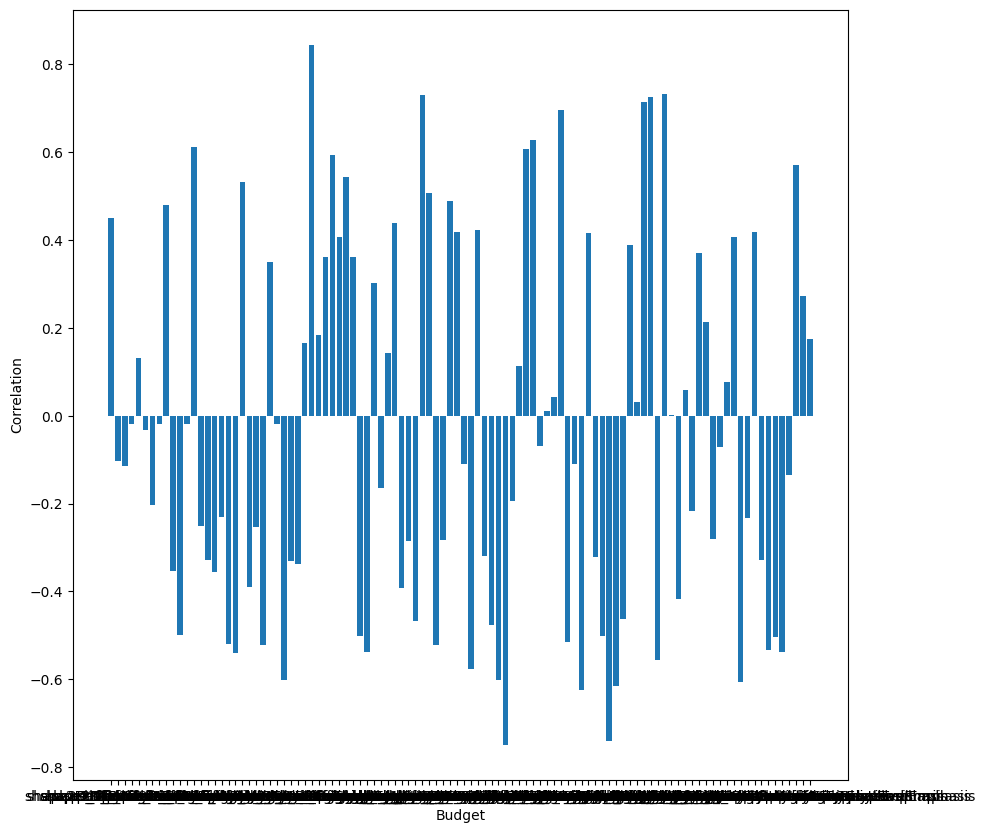

In [81]:
# graph the correlation value for each key
corr_list = []
for key in budget_mean.keys():
    # check if mean values are less than 1, if true give the bar color blue, else give it red
    corr, p = pearsonr(budget_mean[key], budget_cv[key])
    corr_list.append(corr)
plt.figure(figsize=(10,10))
plt.bar(budget_mean.keys(), corr_list)
plt.xlabel('Budget')
plt.ylabel('Correlation')
